# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from definitions import *
from utils import *

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 's_MAIN_ID', 's_class','s_simbad', 'marked'] + list_xmm_other_columns()
#from gamma bins directory
path_to_catalog = "markeddata/gevtevsimbadxmm_001_normalizedWITHOUT_LOG.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins + path_to_catalog, sep='\t')
print(path_to_gamma_bins +path_to_catalog)
spectra.head()

/home/masha/PycharmProjects/gamma-bins/markeddata/gevtevsimbadxmm_001_normalizedWITHOUT_LOG.txt


xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
0          0.000002          0.000001      1.786880e-07          0.000004   
1          0.000387          0.009969      1.148774e-02          0.005554   
2          0.009409          0.185558      3.525181e-01          0.316983   
3          0.000954          0.018292      3.659743e-02          0.028655   
4          0.006630          0.143495      2.966551e-01          0.151272   

   xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
0          0.000096               0.036758            0.321796   
1          0.000000               0.067225            0.071167   
2          0.063322               0.004991            0.005284   
3          0.000123               0.063270            0.066980   
4          0.018264               0.026520            0.028075   

   gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000   ...    s_class  \
0          0.117290             0.270867           0.222833   ...         []   
1          0.003313             0.037275           0.141626   ...         []   
2          0.000246             0.002767           0.010515   ...         []   
3          0.003118             0.035082           0.133293   ...         []   
4          0.001307             0.014705           0.055870   ...         []   

           gev_1FGL_Name  gev_CLASS1    gev_GLON   gev_GLAT  tev_fermi_names  \
0  b'1FGL J0007.0+7303 '    b'PSR  '  119.662102  10.460557              b''   
1  b'                  '    b'snr  '  120.125992   1.337755              b''   
2  b'                  '    b'snr  '  120.125992   1.337755              b''   
3  b'                  '    b'snr  '  120.125992   1.337755              b''   
4  b'                  '    b'snr  '  120.125992   1.337755              b''   

  tev_classes   tev_glat    tev_glon  marked  
0  b'pwn,snr'  10.203682  119.580254       0  
1      b'snr'   1.412930  120.092361       0  
2      b'snr'   1.412930  120.092361       0  
3      b'snr'   1.412930  120.092361       0  
4      b'snr'   1.412930  120.092361       0  

[5 rows x 30 columns]

In [5]:
spectra = spectra.copy()

In [6]:
spectra = spectra.reset_index(drop=True)

In [7]:
spectrum_columns = list_gev_spectrum_columns() + list_tev_spectrum_columns() + list_xmm_spectra_columns()

In [8]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [9]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

In [10]:
colors = list(colors.values())[19:]

* ### earth mover's distance

In [11]:
# earth mover's distance
#metric_function = st.wasserstein_distance
#spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function, n_jobs=6)


In [12]:
from utils import *

In [13]:
#spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [14]:
#list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 3, colors,spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [15]:
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())
#print("centroids:")
#display(centers)

In [16]:
#spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [17]:
#list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.06, colors, spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [18]:
#list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [19]:
#spectra_distances.min(), spectra_distances.max()

* ### euclidean distance

In [20]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [21]:
spectra_distances.min(), spectra_distances.max()

(0.0, 1.0451615907757554)

Clustering


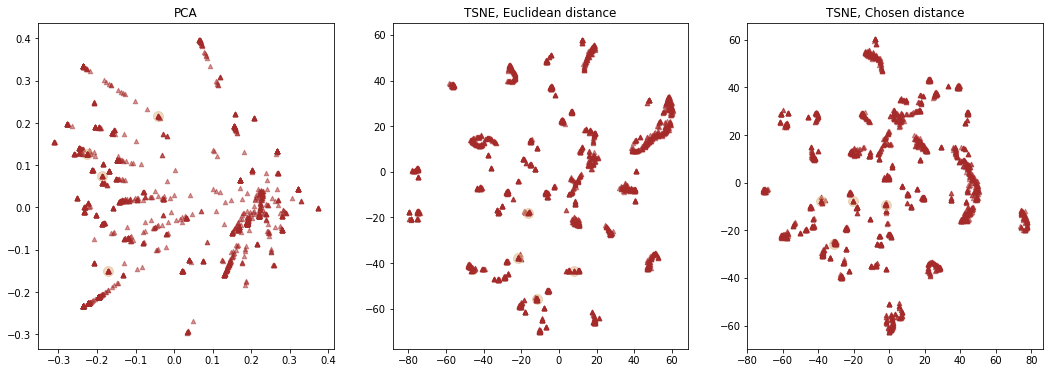

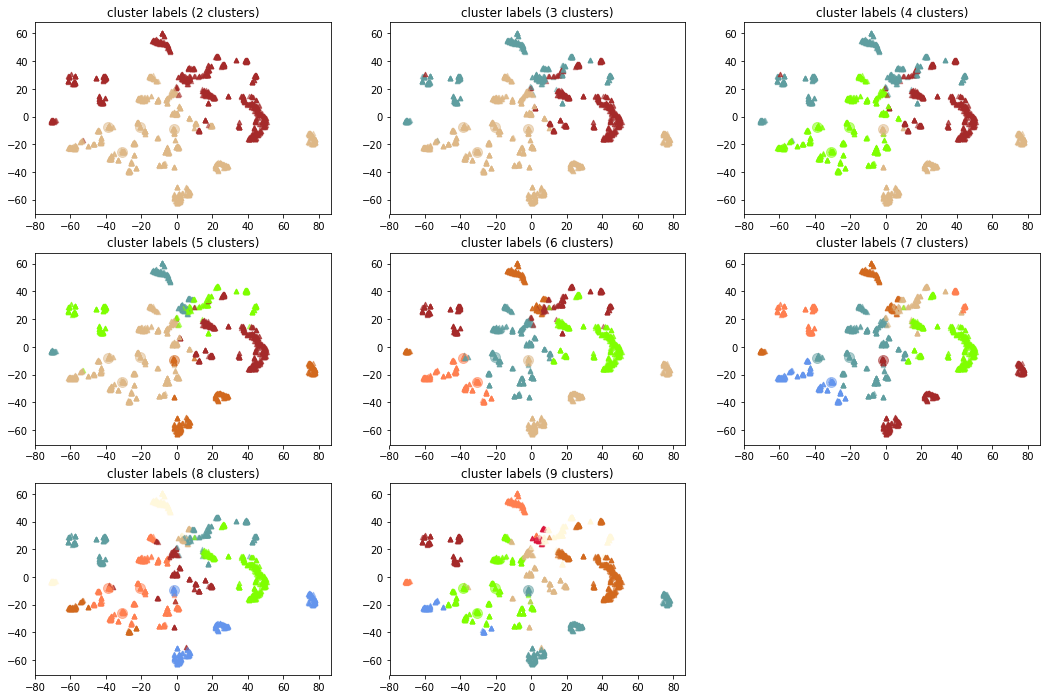

In [22]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)


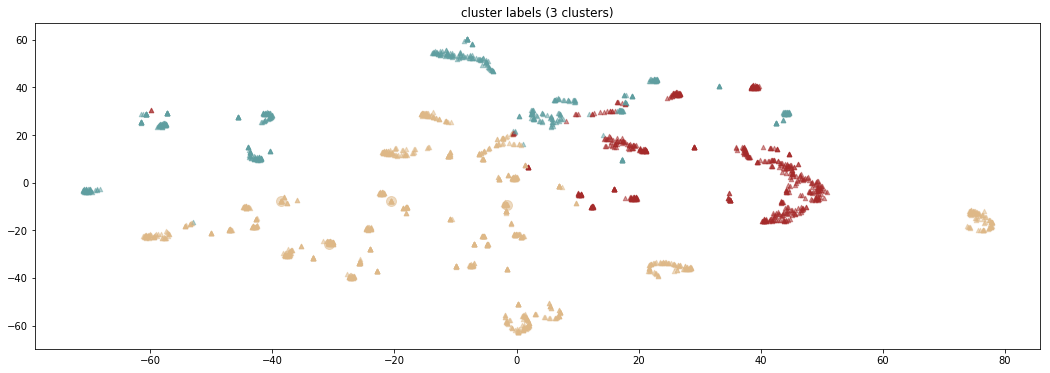

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209       0.000000e+00          0.000000          0.000007          0.000000   
495       0.000000e+00          0.000039          0.000030          0.000005   
1610      0.000000e+00          0.000005          0.000012          0.000012   
1835      1.857346e-07          0.000009          0.000022          0.000003   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.000075               0.014498            0.216180   
495           0.000000               0.011784            0.275804   
1610          0.000002               0.007597            0.117061   
1835          0.000006               0.022408            0.362246   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.331050             0.099179           0.322267   
495           0.292658             0.132576           0.240877   
1610          0.309339             0.034504           0.203534   
1835          0.111726             0.253937           0.249643   

            ...                  gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209         ...          b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495         ...          b'                  '    b'PSR  '  284.083496   
1610        ...          b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835        ...          b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  KMeans_clusters_3  
209       1                  1  
495       1                  1  
1610      1                  1  
1835      1                  1  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'        []   
192   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
193   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
194   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
195   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
196   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
197   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
198   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
303   b'                  '   b'PWN  '             b''      b'psr'        []   
310   b'                  '   b'PWN  '             b''      b'psr'        []   
311   b'                  '   b'PWN  '             b''      b'psr'        []   
312   b'                  '   b'PWN  '             b''      b'psr'        []   
313   b'                  '   b'PWN  '             b''      b'pwn'        []   
314   b'                  '   b'PWN  '             b''      b'pwn'        []   
315   b'                  '   b'PWN  '             b''      b'pwn'        []   
318   b'                  '   b'PWN  '             b''      b'pwn'        []   
319   b'                  '   b'PWN  '             b''      b'pwn'        []   
320   b'                  '   b'PWN  '             b''      b'pwn'        []   
321   b'                  '   b'PWN  '             b''      b'pwn'        []   
322   b'                  '   b'PWN  '             b''      b'pwn'        []   
327   b'                  '   b'bll  '             b''      b'hbl'        []   
329   b'                  '   b'bll  '             b''      b'hbl'        []   
330   b'                  '   b'bll  '             b''      b'hbl'        []   
334   b'                  '   b'bll  '             b''      b'hbl'        []   
336   b'                  '   b'bll  '             b''      b'hbl'        []   
339   b'                  '   b'bll  '             b''      b'hbl'        []   
341   b'                  '   b'bll  '             b''      b'hbl'        []   
342   b'                  '   b'bll  '             b''      b'hbl'        []   
344   b'                  '   b'bll  '             b''      b'hbl'        []   
...                     ...        ...             ...         ...       ...   
1906  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1907  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1910  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1911  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1912  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1914  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1915  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1916  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1919  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1922  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1926  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1927  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1928  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1931  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1932  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''   b'pwn,snr'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
110   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
111   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
115   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
117   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
119   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1     b'                  '   b'snr  '             b''      b'snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
9     b'                  '   b'snr  '             b''      b'snr'        []   
10    b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
19    b'                  '   b'snr  '             b''      b'snr'        []   
20    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
30    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1933  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1948  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1950  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1952  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1962  b'1FGL J

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.201822            0.141502          0.057969   
1               0.031568            0.263859          0.211052   
2               0.097288            0.073731          0.088007   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.179851           0.112873              0.0    0.148802   
1             0.132118           0.307156              0.0    0.014446   
2             0.069661           0.072838              0.0    0.153763   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.071827  0.032730   0.014623   0.003807          0.002383   
1  0.009126  0.006326   0.004171   0.002470          0.000930   
2  0.065518  0.051299   0.041849   0.134688          0.007776   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.004234          0.008806          0.010618          0.008152  
1          0.002783          0.003037          0.004080          0.006876  
2          0.033437          0.042830          0.036797          0.030518

In [23]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 3, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [24]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())

0 cluster (#A52A2A)


array(["b'1FGL J0035.9+5951 '", "b'1FGL J0222.6+4302 '",
       "b'1FGL J0416.8+0107 '", "b'                  '",
       "b'1FGL J0650.7+2503 '", "b'1FGL J0854.0-4632 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1614.7-5138c'",
       "b'1FGL J1653.9+3945 '", "b'1FGL J1803.1-2147c'",
       "b'1FGL J1834.3-0842c'", "b'1FGL J1837.5-0659c'",
       "b'1FGL J2001.1+4351 '", "b'1FGL J2009.5-4849 '",
       "b'1FGL J2158.8-3013 '", "b'1FGL J2202.8+4216 '",
       "b'1FGL J2323.4+5849 '"], dtype=object)

1 cluster (#DEB887)


array(["b'1FGL J0007.0+7303 '", "b'1FGL J0047.3-2512 '",
       "b'1FGL J0205.6+6449 '", "b'1FGL J0240.5+6113 '",
       "b'1FGL J0319.7+4130 '", "b'1FGL J0617.2+2233 '",
       "b'1FGL J0633.9+1746 '", "b'1FGL J0721.9+7120 '",
       "b'1FGL J0956.5+6938 '", "b'1FGL J1000.1+6539 '",
       "b'                  '", "b'1FGL J1119.4-6127c'",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1256.2-0547 '",
       "b'1FGL J1322.0-4515 '", "b'1FGL J1418.7-6057 '",
       "b'1FGL J1617.5-5105c'", "b'1FGL J1714.5-3830c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1747.9-2448 '",
       "b'1FGL J1801.3-2322c'", "b'1FGL J1808.5-1954c'",
       "b'1FGL J1813.3-1246 '", "b'1FGL J1826.1-1256 '",
       "b'1FGL J1826.2-1450 '", "b'1FGL J1834.3-0842c'",
       "b'1FGL J1833.5-1034 '", "b'1FGL J1848.1-0145c'",
       "b'1FGL J1850.2-0019c'", "b'1FGL J1907.9+0602 '",
       "b'1FGL J1910.9+0906c'", "b'1FGL J1922.9+1411 '",
       "b'1FGL J2001.1+4351 '", "b'1FGL J2015.7+3708 '",
       "b'1FGL J2021.0+3651 '",

2 cluster (#5F9EA0)


array(["b'                  '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0416.8+0107 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1015.1+4927 '", "b'1FGL J1103.7-2329 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1221.3+3008 '", "b'1FGL J1221.5+2814 '",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1322.0-4515 '",
       "b'1FGL J1428.7+4239 '", "b'1FGL J1513.2-5904 '",
       "b'1FGL J1555.7+1111 '", "b'1FGL J1626.0-4917c'",
       "b'1FGL J1711.7-3944c'", "b'1FGL J1747.9-2448 '",
       "b'1FGL J1825.7-1410c'", "b'1FGL J2000.0+6508 '",
       "b'1FGL J2020.0+4049 '", "b'1FGL J2323.4+5849 '",
       "b'1FGL J2359.0-3035 '"], dtype=object)

In [25]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['s_MAIN_ID'].unique())

0 cluster (#A52A2A)


array(['[]',
       '["b\'MSX6C G331.5487-00.5364\'" "b\'MSX6C G331.5487-00.5364\'"]'],
      dtype=object)

1 cluster (#DEB887)


array(['[]', '["b\'LS   I +61  303\'" "b\'LS   I +61  303\'"]',
       '["b\'HD  43582\'"]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224\'"\n "b\'CXOU J095554.1+694039\'" "b\'SN 2004am\'"\n "b

2 cluster (#5F9EA0)


array(['[]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224\'"\n "b\'CXOU J095554.1+694039\'" "b\'SN 2004am\'"\n "b\'[SST2011] J095552.13+694053.1\'" "b\'CXOU J095534.5+693823\'"\n "b\'CXOU J0955

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1, 0.01]


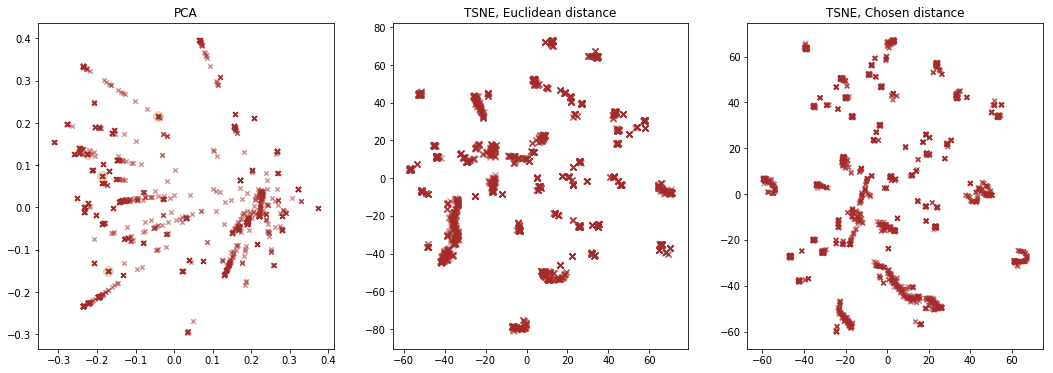

Clustering


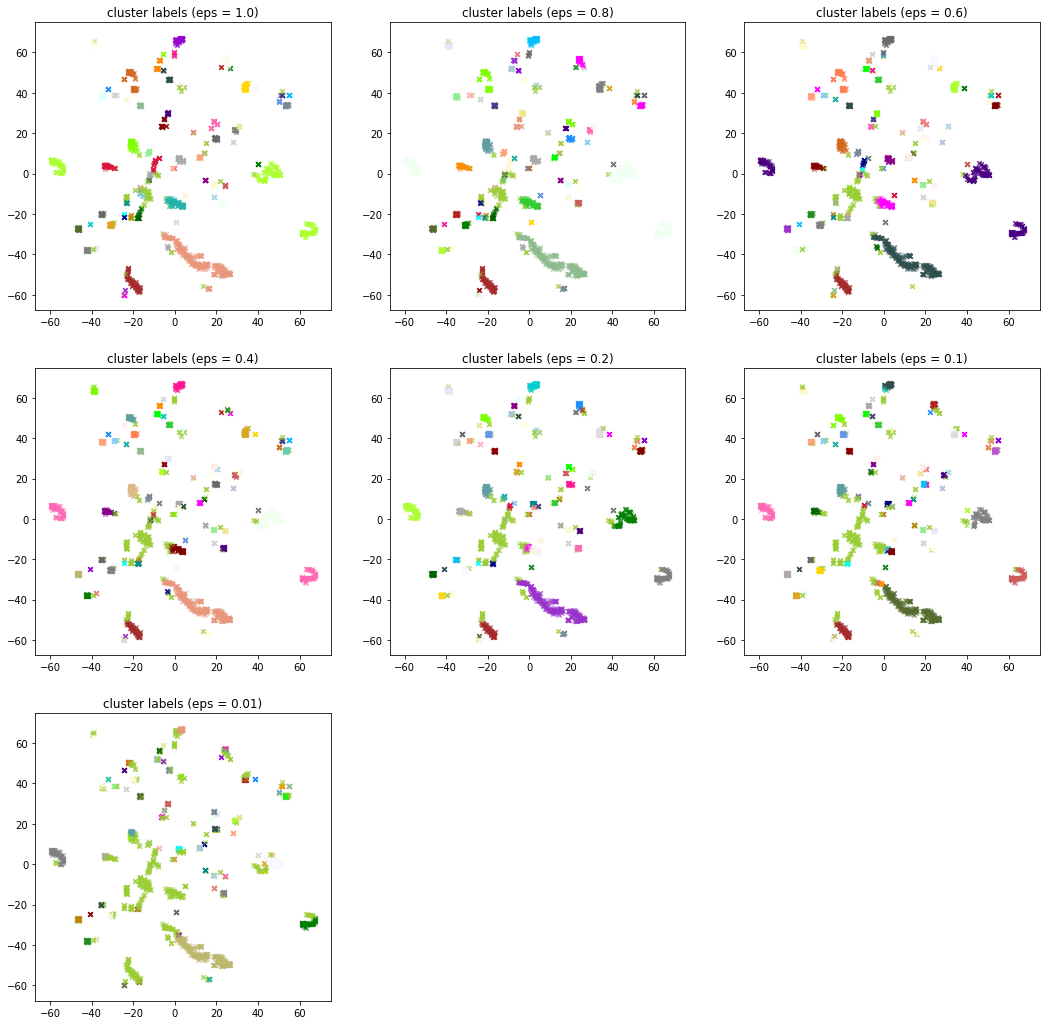

In [26]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1] + [0.01]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


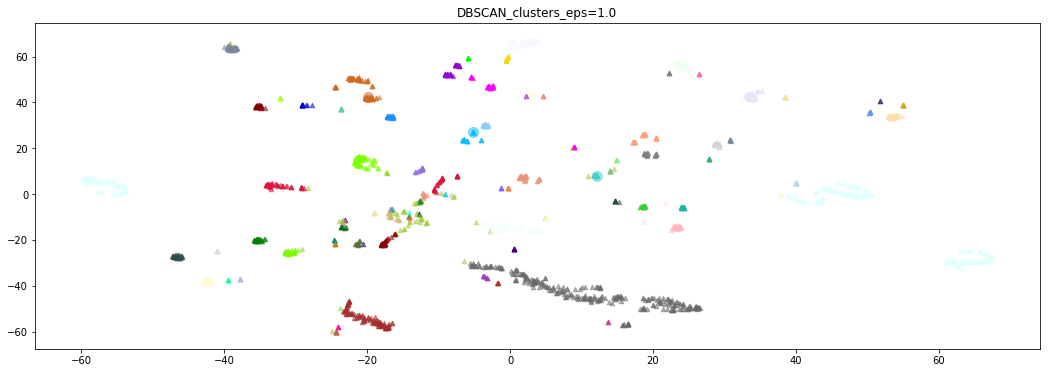

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209       0.000000e+00          0.000000          0.000007          0.000000   
495       0.000000e+00          0.000039          0.000030          0.000005   
1610      0.000000e+00          0.000005          0.000012          0.000012   
1835      1.857346e-07          0.000009          0.000022          0.000003   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.000075               0.014498            0.216180   
495           0.000000               0.011784            0.275804   
1610          0.000002               0.007597            0.117061   
1835          0.000006               0.022408            0.362246   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.331050             0.099179           0.322267   
495           0.292658             0.132576           0.240877   
1610          0.309339             0.034504           0.203534   
1835          0.111726             0.253937           0.249643   

               ...                     gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209            ...             b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495            ...             b'                  '    b'PSR  '  284.083496   
1610           ...             b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835           ...             b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  DBSCAN_clusters_eps=1.0  
209       1                        4  
495       1                       30  
1610      1                       70  
1835      1                       83  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1   b'                  '   b'snr  '             b''      b'snr'        []   
3   b'                  '   b'snr  '             b''      b'snr'        []   
5   b'                  '   b'snr  '             b''      b'snr'        []   
6   b'                  '   b'snr  '             b''      b'snr'        []   
7   b'                  '   b'snr  '             b''      b'snr'        []   
8   b'                  '   b'snr  '             b''      b'snr'        []   
9   b'                  '   b'snr  '             b''      b'snr'        []   
10  b'                  '   b'snr  '             b''      b'snr'        []   
11  b'                  '   b'snr  '             b''      b'snr'        []   
12  b'                  '   b'snr  '             b''      b'snr'        []   
13  b'                  '   b'snr  '             b''      b'snr'        []   
14  b'                  '   b'snr  '             b''      b'snr'        []   
15  b'                  '   b'snr  '             b''      b'snr'        []   
16  b'                  '   b'snr  '             b''      b'snr'        []   
17  b'                  '   b'snr  '             b''      b'snr'        []   
18  b'                  '   b'snr  '             b''      b'snr'        []   
19  b'                  '   b'snr  '             b''      b'snr'        []   
20  b'                  '   b'snr  '             b''      b'snr'        []   
21  b'                  '   b'snr  '             b''      b'snr'        []   
22  b'                  '   b'snr  '             b''      b'snr'        []   
23  b'                  '   b'snr  '             b''      b'snr'        []   
24  b'                  '   b'snr  '             b''      b'snr'        []   
25  b'                  '   b'snr  '             b''      b'snr'        []   
26  b'                  '   b'snr  '             b''      b'snr'        []   
27  b'                  '   b'snr  '             b''      b'snr'        []   
28  b'                  '   b'snr  '             b''      b'snr'        []   
30  b'                  '   b'snr  '             b''      b'snr'        []   
31  b'                  '   b'snr  '             b''      b'snr'        []   
32  b'                  '   b'snr  '             b''      b'snr'        []   
33  b'                  '   b'snr  '             b''      b'snr'        []   
..                    ...        ...             ...         ...       ...   
63  b'                  '   b'snr  '             b''      b'snr'        []   
65  b'                  '   b'snr  '             b''      b'snr'        []   
66  b'                  '   b'snr  '             b''      b'snr'        []   
68  b'                  '   b'snr  '             b''      b'snr'        []   
69  b'                  '   b'snr  '             b''      b'snr'        []   
70  b'                  '   b'snr  '             b''      b'snr'        []   
71  b'                  '   b'snr  '             b''      b'snr'        []   
72  b'                  '   b'snr  '             b''      b'snr'        []   
73  b'                  '   b'snr  '             b''      b'snr'        []   
74  b'                  '   b'snr  '             b''      b'snr'        []   
75  b'                  '   b'snr  '             b''      b'snr'        []   
76  b'                  '   b'snr  '             b''      b'snr'        []   
78  b'                  '   b'snr  '             b''      b'snr'        []   
79  b'                  '   b'snr  '             b''      b'snr'        []   
81  b'                  '   b'snr  '             b''      b'snr'        []   
82  b'                  '   b'snr  '             b''      b'snr'        []   
83  b'                  '   b'snr  '             b''      b'snr'        []   
84  b'                  '   b'snr  '             b''      b'snr'        []   
85  b'                  '   b'snr  '             b''      b'snr'        []   
87  b'                  '   b'snr 

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2     b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
40    b'                  '   b'snr  '             b''      b'snr'        []   
59    b'                  '   b'snr  '             b''      b'snr'        []   
64    b'                  '   b'snr  '             b''      b'snr'        []   
86    b'                  '   b'snr  '             b''      b'snr'        []   
1866  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1888  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1892  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1895  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1896  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1918  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1924  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1933  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
2         []         0       0  b'3XMM J002458.6+641028'   
29        []         0       0  b'3XMM J002515.4+641127'   
35        []         0       0  b'3XMM J002517.5+640506'   
40        []         0       0  b'3XMM J002524.3+640902'   
59        []         0       0  b'3XMM J002529.6+641121'   
64        []         0       0  b'3XMM J002531.1+641114'   
86        []         0       0  b'3XMM J002540.0+641037'   
1866      []         0       0  b'3XMM J232312.8+584828'   
1877      []         0       0  b'3XMM J232315.9+584923'   
1888      []         0       0  b'3XMM J232321.7+584757'   
1892      []         0       0  b'3XMM J232323.2+585014'   
1895      []         0       0  b'3XMM J232324.1+584952'   
1896      []         0       0  b'3XMM J232324.2+585017'   
1918      []         0       0  b'3XMM J232334.8+584822'   
1924      []         0       0  b'3XMM J232337.6+584943'   
1933      []         0       0  b'3XMM J232341.0+584854'   

                                        xmm_WEBPAGE_URL  
2     b'http://xmm-catalog.irap.omp.eu/source/200962...  
29    b'http://xmm-catalog.irap.omp.eu/source/205111...  
35    b'http://xmm-catalog.irap.omp.eu/source/200962...  
40    b'http://xmm-catalog.irap.omp.eu/source/200962...  
59    b'http://xmm-catalog.irap.omp.eu/source/203105...  
64    b'http://xmm-catalog.irap.omp.eu/source/200962...  
86    b'http://xmm-catalog.irap.omp.eu/source/204123...  
1866  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1877  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1888  b'http://xmm-catalog.irap.omp.eu/source/206504...  
1892  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1895  b'http://xmm-catalog.irap.omp.eu/source/206504...  
1896  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1918  b'http://xmm-catalog.irap.omp.eu/source/206504...  
1924  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1933  b'http://xmm-catalog.irap.omp.eu/source/201100...

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
4   b'                  '   b'snr  '             b''      b'snr'        []   
34  b'                  '   b'snr  '             b''      b'snr'        []   
67  b'                  '   b'snr  '             b''      b'snr'        []   
77  b'                  '   b'snr  '             b''      b'snr'        []   
80  b'                  '   b'snr  '             b''      b'snr'        []   
92  b'                  '   b'snr  '             b''      b'snr'        []   
96  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
4       []         0       0  b'3XMM J002500.4+641036'   
34      []         0       0  b'3XMM J002517.4+641135'   
67      []         0       0  b'3XMM J002532.0+640545'   
77      []         0       0  b'3XMM J002535.3+640556'   
80      []         0       0  b'3XMM J002536.3+641106'   
92      []         0       0  b'3XMM J002541.7+641029'   
96      []         0       0  b'3XMM J002548.4+640922'   

                                      xmm_WEBPAGE_URL  
4   b'http://xmm-catalog.irap.omp.eu/source/203105...  
34  b'http://xmm-catalog.irap.omp.eu/source/200962...  
67  b'http://xmm-catalog.irap.omp.eu/source/203105...  
77  b'http://xmm-catalog.irap.omp.eu/source/200962...  
80  b'http://xmm-catalog.irap.omp.eu/source/203105...  
92  b'http://xmm-catalog.irap.omp.eu/source/200962...  
96  b'http://xmm-catalog.irap.omp.eu/source/200962...

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
101  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
102  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
103  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
104  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
105  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
106  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
107  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
108  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
109  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
110  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
111  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
112  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
113  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
114  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
115  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
116  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
117  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
118  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
119  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
120  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
121  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
122  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
127  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
146  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
150  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
151  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galax

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
155   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
156   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
157   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
158   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
159   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
160   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
161   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
162   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
163   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
164   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
165   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
166   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
167   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
168   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
169   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
170   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
171   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
172   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
173   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
174   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
175   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
176   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
177   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
178   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
180   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
215   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
216   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
217   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
219   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
220   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
221   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
222   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
223   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
226   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
227   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
228   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
230   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
231   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
232   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
234   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
1537  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1538  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1539  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1540  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1541  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1542  b'1FGL J1813.3-124

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
192  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
193  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
194  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
195  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
196  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
197  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
198  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
192      []         0       0  b'3XMM J022225.5+430409'   
193      []         0       0  b'3XMM J022230.9+430357'   
194      []         0       0  b'3XMM J022232.7+430446'   
195      []         0       0  b'3XMM J022239.6+430207'   
196      []         0       0  b'3XMM J022242.7+430405'   
197      []         0       0  b'3XMM J022243.0+430239'   
198      []         0       0  b'3XMM J022256.4+430336'   

                                       xmm_WEBPAGE_URL  
192  b'http://xmm-catalog.irap.omp.eu/source/200029...  
193  b'http://xmm-catalog.irap.omp.eu/source/200029...  
194  b'http://xmm-catalog.irap.omp.eu/source/200029...  
195  b'http://xmm-catalog.irap.omp.eu/source/200029...  
196  b'http://xmm-catalog.irap.omp.eu/source/200029...  
197  b'http://xmm-catalog.irap.omp.eu/source/200029...  
198  b'http://xmm-catalog.irap.omp.eu/source/200029...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
199  b'                  '   b'bll  '             b''      b'hbl'        []   
200  b'                  '   b'bll  '             b''      b'hbl'        []   
202  b'                  '   b'bll  '             b''      b'hbl'        []   
203  b'                  '   b'bll  '             b''      b'hbl'        []   
204  b'                  '   b'bll  '             b''      b'hbl'        []   
205  b'                  '   b'bll  '             b''      b'hbl'        []   
206  b'                  '   b'bll  '             b''      b'hbl'        []   
207  b'                  '   b'bll  '             b''      b'hbl'        []   
208  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
199      []         0       0  b'3XMM J023246.1+201933'   
200      []         0       0  b'3XMM J023246.3+201815'   
202      []         0       0  b'3XMM J023250.5+201653'   
203      []         0       0  b'3XMM J023250.9+201926'   
204      []         0       0  b'3XMM J023251.4+201751'   
205      []         0       0  b'3XMM J023254.5+201807'   
206      []         0       0  b'3XMM J023256.7+201848'   
207      []         0       0  b'3XMM J023256.9+201905'   
208      []         0       0  b'3XMM J023300.3+201826'   

                                       xmm_WEBPAGE_URL  
199  b'http://xmm-catalog.irap.omp.eu/source/206042...  
200  b'http://xmm-catalog.irap.omp.eu/source/206042...  
202  b'http://xmm-catalog.irap.omp.eu/source/206042...  
203  b'http://xmm-catalog.irap.omp.eu/source/206042...  
204  b'http://xmm-catalog.irap.omp.eu/source/206042...  
205  b'http://xmm-catalog.irap.omp.eu/source/206042...  
206  b'http://xmm-catalog.irap.omp.eu/source/206042...  
207  b'http://xmm-catalog.irap.omp.eu/source/206042...  
208  b'http://xmm-catalog.irap.omp.eu/source/206042...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
236  b'                  '   b'rdg  '             b''      b'hbl'        []   
237  b'                  '   b'rdg  '             b''      b'hbl'        []   
239  b'                  '   b'rdg  '             b''      b'hbl'        []   
240  b'                  '   b'rdg  '             b''      b'hbl'        []   
241  b'                  '   b'rdg  '             b''      b'hbl'        []   
242  b'                  '   b'rdg  '             b''      b'hbl'        []   
243  b'                  '   b'rdg  '             b''      b'hbl'        []   
244  b'                  '   b'rdg  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
236      []         0       0  b'3XMM J031638.3+411631'   
237      []         0       0  b'3XMM J031639.0+411922'   
239      []         0       0  b'3XMM J031644.3+411840'   
240      []         0       0  b'3XMM J031646.6+411816'   
241      []         0       0  b'3XMM J031649.4+411823'   
242      []         0       0  b'3XMM J031651.2+411949'   
243      []         0       0  b'3XMM J031651.9+412213'   
244      []         0       0  b'3XMM J031657.9+411844'   

                                       xmm_WEBPAGE_URL  
236  b'http://xmm-catalog.irap.omp.eu/source/201515...  
237  b'http://xmm-catalog.irap.omp.eu/source/201515...  
239  b'http://xmm-catalog.irap.omp.eu/source/201515...  
240  b'http://xmm-catalog.irap.omp.eu/source/201515...  
241  b'http://xmm-catalog.irap.omp.eu/source/203056...  
242  b'http://xmm-catalog.irap.omp.eu/source/203056...  
243  b'http://xmm-catalog.irap.omp.eu/source/201515...  
244  b'http://xmm-catalog.irap.omp.eu/source/201515...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1  \
245   b'1FGL J0319.7+4130 '   b'RDG  '   
246   b'1FGL J0319.7+4130 '   b'RDG  '   
247   b'1FGL J0319.7+4130 '   b'RDG  '   
248   b'1FGL J0319.7+4130 '   b'RDG  '   
249   b'1FGL J0319.7+4130 '   b'RDG  '   
250   b'1FGL J0319.7+4130 '   b'RDG  '   
251   b'1FGL J0319.7+4130 '   b'RDG  '   
252   b'1FGL J0319.7+4130 '   b'RDG  '   
253   b'1FGL J0319.7+4130 '   b'RDG  '   
254   b'1FGL J0319.7+4130 '   b'RDG  '   
255   b'1FGL J0319.7+4130 '   b'RDG  '   
256   b'1FGL J0319.7+4130 '   b'RDG  '   
257   b'1FGL J0319.7+4130 '   b'RDG  '   
258   b'1FGL J0319.7+4130 '   b'RDG  '   
259   b'1FGL J0319.7+4130 '   b'RDG  '   
260   b'1FGL J0319.7+4130 '   b'RDG  '   
261   b'1FGL J0319.7+4130 '   b'RDG  '   
263   b'1FGL J0319.7+4130 '   b'RDG  '   
264   b'1FGL J0319.7+4130 '   b'RDG  '   
265   b'1FGL J0319.7+4130 '   b'RDG  '   
266   b'1FGL J0319.7+4130 '   b'RDG  '   
267   b'1FGL J0319.7+4130 '   b'RDG  '   
268   b'1FGL J0319.7+4130 '   b'RDG  '   
269   b'1FGL J0319.7+4130 '   b'RDG  '   
428   b'1FGL J0956.5+6938 '   b'sbg  '   
429   b'1FGL J0956.5+6938 '   b'sbg  '   
430   b'1FGL J0956.5+6938 '   b'sbg  '   
431   b'1FGL J0956.5+6938 '   b'sbg  '   
432   b'1FGL J0956.5+6938 '   b'sbg  '   
433   b'1FGL J0956.5+6938 '   b'sbg  '   
...                     ...        ...   
454   b'1FGL J0956.5+6938 '   b'sbg  '   
455   b'1FGL J0956.5+6938 '   b'sbg  '   
456   b'1FGL J0956.5+6938 '   b'sbg  '   
457   b'1FGL J0956.5+6938 '   b'sbg  '   
458   b'1FGL J0956.5+6938 '   b'sbg  '   
459   b'1FGL J0956.5+6938 '   b'sbg  '   
460   b'1FGL J0956.5+6938 '   b'sbg  '   
461   b'1FGL J0956.5+6938 '   b'sbg  '   
462   b'1FGL J0956.5+6938 '   b'sbg  '   
463   b'1FGL J0956.5+6938 '   b'sbg  '   
464   b'1FGL J0956.5+6938 '   b'sbg  '   
465   b'1FGL J0956.5+6938 '   b'sbg  '   
466   b'1FGL J0956.5+6938 '   b'sbg  '   
467   b'1FGL J0956.5+6938 '   b'sbg  '   
468   b'1FGL J0956.5+6938 '   b'sbg  '   
469   b'1FGL J0956.5+6938 '   b'sbg  '   
470   b'1FGL J0956.5+6938 '   b'sbg  '   
471   b'1FGL J0956.5+6938 '   b'sbg  '   
472   b'1FGL J0956.5+6938 '   b'sbg  '   
473   b'1FGL J0956.5+6938 '   b'sbg  '   
474   b'1FGL J0956.5+6938 '   b'sbg  '   
1739  b'1FGL J1922.9+1411 '   b'SNR  '   
1740  b'1FGL J1922.9+1411 '   b'SNR  '   
1741  b'1FGL J1922.9+1411 '   b'SNR  '   
1742  b'1FGL J1922.9+1411 '   b'SNR  '   
1743  b'1FGL J1922.9+1411 '   b'SNR  '   
1744  b'1FGL J1922.9+1411 '   b'SNR  '   
1745  b'1FGL J1922.9+1411 '   b'SNR  '   
1746  b'1FGL J1922.9+1411 '   b'SNR  '   
1747  b'1FGL J1922.9+1411 '   b'SNR  '   

                                        tev_fermi_names tev_classes  \
245                                                 b''      b'fri'   
246                                                 b''      b'fri'   
247                                                 b''      b'fri'   
248                                                 b''      b'fri'   
249                                                 b''      b'fri'   
250                                                 b''      b'fri'   
251                                                 b''      b'fri'   
252                                                 b''      b'fri'   
253                                                 b''      b'fri'   
254                                                 b''      b'fri'   
255                                                 b''      b'fri'   
256                                                 b''      b'fri'   
257                                                 b''      b'fri'   
258                                                 b''      b'fri'   
259                                                 b''      b'fri'   
260                                                 b''      b'fri'   
261                                                 b''      b'fri'   
263                                                 b''      b'fri'   
264                                                 b''     

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1  \
262  b'1FGL J0319.7+4130 '   b'RDG  '   
445  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
262                                                b''      b'fri'   
445  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
262                                                 []        []         0   
445  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
262       0  b'3XMM J031948.2+413037'   
445       0  b'3XMM J095551.2+694039'   

                                       xmm_WEBPAGE_URL  
262  b'http://xmm-catalog.irap.omp.eu/source/200851...  
445  b'http://xmm-catalog.irap.omp.eu/source/201122...

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
272  b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
784  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
272      []         0       0  b'3XMM J041652.4+010523'   
784      []         0       0  b'3XMM J113626.5+700927'   

                                       xmm_WEBPAGE_URL  
272  b'http://xmm-catalog.irap.omp.eu/source/200943...  
784  b'http://xmm-catalog.irap.omp.eu/source/200941...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
273  b'                  '   b'     '             b''   b'snr,mc'        []   
276  b'                  '   b'     '             b''   b'snr,mc'        []   
277  b'                  '   b'     '             b''   b'snr,mc'        []   
286  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
273      []         0       0  b'3XMM J052436.9-694059'   
276      []         0       0  b'3XMM J052450.8-693633'   
277      []         0       0  b'3XMM J052454.7-693835'   
286      []         0       0  b'3XMM J052500.1-693904'   

                                       xmm_WEBPAGE_URL  
273  b'http://xmm-catalog.irap.omp.eu/source/201375...  
276  b'http://xmm-catalog.irap.omp.eu/source/206907...  
277  b'http://xmm-catalog.irap.omp.eu/source/204141...  
286  b'http://xmm-catalog.irap.omp.eu/source/201573...

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
274  b'                  '   b'     '             b''   b'snr,mc'        []   
275  b'                  '   b'     '             b''   b'snr,mc'        []   
298  b'                  '   b'     '             b''   b'snr,mc'        []   
301  b'                  '   b'     '             b''   b'snr,mc'        []   
302  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
274      []         0       0  b'3XMM J052443.0-693938'   
275      []         0       0  b'3XMM J052444.0-694058'   
298      []         0       0  b'3XMM J052509.2-693707'   
301      []         0       0  b'3XMM J052525.1-693742'   
302      []         0       0  b'3XMM J052529.6-693940'   

                                       xmm_WEBPAGE_URL  
274  b'http://xmm-catalog.irap.omp.eu/source/201375...  
275  b'http://xmm-catalog.irap.omp.eu/source/206907...  
298  b'http://xmm-catalog.irap.omp.eu/source/201375...  
301  b'http://xmm-catalog.irap.omp.eu/source/201375...  
302  b'http://xmm-catalog.irap.omp.eu/source/201375...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
278  b'                  '   b'     '             b''   b'snr,mc'        []   
285  b'                  '   b'     '             b''   b'snr,mc'        []   
297  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
278      []         0       0  b'3XMM J052455.5-693824'   
285      []         0       0  b'3XMM J052459.1-693911'   
297      []         0       0  b'3XMM J052508.9-693847'   

                                       xmm_WEBPAGE_URL  
278  b'http://xmm-catalog.irap.omp.eu/source/201251...  
285  b'http://xmm-catalog.irap.omp.eu/source/201251...  
297  b'http://xmm-catalog.irap.omp.eu/source/202106...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
279  b'                  '   b'     '             b''   b'snr,mc'        []   
282  b'                  '   b'     '             b''   b'snr,mc'        []   
290  b'                  '   b'     '             b''   b'snr,mc'        []   
293  b'                  '   b'     '             b''   b'snr,mc'        []   
295  b'                  '   b'     '             b''   b'snr,mc'        []   
299  b'                  '   b'     '             b''   b'snr,mc'        []   
300  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
279      []         0       0  b'3XMM J052455.5-693902'   
282      []         0       0  b'3XMM J052458.0-693909'   
290      []         0       0  b'3XMM J052501.7-693912'   
293      []         0       0  b'3XMM J052504.9-693907'   
295      []         0       0  b'3XMM J052507.0-693901'   
299      []         0       0  b'3XMM J052512.2-693810'   
300      []         0       0  b'3XMM J052518.8-694012'   

                                       xmm_WEBPAGE_URL  
279  b'http://xmm-catalog.irap.omp.eu/source/201573...  
282  b'http://xmm-catalog.irap.omp.eu/source/201293...  
290  b'http://xmm-catalog.irap.omp.eu/source/201571...  
293  b'http://xmm-catalog.irap.omp.eu/source/201251...  
295  b'http://xmm-catalog.irap.omp.eu/source/201573...  
299  b'http://xmm-catalog.irap.omp.eu/source/201251...  
300  b'http://xmm-catalog.irap.omp.eu/source/201375...

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
280  b'                  '   b'     '             b''   b'snr,mc'        []   
283  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
280      []         0       0  b'3XMM J052455.7-693846'   
283      []         0       0  b'3XMM J052458.0-693809'   

                                       xmm_WEBPAGE_URL  
280  b'http://xmm-catalog.irap.omp.eu/source/201573...  
283  b'http://xmm-catalog.irap.omp.eu/source/201293...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
281  b'                  '   b'     '             b''   b'snr,mc'        []   
288  b'                  '   b'     '             b''   b'snr,mc'        []   
296  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
281      []         0       0  b'3XMM J052457.1-693856'   
288      []         0       0  b'3XMM J052500.9-693807'   
296      []         0       0  b'3XMM J052508.3-693818'   

                                       xmm_WEBPAGE_URL  
281  b'http://xmm-catalog.irap.omp.eu/source/206907...  
288  b'http://xmm-catalog.irap.omp.eu/source/202106...  
296  b'http://xmm-catalog.irap.omp.eu/source/201293...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
284  b'                  '   b'     '             b''   b'snr,mc'        []   
289  b'                  '   b'     '             b''   b'snr,mc'        []   
291  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
284      []         0       0  b'3XMM J052458.3-693831'   
289      []         0       0  b'3XMM J052501.1-693848'   
291      []         0       0  b'3XMM J052502.6-693848'   

                                       xmm_WEBPAGE_URL  
284  b'http://xmm-catalog.irap.omp.eu/source/201571...  
289  b'http://xmm-catalog.irap.omp.eu/source/202106...  
291  b'http://xmm-catalog.irap.omp.eu/source/201251...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
303  b'                  '   b'PWN  '             b''      b'psr'        []   
304  b'                  '   b'PWN  '             b''      b'psr'        []   
305  b'                  '   b'PWN  '             b''      b'psr'        []   
308  b'                  '   b'PWN  '             b''      b'psr'        []   
310  b'                  '   b'PWN  '             b''      b'psr'        []   
311  b'                  '   b'PWN  '             b''      b'psr'        []   
312  b'                  '   b'PWN  '             b''      b'psr'        []   
786  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
788  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
789  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
303      []         0       0  b'3XMM J053422.4+215823'   
304      []         0       0  b'3XMM J053426.2+220233'   
305      []         0       0  b'3XMM J053427.1+215826'   
308      []         0       0  b'3XMM J053432.2+220240'   
310      []         0       0  b'3XMM J053435.6+215846'   
311      []         0       0  b'3XMM J053440.7+220258'   
312      []         0       0  b'3XMM J053441.9+215847'   
786      []         0       0  b'3XMM J122117.1+300951'   
788      []         0       0  b'3XMM J122122.7+300932'   
789      []         0       0  b'3XMM J122124.2+301118'   

                                       xmm_WEBPAGE_URL  
303  b'http://xmm-catalog.irap.omp.eu/source/203127...  
304  b'http://xmm-catalog.irap.omp.eu/source/203127...  
305  b'http://xmm-catalog.irap.omp.eu/source/203127...  
308  b'http://xmm-catalog.irap.omp.eu/source/203127...  
310  b'http://xmm-catalog.irap.omp.eu/source/203127...  
311  b'http://xmm-catalog.irap.omp.eu/source/203127...  
312  b'http://xmm-catalog.irap.omp.eu/source/203127...  
786  b'http://xmm-catalog.irap.omp.eu/source/201118...  
788  b'http://xmm-catalog.irap.omp.eu/source/201118...  
789  b'http://xmm-catalog.irap.omp.eu/source/201118...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
306   b'                  '   b'PWN  '             b''      b'psr'        []   
1757  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
306       []         0       0  b'3XMM J053428.5+220237'   
1757      []         0       0  b'3XMM J195959.9+650854'   

                                        xmm_WEBPAGE_URL  
306   b'http://xmm-catalog.irap.omp.eu/source/203127...  
1757  b'http://xmm-catalog.irap.omp.eu/source/200943...

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
313  b'                  '   b'PWN  '             b''      b'pwn'        []   
314  b'                  '   b'PWN  '             b''      b'pwn'        []   
315  b'                  '   b'PWN  '             b''      b'pwn'        []   
318  b'                  '   b'PWN  '             b''      b'pwn'        []   
320  b'                  '   b'PWN  '             b''      b'pwn'        []   
321  b'                  '   b'PWN  '             b''      b'pwn'        []   
322  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
313      []         0       0  b'3XMM J053422.4+215823'   
314      []         0       0  b'3XMM J053426.2+220233'   
315      []         0       0  b'3XMM J053427.1+215826'   
318      []         0       0  b'3XMM J053432.2+220240'   
320      []         0       0  b'3XMM J053435.6+215846'   
321      []         0       0  b'3XMM J053440.7+220258'   
322      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
313  b'http://xmm-catalog.irap.omp.eu/source/203127...  
314  b'http://xmm-catalog.irap.omp.eu/source/203127...  
315  b'http://xmm-catalog.irap.omp.eu/source/203127...  
318  b'http://xmm-catalog.irap.omp.eu/source/203127...  
320  b'http://xmm-catalog.irap.omp.eu/source/203127...  
321  b'http://xmm-catalog.irap.omp.eu/source/203127...  
322  b'http://xmm-catalog.irap.omp.eu/source/203127...

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
323  b'                  '   b'bll  '             b''      b'hbl'        []   
324  b'                  '   b'bll  '             b''      b'hbl'        []   
325  b'                  '   b'bll  '             b''      b'hbl'        []   
326  b'                  '   b'bll  '             b''      b'hbl'        []   
327  b'                  '   b'bll  '             b''      b'hbl'        []   
328  b'                  '   b'bll  '             b''      b'hbl'        []   
329  b'                  '   b'bll  '             b''      b'hbl'        []   
330  b'                  '   b'bll  '             b''      b'hbl'        []   
331  b'                  '   b'bll  '             b''      b'hbl'        []   
332  b'                  '   b'bll  '             b''      b'hbl'        []   
333  b'                  '   b'bll  '             b''      b'hbl'        []   
334  b'                  '   b'bll  '             b''      b'hbl'        []   
336  b'                  '   b'bll  '             b''      b'hbl'        []   
337  b'                  '   b'bll  '             b''      b'hbl'        []   
338  b'                  '   b'bll  '             b''      b'hbl'        []   
339  b'                  '   b'bll  '             b''      b'hbl'        []   
340  b'                  '   b'bll  '             b''      b'hbl'        []   
341  b'                  '   b'bll  '             b''      b'hbl'        []   
342  b'                  '   b'bll  '             b''      b'hbl'        []   
343  b'                  '   b'bll  '             b''      b'hbl'        []   
344  b'                  '   b'bll  '             b''      b'hbl'        []   
345  b'                  '   b'bll  '             b''      b'hbl'        []   
346  b'                  '   b'bll  '             b''      b'hbl'        []   
347  b'                  '   b'bll  '             b''      b'hbl'        []   
348  b'                  '   b'bll  '             b''      b'hbl'        []   
349  b'                  '   b'bll  '             b''      b'hbl'        []   
350  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
323      []         0       0  b'3XMM J055028.4-321516'   
324      []         0       0  b'3XMM J055028.7-321712'   
325      []         0       0  b'3XMM J055031.5-321738'   
326      []         0       0  b'3XMM J055032.2-321647'   
327      []         0       0  b'3XMM J055032.3-321606'   
328      []         0       0  b'3XMM J055034.0-321828'   
329      []         0       0  b'3XMM J055034.4-321615'   
330      []         0       0  b'3XMM J055036.6-321732'   
331      []         0       0  b'3XMM J055036.7-321326'   
332      []         0       0  b'3XMM J055039.3-321337'   
333      []         0       0  b'3XMM J055039.4-321842'   
334      []         0       0  b'3XMM J055039.8-321516'   
336      []         0       0  b'3XMM J055041.1-321710'   
337      []         0       0  b'3XMM J055042.1-321735'   
338      []         0       0  b'3XMM J055042.8-321805'   
339      []         0       0  b'3XMM J055042.9-321640'   
340      []         0       0  b'3XMM J055043.2-321711'   
341      []         0       0  b'3XMM J055044.6-321422'   
342      []         0       0  b'3XMM J055044.9-321708'   
343      []         0       0  b'3XMM J055045.5-321924'   
344      []         0       0  b'3XMM J055046.3-321714'   
345      []         0       0  b'3XMM J055046.5-321350'   
346      []         0       0  b'3XMM J055047.1-321615'   
347      []         0       0  b'3XMM J055048.0-321456'   
348      []         0       0  b'3XMM J055050.0-321539'   
349      []         0       0  b'3XMM J055051.8-321602'   
350      []         0       0  b'3XMM J055053.7-321603'   

                                       xmm_WEBPAGE_URL  
323  b'http://xmm-catalog.irap.omp.eu/source/201422...  
324  b'http://xmm-catalog.irap.om

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
351   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
352   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
353   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
354   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
355   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
356   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
357   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
358   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
359   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
360   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
361   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
362   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
363   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
364   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
365   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
366   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
367   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
368   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
369   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
370   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
371   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
372   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
373   b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
804   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
806   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
808   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
809   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
812   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
814   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
815   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
816   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
817   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
818   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
821   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
822   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
825   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
827   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
828   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
829   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
830   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
832   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
833   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
834   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
1622  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'   
1623  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'   
1624  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'   
1625  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'   

             s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
351   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061748.2+223852'   
352   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061749.1+223851'   
353   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061750.8+224104'   
354   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061752.0+224057'   
355   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.4+224059'   
356   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.9+224021'   
357   ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061755.1+224215'   
358   ["b'HD 

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
374  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
375  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
376  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
377  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
378  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
379  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
380  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
381  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
382  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
383  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
384  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
374      []         0       0  b'3XMM J063343.5+174547'   
375      []         0       0  b'3XMM J063344.6+174551'   
376      []         0       0  b'3XMM J063346.3+174611'   
377      []         0       0  b'3XMM J063347.6+174407'   
378      []         0       0  b'3XMM J063349.1+174732'   
379      []         0       0  b'3XMM J063350.9+174623'   
380      []         0       0  b'3XMM J063351.3+174848'   
381      []         0       0  b'3XMM J063351.6+174436'   
382      []         0       0  b'3XMM J063354.1+174523'   
383      []         0       0  b'3XMM J063354.2+174614'   
384      []         0       0  b'3XMM J063355.3+174852'   

                                       xmm_WEBPAGE_URL  
374  b'http://xmm-catalog.irap.omp.eu/source/205504...  
375  b'http://xmm-catalog.irap.omp.eu/source/201111...  
376  b'http://xmm-catalog.irap.omp.eu/source/201111...  
377  b'http://xmm-catalog.irap.omp.eu/source/201111...  
378  b'http://xmm-catalog.irap.omp.eu/source/201111...  
379  b'http://xmm-catalog.irap.omp.eu/source/203115...  
380  b'http://xmm-catalog.irap.omp.eu/source/201111...  
381  b'http://xmm-catalog.irap.omp.eu/source/201111...  
382  b'http://xmm-catalog.irap.omp.eu/source/201111...  
383  b'http://xmm-catalog.irap.omp.eu/source/201111...  
384  b'http://xmm-catalog.irap.omp.eu/source/201111...

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
385  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
386  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
385      []         0       0  b'3XMM J065043.3+250334'   
386      []         0       0  b'3XMM J065046.3+250204'   

                                       xmm_WEBPAGE_URL  
385  b'http://xmm-catalog.irap.omp.eu/source/200943...  
386  b'http://xmm-catalog.irap.omp.eu/source/200943...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
388  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
389  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
390  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
391  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
392  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
393  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
394  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
395  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
396  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
397  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
398  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
399  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
388      []         0       0  b'3XMM J072118.7+711949'   
389      []         0       0  b'3XMM J072139.3+712105'   
390      []         0       0  b'3XMM J072139.6+712248'   
391      []         0       0  b'3XMM J072139.8+711800'   
392      []         0       0  b'3XMM J072147.0+712211'   
393      []         0       0  b'3XMM J072149.3+712144'   
394      []         0       0  b'3XMM J072153.4+712036'   
395      []         0       0  b'3XMM J072154.9+711932'   
396      []         0       0  b'3XMM J072202.9+711736'   
397      []         0       0  b'3XMM J072203.7+712216'   
398      []         0       0  b'3XMM J072211.3+711956'   
399      []         0       0  b'3XMM J072220.9+711945'   

                                       xmm_WEBPAGE_URL  
388  b'http://xmm-catalog.irap.omp.eu/source/201504...  
389  b'http://xmm-catalog.irap.omp.eu/source/200128...  
390  b'http://xmm-catalog.irap.omp.eu/source/201504...  
391  b'http://xmm-catalog.irap.omp.eu/source/201504...  
392  b'http://xmm-catalog.irap.omp.eu/source/200128...  
393  b'http://xmm-catalog.irap.omp.eu/source/200128...  
394  b'http://xmm-catalog.irap.omp.eu/source/200128...  
395  b'http://xmm-catalog.irap.omp.eu/source/201504...  
396  b'http://xmm-catalog.irap.omp.eu/source/201504...  
397  b'http://xmm-catalog.irap.omp.eu/source/201504...  
398  b'http://xmm-catalog.irap.omp.eu/source/201504...  
399  b'http://xmm-catalog.irap.omp.eu/source/201504...

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1  \
400  b'1FGL J0854.0-4632 '   b'SNR  '   
401  b'1FGL J0854.0-4632 '   b'SNR  '   
402  b'1FGL J0854.0-4632 '   b'SNR  '   
403  b'1FGL J0854.0-4632 '   b'SNR  '   
404  b'1FGL J0854.0-4632 '   b'SNR  '   
405  b'1FGL J0854.0-4632 '   b'SNR  '   
406  b'1FGL J0854.0-4632 '   b'SNR  '   
407  b'1FGL J0854.0-4632 '   b'SNR  '   
408  b'1FGL J0854.0-4632 '   b'SNR  '   
409  b'1FGL J0854.0-4632 '   b'SNR  '   
410  b'1FGL J0854.0-4632 '   b'SNR  '   
411  b'1FGL J0854.0-4632 '   b'SNR  '   
412  b'1FGL J0854.0-4632 '   b'SNR  '   
413  b'1FGL J0854.0-4632 '   b'SNR  '   
414  b'1FGL J0854.0-4632 '   b'SNR  '   
415  b'1FGL J0854.0-4632 '   b'SNR  '   
416  b'1FGL J0854.0-4632 '   b'SNR  '   
417  b'1FGL J0854.0-4632 '   b'SNR  '   
418  b'1FGL J0854.0-4632 '   b'SNR  '   
419  b'1FGL J0854.0-4632 '   b'SNR  '   
420  b'1FGL J0854.0-4632 '   b'SNR  '   
421  b'1FGL J0854.0-4632 '   b'SNR  '   
422  b'1FGL J0854.0-4632 '   b'SNR  '   
423  b'1FGL J0854.0-4632 '   b'SNR  '   
424  b'1FGL J0854.0-4632 '   b'SNR  '   
425  b'1FGL J0854.0-4632 '   b'SNR  '   
426  b'1FGL J0854.0-4632 '   b'SNR  '   
427  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
400  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
401  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
402  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
403  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
404  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
405  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
406  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
407  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
408  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
409  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
410  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
411  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
412  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
413  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
414  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
415  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
416  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
417  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
418  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
419  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
420  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
421  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
422  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
423  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
424  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
425  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
426  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
427  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
400      []         0       0  b'3XMM J085141.2-461957'   
401      []         0       0  b'3XMM J085142.0-462016'   
402      []         0       0  b'3XMM J085145.3-462208'   
403      []         0       0  b'3XMM J085146.7-462110'   
404      []         0       0  b'3XMM J085148.6-461826'   
405      []         0       0  b'3XMM J085149.4-461751'   
406      []         0       0  b'3XMM J085149.4-461732'   
407      []         0       0 

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1  \
436   b'1FGL J0956.5+6938 '   b'sbg  '   
1732  b'1FGL J1910.9+0906c'   b'snr  '   

                                        tev_fermi_names tev_classes  \
436   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
1732                                                b''   b'snr,mc'   

                                              s_MAIN_ID   s_class  s_simbad  \
436   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
1732                                                 []        []         0   

      marked               xmm_IAUNAME  \
436        0  b'3XMM J095546.3+694032'   
1732       0  b'3XMM J191110.0+090618'   

                                        xmm_WEBPAGE_URL  
436   b'http://xmm-catalog.irap.omp.eu/source/205605...  
1732  b'http://xmm-catalog.irap.omp.eu/source/200841...

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
475   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
476   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
477   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
478   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
479   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
480   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
481   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
483   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
484   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
485   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
486   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
487   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
488   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
489   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
490   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
1778  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1779  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1781  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1782  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1783  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1784  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1785  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1787  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1788  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1789  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1790  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1791  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1793  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1794  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1795  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1796  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1797  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
475       []         0       0  b'3XMM J095827.2+653540'   
476       []         0       0  b'3XMM J095828.3+653424'   
477       []         0       0  b'3XMM J095837.5+653505'   
478       []         0       0  b'3XMM J095842.6+653449'   
479       []         0       0  b'3XMM J095844.1+653429'   
480       []         0       0  b'3XMM J095845.1+653243'   
481       []         0       0  b'3XMM J095845.2+653321'   
483       []         0       0  b'3XMM J095849.8+653247'   
484       []         0       0  b'3XMM J095853.8+653529'   
485       []         0       0  b'3XMM J095854.1+653440'   
486       []         0       0  b'3XMM J095856.6+653322'   
487       []         0       0  b'3XMM J095857.5+653208'   
488       []         0       0  b'3XMM J095859.9+653617'   
489       []         0       0  b'3XMM J095902.1+653601'   
490       []         0       0  b'3XMM J095912.4+653354'   
1778      []         0       0  b'3XMM J201545.4+371337'   
1779      []         0       0  b'3XMM J201546.4+371413'   
1780      []         0       0  b'3XMM J201547.3+3711

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
491  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
492  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
493  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
494  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
491      []         0       0  b'3XMM J101451.2+492337'   
492      []         0       0  b'3XMM J101459.1+492522'   
493      []         0       0  b'3XMM J101504.4+492653'   
494      []         0       0  b'3XMM J101509.2+492738'   

                                       xmm_WEBPAGE_URL  
491  b'http://xmm-catalog.irap.omp.eu/source/202063...  
492  b'http://xmm-catalog.irap.omp.eu/source/202063...  
493  b'http://xmm-catalog.irap.omp.eu/source/202063...  
494  b'http://xmm-catalog.irap.omp.eu/source/202063...

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
495   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
496   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
497   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
498   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
499   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
500   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
501   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
502   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
503   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
504   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
505   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
1153  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1154  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1155  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1156  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1157  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1158  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1159  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1160  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1161  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1162  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1163  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1164  b'1FGL J1714.5-3830c'   b'snr  '                   b''      b'snr'   
1165  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1166  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1167  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1168  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1169  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1717  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1718  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1719  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   

                     s_MAIN_ID   s_class  s_simbad  marked  \
495   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       1   
496   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
497   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
498   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
499   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
500   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
501   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
502   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
503   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
504   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
505   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
1153                        []        []         0       0   
1154                        []        []         0       0   
1155                        []        []         0       0   
1156                        []        []         0       0   
1157                        []        []         0       0   
1158                        []        []         0       0   
1159                        []        []         0       0   
1160                        []        []         0       0   
1161                        []        []         0       0   
1162                        []        []         0       0   
1163                        []        []         0       0   
1164                        []        []         0       0   
1165                        []        []         0       0   
1166                        [] 

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
507  b'1FGL J1103.7-2329 '   b'bll  '             b''      b'hbl'        []   
956  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
507      []         0       0  b'3XMM J110337.6-232931'   
956      []         0       0  b'3XMM J142832.6+424021'   

                                       xmm_WEBPAGE_URL  
507  b'http://xmm-catalog.irap.omp.eu/source/202059...  
956  b'http://xmm-catalog.irap.omp.eu/source/201118...

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
508   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
509   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
510   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
511   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
512   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
513   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
514   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
515   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
516   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
517   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
518   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
519   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
520   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
521   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
522   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
523   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
524   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
525   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
526   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
527   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
528   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
529   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
530   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
531   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
532   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
533   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
534   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
535   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
536   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
537   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
...                     ...        ...             ...         ...       ...   
745   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
746   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
747   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
748   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
749   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
750   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
751   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
752   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
753   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
754   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
755   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
756   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
757   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
758   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
759   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
1762  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1763  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1764  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1765  b'1FGL J

33 cluster (#1E90FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
760  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
761  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
762  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
763  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
764  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
765  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
766  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
767  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
768  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
769  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
770  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
771  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
772  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
773  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
774  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
775  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
776  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
777  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
778  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
779  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
780  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
781  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
760      []         0       0  b'3XMM J111856.2-612824'   
761      []         0       0  b'3XMM J111858.9-612814'   
762      []         0       0  b'3XMM J111859.0-612531'   
763      []         0       0  b'3XMM J111859.3-612634'   
764      []         0       0  b'3XMM J111901.4-612646'   
765      []         0       0  b'3XMM J111901.6-612720'   
766      []         0       0  b'3XMM J111901.7-612630'   
767      []         0       0  b'3XMM J111901.7-612746'   
768      []         0       0  b'3XMM J111903.4-612440'   
769      []         0       0  b'3XMM J111910.4-612546'   
770      []         0       0  b'3XMM J111910.7-613110'   
771      []         0       0  b'3XMM J111911.7-613026'   
772      []         0       0  b'3XMM J111912.9-612522'   
773      []         0       0  b'3XMM J111913.3-612543'   
774      []         0       0  b'3XMM J111914.2-612749'   
775      []         0       0  b'3XMM J111917.6-613038'   
776      []         0       0  b'3XMM J111920.0-613051'   
777      []         0       0  b'3XMM J111920.4-612624'   
778      []         0       0  b'3XMM J111920.7-613032'   
779      []         0       0  b'3XMM J111923.9-612526'   
780      []         0       0  b'3XMM J111933.8-612535'   
781      []         0       0  b'3XMM J111934.4-612705'   

                                       xmm_WEBPAGE_URL  
760  b'http://xmm-catalog.irap.omp.eu/source/201507...  
761  b'http://xmm-catalog.irap.omp.eu/source/206727...  
762  b'http://xmm-catalog.irap.omp.eu/source/206727...  
763  b'http://xmm-catalog.irap.omp.eu/source/201507...  
764  b'http://xmm-catalog.irap.omp.eu/source/206727...  
765  b'http://xmm-catalog.irap.omp.eu/source/201507...  
766  b'http://xmm-catalog.irap.omp.eu/source/206727...  
767  b'http://xmm-catalog.irap.omp.eu/source/206727...  
768  b'http://xmm-catalog.irap.omp.eu/source/206727...  
769  b'http://xmm-catalog.irap.omp.eu/source/201507...  
770  b'http://xmm-catalog.irap.omp.eu/source/201507...  
771  b'http://xmm-catalog.irap.omp.eu/source/201507...  
772  b'http://xmm-catalog.irap.omp.eu/source/206727...  
773  b'http://xmm-catalog.irap.omp.eu/s

34 cluster (#B22222)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
782  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
783  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
785  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
782      []         0       0  b'3XMM J113554.5+701005'   
783      []         0       0  b'3XMM J113610.9+700903'   
785      []         0       0  b'3XMM J113631.4+700957'   

                                       xmm_WEBPAGE_URL  
782  b'http://xmm-catalog.irap.omp.eu/source/200941...  
783  b'http://xmm-catalog.irap.omp.eu/source/200941...  
785  b'http://xmm-catalog.irap.omp.eu/source/200941...

35 cluster (#FFFAF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
790  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
791  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
792  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
793  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
794  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
795  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
796  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
797  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
798  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
799  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
800  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
801  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
802  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
803  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
790      []         0       0  b'3XMM J122116.6+281326'   
791      []         0       0  b'3XMM J122119.5+281542'   
792      []         0       0  b'3XMM J122121.6+281349'   
793      []         0       0  b'3XMM J122121.7+281316'   
794      []         0       0  b'3XMM J122125.3+281129'   
795      []         0       0  b'3XMM J122126.9+281304'   
796      []         0       0  b'3XMM J122127.8+281335'   
797      []         0       0  b'3XMM J122130.0+281341'   
798      []         0       0  b'3XMM J122131.6+281358'   
799      []         0       0  b'3XMM J122136.0+281346'   
800      []         0       0  b'3XMM J122138.3+281117'   
801      []         0       0  b'3XMM J122139.3+281151'   
802      []         0       0  b'3XMM J122139.4+281337'   
803      []         0       0  b'3XMM J122139.8+281434'   

                                       xmm_WEBPAGE_URL  
790  b'http://xmm-catalog.irap.omp.eu/source/201048...  
791  b'http://xmm-catalog.irap.omp.eu/source/201048...  
792  b'http://xmm-catalog.irap.omp.eu/source/201048...  
793  b'http://xmm-catalog.irap.omp.eu/source/201048...  
794  b'http://xmm-catalog.irap.omp.eu/source/201048...  
795  b'http://xmm-catalog.irap.omp.eu/source/201048...  
796  b'http://xmm-catalog.irap.omp.eu/source/201048...  
797  b'http://xmm-catalog.irap.omp.eu/source/205022...  
798  b'http://xmm-catalog.irap.omp.eu/source/201048...  
799  b'http://xmm-catalog.irap.omp.eu/source/201048...  
800  b'http://xmm-catalog.irap.omp.eu/source/201048...  
801  b'http://xmm-catalog.irap.omp.eu/source/201048...  
802  b'http://xmm-catalog.irap.omp.eu/source/201048...  
803  b'http://xmm-catalog.irap.omp.eu/source/201048...

36 cluster (#228B22)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
805  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
810  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
813  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
820  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
823  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
824  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
805      []         0       0  b'3XMM J123039.7+122448'   
810      []         0       0  b'3XMM J123043.1+122236'   
813      []         0       0  b'3XMM J123044.3+122052'   
820      []         0       0  b'3XMM J123049.3+122100'   
823      []         0       0  b'3XMM J123053.1+122413'   
824      []         0       0  b'3XMM J123053.7+122034'   

                                       xmm_WEBPAGE_URL  
805  b'http://xmm-catalog.irap.omp.eu/source/201141...  
810  b'http://xmm-catalog.irap.omp.eu/source/202009...  
813  b'http://xmm-catalog.irap.omp.eu/source/201141...  
820  b'http://xmm-catalog.irap.omp.eu/source/202009...  
823  b'http://xmm-catalog.irap.omp.eu/source/201141...  
824  b'http://xmm-catalog.irap.omp.eu/source/202009...

37 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
835   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
836   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
837   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
838   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
839   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
840   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
841   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
842   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1799  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1801  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1802  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1803  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1804  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1805  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1806  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1807  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1808  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1809  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1810  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1811  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1812  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1813  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1815  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1816  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1817  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
835       []         0       0  b'3XMM J125602.1-054505'   
836       []         0       0  b'3XMM J125608.2-054456'   
837       []         0       0  b'3XMM J125611.1-054754'   
838       []         0       0  b'3XMM J125611.1-054721'   
839       []         0       0  b'3XMM J125612.6-054605'   
840       []         0       0  b'3XMM J125616.5-054738'   
841       []         0       0  b'3XMM J125620.9-054717'   
842       []         0       0  b'3XMM J125622.9-054536'   
1798      []         0       0  b'3XMM J201547.3+371123'   
1799      []         0       0  b'3XMM J201548.6+371311'   
1800      []         0       0  b'3XMM J201549.6+371023'   
1801      []         0       0  b'3XMM J201551.6+371108'   
1802      []         0       0  b'3XMM J201553.6+371323'   
1803      []         0       0  b'3XMM J201554.4+371006'   
1804      []         0       0  b'3XMM J201556.4+371248'   
1805      []         0       0  b'3XMM J201558.6+371022'   
1806      []         0       0  b'3XMM J201559.6+371434'   
1807      []         0       0  b'3XMM J201600.0+371221'   
1808      []         0       0  b'3XMM J201600.9+370907'   
1809      []         0       0  b'3XMM J201603.1+371449'   
1810      []         0       0  b'3XMM J201604.8+371201'   
1811      []         0       0  b'3XMM J201605.5+371415'   
1812      []         0       0  b'3XMM J201606.4+370858'   
1813      []         0       0  b'3XMM J201606.9+371253'   
1814      []         0       0  b'3XMM J201608.6+370901'   
1815      []         0       0  b'3XMM J201609.1+371123'   
1816      []         0       0  b'3XMM J201609.1+371111'   
1817      [] 

38 cluster (#DCDCDC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
843  b'                  '   b'PWN  '             b''      b'pwn'        []   
844  b'                  '   b'PWN  '             b''      b'pwn'        []   
845  b'                  '   b'PWN  '             b''      b'pwn'        []   
846  b'                  '   b'PWN  '             b''      b'pwn'        []   
847  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
843      []         0       0  b'3XMM J130242.1-631310'   
844      []         0       0  b'3XMM J130249.1-631353'   
845      []         0       0  b'3XMM J130249.4-631216'   
846      []         0       0  b'3XMM J130300.9-631122'   
847      []         0       0  b'3XMM J130325.2-631229'   

                                       xmm_WEBPAGE_URL  
843  b'http://xmm-catalog.irap.omp.eu/source/203034...  
844  b'http://xmm-catalog.irap.omp.eu/source/203034...  
845  b'http://xmm-catalog.irap.omp.eu/source/203023...  
846  b'http://xmm-catalog.irap.omp.eu/source/203023...  
847  b'http://xmm-catalog.irap.omp.eu/source/203034...

39 cluster (#F8F8FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
848  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
849  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
850  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
851  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
852  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
853  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
854  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
855  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
856  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
857  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
858  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
859  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
860  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
861  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
862  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
863  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
864  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
867  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
869  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
871  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
874  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
875  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
877  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
878  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
879  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
880  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
881  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
882  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
886  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
887  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
888  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
891  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
892  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
893  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
894  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
895  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
896  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
897  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
898  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
899  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
900  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
901  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
902  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
903  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
904  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
905  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
848      []         0       0  b'3XMM J132511.4-430226'   
849      []         0       0  b'3XMM J132511.7-430257'   
850      []         0       0  b'3XMM J132512.0-430010'   
851      []         0       0  b'3XMM J132512.1-430045'   
852 

40 cluster (#FFD700)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
865  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
866  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
868  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
870  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
872  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
873  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
884  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
885  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
889  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
890  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
865      []         0       0  b'3XMM J132524.4-430047'   
866      []         0       0  b'3XMM J132524.8-425948'   
868      []         0       0  b'3XMM J132525.9-430129'   
870      []         0       0  b'3XMM J132526.2-430146'   
872      []         0       0  b'3XMM J132526.4-430005'   
873      []         0       0  b'3XMM J132526.4-430202'   
884      []         0       0  b'3XMM J132531.0-430043'   
885      []         0       0  b'3XMM J132531.2-430039'   
889      []         0       0  b'3XMM J132533.4-430025'   
890      []         0       0  b'3XMM J132533.7-430021'   

                                       xmm_WEBPAGE_URL  
865  b'http://xmm-catalog.irap.omp.eu/source/200936...  
866  b'http://xmm-catalog.irap.omp.eu/source/207240...  
868  b'http://xmm-catalog.irap.omp.eu/source/200936...  
870  b'http://xmm-catalog.irap.omp.eu/source/200936...  
872  b'http://xmm-catalog.irap.omp.eu/source/207240...  
873  b'http://xmm-catalog.irap.omp.eu/source/207240...  
884  b'http://xmm-catalog.irap.omp.eu/source/200936...  
885  b'http://xmm-catalog.irap.omp.eu/source/207240...  
889  b'http://xmm-catalog.irap.omp.eu/source/207240...  
890  b'http://xmm-catalog.irap.omp.eu/source/207240...

41 cluster (#DAA520)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
906  b'                  '   b'PSR  '             b''      b'pwn'        []   
907  b'                  '   b'PSR  '             b''      b'pwn'        []   
908  b'                  '   b'PSR  '             b''      b'pwn'        []   
909  b'                  '   b'PSR  '             b''      b'pwn'        []   
910  b'                  '   b'PSR  '             b''      b'pwn'        []   
911  b'                  '   b'PSR  '             b''      b'pwn'        []   
912  b'                  '   b'PSR  '             b''      b'pwn'        []   
913  b'                  '   b'PSR  '             b''      b'pwn'        []   
914  b'                  '   b'PSR  '             b''      b'pwn'        []   
915  b'                  '   b'PSR  '             b''      b'pwn'        []   
916  b'                  '   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
906      []         0       0  b'3XMM J135529.4-643046'   
907      []         0       0  b'3XMM J135549.5-643257'   
908      []         0       0  b'3XMM J135555.8-642909'   
909      []         0       0  b'3XMM J135556.2-643047'   
910      []         0       0  b'3XMM J135603.8-642836'   
911      []         0       0  b'3XMM J135605.9-642909'   
912      []         0       0  b'3XMM J135611.5-642817'   
913      []         0       0  b'3XMM J135612.5-642656'   
914      []         0       0  b'3XMM J135621.0-643226'   
915      []         0       0  b'3XMM J135621.6-642949'   
916      []         0       0  b'3XMM J135624.4-643101'   

                                       xmm_WEBPAGE_URL  
906  b'http://xmm-catalog.irap.omp.eu/source/206032...  
907  b'http://xmm-catalog.irap.omp.eu/source/206032...  
908  b'http://xmm-catalog.irap.omp.eu/source/206032...  
909  b'http://xmm-catalog.irap.omp.eu/source/206032...  
910  b'http://xmm-catalog.irap.omp.eu/source/206032...  
911  b'http://xmm-catalog.irap.omp.eu/source/203069...  
912  b'http://xmm-catalog.irap.omp.eu/source/206032...  
913  b'http://xmm-catalog.irap.omp.eu/source/206032...  
914  b'http://xmm-catalog.irap.omp.eu/source/206032...  
915  b'http://xmm-catalog.irap.omp.eu/source/206032...  
916  b'http://xmm-catalog.irap.omp.eu/source/206032...

42 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
917  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
918  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
919  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
920  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
921  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
922  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
923  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
924  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
925  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
926  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
927  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
928  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
929  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
930  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
931  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
932  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
933  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
934  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
935  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
936  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
937  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
938  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
939  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
940  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
941  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
942  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
943  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
944  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
917      []         0       0  b'3XMM J141737.9-605745'   
918      []         0       0  b'3XMM J141738.6-605724'   
919      []         0       0  b'3XMM J141754.0-610110'   
920      []         0       0  b'3XMM J141755.0-605737'   
921      []         0       0  b'3XMM J141756.1-605933'   
922      []         0       0  b'3XMM J141815.0-605943'   
923      []         0       0  b'3XMM J141825.9-610019'   
924      []         0       0  b'3XMM J141827.8-605924'   
925      []         0       0  b'3XMM J141829.2-605849'   
926      []         0       0  b'3XMM J141831.7-605824'   
927      []         0       0  b'3XMM J141825.9-610019'   
928      []         0       0  b'3XMM J141827.8-605924'   
929      []         0       0  b'3XMM J141829.2-605849'   
930      []         0       0  b'3XMM J141831.7-605824'   
931      []         0       0  b'3XMM J141836.8-605907'   
932      []         0       0  b'3XMM J141839.9-605756'   
933      []         0       0  b'3XMM J141840.4-605804'   
934      []         0       0  b'3XMM J141842.6-605735'   
935      []         0       0  b'3XMM J141842.7-605803'   
936      []         0       0  b'3XMM J141847.1-605718'   
937      []         0       0  b'3XMM J141848.1-605632'   
938      []         0       0  b'3XMM J141851.7-605853'   
939      []         0       0  b'3XMM J141854.4-605753'   
940      []         0       0  b'3XMM J141859.4-605855'   
941      []         0       0  b'3XMM J141859.7-605803'   
942      []         0       0  b'3XMM J141901.2-610013'   
943      []         0       0  b'3XMM J141901.2-605718'   
944      []         0       0  b'3XMM J141908.3-605813'   

         

43 cluster (#008000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
945  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
946  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
947  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
948  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
949  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
950  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
951  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
952  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
953  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
954  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
955  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
957  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
958  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
959  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
960  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
961  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
962  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
963  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
964  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
965  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
966  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
967  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
945      []         0       0  b'3XMM J142814.4+424055'   
946      []         0       0  b'3XMM J142820.8+423925'   
947      []         0       0  b'3XMM J142821.1+424146'   
948      []         0       0  b'3XMM J142822.5+424000'   
949      []         0       0  b'3XMM J142822.8+423731'   
950      []         0       0  b'3XMM J142825.4+423949'   
951      []         0       0  b'3XMM J142826.0+424112'   
952      []         0       0  b'3XMM J142827.6+423851'   
953      []         0       0  b'3XMM J142827.7+423727'   
954      []         0       0  b'3XMM J142828.3+424259'   
955      []         0       0  b'3XMM J142830.3+423912'   
957      []         0       0  b'3XMM J142833.1+424315'   
958      []         0       0  b'3XMM J142834.1+424154'   
959      []         0       0  b'3XMM J142834.8+423933'   
960      []         0       0  b'3XMM J142835.8+423951'   
961      []         0       0  b'3XMM J142835.9+423830'   
962      []         0       0  b'3XMM J142837.7+423720'   
963      []         0       0  b'3XMM J142839.9+423854'   
964      []         0       0  b'3XMM J142840.5+423957'   
965      []         0       0  b'3XMM J142840.8+423833'   
966      []         0       0  b'3XMM J142841.6+423918'   
967      []         0       0  b'3XMM J142843.0+423815'   

                                       xmm_WEBPAGE_URL  
945  b'http://xmm-catalog.irap.omp.eu/source/201118...  
946  b'http://xmm-catalog.irap.omp.eu/source/201118...  
947  b'http://xmm-catalog.irap.omp.eu/source/201118...  
948  b'http://xmm-catalog.irap.omp.eu/source/203001...  
949  b'http://xmm-catalog.irap.omp.eu/source/201118...  
950  b'http://xmm-catalog.irap.omp.eu/source/201118...  
951  b'http://xmm-catalog.irap.omp.eu/source/201118...  
952  b'http://xmm-catalog.irap.omp.eu/source/201118...  
953  b'http://xmm-catalog.irap.omp.eu/source/201118...  
954  b'http://xmm-catalog.irap.omp.eu/source/203001...  
955  b'http://xmm-catalog.irap.omp.eu/source/203001...  
957  b'http://xmm-catalog.irap.omp.eu/source/203001...  
958  b'http://xmm-catalog.irap.omp.eu/source/203001...  
959  b'http://xmm-catalog.irap.omp.eu/s

44 cluster (#ADFF2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
968  b'                  '   b'     '             b''      b'pwn'        []   
969  b'                  '   b'     '             b''      b'pwn'        []   
970  b'                  '   b'     '             b''      b'pwn'        []   
971  b'                  '   b'     '             b''      b'pwn'        []   
972  b'                  '   b'     '             b''      b'pwn'        []   
973  b'                  '   b'     '             b''      b'pwn'        []   
974  b'                  '   b'     '             b''      b'pwn'        []   
975  b'                  '   b'     '             b''      b'pwn'        []   
976  b'                  '   b'     '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
968      []         0       0  b'3XMM J145919.7-605500'   
969      []         0       0  b'3XMM J145920.1-605350'   
970      []         0       0  b'3XMM J145928.0-605122'   
971      []         0       0  b'3XMM J145930.0-605318'   
972      []         0       0  b'3XMM J145933.2-605415'   
973      []         0       0  b'3XMM J145936.4-605115'   
974      []         0       0  b'3XMM J145937.5-605009'   
975      []         0       0  b'3XMM J145938.7-605435'   
976      []         0       0  b'3XMM J145955.1-605316'   

                                       xmm_WEBPAGE_URL  
968  b'http://xmm-catalog.irap.omp.eu/source/206550...  
969  b'http://xmm-catalog.irap.omp.eu/source/206550...  
970  b'http://xmm-catalog.irap.omp.eu/source/206550...  
971  b'http://xmm-catalog.irap.omp.eu/source/206550...  
972  b'http://xmm-catalog.irap.omp.eu/source/206550...  
973  b'http://xmm-catalog.irap.omp.eu/source/206550...  
974  b'http://xmm-catalog.irap.omp.eu/source/206550...  
975  b'http://xmm-catalog.irap.omp.eu/source/206550...  
976  b'http://xmm-catalog.irap.omp.eu/source/206550...

45 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
977  b'                  '   b'     '             b''     b'unid'        []   
978  b'                  '   b'     '             b''     b'unid'        []   
979  b'                  '   b'     '             b''     b'unid'        []   
980  b'                  '   b'     '             b''     b'unid'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
977      []         0       0  b'3XMM J150709.9-622305'   
978      []         0       0  b'3XMM J150728.3-622610'   
979      []         0       0  b'3XMM J150737.6-622223'   
980      []         0       0  b'3XMM J150758.5-622528'   

                                       xmm_WEBPAGE_URL  
977  b'http://xmm-catalog.irap.omp.eu/source/205563...  
978  b'http://xmm-catalog.irap.omp.eu/source/205563...  
979  b'http://xmm-catalog.irap.omp.eu/source/205563...  
980  b'http://xmm-catalog.irap.omp.eu/source/205563...

46 cluster (#F0FFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
981   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
982   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
983   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
984   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
985   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
986   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
987   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
988   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
989   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
990   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
992   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
993   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
994   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
997   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
998   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1000  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1001  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1002  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1003  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1004  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1005  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1006  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1007  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1008  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1009  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1011  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1012  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1013  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1014  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1015  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1016  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1017  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1018  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1019  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1020  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1021  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1022  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1023  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
981       []         0       0  b'3XMM J151341.3-590838'   
982       []         0       0  b'3XMM J151341.5-590854'   
983       []         0       0  b'3XMM J151342.7-590917'   
984       []         0       0  b'3XMM J151343.9-590935'   
985       []         0       0  b'3XMM J151343.9-590844'   
986       []         0       0  b'3XMM J151346.0-590844'   
987       []         0       0  b'3XMM J151346.2-591015'   
988       []         0       0  b'3XMM J151348.9-591055'   
989       []         0       0  b'3XMM J151350.0-591124'   
990       []         0       0  b'3XMM J151351.6-590732'   
992       []         0       0  b'3XMM J151354.2-590756'   
993       []         0       0  b'3XMM J151354.4-591152'   
994       []         0       0  b'3XMM J151355.2-591047'   
997       []         0       0  b'3XMM J151356.9-5911

47 cluster (#FF69B4)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
991   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
995   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
996   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
999   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1010  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
991       []         0       0  b'3XMM J151352.6-590821'   
995       []         0       0  b'3XMM J151355.6-590808'   
996       []         0       0  b'3XMM J151355.7-590844'   
999       []         0       0  b'3XMM J151357.2-590735'   
1010      []         0       0  b'3XMM J151401.6-590950'   

                                        xmm_WEBPAGE_URL  
991   b'http://xmm-catalog.irap.omp.eu/source/202070...  
995   b'http://xmm-catalog.irap.omp.eu/source/202070...  
996   b'http://xmm-catalog.irap.omp.eu/source/203027...  
999   b'http://xmm-catalog.irap.omp.eu/source/203027...  
1010  b'http://xmm-catalog.irap.omp.eu/source/202070...

48 cluster (#CD5C5C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1024  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1025  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1026  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1027  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1028  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1029  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1030  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1031  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1032  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1033  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1035  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1036  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1024      []         0       0  b'3XMM J155533.0+111211'   
1025      []         0       0  b'3XMM J155534.9+111126'   
1026      []         0       0  b'3XMM J155537.7+110837'   
1027      []         0       0  b'3XMM J155538.2+111130'   
1028      []         0       0  b'3XMM J155538.6+111038'   
1029      []         0       0  b'3XMM J155539.1+111107'   
1030      []         0       0  b'3XMM J155539.6+110919'   
1031      []         0       0  b'3XMM J155541.3+110929'   
1032      []         0       0  b'3XMM J155542.0+111014'   
1033      []         0       0  b'3XMM J155542.9+110845'   
1035      []         0       0  b'3XMM J155548.8+111231'   
1036      []         0       0  b'3XMM J155550.9+111046'   

                                        xmm_WEBPAGE_URL  
1024  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1025  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1026  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1027  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1028  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1029  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1030  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1031  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1032  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1033  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1035  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1036  b'http://xmm-catalog.irap.omp.eu/source/206569...

49 cluster (#4B0082)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1037  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1038  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1039  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1040  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1041  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1042  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1043  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1044  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1045  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   

                                              s_MAIN_ID     s_class  s_simbad  \
1037  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1038  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1039  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1040  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1041  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1042  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1043  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1044  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1045  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   

      marked               xmm_IAUNAME  \
1037       0  b'3XMM J161400.7-514637'   
1038       0  b'3XMM J161407.6-515053'   
1039       0  b'3XMM J161408.0-515153'   
1040       0  b'3XMM J161409.0-515214'   
1041       0  b'3XMM J161409.3-514720'   
1042       0  b'3XMM J161414.0-514623'   
1043       0  b'3XMM J161414.1-514857'   
1044       0  b'3XMM J161417.2-514829'   
1045       0  b'3XMM J161418.7-515129'   

                                        xmm_WEBPAGE_URL  
1037  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1038  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1039  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1040  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1041  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1042  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1043  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1044  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1045  b'http://xmm-catalog.irap.omp.eu/source/204065...

50 cluster (#FFFFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1046  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'        []   
1047  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1046      []         0       0  b'3XMM J161606.4-505431'   
1047      []         0       0  b'3XMM J161617.2-505800'   

                                        xmm_WEBPAGE_URL  
1046  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1047  b'http://xmm-catalog.irap.omp.eu/source/203023...

51 cluster (#F0E68C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1048  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1049  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1050  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1051  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1052  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1053  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1054  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1055  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1048      []         0       0  b'3XMM J162545.0-490429'   
1049      []         0       0  b'3XMM J162546.2-490613'   
1050      []         0       0  b'3XMM J162553.1-490602'   
1051      []         0       0  b'3XMM J162556.8-490603'   
1052      []         0       0  b'3XMM J162609.4-490523'   
1053      []         0       0  b'3XMM J162612.9-490604'   
1054      []         0       0  b'3XMM J162616.2-490438'   
1055      []         0       0  b'3XMM J162623.8-490618'   

                                        xmm_WEBPAGE_URL  
1048  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1049  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1050  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1051  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1052  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1053  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1054  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1055  b'http://xmm-catalog.irap.omp.eu/source/207419...

52 cluster (#E6E6FA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1056  b'                  '   b'psr  '             b''      b'pwn'   
1057  b'                  '   b'psr  '             b''      b'pwn'   
1058  b'                  '   b'psr  '             b''      b'pwn'   
1059  b'                  '   b'psr  '             b''      b'pwn'   
1060  b'                  '   b'psr  '             b''      b'pwn'   
1061  b'                  '   b'psr  '             b''      b'pwn'   
1062  b'                  '   b'psr  '             b''      b'pwn'   
1063  b'                  '   b'psr  '             b''      b'pwn'   
1064  b'                  '   b'psr  '             b''      b'pwn'   
1065  b'                  '   b'psr  '             b''      b'pwn'   
1066  b'                  '   b'psr  '             b''      b'pwn'   
1067  b'                  '   b'psr  '             b''      b'pwn'   
1068  b'                  '   b'psr  '             b''      b'pwn'   
1069  b'                  '   b'psr  '             b''      b'pwn'   
1070  b'                  '   b'psr  '             b''      b'pwn'   
1071  b'                  '   b'psr  '             b''      b'pwn'   
1072  b'                  '   b'psr  '             b''      b'pwn'   
1073  b'                  '   b'psr  '             b''      b'pwn'   
1074  b'                  '   b'psr  '             b''      b'pwn'   
1076  b'                  '   b'psr  '             b''      b'pwn'   
1077  b'                  '   b'psr  '             b''      b'pwn'   
1078  b'                  '   b'psr  '             b''      b'pwn'   
1079  b'                  '   b'psr  '             b''      b'pwn'   
1080  b'                  '   b'psr  '             b''      b'pwn'   
1081  b'                  '   b'psr  '             b''      b'pwn'   
1082  b'                  '   b'psr  '             b''      b'pwn'   
1083  b'                  '   b'psr  '             b''      b'pwn'   
1084  b'                  '   b'psr  '             b''      b'pwn'   
1085  b'                  '   b'psr  '             b''      b'pwn'   
1086  b'                  '   b'psr  '             b''      b'pwn'   
1087  b'                  '   b'psr  '             b''      b'pwn'   
1088  b'                  '   b'psr  '             b''      b'pwn'   
1089  b'                  '   b'psr  '             b''      b'pwn'   
1090  b'                  '   b'psr  '             b''      b'pwn'   
1091  b'                  '   b'psr  '             b''      b'pwn'   
1092  b'                  '   b'psr  '             b''      b'pwn'   
1093  b'                  '   b'psr  '             b''      b'pwn'   
1094  b'                  '   b'psr  '             b''      b'pwn'   
1095  b'                  '   b'psr  '             b''      b'pwn'   

                      s_MAIN_ID   s_class  s_simbad  marked  \
1056  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1057  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1058  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1059  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1060  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1061  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1062  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1063  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1064  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1065  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1066  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1067  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1068  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1069  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1070  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1071  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1072  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1073  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1074  ["b'2FHL J

53 cluster (#FFF0F5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1096  b'                  '   b'spp  '             b''      b'pwn'        []   
1097  b'                  '   b'spp  '             b''      b'pwn'        []   
1098  b'                  '   b'spp  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1096      []         0       0  b'3XMM J164035.9-463020'   
1097      []         0       0  b'3XMM J164042.4-463154'   
1098      []         0       0  b'3XMM J164043.3-463135'   

                                        xmm_WEBPAGE_URL  
1096  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1097  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1098  b'http://xmm-catalog.irap.omp.eu/source/203025...

54 cluster (#7CFC00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1099  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1100  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1101  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1102  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1103  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1104  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1105  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1106  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1107  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1108  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1109  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1110  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1111  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1112  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1113  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1115  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1116  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1117  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1118  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1119  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1120  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1121  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1122  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1123  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1124  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1125  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1126  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1127  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1128  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1129  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1099      []         0       0  b'3XMM J165334.7+394532'   
1100      []         0       0  b'3XMM J165337.2+394458'   
1101      []         0       0  b'3XMM J165340.6+394406'   
1102      []         0       0  b'3XMM J165343.0+394534'   
1103      []         0       0  b'3XMM J165343.7+394313'   
1104      []         0       0  b'3XMM J165344.4+394513'   
1105      []         0       0  b'3XMM J165345.6+394538'   
1106      []         0       0  b'3XMM J165345.7+394234'   
1107      []         0       0  b'3XMM J165346.1+394435'   
1108      []         0       0  b'3XMM J165347.0+394235'   
1109      []         0       0  b'3XMM J165347.3+394315'   
1110      []         0       0  b'3XMM J165347.7+394518'   
1111      []         0       0  b'3XMM J165348.4+394353'   
1112      []         0       0  b'3XMM J165351.1+394333'   
1113      []         0       0  b'3XMM J165351.9+394849'   
1115      []         0       0  b'3XMM J165352.4+394339'   
1116      []         0       0  b'3XMM J165352.5+394610'   
1117      []         0       0  b'3XMM J165352.8+394359'   
1118      []         0       0  b'3XMM J165354.1+394450'   
1119      []         0       0  b'3XMM J165354.4+394652'   
1120      []         0       0  b'3XMM J165354.5+394717'   
1121      []         0       0  b'3XMM J165354.9+394724'   
1122      []         0       0  b'3XMM J165357.3+394447'   
1123      []         0       0  b'3XMM J165357.5+394809'   
1124      []         0       0  b

55 cluster (#FFFACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1130  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1131  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1132  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1133  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1134  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1135  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1136  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1137  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1138  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1139  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1140  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1141  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1142  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1143  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1144  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1145  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1146  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1147  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1148  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1149  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1150  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1151  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1152  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1130      []         0       0  b'3XMM J171308.8-394536'   
1131      []         0       0  b'3XMM J171310.5-394422'   
1132      []         0       0  b'3XMM J171311.0-394524'   
1133      []         0       0  b'3XMM J171312.4-394418'   
1134      []         0       0  b'3XMM J171313.2-394726'   
1135      []         0       0  b'3XMM J171317.8-394335'   
1136      []         0       0  b'3XMM J171320.4-394337'   
1137      []         0       0  b'3XMM J171320.7-394846'   
1138      []         0       0  b'3XMM J171322.0-394730'   
1139      []         0       0  b'3XMM J171322.7-394656'   
1140      []         0       0  b'3XMM J171323.1-394338'   
1141      []         0       0  b'3XMM J171324.2-394446'   
1142      []         0       0  b'3XMM J171327.8-394446'   
1143      []         0       0  b'3XMM J171328.0-394620'   
1144      []         0       0  b'3XMM J171328.3-394425'   
1145      []         0       0  b'3XMM J171328.4-394902'   
1146      []         0       0  b'3XMM J171329.7-394346'   
1147      []         0       0  b'3XMM J171330.9-394344'   
1148      []         0       0  b'3XMM J171332.8-394508'   
1149      []         0       0  b'3XMM J171334.1-394338'   
1150      []         0       0  b'3XMM J171336.7-394649'   
1151      []         0       0  b'3XMM J171337.2-394604'   
1152      []         0       0  b'3XMM J171338.3-394653'   

                                        xmm_WEBPAGE_URL  
1130  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1131  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1132  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1133  b'http://xmm-catalog.irap.omp.eu/source/207221...  
1134  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1135  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1136  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1137  b'http://xmm-catalog.irap.omp.eu/source/202073...  
1138  b'http://xmm-catalog.irap.omp.eu/source/202073...  
1139  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1140  b'http:/

56 cluster (#ADD8E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1170  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1171  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1172  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1173  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1174  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1175  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1176  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1177  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1178  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1170      []         0       0  b'3XMM J171750.9-383158'   
1171      []         0       0  b'3XMM J171754.5-383132'   
1172      []         0       0  b'3XMM J171755.5-383316'   
1173      []         0       0  b'3XMM J171803.5-383314'   
1174      []         0       0  b'3XMM J171804.9-383141'   
1175      []         0       0  b'3XMM J171809.1-383335'   
1176      []         0       0  b'3XMM J171809.5-383412'   
1177      []         0       0  b'3XMM J171818.8-383033'   
1178      []         0       0  b'3XMM J171821.0-383416'   

                                        xmm_WEBPAGE_URL  
1170  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1171  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1172  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1173  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1174  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1175  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1176  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1177  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1178  b'http://xmm-catalog.irap.omp.eu/source/204019...

57 cluster (#F08080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
1179  b'                  '   b'     '             b''  b'unid,snr,mc'   
1180  b'                  '   b'     '             b''  b'unid,snr,mc'   
1181  b'                  '   b'     '             b''  b'unid,snr,mc'   

     s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1179        []      []         0       0  b'3XMM J174501.3-301157'   
1180        []      []         0       0  b'3XMM J174502.4-301109'   
1181        []      []         0       0  b'3XMM J174507.2-300841'   

                                        xmm_WEBPAGE_URL  
1179  b'http://xmm-catalog.irap.omp.eu/source/207483...  
1180  b'http://xmm-catalog.irap.omp.eu/source/204003...  
1181  b'http://xmm-catalog.irap.omp.eu/source/204065...

58 cluster (#E0FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1182  b'                  '   b'     '             b''     b'unid'   
1183  b'                  '   b'     '             b''     b'unid'   
1184  b'                  '   b'     '             b''     b'unid'   
1185  b'                  '   b'     '             b''     b'unid'   
1186  b'                  '   b'     '             b''     b'unid'   
1187  b'                  '   b'     '             b''     b'unid'   
1188  b'                  '   b'     '             b''     b'unid'   
1189  b'                  '   b'     '             b''     b'unid'   
1190  b'                  '   b'     '             b''     b'unid'   
1191  b'                  '   b'     '             b''     b'unid'   
1192  b'                  '   b'     '             b''     b'unid'   
1193  b'                  '   b'     '             b''     b'unid'   
1194  b'                  '   b'     '             b''     b'unid'   
1195  b'                  '   b'     '             b''     b'unid'   
1196  b'                  '   b'     '             b''     b'unid'   
1197  b'                  '   b'     '             b''     b'unid'   
1198  b'                  '   b'     '             b''     b'unid'   
1199  b'                  '   b'     '             b''     b'unid'   
1200  b'                  '   b'     '             b''     b'unid'   
1201  b'                  '   b'     '             b''     b'unid'   
1202  b'                  '   b'     '             b''     b'unid'   
1203  b'                  '   b'     '             b''     b'unid'   
1204  b'                  '   b'     '             b''     b'unid'   
1205  b'                  '   b'     '             b''     b'unid'   
1206  b'                  '   b'     '             b''     b'unid'   
1207  b'                  '   b'     '             b''     b'unid'   
1208  b'                  '   b'     '             b''     b'unid'   
1209  b'                  '   b'     '             b''     b'unid'   
1210  b'                  '   b'     '             b''     b'unid'   
1211  b'                  '   b'     '             b''     b'unid'   
...                     ...        ...             ...         ...   
1406  b'                  '   b'     '             b''     b'unid'   
1407  b'                  '   b'     '             b''     b'unid'   
1408  b'                  '   b'     '             b''     b'unid'   
1409  b'                  '   b'     '             b''     b'unid'   
1410  b'                  '   b'     '             b''     b'unid'   
1411  b'                  '   b'     '             b''     b'unid'   
1412  b'                  '   b'     '             b''     b'unid'   
1413  b'                  '   b'     '             b''     b'unid'   
1414  b'                  '   b'     '             b''     b'unid'   
1415  b'                  '   b'     '             b''     b'unid'   
1416  b'                  '   b'     '             b''     b'unid'   
1417  b'                  '   b'     '             b''     b'unid'   
1418  b'                  '   b'     '             b''     b'unid'   
1419  b'                  '   b'     '             b''     b'unid'   
1420  b'                  '   b'     '             b''     b'unid'   
1421  b'                  '   b'     '             b''     b'unid'   
1422  b'                  '   b'     '             b''     b'unid'   
1423  b'                  '   b'     '             b''     b'unid'   
1424  b'                  '   b'     '             b''     b'unid'   
1425  b'                  '   b'     '             b''     b'unid'   
1426  b'                  '   b'     '             b''     b'unid'   
1427  b'                  '   b'     '             b''     b'unid'   
1428  b'                  '   b'     '             b''     b'unid'   
1429  b'                  '   b'     '             b''     b'unid'   
1430  b'                  '   b'     '             b''     b'unid'   
1431  b'                

59 cluster (#FAFAD2)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1244  b'                  '   b'     '             b''     b'unid'   
1245  b'                  '   b'     '             b''     b'unid'   

                                              s_MAIN_ID             s_class  \
1244  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1245  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   

      s_simbad  marked               xmm_IAUNAME  \
1244         1       0  b'3XMM J174540.0-290033'   
1245         1       0  b'3XMM J174540.3-290101'   

                                        xmm_WEBPAGE_URL  
1244  b'http://xmm-catalog.irap.omp.eu/source/204024...  
1245  b'http://xmm-catalog.irap.omp.eu/source/207901...

60 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1436  b'                  '   b'     '             b''      b'pwn'        []   
1437  b'                  '   b'     '             b''      b'pwn'        []   
1438  b'                  '   b'     '             b''      b'pwn'        []   
1439  b'                  '   b'     '             b''      b'pwn'        []   
1440  b'                  '   b'     '             b''      b'pwn'        []   
1441  b'                  '   b'     '             b''      b'pwn'        []   
1442  b'                  '   b'     '             b''      b'pwn'        []   
1443  b'                  '   b'     '             b''      b'pwn'        []   
1444  b'                  '   b'     '             b''      b'pwn'        []   
1445  b'                  '   b'     '             b''      b'pwn'        []   
1446  b'                  '   b'     '             b''      b'pwn'        []   
1447  b'                  '   b'     '             b''      b'pwn'        []   
1448  b'                  '   b'     '             b''      b'pwn'        []   
1449  b'                  '   b'     '             b''      b'pwn'        []   
1450  b'                  '   b'     '             b''      b'pwn'        []   
1451  b'                  '   b'     '             b''      b'pwn'        []   
1452  b'                  '   b'     '             b''      b'pwn'        []   
1453  b'                  '   b'     '             b''      b'pwn'        []   
1454  b'                  '   b'     '             b''      b'pwn'        []   
1455  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1436      []         0       0  b'3XMM J174705.3-280859'   
1437      []         0       0  b'3XMM J174706.6-281028'   
1438      []         0       0  b'3XMM J174709.1-280918'   
1439      []         0       0  b'3XMM J174709.6-281128'   
1440      []         0       0  b'3XMM J174709.9-281110'   
1441      []         0       0  b'3XMM J174712.1-280954'   
1442      []         0       0  b'3XMM J174714.2-280706'   
1443      []         0       0  b'3XMM J174714.8-280613'   
1444      []         0       0  b'3XMM J174716.1-281047'   
1445      []         0       0  b'3XMM J174716.1-280739'   
1446      []         0       0  b'3XMM J174717.8-281026'   
1447      []         0       0  b'3XMM J174718.1-281004'   
1448      []         0       0  b'3XMM J174718.6-280742'   
1449      []         0       0  b'3XMM J174720.1-281207'   
1450      []         0       0  b'3XMM J174721.7-281100'   
1451      []         0       0  b'3XMM J174722.3-280911'   
1452      []         0       0  b'3XMM J174722.8-280904'   
1453      []         0       0  b'3XMM J174729.1-281103'   
1454      []         0       0  b'3XMM J174729.3-280747'   
1455      []         0       0  b'3XMM J174732.2-280855'   

                                        xmm_WEBPAGE_URL  
1436  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1437  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1438  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1439  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1440  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1441  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1442  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1443  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1444  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1445  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1446  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1447  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1448  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1449  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1450  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1451  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1452  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1453  b'http://xmm-catalog.i

61 cluster (#90EE90)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1457  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1460  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1461  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1457      []         0       0  b'3XMM J174802.3-244844'   
1460      []         0       0  b'3XMM J174809.5-244420'   
1461      []         0       0  b'3XMM J174810.4-244758'   

                                        xmm_WEBPAGE_URL  
1457  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1460  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1461  b'http://xmm-catalog.irap.omp.eu/source/207441...

62 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1458  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1463  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1458      []         0       0  b'3XMM J174804.7-244649'   
1463      []         0       0  b'3XMM J174812.4-244636'   

                                        xmm_WEBPAGE_URL  
1458  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1463  b'http://xmm-catalog.irap.omp.eu/source/207441...

63 cluster (#FFB6C1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1464  b'                  '   b'     '             b''   b'snr,mc'        []   
1465  b'                  '   b'     '             b''   b'snr,mc'        []   
1466  b'                  '   b'     '             b''   b'snr,mc'        []   
1467  b'                  '   b'     '             b''   b'snr,mc'        []   
1468  b'                  '   b'     '             b''   b'snr,mc'        []   
1469  b'                  '   b'     '             b''   b'snr,mc'        []   
1470  b'                  '   b'     '             b''   b'snr,mc'        []   
1471  b'                  '   b'     '             b''   b'snr,mc'        []   
1472  b'                  '   b'     '             b''   b'snr,mc'        []   
1473  b'                  '   b'     '             b''   b'snr,mc'        []   
1474  b'                  '   b'     '             b''   b'snr,mc'        []   
1475  b'                  '   b'     '             b''   b'snr,mc'        []   
1476  b'                  '   b'     '             b''   b'snr,mc'        []   
1477  b'                  '   b'     '             b''   b'snr,mc'        []   
1478  b'                  '   b'     '             b''   b'snr,mc'        []   
1479  b'                  '   b'     '             b''   b'snr,mc'        []   
1480  b'                  '   b'     '             b''   b'snr,mc'        []   
1481  b'                  '   b'     '             b''   b'snr,mc'        []   
1482  b'                  '   b'     '             b''   b'snr,mc'        []   
1483  b'                  '   b'     '             b''   b'snr,mc'        []   
1484  b'                  '   b'     '             b''   b'snr,mc'        []   
1485  b'                  '   b'     '             b''   b'snr,mc'        []   
1486  b'                  '   b'     '             b''   b'snr,mc'        []   
1487  b'                  '   b'     '             b''   b'snr,mc'        []   
1488  b'                  '   b'     '             b''   b'snr,mc'        []   
1489  b'                  '   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1464      []         0       0  b'3XMM J180013.0-240200'   
1465      []         0       0  b'3XMM J180014.9-240122'   
1466      []         0       0  b'3XMM J180015.7-240207'   
1467      []         0       0  b'3XMM J180016.8-240025'   
1468      []         0       0  b'3XMM J180018.6-240502'   
1469      []         0       0  b'3XMM J180019.0-240413'   
1470      []         0       0  b'3XMM J180020.2-240408'   
1471      []         0       0  b'3XMM J180020.8-240452'   
1472      []         0       0  b'3XMM J180021.1-240402'   
1473      []         0       0  b'3XMM J180022.6-240536'   
1474      []         0       0  b'3XMM J180023.6-240441'   
1475      []         0       0  b'3XMM J180023.6-240238'   
1476      []         0       0  b'3XMM J180024.4-240519'   
1477      []         0       0  b'3XMM J180026.3-240514'   
1478      []         0       0  b'3XMM J180027.9-240513'   
1479      []         0       0  b'3XMM J180029.1-240301'   
1480      []         0       0  b'3XMM J180029.2-240338'   
1481      []         0       0  b'3XMM J180030.1-240124'   
1482      []         0       0  b'3XMM J180030.3-240337'   
1483      []         0       0  b'3XMM J180030.5-240402'   
1484      []         0       0  b'3XMM J180031.7-240509'   
1485      []         0       0  b'3XMM J180031.7-235939'   
1486      []         0       0  b'3XMM J180032.6-240328'   
1487      []         0       0  b'3XMM J180032.8-240510'   
1488      []         0       0  b'3XMM J180033.9-240508'   
1489      []         0       0  b'3XMM J180040.4-240316'   

                                        xmm_WEBPAGE_URL  
1464  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1465  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1466  b'http://xmm-catalog.irap.omp.eu/source/205038...  


64 cluster (#FFA07A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes s_MAIN_ID  \
1490  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1491  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1492  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1493  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1494  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1495  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1496  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1497  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1498  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1499  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1500  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1501  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1502  b'1FGL J1801.3-2322c'   b'SNR  '             b''    b'snr,mc'        []   
1591  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1592  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1593  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1594  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1595  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1596  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1597  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1598  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1599  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1600  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1601  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1490      []         0       0  b'3XMM J180113.2-231518'   
1491      []         0       0  b'3XMM J180115.2-231740'   
1492      []         0       0  b'3XMM J180118.7-231950'   
1493      []         0       0  b'3XMM J180120.6-231923'   
1494      []         0       0  b'3XMM J180122.5-231817'   
1495      []         0       0  b'3XMM J180122.6-231919'   
1496      []         0       0  b'3XMM J180123.8-231735'   
1497      []         0       0  b'3XMM J180126.8-232030'   
1498      []         0       0  b'3XMM J180127.5-232000'   
1499      []         0       0  b'3XMM J180131.3-231959'   
1500      []         0       0  b'3XMM J180132.7-231940'   
1501      []         0       0  b'3XMM J180134.1-231529'   
1502      []         0       0  b'3XMM J180135.5-231548'   
1591      []  

65 cluster (#20B2AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1503  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1504  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1505  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1506  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1507  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1508  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1509  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1510  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1511  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1512  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1513  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1514  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1515  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1516  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1517  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1503      []         0       0  b'3XMM J180416.5-214317'   
1504      []         0       0  b'3XMM J180417.0-214411'   
1505      []         0       0  b'3XMM J180421.0-214201'   
1506      []         0       0  b'3XMM J180421.5-214233'   
1507      []         0       0  b'3XMM J180422.9-214155'   
1508      []         0       0  b'3XMM J180424.2-214301'   
1509      []         0       0  b'3XMM J180427.6-214413'   
1510      []         0       0  b'3XMM J180431.5-214720'   
1511      []         0       0  b'3XMM J180431.6-214516'   
1512      []         0       0  b'3XMM J180436.0-214502'   
1513      []         0       0  b'3XMM J180436.4-214307'   
1514      []         0       0  b'3XMM J180438.4-214517'   
1515      []         0       0  b'3XMM J180442.1-214221'   
1516      []         0       0  b'3XMM J180442.3-214252'   
1517      []         0       0  b'3XMM J180443.6-214318'   

                                        xmm_WEBPAGE_URL  
1503  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1504  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1505  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1506  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1507  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1508  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1509  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1510  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1511  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1512  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1513  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1514  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1515  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1516  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1517  b'http://xmm-catalog.irap.omp.eu/source/205031...

66 cluster (#87CEFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1518  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1519  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1520  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1521  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1522  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1523  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1524  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1525  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1526  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1527  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1528  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1529  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1530  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1531  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1532  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1533  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1534  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1535  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1536  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1518      []         0       0  b'3XMM J180746.8-202447'   
1519      []         0       0  b'3XMM J180747.4-202327'   
1520      []         0       0  b'3XMM J180750.6-202455'   
1521      []         0       0  b'3XMM J180751.2-202256'   
1522      []         0       0  b'3XMM J180753.2-202638'   
1523      []         0       0  b'3XMM J180754.4-202250'   
1524      []         0       0  b'3XMM J180755.0-202147'   
1525      []         0       0  b'3XMM J180755.3-202711'   
1526      []         0       0  b'3XMM J180758.2-202500'   
1527      []         0       0  b'3XMM J180758.4-202549'   
1528      []         0       0  b'3XMM J180801.5-202315'   
1529      []         0       0  b'3XMM J180803.1-202135'   
1530      []         0       0  b'3XMM J180806.3-202559'   
1531      []         0       0  b'3XMM J180809.4-202623'   
1532      []         0       0  b'3XMM J180810.0-202322'   
1533      []         0       0  b'3XMM J180810.7-202617'   
1534      []         0       0  b'3XMM J180812.0-202507'   
1535      []         0       0  b'3XMM J180813.3-202336'   
1536      []         0       0  b'3XMM J180813.4-202435'   

                                        xmm_WEBPAGE_URL  
1518  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1519  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1521  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1522  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1523  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1524  b'http://xmm-catalog.irap.omp.eu/source/201482...  
1525  b'http://xmm-catalog.irap.omp.eu/source/201482...  
1526  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1527  b'http://xmm-catalog.irap.omp.eu/source/206542...  
1528  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1529  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1530  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1531  b'http://xmm-catalog.irap.omp.eu/source/206040...  
1532  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1533  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1534  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1535  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1536  b'http://xmm-catalog.irap.omp.eu/source/201482...

67 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1547  b'                  '   b'     '             b''      b'pwn'        []   
1548  b'                  '   b'     '             b''      b'pwn'        []   
1549  b'                  '   b'     '             b''      b'pwn'        []   
1550  b'                  '   b'     '             b''      b'pwn'        []   
1551  b'                  '   b'     '             b''      b'pwn'        []   
1552  b'                  '   b'     '             b''      b'pwn'        []   
1553  b'                  '   b'     '             b''      b'pwn'        []   
1554  b'                  '   b'     '             b''      b'pwn'        []   
1555  b'                  '   b'     '             b''      b'pwn'        []   
1556  b'                  '   b'     '             b''      b'pwn'        []   
1557  b'                  '   b'     '             b''      b'pwn'        []   
1558  b'                  '   b'     '             b''      b'pwn'        []   
1559  b'                  '   b'     '             b''      b'pwn'        []   
1560  b'                  '   b'     '             b''      b'pwn'        []   
1561  b'                  '   b'     '             b''      b'pwn'        []   
1562  b'                  '   b'     '             b''      b'pwn'        []   
1563  b'                  '   b'     '             b''      b'pwn'        []   
1564  b'                  '   b'     '             b''      b'pwn'        []   
1565  b'                  '   b'     '             b''      b'pwn'        []   
1566  b'                  '   b'     '             b''      b'pwn'        []   
1567  b'                  '   b'     '             b''      b'pwn'        []   
1568  b'                  '   b'     '             b''      b'pwn'        []   
1569  b'                  '   b'     '             b''      b'pwn'        []   
1570  b'                  '   b'     '             b''      b'pwn'        []   
1571  b'                  '   b'     '             b''      b'pwn'        []   
1572  b'                  '   b'     '             b''      b'pwn'        []   
1573  b'                  '   b'     '             b''      b'pwn'        []   
1574  b'                  '   b'     '             b''      b'pwn'        []   
1575  b'                  '   b'     '             b''      b'pwn'        []   
1576  b'                  '   b'     '             b''      b'pwn'        []   
1578  b'                  '   b'     '             b''      b'pwn'        []   
1579  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1547      []         0       0  b'3XMM J181314.7-174943'   
1548      []         0       0  b'3XMM J181316.3-174914'   
1549      []         0       0  b'3XMM J181316.6-175150'   
1550      []         0       0  b'3XMM J181317.1-175310'   
1551      []         0       0  b'3XMM J181317.5-175230'   
1552      []         0       0  b'3XMM J181318.9-175319'   
1553      []         0       0  b'3XMM J181319.0-175259'   
1554      []         0       0  b'3XMM J181319.6-174917'   
1555      []         0       0  b'3XMM J181321.4-175102'   
1556      []         0       0  b'3XMM J181321.4-174922'   
1557      []         0       0  b'3XMM J181321.9-175224'   
1558      []         0       0  b'3XMM J181322.4-175350'   
1559      []         0       0  b'3XMM J181322.9-175321'   
1560      []         0       0  b'3XMM J181323.7-175040'   
1561      []         0       0  b'3XMM J181323.7-175319'   
1562      []         0       0  b'3XMM J181324.4-175258'   
1563      []         0       0  b'3XMM J181325.4-175312'   
1564      []         0       0  b'3XMM J181325.9-175135'   
1565      []         0       0  b'3XMM J181326.2-174959'   
1566      []         0       0  b'3XMM J181327.1-174736'   
1567      []         0       0  b'3XMM J181327.3-175050'   
1568      []         0       0  b'3XMM J181327.5-1752

68 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1580  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1581  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1582  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1583  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1584  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1585  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1586  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1587  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1588  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1589  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1590  b'                  '   b'spp  '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1580      []         0       0  b'3XMM J181748.0-152806'   
1581      []         0       0  b'3XMM J181748.0-152559'   
1582      []         0       0  b'3XMM J181749.4-152538'   
1583      []         0       0  b'3XMM J181754.7-152558'   
1584      []         0       0  b'3XMM J181756.5-152442'   
1585      []         0       0  b'3XMM J181757.5-152555'   
1586      []         0       0  b'3XMM J181758.2-152741'   
1587      []         0       0  b'3XMM J181758.4-152830'   
1588      []         0       0  b'3XMM J181802.2-152451'   
1589      []         0       0  b'3XMM J181805.2-152540'   
1590      []         0       0  b'3XMM J181805.5-152957'   

                                        xmm_WEBPAGE_URL  
1580  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1581  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1582  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1583  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1584  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1585  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1586  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1587  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1588  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1589  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1590  b'http://xmm-catalog.irap.omp.eu/source/206913...

69 cluster (#B0C4DE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1602  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1603  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1604  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1605  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1606  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1607  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1608  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1609  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1602      []         0       0  b'3XMM J182603.5-133640'   
1603      []         0       0  b'3XMM J182604.5-133304'   
1604      []         0       0  b'3XMM J182610.2-133744'   
1605      []         0       0  b'3XMM J182612.2-133542'   
1606      []         0       0  b'3XMM J182612.5-133505'   
1607      []         0       0  b'3XMM J182613.0-133446'   
1608      []         0       0  b'3XMM J182614.3-133246'   
1609      []         0       0  b'3XMM J182623.8-133625'   

                                        xmm_WEBPAGE_URL  
1602  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1603  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1604  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1605  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1606  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1607  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1608  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1609  b'http://xmm-catalog.irap.omp.eu/source/200545...

70 cluster (#FFFFE0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1610  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1611  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1612  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1613  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1614  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1615  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1616  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1617  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1618  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1619  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1620  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1621  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   

               s_MAIN_ID   s_class  s_simbad  marked  \
1610  ["b'V* V479 Sct'"]  ['B0Ve']         1       1   
1611  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1612  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1613  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1614  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1615  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1616  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1617  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1618  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1619  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1620  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1621  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   

                   xmm_IAUNAME  \
1610  b'3XMM J182604.1-145244'   
1611  b'3XMM J182608.8-144939'   
1612  b'3XMM J182609.6-145251'   
1613  b'3XMM J182611.7-145005'   
1614  b'3XMM J182613.3-145033'   
1615  b'3XMM J182614.2-145144'   
1616  b'3XMM J182614.2-145325'   
1617  b'3XMM J182614.6-144951'   
1618  b'3XMM J182614.8-145058'   
1619  b'3XMM J182615.0-145054'   
1620  b'3XMM J182617.6-145047'   
1621  b'3XMM J182618.3-145109'   

                                        xmm_WEBPAGE_URL  
1610  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1611  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1612  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1613  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1614  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1615  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1616  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1617  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1618  b'http://xmm-catalog.irap.omp.eu/source/202029...  
1619  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1620  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1621  b'http://xmm-catalog.irap.omp.eu/source/201511...

71 cluster (#00FF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1626  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1627  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1628  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1629  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1630  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1631  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1626      []         0       0  b'3XMM J183247.5-103038'   
1627      []         0       0  b'3XMM J183252.1-102905'   
1628      []         0       0  b'3XMM J183253.6-103121'   
1629      []         0       0  b'3XMM J183258.8-102823'   
1630      []         0       0  b'3XMM J183259.9-102916'   
1631      []         0       0  b'3XMM J183303.9-103015'   

                                        xmm_WEBPAGE_URL  
1626  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1627  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1628  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1630  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1631  b'http://xmm-catalog.irap.omp.eu/source/201227...

72 cluster (#32CD32)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1632  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1633  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1634  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1635  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1636  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1637  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1638  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1639  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1640  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1641  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1642  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1643  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1644  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1645  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1646  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1647  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1632      []         0       0  b'3XMM J183442.6-084502'   
1633      []         0       0  b'3XMM J183444.2-084540'   
1634      []         0       0  b'3XMM J183444.5-084632'   
1635      []         0       0  b'3XMM J183446.4-084543'   
1636      []         0       0  b'3XMM J183446.8-084725'   
1637      []         0       0  b'3XMM J183447.1-084451'   
1638      []         0       0  b'3XMM J183447.8-084645'   
1639      []         0       0  b'3XMM J183448.0-084608'   
1640      []         0       0  b'3XMM J183449.9-084115'   
1641      []         0       0  b'3XMM J183450.1-084557'   
1642      []         0       0  b'3XMM J183451.1-084757'   
1643      []         0       0  b'3XMM J183452.1-084555'   
1644      []         0       0  b'3XMM J183453.5-084706'   
1645      []         0       0  b'3XMM J183454.0-084313'   
1646      []         0       0  b'3XMM J183454.1-084543'   
1647      []         0       0  b'3XMM J183500.0-084722'   

                                        xmm_WEBPAGE_URL  
1632  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1633  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1634  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1635  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1636  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1637  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1638  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1639  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1640  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1641  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1642  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1643  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1644  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1645  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1646  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1647  b'http://xmm-catalog.irap.omp.eu/source/207232...

73 cluster (#FAF0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1648  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1649  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1650  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1651  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1652  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1653  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1654  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1655  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1656  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1657  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1648      []         0       0  b'3XMM J183730.2-065628'   
1649      []         0       0  b'3XMM J183736.5-065603'   
1650      []         0       0  b'3XMM J183738.1-065301'   
1651      []         0       0  b'3XMM J183739.4-065608'   
1652      []         0       0  b'3XMM J183740.2-065254'   
1653      []         0       0  b'3XMM J183746.7-065652'   
1654      []         0       0  b'3XMM J183751.6-065345'   
1655      []         0       0  b'3XMM J183752.0-065539'   
1656      []         0       0  b'3XMM J183754.5-065456'   
1657      []         0       0  b'3XMM J183754.7-065706'   

                                        xmm_WEBPAGE_URL  
1648  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1649  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1650  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1651  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1652  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1653  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1654  b'http://xmm-catalog.irap.omp.eu/source/204009...  
1655  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1656  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1657  b'http://xmm-catalog.irap.omp.eu/source/205529...

74 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1658  b'                  '   b'PSR  '             b''     b'unid'   
1659  b'                  '   b'PSR  '             b''     b'unid'   
1660  b'                  '   b'PSR  '             b''     b'unid'   
1661  b'                  '   b'PSR  '             b''     b'unid'   
1662  b'                  '   b'PSR  '             b''     b'unid'   
1663  b'                  '   b'PSR  '             b''     b'unid'   
1665  b'                  '   b'PSR  '             b''     b'unid'   

                                       s_MAIN_ID       s_class  s_simbad  \
1658  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1659  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1660  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1661  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1662  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1663  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1665  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   

      marked               xmm_IAUNAME  \
1658       0  b'3XMM J184042.8-053159'   
1659       0  b'3XMM J184050.4-053019'   
1660       0  b'3XMM J184051.3-053325'   
1661       0  b'3XMM J184054.4-053032'   
1662       0  b'3XMM J184058.8-052957'   
1663       0  b'3XMM J184059.9-053505'   
1665       0  b'3XMM J184103.0-053541'   

                                        xmm_WEBPAGE_URL  
1658  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1659  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1660  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1661  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1662  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1663  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1665  b'http://xmm-catalog.irap.omp.eu/source/206048...

75 cluster (#800000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1666  b'                  '   b'     '             b''     b'unid'        []   
1667  b'                  '   b'     '             b''     b'unid'        []   
1668  b'                  '   b'     '             b''     b'unid'        []   
1669  b'                  '   b'     '             b''     b'unid'        []   
1670  b'                  '   b'     '             b''     b'unid'        []   
1671  b'                  '   b'     '             b''     b'unid'        []   
1672  b'                  '   b'     '             b''     b'unid'        []   
1673  b'                  '   b'     '             b''     b'unid'        []   
1674  b'                  '   b'     '             b''     b'unid'        []   
1675  b'                  '   b'     '             b''     b'unid'        []   
1676  b'                  '   b'     '             b''     b'unid'        []   
1677  b'                  '   b'     '             b''     b'unid'        []   
1678  b'                  '   b'     '             b''     b'unid'        []   
1679  b'                  '   b'     '             b''     b'unid'        []   
1680  b'                  '   b'     '             b''     b'unid'        []   
1681  b'                  '   b'     '             b''     b'unid'        []   
1682  b'                  '   b'     '             b''     b'unid'        []   
1683  b'                  '   b'     '             b''     b'unid'        []   
1684  b'                  '   b'     '             b''     b'unid'        []   
1685  b'                  '   b'     '             b''     b'unid'        []   
1686  b'                  '   b'     '             b''     b'unid'        []   
1687  b'                  '   b'     '             b''     b'unid'        []   
1688  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1666      []         0       0  b'3XMM J184248.2-031831'   
1667      []         0       0  b'3XMM J184253.8-031650'   
1668      []         0       0  b'3XMM J184254.4-031819'   
1669      []         0       0  b'3XMM J184258.3-031940'   
1670      []         0       0  b'3XMM J184259.5-031758'   
1671      []         0       0  b'3XMM J184301.5-031958'   
1672      []         0       0  b'3XMM J184304.0-031604'   
1673      []         0       0  b'3XMM J184310.8-031946'   
1674      []         0       0  b'3XMM J184431.9-030424'   
1675      []         0       0  b'3XMM J184432.7-030557'   
1676      []         0       0  b'3XMM J184432.8-030718'   
1677      []         0       0  b'3XMM J184434.0-030806'   
1678      []         0       0  b'3XMM J184435.8-030329'   
1679      []         0       0  b'3XMM J184437.9-030546'   
1680      []         0       0  b'3XMM J184439.8-030548'   
1681      []         0       0  b'3XMM J184440.2-030914'   
1682      []         0       0  b'3XMM J184441.6-030826'   
1683      []         0       0  b'3XMM J184441.9-030550'   
1684      []         0       0  b'3XMM J184442.5-030833'   
1685      []         0       0  b'3XMM J184442.9-030525'   
1686      []         0       0  b'3XMM J184444.9-030753'   
1687      []         0       0  b'3XMM J184446.6-030608'   
1688      []         0       0  b'3XMM J184454.0-030600'   

                                        xmm_WEBPAGE_URL  
1666  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1667  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1668  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1669  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1670  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1671  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1672  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1673  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1674  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1675  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1676  b'http:/

76 cluster (#66CDAA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1689  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1690  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1691  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1692  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1693  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1694  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1695  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1696  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1697  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1698  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1689      []         0       0  b'3XMM J184825.0-014450'   
1690      []         0       0  b'3XMM J184829.3-014841'   
1691      []         0       0  b'3XMM J184829.7-014615'   
1692      []         0       0  b'3XMM J184829.8-015011'   
1693      []         0       0  b'3XMM J184829.8-014743'   
1694      []         0       0  b'3XMM J184829.8-014659'   
1695      []         0       0  b'3XMM J184829.8-014540'   
1696      []         0       0  b'3XMM J184829.9-014553'   
1697      []         0       0  b'3XMM J184830.0-014427'   
1698      []         0       0  b'3XMM J184830.0-014456'   

                                        xmm_WEBPAGE_URL  
1689  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1690  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1691  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1692  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1693  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1694  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1695  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1696  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1697  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1698  b'http://xmm-catalog.irap.omp.eu/source/206929...

77 cluster (#0000CD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1699  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1700  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1701  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1702  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1703  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1704  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1705  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1706  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1707  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1708  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1709  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1710  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1711  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1712  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1713  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1699      []         0       0  b'3XMM J184853.3-000026'   
1700      []         0       0  b'3XMM J184855.4+000005'   
1701      []         0       0  b'3XMM J184859.1-000156'   
1702      []         0       0  b'3XMM J184901.6-000117'   
1703      []         0       0  b'3XMM J184902.6-000044'   
1704      []         0       0  b'3XMM J184905.9+000113'   
1705      []         0       0  b'3XMM J184908.0-000209'   
1706      []         0       0  b'3XMM J184912.7-000232'   
1707      []         0       0  b'3XMM J184914.0-000049'   
1708      []         0       0  b'3XMM J185147.8+000130'   
1709      []         0       0  b'3XMM J185156.2+000200'   
1710      []         0       0  b'3XMM J185157.2+000138'   
1711      []         0       0  b'3XMM J185203.0-000001'   
1712      []         0       0  b'3XMM J185204.5-000155'   
1713      []         0       0  b'3XMM J185212.4+000048'   

                                        xmm_WEBPAGE_URL  
1699  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1700  b'http://xmm-catalog.irap.omp.eu/source/206519...  
1701  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1702  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1703  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1704  b'http://xmm-catalog.irap.omp.eu/source/206519...  
1705  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1706  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1707  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1708  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1709  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1710  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1711  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1712  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1713  b'http://xmm-catalog.irap.omp.eu/source/200177...

78 cluster (#BA55D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1714  b'                  '   b'     '             b''     b'unid'        []   
1715  b'                  '   b'     '             b''     b'unid'        []   
1716  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1714      []         0       0  b'3XMM J185716.2+023825'   
1715      []         0       0  b'3XMM J185718.2+023954'   
1716      []         0       0  b'3XMM J185721.8+023933'   

                                        xmm_WEBPAGE_URL  
1714  b'http://xmm-catalog.irap.omp.eu/source/205059...  
1715  b'http://xmm-catalog.irap.omp.eu/source/205059...  
1716  b'http://xmm-catalog.irap.omp.eu/source/205059...

79 cluster (#9370DB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1720  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1721  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1722  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1723  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1724  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1725  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1726  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1727  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1728  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1729  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1730  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1731  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1733  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1734  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1735  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1736  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1737  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1738  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1720      []         0       0  b'3XMM J191059.6+090548'   
1721      []         0       0  b'3XMM J191100.2+090546'   
1722      []         0       0  b'3XMM J191100.3+090446'   
1723      []         0       0  b'3XMM J191101.5+090451'   
1724      []         0       0  b'3XMM J191101.9+090535'   
1725      []         0       0  b'3XMM J191102.6+090707'   
1726      []         0       0  b'3XMM J191103.2+090658'   
1727      []         0       0  b'3XMM J191105.5+090453'   
1728      []         0       0  b'3XMM J191105.6+090507'   
1729      []         0       0  b'3XMM J191105.9+090633'   
1730      []         0       0  b'3XMM J191108.1+090622'   
1731      []         0       0  b'3XMM J191109.7+090437'   
1733      []         0       0  b'3XMM J191110.9+090627'   
1734      []         0       0  b'3XMM J191110.9+090432'   
1735      []         0       0  b'3XMM J191111.4+090442'   
1736      []         0       0  b'3XMM J191111.6+090448'   
1737      []         0       0  b'3XMM J191112.1+090607'   
1738      []         0       0  b'3XMM J191112.2+090509'   

                                        xmm_WEBPAGE_URL  
1720  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1721  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1722  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1723  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1724  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1725  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1726  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1727  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1728  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1729  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1730  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1731  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1733  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1734  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1735  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1736  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1737  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1738  b'http://xmm-catalog.irap.omp.eu/source/200841...

80 cluster (#3CB371)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1748  b'                  '   b'     '             b''  b'pwn,snr'   
1749  b'                  '   b'     '             b''  b'pwn,snr'   
1750  b'                  '   b'     '             b''  b'pwn,snr'   
1751  b'                  '   b'     '             b''  b'pwn,snr'   
1753  b'                  '   b'     '             b''  b'pwn,snr'   
1754  b'                  '   b'     '             b''  b'pwn,snr'   
1755  b'                  '   b'     '             b''  b'pwn,snr'   
1756  b'                  '   b'     '             b''  b'pwn,snr'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1748  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193019.6+185043'   
1749  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193019.9+185345'   
1750  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193024.0+184905'   
1751  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193024.8+185057'   
1753  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193030.8+185032'   
1754  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193034.6+185111'   
1755  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193034.9+185404'   
1756  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193035.6+184933'   

                                        xmm_WEBPAGE_URL  
1748  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1749  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1750  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1751  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1753  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1754  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1755  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1756  b'http://xmm-catalog.irap.omp.eu/source/204067...

81 cluster (#7B68EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1758  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1759  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1760  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1758      []         0       0  b'3XMM J200112.8+435253'   
1759      []         0       0  b'3XMM J200114.5+435333'   
1760      []         0       0  b'3XMM J200115.2+435206'   
1761      []         0       0  b'3XMM J200117.1+435525'   

                                        xmm_WEBPAGE_URL  
1758  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1759  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1760  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1761  b'http://xmm-catalog.irap.omp.eu/source/206531...

82 cluster (#00FA9A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1833  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1832      []         0       0  b'3XMM J202200.5+401632'   
1833      []         0       0  b'3XMM J202202.2+401614'   
1834      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1832  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1833  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206705...

83 cluster (#48D1CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1846  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1847  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1848  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1849  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1850  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   

                              s_MAIN_ID   s_class  s_simbad  marked  \
1835  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       1   
1836  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1837  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1838  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1839  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1840  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1841  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1842  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1843  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1844  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1845  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1846  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1847  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1848  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1849  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1850  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   

                   xmm_IAUNAME  \
1835  b'3XMM J203153.0+413332'   
1836  b'3XMM J203155.5+413217'   
1837  b'3XMM J203156.5+413315'   
1838  b'3XMM J203157.6+413243'   
1839  b'3XMM J203158.0+413649'   
1840  b'3XMM J203158.4+413317'   
1841  b'3XMM J203201.0+413113'   
1842  b'3XMM J203205.4+413313'   
1843  b'3XMM J203206.3+413333'   
1844  b'3XMM J203211.0+413453'   
1845  b'3XMM J203211.6+413531'   
1846  b'3XMM J203214.0+413222'   
1847  b'3XMM J203215.3+413434'   
1848  b'3XMM J203217.2+413140'   
1849  b'3XMM J203221.9+413421'   
1850  b'3XMM J203223.2+413352'   

                                        xmm_WEBPAGE_URL  
1835  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1836  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1837  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1838  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1839  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1840  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1841  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1842  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1843  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1844  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1845  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1846  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1847  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1848  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1849  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1850  b'http://xmm-catalog.irap.omp.eu/source/203055...

84 cluster (#C71585)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1851  b'1FGL J2158.8-3013 '   b'bll  '             b''      b'hbl'        []   
1852  b'1FGL J2158.8-3013 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1851      []         0       0  b'3XMM J215847.1-301101'   
1852      []         0       0  b'3XMM J215848.8-301131'   

                                        xmm_WEBPAGE_URL  
1851  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1852  b'http://xmm-catalog.irap.omp.eu/source/207277...

85 cluster (#191970)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1854  b'1FGL J2202.8+4216 '   b'BLL  '             b''      b'lbl'        []   
1855  b'1FGL J2202.8+4216 '   b'BLL  '             b''      b'lbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1854      []         0       0  b'3XMM J220242.8+421700'   
1855      []         0       0  b'3XMM J220243.2+421640'   

                                        xmm_WEBPAGE_URL  
1854  b'http://xmm-catalog.irap.omp.eu/source/205016...  
1855  b'http://xmm-catalog.irap.omp.eu/source/205016...

86 cluster (#F5FFFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1856  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1857  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1858  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1861  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1863  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1865  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1868  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1869  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1871  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1874  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1875  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1878  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1881  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1882  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1883  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1884  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1885  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1886  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1887  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1889  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1890  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1893  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1894  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1897  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1906  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1907  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1910  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1911  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1912  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1914  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1915  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1916  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1919  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1922  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1926  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1927  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1928  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1931  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1932  b'1FGL J

87 cluster (#FFE4E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1864  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1873  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1876  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1864      []         0       0  b'3XMM J232312.2+584906'   
1873      []         0       0  b'3XMM J232314.5+584938'   
1876      []         0       0  b'3XMM J232315.6+584941'   

                                        xmm_WEBPAGE_URL  
1864  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1873  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1876  b'http://xmm-catalog.irap.omp.eu/source/200976...

88 cluster (#FFE4B5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1923  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1930  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1923      []         0       0  b'3XMM J232337.5+584814'   
1930      []         0       0  b'3XMM J232340.4+584831'   

                                        xmm_WEBPAGE_URL  
1923  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1930  b'http://xmm-catalog.irap.omp.eu/source/201100...

89 cluster (#FFDEAD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1948  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1950  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1952  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1962  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1963  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1964  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1965  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1966  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1967  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1968  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1969  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1970  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1971  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1972  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1973  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1945      []         0       0  b'3XMM J235858.6-303950'   
1946      []         0       0  b'3XMM J235859.9-303826'   
1947      []         0       0  b'3XMM J235900.2-303638'   
1948      []         0       0  b'3XMM J235900.6-303723'   
1949      []         0       0  b'3XMM J235902.2-303800'   
1950      []         0       0  b'3XMM J235903.0-303514'   
1951      []         0       0  b'3XMM J235903.1-303714'   
1952      []         0       0  b'3XMM J235903.3-303534'   
1953      []         0       0  b'3XMM J235903.5-303722'   
1954      []         0       0  b'3XMM J235904.1-303853'   
1955      []         0       0  b'3XMM J235904.4-303604'   
1956      []         0       0  b'3XMM J235905.6-304039'   
1957      []         0       0  b'3XMM J235906.1-303657'   
1958      []         0       0  b'3XMM J235906.6-303447'   
1959      []         0       0  b'3XMM J235907.0-304004'   
1960      []         0       0  b'3XMM J235907.0-303634'   
1962      []         0       0  b'3XMM J235908.5-304032'   
1963      []         0       0  b'3XMM J235908.8-303506'   
1964      []         0       0  b'3XMM J235909.6-303606'   
1965      []         0       0  b'3XMM J235910.4-303858'   
1966      []         0       0  b'3XMM J235911.4-303925'   
1967      []         0       0  b'3XMM J235911.6-303948'   
1968      []         0       0  b'3XMM J235911.7-303613'   
1969      []         0       0  b'3XMM J235912.2-303827'   
1970      []         0       0  b'3XMM J235912.2-303735'   
1971      []         0       0  b'3XMM J235912.3-304006'   
1972      []         0       0  b'3XMM J235915.8-303757'   
1973      [] 

90 cluster (#000080)


gev_1FGL_Name gev_CLASS1  \
0     b'1FGL J0007.0+7303 '   b'PSR  '   
100   b'1FGL J0035.9+5951 '   b'bll  '   
128   b'1FGL J0047.3-2512 '   b'sbg  '   
179   b'1FGL J0205.6+6449 '   b'PSR  '   
201   b'                  '   b'bll  '   
235   b'                  '   b'rdg  '   
238   b'                  '   b'rdg  '   
270   b'                  '   b'bll  '   
271   b'1FGL J0416.8+0107 '   b'bll  '   
287   b'                  '   b'     '   
292   b'                  '   b'     '   
294   b'                  '   b'     '   
307   b'                  '   b'PWN  '   
309   b'                  '   b'PWN  '   
316   b'                  '   b'PWN  '   
317   b'                  '   b'PWN  '   
319   b'                  '   b'PWN  '   
335   b'                  '   b'bll  '   
387   b'1FGL J0650.7+2503 '   b'bll  '   
443   b'1FGL J0956.5+6938 '   b'sbg  '   
448   b'1FGL J0956.5+6938 '   b'sbg  '   
453   b'1FGL J0956.5+6938 '   b'sbg  '   
482   b'1FGL J1000.1+6539 '   b'bll  '   
506   b'1FGL J1103.7-2329 '   b'bll  '   
633   b'1FGL J1104.4+3812 '   b'BLL  '   
787   b'1FGL J1221.3+3008 '   b'bll  '   
807   b'1FGL J1230.8+1223 '   b'rdg  '   
811   b'1FGL J1230.8+1223 '   b'rdg  '   
819   b'1FGL J1230.8+1223 '   b'rdg  '   
826   b'1FGL J1230.8+1223 '   b'rdg  '   
831   b'1FGL J1230.8+1223 '   b'rdg  '   
876   b'1FGL J1322.0-4515 '   b'RDG  '   
883   b'1FGL J1322.0-4515 '   b'RDG  '   
1034  b'1FGL J1555.7+1111 '   b'BLL  '   
1075  b'                  '   b'psr  '   
1114  b'1FGL J1653.9+3945 '   b'BLL  '   
1227  b'                  '   b'     '   
1456  b'1FGL J1747.9-2448 '   b'glc  '   
1459  b'1FGL J1747.9-2448 '   b'glc  '   
1462  b'1FGL J1747.9-2448 '   b'glc  '   
1577  b'                  '   b'     '   
1664  b'                  '   b'PSR  '   
1752  b'                  '   b'     '   
1771  b'1FGL J2009.5-4849 '   b'BLL  '   
1853  b'1FGL J2158.8-3013 '   b'bll  '   
1872  b'1FGL J2323.4+5849 '   b'snr  '   
1880  b'1FGL J2323.4+5849 '   b'snr  '   
1891  b'1FGL J2323.4+5849 '   b'snr  '   
1908  b'1FGL J2323.4+5849 '   b'snr  '   
1913  b'1FGL J2323.4+5849 '   b'snr  '   
1925  b'1FGL J2323.4+5849 '   b'snr  '   
1929  b'1FGL J2323.4+5849 '   b'snr  '   
1961  b'1FGL J2359.0-3035 '   b'bll  '   

                                        tev_fermi_names tev_classes  \
0                                                   b''  b'pwn,snr'   
100                                                 b''      b'hbl'   
128                                                 b''   b'galaxy'   
179                                                 b''      b'pwn'   
201                                                 b''      b'hbl'   
235                                                 b''      b'hbl'   
238                                                 b''      b'hbl'   
270                                                 b''      b'hbl'   
271                                                 b''      b'hbl'   
287                                                 b''   b'snr,mc'   
292                                                 b''   b'snr,mc'   
294                                                 b''   b'snr,mc'   
307                                                 b''      b'psr'   
309                                                 b''      b'psr'   
316                                                 b''      b'pwn'   
317                                                 b''      b'pwn'   
319                                                 b''      b'pwn'   
335                                                 b''      b'hbl'   
387                                                 b''      b'hbl'   
443   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
448   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
453   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
482                                                 b''   b'blazar'   
506                                      

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                0.065008            0.068820      3.203947e-03   
1                0.011958            0.014483      2.260776e-04   
2                0.024877            0.026335      1.226057e-03   
3                0.078059            0.175274      3.159913e-01   
4                0.008989            0.227449      3.407330e-01   
5                0.192596            0.210072      1.448577e-01   
6                0.071341            0.057041      5.367266e-02   
7                0.201335            0.453244      3.462761e-04   
8                0.098708            0.253168      2.267001e-01   
9                0.031389            0.078967      7.333404e-02   
10               0.085563            0.038081      1.223269e-02   
11               0.425226            0.099022      3.079526e-05   
12               0.522363            0.121642      3.782997e-05   
13               0.208539            0.048562      1.510260e-05   
14               0.288943            0.067286      2.092551e-05   
15               0.164756            0.038367      1.193177e-05   
16               0.076170            0.017738      5.516285e-06   
17               0.016552            0.003855      1.198731e-06   
18               0.409587            0.131094      3.882299e-02   
19               0.107461            0.045773      2.651780e-02   
20               0.232353            0.072151      3.149512e-02   
21               0.312685            0.084806      1.260546e-01   
22               0.079185            0.247792      1.471556e-01   
23               0.008106            0.383462      1.306098e-01   
24               0.378662            0.156758      7.726655e-02   
25               0.096853            0.199793      1.886063e-01   
26               0.104037            0.078741      9.802263e-02   
27               0.056121            0.152449      1.619147e-01   
28               0.030151            0.183734      3.834082e-01   
29               0.055457            0.043755      2.596765e-02   
..                    ...                 ...               ...   
61               0.012973            0.298081      1.538982e-01   
62               0.009831            0.225903      1.166327e-01   
63               0.120478            0.153696      5.074549e-04   
64               0.016364            0.292778      2.203793e-01   
65               0.015501            0.236797      1.020155e-05   
66               0.023266            0.305366      3.086986e-01   
67               0.009283            0.117144      4.270350e-06   
68               0.011380            0.237463      2.233137e-01   
69               0.253248            0.015251      4.051501e-04   
70               0.007579            0.116783      3.086056e-01   
71               0.029610            0.199561      4.550532e-01   
72               0.074884            0.182676      1.070548e-01   
73               0.186059            0.188870      2.839822e-04   
74               0.008674            0.174602      1.722569e-01   
75               0.000002            0.178424      3.884765e-01   
76               0.004159            0.171217      2.631245e-01   
77               0.028247            0.168427      3.170525e-01   
78               0.005475            0.142350      2.782847e-01   
79               0.063542            0.198077      2.716221e-01   
80               0.061061            0.181819      3.883653e-02   
81               0.196360            0.194223      1.934396e-01   
82               0.206796            0.050873      1.723795e-02   
83               0.022405            0.362196      1.117105e-01   
84               0.236984            0.184715      9.065193e-02   
85               0.032615            0.118333      1.917301e-01   
86               0.153347            0.200276      1.230371e-06   
87               0.060790            0.079393      4.877439e-07   
88               0.016767            0.021899      

In [27]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 1.0, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [28]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '"]
['[]']
1 cluster (#DEB887)
["b'                  '" "b'1FGL J2323.4+5849 '"]
['[]']
2 cluster (#5F9EA0)
["b'                  '"]
['[]']
3 cluster (#7FFF00)
["b'1FGL J0047.3-2512 '"]
['[]']
4 cluster (#D2691E)
["b'1FGL J0205.6+6449 '" "b'1FGL J0240.5+6113 '" "b'1FGL J1813.3-1246 '"]
['[]' '["b\'LS   I +61  303\'" "b\'LS   I +61  303\'"]']
5 cluster (#FF7F50)
["b'1FGL J0222.6+4302 '"]
['[]']
6 cluster (#6495ED)
["b'                  '"]
['[]']
7 cluster (#FFF8DC)
["b'                  '"]
['[]']
8 cluster (#DC143C)
["b'1FGL J0319.7+4130 '" "b'1FGL J0956.5+6938 '" "b'1FGL J1922.9+1411 '"]
['[]'
 '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+69

["b'1FGL J1833.5-1034 '"]
['[]']
72 cluster (#32CD32)
["b'1FGL J1834.3-0842c'"]
['[]']
73 cluster (#FAF0E6)
["b'1FGL J1837.5-0659c'"]
['[]']
74 cluster (#FF00FF)
["b'                  '"]
['["b\'LS  IV -05   11\'" "b\'[KRL2007b] 332\'"]']
75 cluster (#800000)
["b'                  '"]
['[]']
76 cluster (#66CDAA)
["b'1FGL J1848.1-0145c'"]
['[]']
77 cluster (#0000CD)
["b'1FGL J1850.2-0019c'"]
['[]']
78 cluster (#BA55D3)
["b'                  '"]
['[]']
79 cluster (#9370DB)
["b'1FGL J1910.9+0906c'"]
['[]']
80 cluster (#3CB371)
["b'                  '"]
['["b\'[KKM2013] 7\'"]']
81 cluster (#7B68EE)
["b'1FGL J2001.1+4351 '"]
['[]']
82 cluster (#00FA9A)
["b'1FGL J2020.0+4049 '"]
['[]']
83 cluster (#48D1CC)
["b'1FGL J2032.2+4127 '"]
['["b\'[MT91] 213\'" "b\'Schulte 21\'"]']
84 cluster (#C71585)
["b'1FGL J2158.8-3013 '"]
['[]']
85 cluster (#191970)
["b'1FGL J2202.8+4216 '"]
['[]']
86 cluster (#F5FFFA)
["b'1FGL J2323.4+5849 '"]
['[]']
87 cluster (#FFE4E1)
["b'1FGL J2323.4+5849 '"]
['[]']
88 clu

* ### cosine distance

In [29]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


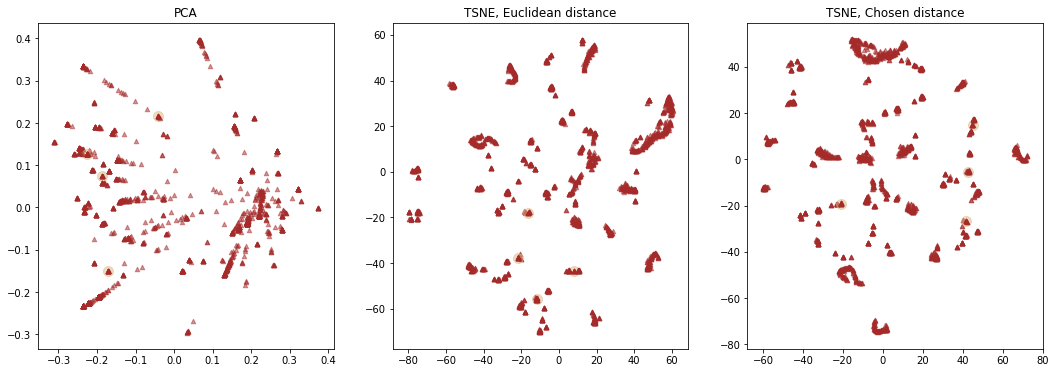

In [30]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

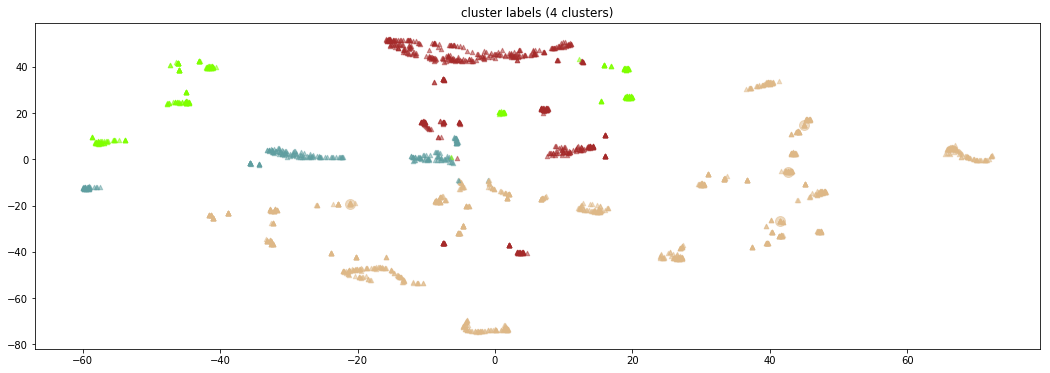

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209       0.000000e+00          0.000000          0.000007          0.000000   
495       0.000000e+00          0.000039          0.000030          0.000005   
1610      0.000000e+00          0.000005          0.000012          0.000012   
1835      1.857346e-07          0.000009          0.000022          0.000003   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.000075               0.014498            0.216180   
495           0.000000               0.011784            0.275804   
1610          0.000002               0.007597            0.117061   
1835          0.000006               0.022408            0.362246   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.331050             0.099179           0.322267   
495           0.292658             0.132576           0.240877   
1610          0.309339             0.034504           0.203534   
1835          0.111726             0.253937           0.249643   

            ...                  gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209         ...          b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495         ...          b'                  '    b'PSR  '  284.083496   
1610        ...          b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835        ...          b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  KMeans_clusters_4  
209       1                  1  
495       1                  1  
1610      1                  1  
1835      1                  1  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
100   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'        []   
235   b'                  '   b'rdg  '             b''      b'hbl'        []   
236   b'                  '   b'rdg  '             b''      b'hbl'        []   
237   b'                  '   b'rdg  '             b''      b'hbl'        []   
238   b'                  '   b'rdg  '             b''      b'hbl'        []   
239   b'                  '   b'rdg  '             b''      b'hbl'        []   
240   b'                  '   b'rdg  '             b''      b'hbl'        []   
241   b'                  '   b'rdg  '             b''      b'hbl'        []   
242   b'                  '   b'rdg  '             b''      b'hbl'        []   
243   b'                  '   b'rdg  '             b''      b'hbl'        []   
244   b'                  '   b'rdg  '             b''      b'hbl'        []   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
273   b'                  '   b'     '             b''   b'snr,mc'        []   
274   b'                  '   b'     '             b''   b'snr,mc'        []   
275   b'                  '   b'     '             b''   b'snr,mc'        []   
276   b'                  '   b'     '             b''   b'snr,mc'        []   
277   b'                  '   b'     '             b''   b'snr,mc'        []   
286   b'                  '   b'     '             b''   b'snr,mc'        []   
298   b'                  '   b'     '             b''   b'snr,mc'        []   
301   b'                  '   b'     '             b''   b'snr,mc'        []   
302   b'                  '   b'     '             b''   b'snr,mc'        []   
303   b'                  '   b'PWN  '             b''      b'psr'        []   
304   b'                  '   b'PWN  '             b''      b'psr'        []   
305   b'                  '   b'PWN  '             b''      b'psr'        []   
308   b'                  '   b'PWN  '             b''      b'psr'        []   
309   b'                  '   b'PWN  '             b''      b'psr'        []   
310   b'                  '   b'PWN  '             b''      b'psr'        []   
311   b'                  '   b'PWN  '             b''      b'psr'        []   
312   b'                  '   b'PWN  '             b''      b'psr'        []   
313   b'                  '   b'PWN  '             b''      b'pwn'        []   
...                     ...        ...             ...         ...       ...   
1906  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1907  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1910  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1911  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1912  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1914  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1915  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1916  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1919  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1922  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1926  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1927  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1928  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1931  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1932  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''   b'pwn,snr'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
110   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
111   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
115   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
117   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
119   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1     b'                  '   b'snr  '             b''      b'snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
9     b'                  '   b'snr  '             b''      b'snr'        []   
10    b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
19    b'                  '   b'snr  '             b''      b'snr'        []   
20    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
30    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1572  b'                  '   b'     '             b''      b'pwn'        []   
1573  b'                  '   b'     '             b''      b'pwn'        []   
1574  b'                  '   b'     '             b''      b'pwn'        []   
1575  b'                  '   b'     '             b''      b'pwn'        []   
1576  b'                  '   b'     '             b''      b'pwn'        []   
1577  b'                  '   b'     '             b''      b'pwn'        []   
1578  b'                  '   b'     '             b''      b'pwn'        []   
1579  b'                  '   b'     '             b''      b'pwn'        []   
1757  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1864  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1866  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1872  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1873  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1876  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1888  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1891  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1892  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1895  b'1FGL J

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1  \
199   b'                  '   b'bll  '   
200   b'                  '   b'bll  '   
202   b'                  '   b'bll  '   
203   b'                  '   b'bll  '   
204   b'                  '   b'bll  '   
205   b'                  '   b'bll  '   
206   b'                  '   b'bll  '   
207   b'                  '   b'bll  '   
208   b'                  '   b'bll  '   
317   b'                  '   b'PWN  '   
319   b'                  '   b'PWN  '   
400   b'1FGL J0854.0-4632 '   b'SNR  '   
401   b'1FGL J0854.0-4632 '   b'SNR  '   
402   b'1FGL J0854.0-4632 '   b'SNR  '   
403   b'1FGL J0854.0-4632 '   b'SNR  '   
404   b'1FGL J0854.0-4632 '   b'SNR  '   
405   b'1FGL J0854.0-4632 '   b'SNR  '   
406   b'1FGL J0854.0-4632 '   b'SNR  '   
407   b'1FGL J0854.0-4632 '   b'SNR  '   
408   b'1FGL J0854.0-4632 '   b'SNR  '   
409   b'1FGL J0854.0-4632 '   b'SNR  '   
410   b'1FGL J0854.0-4632 '   b'SNR  '   
411   b'1FGL J0854.0-4632 '   b'SNR  '   
412   b'1FGL J0854.0-4632 '   b'SNR  '   
413   b'1FGL J0854.0-4632 '   b'SNR  '   
414   b'1FGL J0854.0-4632 '   b'SNR  '   
415   b'1FGL J0854.0-4632 '   b'SNR  '   
416   b'1FGL J0854.0-4632 '   b'SNR  '   
417   b'1FGL J0854.0-4632 '   b'SNR  '   
418   b'1FGL J0854.0-4632 '   b'SNR  '   
...                     ...        ...   
1854  b'1FGL J2202.8+4216 '   b'BLL  '   
1855  b'1FGL J2202.8+4216 '   b'BLL  '   
1945  b'1FGL J2359.0-3035 '   b'bll  '   
1946  b'1FGL J2359.0-3035 '   b'bll  '   
1947  b'1FGL J2359.0-3035 '   b'bll  '   
1948  b'1FGL J2359.0-3035 '   b'bll  '   
1949  b'1FGL J2359.0-3035 '   b'bll  '   
1950  b'1FGL J2359.0-3035 '   b'bll  '   
1951  b'1FGL J2359.0-3035 '   b'bll  '   
1952  b'1FGL J2359.0-3035 '   b'bll  '   
1953  b'1FGL J2359.0-3035 '   b'bll  '   
1954  b'1FGL J2359.0-3035 '   b'bll  '   
1955  b'1FGL J2359.0-3035 '   b'bll  '   
1956  b'1FGL J2359.0-3035 '   b'bll  '   
1957  b'1FGL J2359.0-3035 '   b'bll  '   
1958  b'1FGL J2359.0-3035 '   b'bll  '   
1959  b'1FGL J2359.0-3035 '   b'bll  '   
1960  b'1FGL J2359.0-3035 '   b'bll  '   
1962  b'1FGL J2359.0-3035 '   b'bll  '   
1963  b'1FGL J2359.0-3035 '   b'bll  '   
1964  b'1FGL J2359.0-3035 '   b'bll  '   
1965  b'1FGL J2359.0-3035 '   b'bll  '   
1966  b'1FGL J2359.0-3035 '   b'bll  '   
1967  b'1FGL J2359.0-3035 '   b'bll  '   
1968  b'1FGL J2359.0-3035 '   b'bll  '   
1969  b'1FGL J2359.0-3035 '   b'bll  '   
1970  b'1FGL J2359.0-3035 '   b'bll  '   
1971  b'1FGL J2359.0-3035 '   b'bll  '   
1972  b'1FGL J2359.0-3035 '   b'bll  '   
1973  b'1FGL J2359.0-3035 '   b'bll  '   

                                        tev_fermi_names tev_classes s_MAIN_ID  \
199                                                 b''      b'hbl'        []   
200                                                 b''      b'hbl'        []   
202                                                 b''      b'hbl'        []   
203                                                 b''      b'hbl'        []   
204                                                 b''      b'hbl'        []   
205                                                 b''      b'hbl'        []   
206                                                 b''      b'hbl'        []   
207                                                 b''      b'hbl'        []   
208                                                 b''      b'hbl'        []   
317                                                 b''      b'pwn'        []   
319                                                 b''      b'pwn'        []   
400   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
401   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
402   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
403   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
404   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
405   b'1FGL J0854.0-4632,2FGL J

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.225361            0.146420          0.052107   
1               0.033553            0.261443          0.208559   
2               0.061933            0.063797          0.007530   
3               0.086993            0.064447          0.163771   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.195097           0.105094              0.0    0.142368   
1             0.133241           0.303370              0.0    0.015952   
2             0.048324           0.089474              0.0    0.073921   
3             0.052789           0.064602              0.0    0.246141   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.061884  0.023315   0.009816   0.002594          0.002553   
1  0.009979  0.006852   0.004611   0.002854          0.001056   
2  0.024021  0.020176   0.039757   0.272602          0.015617   
3  0.125257  0.099325   0.054227   0.022382          0.000545   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.005041          0.008804          0.010764          0.008785  
1          0.003211          0.003646          0.004460          0.007213  
2          0.068765          0.089288          0.073711          0.051083  
3          0.000988          0.002334          0.004924          0.011275

In [ ]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [32]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())
print("centroids:")
display(centers)

0 cluster (#A52A2A)


array(["b'1FGL J0035.9+5951 '", "b'                  '",
       "b'1FGL J0416.8+0107 '", "b'1FGL J0650.7+2503 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1221.3+3008 '", "b'1FGL J1614.7-5138c'",
       "b'1FGL J1653.9+3945 '", "b'1FGL J1803.1-2147c'",
       "b'1FGL J1837.5-0659c'", "b'1FGL J2009.5-4849 '",
       "b'1FGL J2158.8-3013 '", "b'1FGL J2323.4+5849 '"], dtype=object)

1 cluster (#DEB887)


array(["b'1FGL J0007.0+7303 '", "b'1FGL J0047.3-2512 '",
       "b'1FGL J0205.6+6449 '", "b'1FGL J0222.6+4302 '",
       "b'1FGL J0240.5+6113 '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0617.2+2233 '", "b'1FGL J0633.9+1746 '",
       "b'1FGL J0721.9+7120 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1000.1+6539 '", "b'                  '",
       "b'1FGL J1119.4-6127c'", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1256.2-0547 '", "b'1FGL J1322.0-4515 '",
       "b'1FGL J1418.7-6057 '", "b'1FGL J1617.5-5105c'",
       "b'1FGL J1714.5-3830c'", "b'1FGL J1718.2-3825 '",
       "b'1FGL J1747.9-2448 '", "b'1FGL J1801.3-2322c'",
       "b'1FGL J1808.5-1954c'", "b'1FGL J1813.3-1246 '",
       "b'1FGL J1826.1-1256 '", "b'1FGL J1826.2-1450 '",
       "b'1FGL J1834.3-0842c'", "b'1FGL J1833.5-1034 '",
       "b'1FGL J1848.1-0145c'", "b'1FGL J1850.2-0019c'",
       "b'1FGL J1907.9+0602 '", "b'1FGL J1910.9+0906c'",
       "b'1FGL J1922.9+1411 '", "b'1FGL J2001.1+4351 '",
       "b'1FGL J2015.7+3708 '",

2 cluster (#5F9EA0)


array(["b'                  '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0416.8+0107 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1015.1+4927 '", "b'1FGL J1103.7-2329 '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1221.3+3008 '", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1322.0-4515 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1555.7+1111 '", "b'1FGL J1747.9-2448 '",
       "b'1FGL J2000.0+6508 '", "b'1FGL J2323.4+5849 '",
       "b'1FGL J2359.0-3035 '"], dtype=object)

3 cluster (#7FFF00)


array(["b'                  '", "b'1FGL J0854.0-4632 '",
       "b'1FGL J1221.5+2814 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1513.2-5904 '", "b'1FGL J1626.0-4917c'",
       "b'1FGL J1711.7-3944c'", "b'1FGL J1825.7-1410c'",
       "b'1FGL J2020.0+4049 '", "b'1FGL J2202.8+4216 '",
       "b'1FGL J2359.0-3035 '"], dtype=object)

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.225361            0.146420          0.052107   
1               0.033553            0.261443          0.208559   
2               0.061933            0.063797          0.007530   
3               0.086993            0.064447          0.163771   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.195097           0.105094              0.0    0.142368   
1             0.133241           0.303370              0.0    0.015952   
2             0.048324           0.089474              0.0    0.073921   
3             0.052789           0.064602              0.0    0.246141   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.061884  0.023315   0.009816   0.002594          0.002553   
1  0.009979  0.006852   0.004611   0.002854          0.001056   
2  0.024021  0.020176   0.039757   0.272602          0.015617   
3  0.125257  0.099325   0.054227   0.022382          0.000545   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.005041          0.008804          0.010764          0.008785  
1          0.003211          0.003646          0.004460          0.007213  
2          0.068765          0.089288          0.073711          0.051083  
3          0.000988          0.002334          0.004924          0.011275

In [33]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0035.9+5951 '" "b'                  '" "b'1FGL J0416.8+0107 '"
 "b'1FGL J0650.7+2503 '" "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '"
 "b'1FGL J1221.3+3008 '" "b'1FGL J1614.7-5138c'" "b'1FGL J1653.9+3945 '"
 "b'1FGL J1803.1-2147c'" "b'1FGL J1837.5-0659c'" "b'1FGL J2009.5-4849 '"
 "b'1FGL J2158.8-3013 '" "b'1FGL J2323.4+5849 '"]
['[]' '["b\'MSX6C G331.5487-00.5364\'" "b\'MSX6C G331.5487-00.5364\'"]']
1 cluster (#DEB887)
["b'1FGL J0007.0+7303 '" "b'1FGL J0047.3-2512 '" "b'1FGL J0205.6+6449 '"
 "b'1FGL J0222.6+4302 '" "b'1FGL J0240.5+6113 '" "b'1FGL J0319.7+4130 '"
 "b'1FGL J0617.2+2233 '" "b'1FGL J0633.9+1746 '" "b'1FGL J0721.9+7120 '"
 "b'1FGL J0956.5+6938 '" "b'1FGL J1000.1+6539 '" "b'                  '"
 "b'1FGL J1119.4-6127c'" "b'1FGL J1230.8+1223 '" "b'1FGL J1256.2-0547 '"
 "b'1FGL J1322.0-4515 '" "b'1FGL J1418.7-6057 '" "b'1FGL J1617.5-5105c'"
 "b'1FGL J1714.5-3830c'" "b'1FGL J1718.2-3825 '" "b'1FGL J1747.9-2448 '"
 "b'1FGL J1801.3-2322c'" "b'1FGL J

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


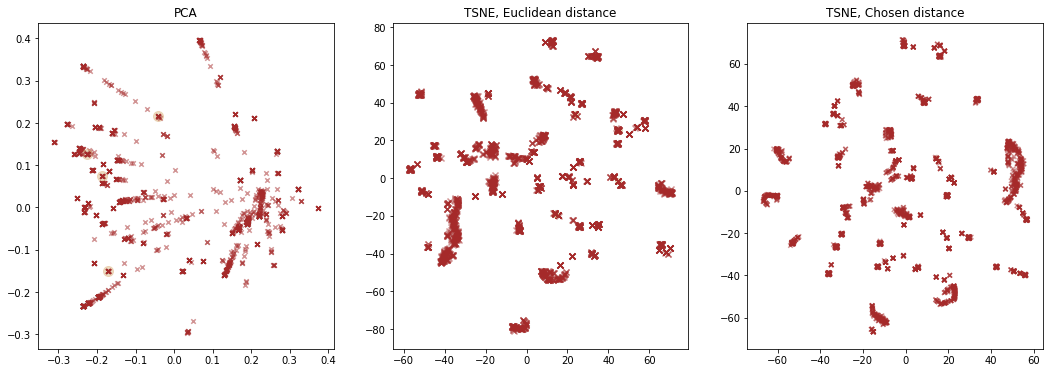

Clustering


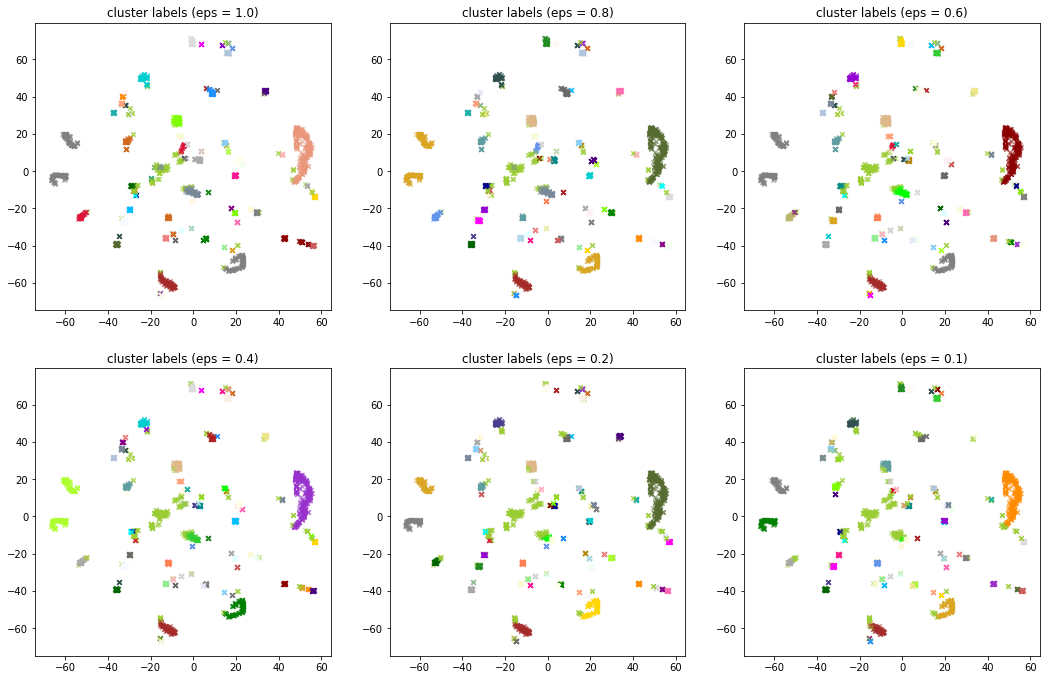

In [34]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


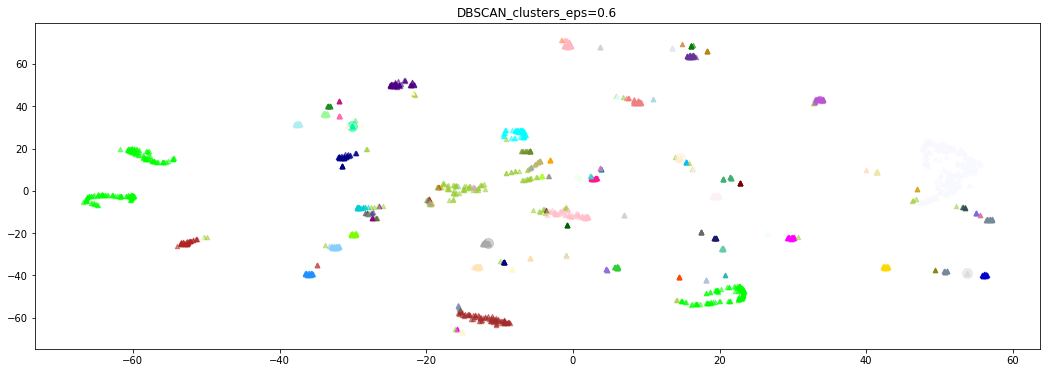

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209       0.000000e+00          0.000000          0.000007          0.000000   
495       0.000000e+00          0.000039          0.000030          0.000005   
1610      0.000000e+00          0.000005          0.000012          0.000012   
1835      1.857346e-07          0.000009          0.000022          0.000003   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.000075               0.014498            0.216180   
495           0.000000               0.011784            0.275804   
1610          0.000002               0.007597            0.117061   
1835          0.000006               0.022408            0.362246   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.331050             0.099179           0.322267   
495           0.292658             0.132576           0.240877   
1610          0.309339             0.034504           0.203534   
1835          0.111726             0.253937           0.249643   

               ...                     gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209            ...             b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495            ...             b'                  '    b'PSR  '  284.083496   
1610           ...             b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835           ...             b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  DBSCAN_clusters_eps=0.6  
209       1                       13  
495       1                       38  
1610      1                       82  
1835      1                      101  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1   b'                  '   b'snr  '             b''      b'snr'        []   
3   b'                  '   b'snr  '             b''      b'snr'        []   
5   b'                  '   b'snr  '             b''      b'snr'        []   
6   b'                  '   b'snr  '             b''      b'snr'        []   
7   b'                  '   b'snr  '             b''      b'snr'        []   
8   b'                  '   b'snr  '             b''      b'snr'        []   
9   b'                  '   b'snr  '             b''      b'snr'        []   
10  b'                  '   b'snr  '             b''      b'snr'        []   
11  b'                  '   b'snr  '             b''      b'snr'        []   
12  b'                  '   b'snr  '             b''      b'snr'        []   
13  b'                  '   b'snr  '             b''      b'snr'        []   
14  b'                  '   b'snr  '             b''      b'snr'        []   
15  b'                  '   b'snr  '             b''      b'snr'        []   
16  b'                  '   b'snr  '             b''      b'snr'        []   
17  b'                  '   b'snr  '             b''      b'snr'        []   
18  b'                  '   b'snr  '             b''      b'snr'        []   
19  b'                  '   b'snr  '             b''      b'snr'        []   
20  b'                  '   b'snr  '             b''      b'snr'        []   
21  b'                  '   b'snr  '             b''      b'snr'        []   
22  b'                  '   b'snr  '             b''      b'snr'        []   
23  b'                  '   b'snr  '             b''      b'snr'        []   
24  b'                  '   b'snr  '             b''      b'snr'        []   
26  b'                  '   b'snr  '             b''      b'snr'        []   
27  b'                  '   b'snr  '             b''      b'snr'        []   
28  b'                  '   b'snr  '             b''      b'snr'        []   
30  b'                  '   b'snr  '             b''      b'snr'        []   
31  b'                  '   b'snr  '             b''      b'snr'        []   
32  b'                  '   b'snr  '             b''      b'snr'        []   
33  b'                  '   b'snr  '             b''      b'snr'        []   
36  b'                  '   b'snr  '             b''      b'snr'        []   
..                    ...        ...             ...         ...       ...   
60  b'                  '   b'snr  '             b''      b'snr'        []   
61  b'                  '   b'snr  '             b''      b'snr'        []   
62  b'                  '   b'snr  '             b''      b'snr'        []   
63  b'                  '   b'snr  '             b''      b'snr'        []   
66  b'                  '   b'snr  '             b''      b'snr'        []   
68  b'                  '   b'snr  '             b''      b'snr'        []   
69  b'                  '   b'snr  '             b''      b'snr'        []   
71  b'                  '   b'snr  '             b''      b'snr'        []   
72  b'                  '   b'snr  '             b''      b'snr'        []   
73  b'                  '   b'snr  '             b''      b'snr'        []   
74  b'                  '   b'snr  '             b''      b'snr'        []   
75  b'                  '   b'snr  '             b''      b'snr'        []   
76  b'                  '   b'snr  '             b''      b'snr'        []   
79  b'                  '   b'snr  '             b''      b'snr'        []   
81  b'                  '   b'snr  '             b''      b'snr'        []   
82  b'                  '   b'snr  '             b''      b'snr'        []   
83  b'                  '   b'snr  '             b''      b'snr'        []   
84  b'                  '   b'snr  '             b''      b'snr'        []   
85  b'                  '   b'snr  '             b''      b'snr'        []   
87  b'                  '   b'snr 

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2   b'                  '   b'snr  '             b''      b'snr'        []   
64  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
2       []         0       0  b'3XMM J002458.6+641028'   
64      []         0       0  b'3XMM J002531.1+641114'   

                                      xmm_WEBPAGE_URL  
2   b'http://xmm-catalog.irap.omp.eu/source/200962...  
64  b'http://xmm-catalog.irap.omp.eu/source/200962...

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
25  b'                  '   b'snr  '             b''      b'snr'        []   
65  b'                  '   b'snr  '             b''      b'snr'        []   
78  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
25      []         0       0  b'3XMM J002511.1+641120'   
65      []         0       0  b'3XMM J002531.3+640634'   
78      []         0       0  b'3XMM J002535.3+640617'   

                                      xmm_WEBPAGE_URL  
25  b'http://xmm-catalog.irap.omp.eu/source/200962...  
65  b'http://xmm-catalog.irap.omp.eu/source/205111...  
78  b'http://xmm-catalog.irap.omp.eu/source/204123...

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
29  b'                  '   b'snr  '             b''      b'snr'        []   
35  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
29      []         0       0  b'3XMM J002515.4+641127'   
35      []         0       0  b'3XMM J002517.5+640506'   

                                      xmm_WEBPAGE_URL  
29  b'http://xmm-catalog.irap.omp.eu/source/205111...  
35  b'http://xmm-catalog.irap.omp.eu/source/200962...

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
34  b'                  '   b'snr  '             b''      b'snr'        []   
92  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
34      []         0       0  b'3XMM J002517.4+641135'   
92      []         0       0  b'3XMM J002541.7+641029'   

                                      xmm_WEBPAGE_URL  
34  b'http://xmm-catalog.irap.omp.eu/source/200962...  
92  b'http://xmm-catalog.irap.omp.eu/source/200962...

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
46  b'                  '   b'snr  '             b''      b'snr'        []   
58  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
46      []         0       0  b'3XMM J002525.8+640536'   
58      []         0       0  b'3XMM J002529.4+640631'   

                                      xmm_WEBPAGE_URL  
46  b'http://xmm-catalog.irap.omp.eu/source/203105...  
58  b'http://xmm-catalog.irap.omp.eu/source/204123...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
48  b'                  '   b'snr  '             b''      b'snr'        []   
51  b'                  '   b'snr  '             b''      b'snr'        []   
70  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
48      []         0       0  b'3XMM J002526.4+640749'   
51      []         0       0  b'3XMM J002526.6+640522'   
70      []         0       0  b'3XMM J002533.3+640629'   

                                      xmm_WEBPAGE_URL  
48  b'http://xmm-catalog.irap.omp.eu/source/200962...  
51  b'http://xmm-catalog.irap.omp.eu/source/205111...  
70  b'http://xmm-catalog.irap.omp.eu/source/203105...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
59  b'                  '   b'snr  '             b''      b'snr'        []   
86  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
59      []         0       0  b'3XMM J002529.6+641121'   
86      []         0       0  b'3XMM J002540.0+641037'   

                                      xmm_WEBPAGE_URL  
59  b'http://xmm-catalog.irap.omp.eu/source/203105...  
86  b'http://xmm-catalog.irap.omp.eu/source/204123...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
77  b'                  '   b'snr  '             b''      b'snr'        []   
80  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
77      []         0       0  b'3XMM J002535.3+640556'   
80      []         0       0  b'3XMM J002536.3+641106'   

                                      xmm_WEBPAGE_URL  
77  b'http://xmm-catalog.irap.omp.eu/source/200962...  
80  b'http://xmm-catalog.irap.omp.eu/source/203105...

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
101  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
102  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
103  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
104  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
105  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
106  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
107  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
108  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
109  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
110  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
111  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
112  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
113  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
114  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
115  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
116  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
117  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
118  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
119  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
120  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
121  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
122  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
127  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
146  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
150  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
151  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
152  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galax

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
155   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
156   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
157   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
158   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
159   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
160   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
161   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
162   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
163   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
164   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
165   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
166   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
167   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
168   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
169   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
170   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
171   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
172   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
173   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
174   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
175   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
176   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
177   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
178   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
180   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
186   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
189   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
190   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
191   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
1537  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1538  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1539  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1540  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1541  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1542  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1543  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1544  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1545  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1546  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
155       []         0       0  b'3XMM J020507.7+644938'   
156       []         0       0  b'3XMM J020508.2+644949'   
157       []         0       0  b'3XMM J020509.6+644941'   
158       [] 

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
192  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
193  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
194  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
195  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
196  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
197  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
198  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
192      []         0       0  b'3XMM J022225.5+430409'   
193      []         0       0  b'3XMM J022230.9+430357'   
194      []         0       0  b'3XMM J022232.7+430446'   
195      []         0       0  b'3XMM J022239.6+430207'   
196      []         0       0  b'3XMM J022242.7+430405'   
197      []         0       0  b'3XMM J022243.0+430239'   
198      []         0       0  b'3XMM J022256.4+430336'   

                                       xmm_WEBPAGE_URL  
192  b'http://xmm-catalog.irap.omp.eu/source/200029...  
193  b'http://xmm-catalog.irap.omp.eu/source/200029...  
194  b'http://xmm-catalog.irap.omp.eu/source/200029...  
195  b'http://xmm-catalog.irap.omp.eu/source/200029...  
196  b'http://xmm-catalog.irap.omp.eu/source/200029...  
197  b'http://xmm-catalog.irap.omp.eu/source/200029...  
198  b'http://xmm-catalog.irap.omp.eu/source/200029...

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
199  b'                  '   b'bll  '             b''      b'hbl'        []   
200  b'                  '   b'bll  '             b''      b'hbl'        []   
202  b'                  '   b'bll  '             b''      b'hbl'        []   
203  b'                  '   b'bll  '             b''      b'hbl'        []   
204  b'                  '   b'bll  '             b''      b'hbl'        []   
205  b'                  '   b'bll  '             b''      b'hbl'        []   
206  b'                  '   b'bll  '             b''      b'hbl'        []   
207  b'                  '   b'bll  '             b''      b'hbl'        []   
208  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
199      []         0       0  b'3XMM J023246.1+201933'   
200      []         0       0  b'3XMM J023246.3+201815'   
202      []         0       0  b'3XMM J023250.5+201653'   
203      []         0       0  b'3XMM J023250.9+201926'   
204      []         0       0  b'3XMM J023251.4+201751'   
205      []         0       0  b'3XMM J023254.5+201807'   
206      []         0       0  b'3XMM J023256.7+201848'   
207      []         0       0  b'3XMM J023256.9+201905'   
208      []         0       0  b'3XMM J023300.3+201826'   

                                       xmm_WEBPAGE_URL  
199  b'http://xmm-catalog.irap.omp.eu/source/206042...  
200  b'http://xmm-catalog.irap.omp.eu/source/206042...  
202  b'http://xmm-catalog.irap.omp.eu/source/206042...  
203  b'http://xmm-catalog.irap.omp.eu/source/206042...  
204  b'http://xmm-catalog.irap.omp.eu/source/206042...  
205  b'http://xmm-catalog.irap.omp.eu/source/206042...  
206  b'http://xmm-catalog.irap.omp.eu/source/206042...  
207  b'http://xmm-catalog.irap.omp.eu/source/206042...  
208  b'http://xmm-catalog.irap.omp.eu/source/206042...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
209  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
210  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
211  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
212  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
213  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
214  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
215  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
216  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
217  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
219  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
220  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
221  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
222  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
223  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
226  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
227  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
228  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
230  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
231  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
232  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
234  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   

                                       s_MAIN_ID   s_class  s_simbad  marked  \
209  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       1   
210  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
211  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
212  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
213  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
214  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
215  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
216  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
217  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
218  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
219  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
220  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
221  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
222  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
223  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
224  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
225  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
226  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
227  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
228  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
229  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
230  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
231  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
232  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
233  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   
234  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1 

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
235  b'                  '   b'rdg  '             b''      b'hbl'        []   
236  b'                  '   b'rdg  '             b''      b'hbl'        []   
237  b'                  '   b'rdg  '             b''      b'hbl'        []   
239  b'                  '   b'rdg  '             b''      b'hbl'        []   
240  b'                  '   b'rdg  '             b''      b'hbl'        []   
241  b'                  '   b'rdg  '             b''      b'hbl'        []   
242  b'                  '   b'rdg  '             b''      b'hbl'        []   
243  b'                  '   b'rdg  '             b''      b'hbl'        []   
244  b'                  '   b'rdg  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
235      []         0       0  b'3XMM J031638.3+411637'   
236      []         0       0  b'3XMM J031638.3+411631'   
237      []         0       0  b'3XMM J031639.0+411922'   
239      []         0       0  b'3XMM J031644.3+411840'   
240      []         0       0  b'3XMM J031646.6+411816'   
241      []         0       0  b'3XMM J031649.4+411823'   
242      []         0       0  b'3XMM J031651.2+411949'   
243      []         0       0  b'3XMM J031651.9+412213'   
244      []         0       0  b'3XMM J031657.9+411844'   

                                       xmm_WEBPAGE_URL  
235  b'http://xmm-catalog.irap.omp.eu/source/201515...  
236  b'http://xmm-catalog.irap.omp.eu/source/201515...  
237  b'http://xmm-catalog.irap.omp.eu/source/201515...  
239  b'http://xmm-catalog.irap.omp.eu/source/201515...  
240  b'http://xmm-catalog.irap.omp.eu/source/201515...  
241  b'http://xmm-catalog.irap.omp.eu/source/203056...  
242  b'http://xmm-catalog.irap.omp.eu/source/203056...  
243  b'http://xmm-catalog.irap.omp.eu/source/201515...  
244  b'http://xmm-catalog.irap.omp.eu/source/201515...

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
245  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
248  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
255  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
257  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
261  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
268  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
245      []         0       0  b'3XMM J031931.2+413107'   
248      []         0       0  b'3XMM J031933.4+412947'   
255      []         0       0  b'3XMM J031940.7+413218'   
257      []         0       0  b'3XMM J031941.5+413017'   
261      []         0       0  b'3XMM J031947.5+413210'   
268      []         0       0  b'3XMM J032000.0+413130'   

                                       xmm_WEBPAGE_URL  
245  b'http://xmm-catalog.irap.omp.eu/source/203057...  
248  b'http://xmm-catalog.irap.omp.eu/source/200851...  
255  b'http://xmm-catalog.irap.omp.eu/source/203057...  
257  b'http://xmm-catalog.irap.omp.eu/source/203057...  
261  b'http://xmm-catalog.irap.omp.eu/source/203057...  
268  b'http://xmm-catalog.irap.omp.eu/source/200851...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
246  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
247  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
249  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
250  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
251  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
252  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
253  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
254  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
256  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
258  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
259  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
263  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
264  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
265  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
266  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
269  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
246      []         0       0  b'3XMM J031932.0+412954'   
247      []         0       0  b'3XMM J031932.4+412931'   
249      []         0       0  b'3XMM J031934.4+412954'   
250      []         0       0  b'3XMM J031935.3+412900'   
251      []         0       0  b'3XMM J031937.5+413128'   
252      []         0       0  b'3XMM J031938.0+413050'   
253      []         0       0  b'3XMM J031938.2+413138'   
254      []         0       0  b'3XMM J031939.9+413149'   
256      []         0       0  b'3XMM J031941.3+413203'   
258      []         0       0  b'3XMM J031942.8+412940'   
259      []         0       0  b'3XMM J031945.6+412938'   
263      []         0       0  b'3XMM J031950.5+413015'   
264      []         0       0  b'3XMM J031952.8+413010'   
265      []         0       0  b'3XMM J031955.7+413249'   
266      []         0       0  b'3XMM J031957.2+413220'   
269      []         0       0  b'3XMM J032006.4+413044'   

                                       xmm_WEBPAGE_URL  
246  b'http://xmm-catalog.irap.omp.eu/source/203057...  
247  b'http://xmm-catalog.irap.omp.eu/source/203057...  
249  b'http://xmm-catalog.irap.omp.eu/source/203057...  
250  b'http://xmm-catalog.irap.omp.eu/source/200851...  
251  b'http://xmm-catalog.irap.omp.eu/source/203057...  
252  b'http://xmm-catalog.irap.omp.eu/source/200851...  
253  b'http://xmm-catalog.irap.omp.eu/source/200851...  
254  b'http://xmm-catalog.irap.omp.eu/source/203057...  
256  b'http://xmm-catalog.irap.omp.eu/source/200851...  
258  b'http://xmm-catalog.irap.omp.eu/source/200851...  
259  b'http://xmm-catalog.irap.omp.eu/source/200851...  
263  b'http://xmm-catalog.irap.omp.eu/source/200851...  
264  b'http://xmm-catalog.irap.omp.eu/source/200851...  
265  b'http://xmm-catalog.irap.omp.eu/source/203057...  
266  b'http://xmm-catalog.irap.omp.eu/source/200851...  
269  b'http://xmm-catalog.irap.omp.eu/source/203057...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
274  b'                  '   b'     '             b''   b'snr,mc'        []   
275  b'                  '   b'     '             b''   b'snr,mc'        []   
298  b'                  '   b'     '             b''   b'snr,mc'        []   
301  b'                  '   b'     '             b''   b'snr,mc'        []   
302  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
274      []         0       0  b'3XMM J052443.0-693938'   
275      []         0       0  b'3XMM J052444.0-694058'   
298      []         0       0  b'3XMM J052509.2-693707'   
301      []         0       0  b'3XMM J052525.1-693742'   
302      []         0       0  b'3XMM J052529.6-693940'   

                                       xmm_WEBPAGE_URL  
274  b'http://xmm-catalog.irap.omp.eu/source/201375...  
275  b'http://xmm-catalog.irap.omp.eu/source/206907...  
298  b'http://xmm-catalog.irap.omp.eu/source/201375...  
301  b'http://xmm-catalog.irap.omp.eu/source/201375...  
302  b'http://xmm-catalog.irap.omp.eu/source/201375...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
276  b'                  '   b'     '             b''   b'snr,mc'        []   
277  b'                  '   b'     '             b''   b'snr,mc'        []   
286  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
276      []         0       0  b'3XMM J052450.8-693633'   
277      []         0       0  b'3XMM J052454.7-693835'   
286      []         0       0  b'3XMM J052500.1-693904'   

                                       xmm_WEBPAGE_URL  
276  b'http://xmm-catalog.irap.omp.eu/source/206907...  
277  b'http://xmm-catalog.irap.omp.eu/source/204141...  
286  b'http://xmm-catalog.irap.omp.eu/source/201573...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
278  b'                  '   b'     '             b''   b'snr,mc'        []   
285  b'                  '   b'     '             b''   b'snr,mc'        []   
297  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
278      []         0       0  b'3XMM J052455.5-693824'   
285      []         0       0  b'3XMM J052459.1-693911'   
297      []         0       0  b'3XMM J052508.9-693847'   

                                       xmm_WEBPAGE_URL  
278  b'http://xmm-catalog.irap.omp.eu/source/201251...  
285  b'http://xmm-catalog.irap.omp.eu/source/201251...  
297  b'http://xmm-catalog.irap.omp.eu/source/202106...

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
288  b'                  '   b'     '             b''   b'snr,mc'        []   
296  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
288      []         0       0  b'3XMM J052500.9-693807'   
296      []         0       0  b'3XMM J052508.3-693818'   

                                       xmm_WEBPAGE_URL  
288  b'http://xmm-catalog.irap.omp.eu/source/202106...  
296  b'http://xmm-catalog.irap.omp.eu/source/201293...

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
289  b'                  '   b'     '             b''   b'snr,mc'        []   
291  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
289      []         0       0  b'3XMM J052501.1-693848'   
291      []         0       0  b'3XMM J052502.6-693848'   

                                       xmm_WEBPAGE_URL  
289  b'http://xmm-catalog.irap.omp.eu/source/202106...  
291  b'http://xmm-catalog.irap.omp.eu/source/201251...

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
290  b'                  '   b'     '             b''   b'snr,mc'        []   
295  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
290      []         0       0  b'3XMM J052501.7-693912'   
295      []         0       0  b'3XMM J052507.0-693901'   

                                       xmm_WEBPAGE_URL  
290  b'http://xmm-catalog.irap.omp.eu/source/201571...  
295  b'http://xmm-catalog.irap.omp.eu/source/201573...

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
299  b'                  '   b'     '             b''   b'snr,mc'        []   
300  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
299      []         0       0  b'3XMM J052512.2-693810'   
300      []         0       0  b'3XMM J052518.8-694012'   

                                       xmm_WEBPAGE_URL  
299  b'http://xmm-catalog.irap.omp.eu/source/201251...  
300  b'http://xmm-catalog.irap.omp.eu/source/201375...

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
303  b'                  '   b'PWN  '             b''      b'psr'        []   
311  b'                  '   b'PWN  '             b''      b'psr'        []   
312  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
303      []         0       0  b'3XMM J053422.4+215823'   
311      []         0       0  b'3XMM J053440.7+220258'   
312      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
303  b'http://xmm-catalog.irap.omp.eu/source/203127...  
311  b'http://xmm-catalog.irap.omp.eu/source/203127...  
312  b'http://xmm-catalog.irap.omp.eu/source/203127...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
304  b'                  '   b'PWN  '             b''      b'psr'        []   
305  b'                  '   b'PWN  '             b''      b'psr'        []   
308  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
304      []         0       0  b'3XMM J053426.2+220233'   
305      []         0       0  b'3XMM J053427.1+215826'   
308      []         0       0  b'3XMM J053432.2+220240'   

                                       xmm_WEBPAGE_URL  
304  b'http://xmm-catalog.irap.omp.eu/source/203127...  
305  b'http://xmm-catalog.irap.omp.eu/source/203127...  
308  b'http://xmm-catalog.irap.omp.eu/source/203127...

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
313  b'                  '   b'PWN  '             b''      b'pwn'        []   
314  b'                  '   b'PWN  '             b''      b'pwn'        []   
315  b'                  '   b'PWN  '             b''      b'pwn'        []   
318  b'                  '   b'PWN  '             b''      b'pwn'        []   
320  b'                  '   b'PWN  '             b''      b'pwn'        []   
321  b'                  '   b'PWN  '             b''      b'pwn'        []   
322  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
313      []         0       0  b'3XMM J053422.4+215823'   
314      []         0       0  b'3XMM J053426.2+220233'   
315      []         0       0  b'3XMM J053427.1+215826'   
318      []         0       0  b'3XMM J053432.2+220240'   
320      []         0       0  b'3XMM J053435.6+215846'   
321      []         0       0  b'3XMM J053440.7+220258'   
322      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
313  b'http://xmm-catalog.irap.omp.eu/source/203127...  
314  b'http://xmm-catalog.irap.omp.eu/source/203127...  
315  b'http://xmm-catalog.irap.omp.eu/source/203127...  
318  b'http://xmm-catalog.irap.omp.eu/source/203127...  
320  b'http://xmm-catalog.irap.omp.eu/source/203127...  
321  b'http://xmm-catalog.irap.omp.eu/source/203127...  
322  b'http://xmm-catalog.irap.omp.eu/source/203127...

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
323  b'                  '   b'bll  '             b''      b'hbl'        []   
324  b'                  '   b'bll  '             b''      b'hbl'        []   
325  b'                  '   b'bll  '             b''      b'hbl'        []   
326  b'                  '   b'bll  '             b''      b'hbl'        []   
327  b'                  '   b'bll  '             b''      b'hbl'        []   
328  b'                  '   b'bll  '             b''      b'hbl'        []   
330  b'                  '   b'bll  '             b''      b'hbl'        []   
331  b'                  '   b'bll  '             b''      b'hbl'        []   
332  b'                  '   b'bll  '             b''      b'hbl'        []   
333  b'                  '   b'bll  '             b''      b'hbl'        []   
337  b'                  '   b'bll  '             b''      b'hbl'        []   
338  b'                  '   b'bll  '             b''      b'hbl'        []   
340  b'                  '   b'bll  '             b''      b'hbl'        []   
341  b'                  '   b'bll  '             b''      b'hbl'        []   
342  b'                  '   b'bll  '             b''      b'hbl'        []   
343  b'                  '   b'bll  '             b''      b'hbl'        []   
344  b'                  '   b'bll  '             b''      b'hbl'        []   
345  b'                  '   b'bll  '             b''      b'hbl'        []   
347  b'                  '   b'bll  '             b''      b'hbl'        []   
348  b'                  '   b'bll  '             b''      b'hbl'        []   
349  b'                  '   b'bll  '             b''      b'hbl'        []   
350  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
323      []         0       0  b'3XMM J055028.4-321516'   
324      []         0       0  b'3XMM J055028.7-321712'   
325      []         0       0  b'3XMM J055031.5-321738'   
326      []         0       0  b'3XMM J055032.2-321647'   
327      []         0       0  b'3XMM J055032.3-321606'   
328      []         0       0  b'3XMM J055034.0-321828'   
330      []         0       0  b'3XMM J055036.6-321732'   
331      []         0       0  b'3XMM J055036.7-321326'   
332      []         0       0  b'3XMM J055039.3-321337'   
333      []         0       0  b'3XMM J055039.4-321842'   
337      []         0       0  b'3XMM J055042.1-321735'   
338      []         0       0  b'3XMM J055042.8-321805'   
340      []         0       0  b'3XMM J055043.2-321711'   
341      []         0       0  b'3XMM J055044.6-321422'   
342      []         0       0  b'3XMM J055044.9-321708'   
343      []         0       0  b'3XMM J055045.5-321924'   
344      []         0       0  b'3XMM J055046.3-321714'   
345      []         0       0  b'3XMM J055046.5-321350'   
347      []         0       0  b'3XMM J055048.0-321456'   
348      []         0       0  b'3XMM J055050.0-321539'   
349      []         0       0  b'3XMM J055051.8-321602'   
350      []         0       0  b'3XMM J055053.7-321603'   

                                       xmm_WEBPAGE_URL  
323  b'http://xmm-catalog.irap.omp.eu/source/201422...  
324  b'http://xmm-catalog.irap.omp.eu/source/201422...  
325  b'http://xmm-catalog.irap.omp.eu/source/201118...  
326  b'http://xmm-catalog.irap.omp.eu/source/201422...  
327  b'http://xmm-catalog.irap.omp.eu/source/201422...  
328  b'http://xmm-catalog.irap.omp.eu/source/201118...  
330  b'http://xmm-catalog.irap.omp.eu/source/201118...  
331  b'http://xmm-catalog.irap.omp.eu/source/201422...  
332  b'http://xmm-catalog.irap.omp.eu/source/201118...  
333  b'http://xmm-catalog.irap.omp.eu/source/201422...  
337  b'http://xmm-catalog.irap.omp.eu/source/201422...  
338  b'http://xmm-catalog.irap.omp.eu/source/201422...  
340  b'http://xmm-catalog.irap.omp.eu/source/202059...  
341  b'http://xmm-catalog.irap.omp.eu/s

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
334  b'                  '   b'bll  '             b''      b'hbl'        []   
336  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
334      []         0       0  b'3XMM J055039.8-321516'   
336      []         0       0  b'3XMM J055041.1-321710'   

                                       xmm_WEBPAGE_URL  
334  b'http://xmm-catalog.irap.omp.eu/source/201118...  
336  b'http://xmm-catalog.irap.omp.eu/source/201422...

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
351  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
352  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
353  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
354  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
355  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
356  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
357  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
358  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
359  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
360  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
361  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
362  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
363  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
364  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
365  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
366  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
367  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
368  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
369  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
370  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
371  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
372  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
373  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   

            s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
351  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061748.2+223852'   
352  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061749.1+223851'   
353  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061750.8+224104'   
354  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061752.0+224057'   
355  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.4+224059'   
356  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.9+224021'   
357  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061755.1+224215'   
358  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061755.7+224040'   
359  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061757.5+223753'   
360  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061758.4+224236'   
361  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061758.6+223622'   
362  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061759.8+223631'   
363  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.1+223647'   
364  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.2+223706'   
365  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.6+223820'   
366  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.7+223810'   
367  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.1+223912'   
368  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.3+223650'   
369  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.6+224102'   
370  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061805.0+223922'   
371  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061805.7+223632'   
372  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061810.9+223902'   
373  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061816.6+224026'   

                                       xmm_WEBPAGE_URL  
351  b'http://xmm-catalog.irap.omp.eu/source/206001...  
352  b'http://xmm-catalog.irap.omp.eu/source/201141...  
353  b'http://xmm-catalog.irap.omp.eu/source/203019...  
354  b'http://xmm-catalog.irap.omp.eu/source/206001...  
355  b'http://xmm-catalog.irap.omp.eu/source/201141...  
356  b'http://xmm-catalog.irap.omp.eu/source/203019...  
357  b'http://xmm-catalog.irap.omp.eu/source/201141...  
358

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
374  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
375  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
376  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
377  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
378  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
379  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
380  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
381  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
382  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
383  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
384  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
374      []         0       0  b'3XMM J063343.5+174547'   
375      []         0       0  b'3XMM J063344.6+174551'   
376      []         0       0  b'3XMM J063346.3+174611'   
377      []         0       0  b'3XMM J063347.6+174407'   
378      []         0       0  b'3XMM J063349.1+174732'   
379      []         0       0  b'3XMM J063350.9+174623'   
380      []         0       0  b'3XMM J063351.3+174848'   
381      []         0       0  b'3XMM J063351.6+174436'   
382      []         0       0  b'3XMM J063354.1+174523'   
383      []         0       0  b'3XMM J063354.2+174614'   
384      []         0       0  b'3XMM J063355.3+174852'   

                                       xmm_WEBPAGE_URL  
374  b'http://xmm-catalog.irap.omp.eu/source/205504...  
375  b'http://xmm-catalog.irap.omp.eu/source/201111...  
376  b'http://xmm-catalog.irap.omp.eu/source/201111...  
377  b'http://xmm-catalog.irap.omp.eu/source/201111...  
378  b'http://xmm-catalog.irap.omp.eu/source/201111...  
379  b'http://xmm-catalog.irap.omp.eu/source/203115...  
380  b'http://xmm-catalog.irap.omp.eu/source/201111...  
381  b'http://xmm-catalog.irap.omp.eu/source/201111...  
382  b'http://xmm-catalog.irap.omp.eu/source/201111...  
383  b'http://xmm-catalog.irap.omp.eu/source/201111...  
384  b'http://xmm-catalog.irap.omp.eu/source/201111...

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
385  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
386  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
385      []         0       0  b'3XMM J065043.3+250334'   
386      []         0       0  b'3XMM J065046.3+250204'   

                                       xmm_WEBPAGE_URL  
385  b'http://xmm-catalog.irap.omp.eu/source/200943...  
386  b'http://xmm-catalog.irap.omp.eu/source/200943...

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
388  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
389  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
390  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
391  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
392  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
393  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
394  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
395  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
396  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
397  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
398  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
399  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
388      []         0       0  b'3XMM J072118.7+711949'   
389      []         0       0  b'3XMM J072139.3+712105'   
390      []         0       0  b'3XMM J072139.6+712248'   
391      []         0       0  b'3XMM J072139.8+711800'   
392      []         0       0  b'3XMM J072147.0+712211'   
393      []         0       0  b'3XMM J072149.3+712144'   
394      []         0       0  b'3XMM J072153.4+712036'   
395      []         0       0  b'3XMM J072154.9+711932'   
396      []         0       0  b'3XMM J072202.9+711736'   
397      []         0       0  b'3XMM J072203.7+712216'   
398      []         0       0  b'3XMM J072211.3+711956'   
399      []         0       0  b'3XMM J072220.9+711945'   

                                       xmm_WEBPAGE_URL  
388  b'http://xmm-catalog.irap.omp.eu/source/201504...  
389  b'http://xmm-catalog.irap.omp.eu/source/200128...  
390  b'http://xmm-catalog.irap.omp.eu/source/201504...  
391  b'http://xmm-catalog.irap.omp.eu/source/201504...  
392  b'http://xmm-catalog.irap.omp.eu/source/200128...  
393  b'http://xmm-catalog.irap.omp.eu/source/200128...  
394  b'http://xmm-catalog.irap.omp.eu/source/200128...  
395  b'http://xmm-catalog.irap.omp.eu/source/201504...  
396  b'http://xmm-catalog.irap.omp.eu/source/201504...  
397  b'http://xmm-catalog.irap.omp.eu/source/201504...  
398  b'http://xmm-catalog.irap.omp.eu/source/201504...  
399  b'http://xmm-catalog.irap.omp.eu/source/201504...

33 cluster (#1E90FF)


gev_1FGL_Name gev_CLASS1  \
400  b'1FGL J0854.0-4632 '   b'SNR  '   
401  b'1FGL J0854.0-4632 '   b'SNR  '   
402  b'1FGL J0854.0-4632 '   b'SNR  '   
403  b'1FGL J0854.0-4632 '   b'SNR  '   
404  b'1FGL J0854.0-4632 '   b'SNR  '   
405  b'1FGL J0854.0-4632 '   b'SNR  '   
406  b'1FGL J0854.0-4632 '   b'SNR  '   
407  b'1FGL J0854.0-4632 '   b'SNR  '   
408  b'1FGL J0854.0-4632 '   b'SNR  '   
409  b'1FGL J0854.0-4632 '   b'SNR  '   
410  b'1FGL J0854.0-4632 '   b'SNR  '   
411  b'1FGL J0854.0-4632 '   b'SNR  '   
412  b'1FGL J0854.0-4632 '   b'SNR  '   
413  b'1FGL J0854.0-4632 '   b'SNR  '   
414  b'1FGL J0854.0-4632 '   b'SNR  '   
415  b'1FGL J0854.0-4632 '   b'SNR  '   
416  b'1FGL J0854.0-4632 '   b'SNR  '   
417  b'1FGL J0854.0-4632 '   b'SNR  '   
418  b'1FGL J0854.0-4632 '   b'SNR  '   
419  b'1FGL J0854.0-4632 '   b'SNR  '   
420  b'1FGL J0854.0-4632 '   b'SNR  '   
421  b'1FGL J0854.0-4632 '   b'SNR  '   
422  b'1FGL J0854.0-4632 '   b'SNR  '   
423  b'1FGL J0854.0-4632 '   b'SNR  '   
424  b'1FGL J0854.0-4632 '   b'SNR  '   
425  b'1FGL J0854.0-4632 '   b'SNR  '   
426  b'1FGL J0854.0-4632 '   b'SNR  '   
427  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
400  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
401  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
402  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
403  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
404  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
405  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
406  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
407  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
408  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
409  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
410  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
411  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
412  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
413  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
414  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
415  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
416  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
417  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
418  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
419  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
420  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
421  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
422  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
423  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
424  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
425  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
426  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
427  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
400      []         0       0  b'3XMM J085141.2-461957'   
401      []         0       0  b'3XMM J085142.0-462016'   
402      []         0       0  b'3XMM J085145.3-462208'   
403      []         0       0  b'3XMM J085146.7-462110'   
404      []         0       0  b'3XMM J085148.6-461826'   
405      []         0       0  b'3XMM J085149.4-461751'   
406      []         0       0  b'3XMM J085149.4-461732'   
407      []         0       0 

34 cluster (#B22222)


gev_1FGL_Name gev_CLASS1  \
428  b'1FGL J0956.5+6938 '   b'sbg  '   
429  b'1FGL J0956.5+6938 '   b'sbg  '   
430  b'1FGL J0956.5+6938 '   b'sbg  '   
431  b'1FGL J0956.5+6938 '   b'sbg  '   
432  b'1FGL J0956.5+6938 '   b'sbg  '   
433  b'1FGL J0956.5+6938 '   b'sbg  '   
434  b'1FGL J0956.5+6938 '   b'sbg  '   
435  b'1FGL J0956.5+6938 '   b'sbg  '   
437  b'1FGL J0956.5+6938 '   b'sbg  '   
438  b'1FGL J0956.5+6938 '   b'sbg  '   
439  b'1FGL J0956.5+6938 '   b'sbg  '   
440  b'1FGL J0956.5+6938 '   b'sbg  '   
442  b'1FGL J0956.5+6938 '   b'sbg  '   
444  b'1FGL J0956.5+6938 '   b'sbg  '   
449  b'1FGL J0956.5+6938 '   b'sbg  '   
450  b'1FGL J0956.5+6938 '   b'sbg  '   
451  b'1FGL J0956.5+6938 '   b'sbg  '   
452  b'1FGL J0956.5+6938 '   b'sbg  '   
454  b'1FGL J0956.5+6938 '   b'sbg  '   
455  b'1FGL J0956.5+6938 '   b'sbg  '   
456  b'1FGL J0956.5+6938 '   b'sbg  '   
458  b'1FGL J0956.5+6938 '   b'sbg  '   
460  b'1FGL J0956.5+6938 '   b'sbg  '   
462  b'1FGL J0956.5+6938 '   b'sbg  '   
463  b'1FGL J0956.5+6938 '   b'sbg  '   
464  b'1FGL J0956.5+6938 '   b'sbg  '   
465  b'1FGL J0956.5+6938 '   b'sbg  '   
466  b'1FGL J0956.5+6938 '   b'sbg  '   
467  b'1FGL J0956.5+6938 '   b'sbg  '   
468  b'1FGL J0956.5+6938 '   b'sbg  '   
469  b'1FGL J0956.5+6938 '   b'sbg  '   
470  b'1FGL J0956.5+6938 '   b'sbg  '   
471  b'1FGL J0956.5+6938 '   b'sbg  '   
472  b'1FGL J0956.5+6938 '   b'sbg  '   
473  b'1FGL J0956.5+6938 '   b'sbg  '   
474  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
428  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
429  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
430  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
431  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
432  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
433  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
434  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
435  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
437  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
438  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
439  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
440  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
442  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
444  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
449  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
450  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
451  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
452  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
454  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
455  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
456  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
458  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
460  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
462  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
463  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
464  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
465  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
466  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
467  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
468  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
469  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
470  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
471  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
472  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
473  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3F

35 cluster (#FFFAF0)


gev_1FGL_Name gev_CLASS1  \
441  b'1FGL J0956.5+6938 '   b'sbg  '   
446  b'1FGL J0956.5+6938 '   b'sbg  '   
447  b'1FGL J0956.5+6938 '   b'sbg  '   
457  b'1FGL J0956.5+6938 '   b'sbg  '   
461  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
441  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
446  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
447  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
457  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
461  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
441  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
446  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
447  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
457  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
461  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
441       0  b'3XMM J095549.3+694224'   
446       0  b'3XMM J095551.5+693939'   
447       0  b'3XMM J095551.7+694233'   
457       0  b'3XMM J095558.2+693901'   
461       0  b'3XMM J095600.3+693911'   

                                       xmm_WEBPAGE_URL  
441  b'http://xmm-catalog.irap.omp.eu/source/202060...  
446  b'http://xmm-catalog.irap.omp.eu/source/206578...  
447  b'http://xmm-catalog.irap.omp.eu/source/206578...  
457  b'http://xmm-catalog.irap.omp.eu/source/205605...  
461  b'http://xmm-catalog.irap.omp.eu/source/201122...

36 cluster (#228B22)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
475  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
476  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
477  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
478  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
479  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
480  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
481  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
483  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
484  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
485  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
486  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
487  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
488  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
489  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
490  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
475      []         0       0  b'3XMM J095827.2+653540'   
476      []         0       0  b'3XMM J095828.3+653424'   
477      []         0       0  b'3XMM J095837.5+653505'   
478      []         0       0  b'3XMM J095842.6+653449'   
479      []         0       0  b'3XMM J095844.1+653429'   
480      []         0       0  b'3XMM J095845.1+653243'   
481      []         0       0  b'3XMM J095845.2+653321'   
483      []         0       0  b'3XMM J095849.8+653247'   
484      []         0       0  b'3XMM J095853.8+653529'   
485      []         0       0  b'3XMM J095854.1+653440'   
486      []         0       0  b'3XMM J095856.6+653322'   
487      []         0       0  b'3XMM J095857.5+653208'   
488      []         0       0  b'3XMM J095859.9+653617'   
489      []         0       0  b'3XMM J095902.1+653601'   
490      []         0       0  b'3XMM J095912.4+653354'   

                                       xmm_WEBPAGE_URL  
475  b'http://xmm-catalog.irap.omp.eu/source/205024...  
476  b'http://xmm-catalog.irap.omp.eu/source/205024...  
477  b'http://xmm-catalog.irap.omp.eu/source/205024...  
478  b'http://xmm-catalog.irap.omp.eu/source/203025...  
479  b'http://xmm-catalog.irap.omp.eu/source/205024...  
480  b'http://xmm-catalog.irap.omp.eu/source/205024...  
481  b'http://xmm-catalog.irap.omp.eu/source/203025...  
483  b'http://xmm-catalog.irap.omp.eu/source/205024...  
484  b'http://xmm-catalog.irap.omp.eu/source/203025...  
485  b'http://xmm-catalog.irap.omp.eu/source/205024...  
486  b'http://xmm-catalog.irap.omp.eu/source/205024...  
487  b'http://xmm-catalog.irap.omp.eu/source/203025...  
488  b'http://xmm-catalog.irap.omp.eu/source/203025...  
489  b'http://xmm-catalog.irap.omp.eu/source/203025...  
490  b'http://xmm-catalog.irap.omp.eu/source/203025...

37 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
491  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
492  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
493  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
494  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
491      []         0       0  b'3XMM J101451.2+492337'   
492      []         0       0  b'3XMM J101459.1+492522'   
493      []         0       0  b'3XMM J101504.4+492653'   
494      []         0       0  b'3XMM J101509.2+492738'   

                                       xmm_WEBPAGE_URL  
491  b'http://xmm-catalog.irap.omp.eu/source/202063...  
492  b'http://xmm-catalog.irap.omp.eu/source/202063...  
493  b'http://xmm-catalog.irap.omp.eu/source/202063...  
494  b'http://xmm-catalog.irap.omp.eu/source/202063...

38 cluster (#DCDCDC)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
495  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
496  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
497  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
498  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
499  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
500  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
501  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
502  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
503  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
504  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
505  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   

                    s_MAIN_ID   s_class  s_simbad  marked  \
495  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       1   
496  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
497  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
498  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
499  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
500  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
501  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
502  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
503  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
504  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
505  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   

                  xmm_IAUNAME  \
495  b'3XMM J101754.1-590131'   
496  b'3XMM J101759.8-585920'   
497  b'3XMM J101811.5-590220'   
498  b'3XMM J101812.9-585930'   
499  b'3XMM J101826.8-585838'   
500  b'3XMM J101832.7-585829'   
501  b'3XMM J101837.6-585912'   
502  b'3XMM J101839.0-590059'   
503  b'3XMM J101839.7-590143'   
504  b'3XMM J101841.6-590020'   
505  b'3XMM J101843.4-585918'   

                                       xmm_WEBPAGE_URL  
495  b'http://xmm-catalog.irap.omp.eu/source/206943...  
496  b'http://xmm-catalog.irap.omp.eu/source/206943...  
497  b'http://xmm-catalog.irap.omp.eu/source/206943...  
498  b'http://xmm-catalog.irap.omp.eu/source/206047...  
499  b'http://xmm-catalog.irap.omp.eu/source/206943...  
500  b'http://xmm-catalog.irap.omp.eu/source/206047...  
501  b'http://xmm-catalog.irap.omp.eu/source/206047...  
502  b'http://xmm-catalog.irap.omp.eu/source/206047...  
503  b'http://xmm-catalog.irap.omp.eu/source/206943...  
504  b'http://xmm-catalog.irap.omp.eu/source/206943...  
505  b'http://xmm-catalog.irap.omp.eu/source/206943...

39 cluster (#F8F8FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
508  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
509  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
510  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
511  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
512  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
513  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
514  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
515  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
516  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
517  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
518  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
519  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
520  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
521  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
522  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
523  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
524  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
525  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
526  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
527  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
528  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
529  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
530  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
531  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
532  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
533  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
534  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
535  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
536  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
537  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
..                     ...        ...             ...         ...       ...   
730  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
731  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
732  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
733  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
734  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
735  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
736  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
737  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
738  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
739  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
740  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
741  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
742  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
743  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
744  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
745  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
746  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
747  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
748  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hb

40 cluster (#FFD700)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
760  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
761  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
762  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
763  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
764  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
765  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
766  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
767  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
768  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
769  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
770  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
771  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
772  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
773  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
774  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
775  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
776  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
777  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
778  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
779  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
780  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
781  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
760      []         0       0  b'3XMM J111856.2-612824'   
761      []         0       0  b'3XMM J111858.9-612814'   
762      []         0       0  b'3XMM J111859.0-612531'   
763      []         0       0  b'3XMM J111859.3-612634'   
764      []         0       0  b'3XMM J111901.4-612646'   
765      []         0       0  b'3XMM J111901.6-612720'   
766      []         0       0  b'3XMM J111901.7-612630'   
767      []         0       0  b'3XMM J111901.7-612746'   
768      []         0       0  b'3XMM J111903.4-612440'   
769      []         0       0  b'3XMM J111910.4-612546'   
770      []         0       0  b'3XMM J111910.7-613110'   
771      []         0       0  b'3XMM J111911.7-613026'   
772      []         0       0  b'3XMM J111912.9-612522'   
773      []         0       0  b'3XMM J111913.3-612543'   
774      []         0       0  b'3XMM J111914.2-612749'   
775      []         0       0  b'3XMM J111917.6-613038'   
776      []         0       0  b'3XMM J111920.0-613051'   
777      []         0       0  b'3XMM J111920.4-612624'   
778      []         0       0  b'3XMM J111920.7-613032'   
779      []         0       0  b'3XMM J111923.9-612526'   
780      []         0       0  b'3XMM J111933.8-612535'   
781      []         0       0  b'3XMM J111934.4-612705'   

                                       xmm_WEBPAGE_URL  
760  b'http://xmm-catalog.irap.omp.eu/source/201507...  
761  b'http://xmm-catalog.irap.omp.eu/source/206727...  
762  b'http://xmm-catalog.irap.omp.eu/source/206727...  
763  b'http://xmm-catalog.irap.omp.eu/source/201507...  
764  b'http://xmm-catalog.irap.omp.eu/source/206727...  
765  b'http://xmm-catalog.irap.omp.eu/source/201507...  
766  b'http://xmm-catalog.irap.omp.eu/source/206727...  
767  b'http://xmm-catalog.irap.omp.eu/source/206727...  
768  b'http://xmm-catalog.irap.omp.eu/source/206727...  
769  b'http://xmm-catalog.irap.omp.eu/source/201507...  
770  b'http://xmm-catalog.irap.omp.eu/source/201507...  
771  b'http://xmm-catalog.irap.omp.eu/source/201507...  
772  b'http://xmm-catalog.irap.omp.eu/source/206727...  
773  b'http://xmm-catalog.irap.omp.eu/s

41 cluster (#DAA520)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
782  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
783  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
785  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
782      []         0       0  b'3XMM J113554.5+701005'   
783      []         0       0  b'3XMM J113610.9+700903'   
785      []         0       0  b'3XMM J113631.4+700957'   

                                       xmm_WEBPAGE_URL  
782  b'http://xmm-catalog.irap.omp.eu/source/200941...  
783  b'http://xmm-catalog.irap.omp.eu/source/200941...  
785  b'http://xmm-catalog.irap.omp.eu/source/200941...

42 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
786  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
788  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
789  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
786      []         0       0  b'3XMM J122117.1+300951'   
788      []         0       0  b'3XMM J122122.7+300932'   
789      []         0       0  b'3XMM J122124.2+301118'   

                                       xmm_WEBPAGE_URL  
786  b'http://xmm-catalog.irap.omp.eu/source/201118...  
788  b'http://xmm-catalog.irap.omp.eu/source/201118...  
789  b'http://xmm-catalog.irap.omp.eu/source/201118...

43 cluster (#008000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
790  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
791  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
792  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
793  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
794  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
795  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
796  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
797  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
798  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
799  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
800  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
801  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
802  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
803  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
790      []         0       0  b'3XMM J122116.6+281326'   
791      []         0       0  b'3XMM J122119.5+281542'   
792      []         0       0  b'3XMM J122121.6+281349'   
793      []         0       0  b'3XMM J122121.7+281316'   
794      []         0       0  b'3XMM J122125.3+281129'   
795      []         0       0  b'3XMM J122126.9+281304'   
796      []         0       0  b'3XMM J122127.8+281335'   
797      []         0       0  b'3XMM J122130.0+281341'   
798      []         0       0  b'3XMM J122131.6+281358'   
799      []         0       0  b'3XMM J122136.0+281346'   
800      []         0       0  b'3XMM J122138.3+281117'   
801      []         0       0  b'3XMM J122139.3+281151'   
802      []         0       0  b'3XMM J122139.4+281337'   
803      []         0       0  b'3XMM J122139.8+281434'   

                                       xmm_WEBPAGE_URL  
790  b'http://xmm-catalog.irap.omp.eu/source/201048...  
791  b'http://xmm-catalog.irap.omp.eu/source/201048...  
792  b'http://xmm-catalog.irap.omp.eu/source/201048...  
793  b'http://xmm-catalog.irap.omp.eu/source/201048...  
794  b'http://xmm-catalog.irap.omp.eu/source/201048...  
795  b'http://xmm-catalog.irap.omp.eu/source/201048...  
796  b'http://xmm-catalog.irap.omp.eu/source/201048...  
797  b'http://xmm-catalog.irap.omp.eu/source/205022...  
798  b'http://xmm-catalog.irap.omp.eu/source/201048...  
799  b'http://xmm-catalog.irap.omp.eu/source/201048...  
800  b'http://xmm-catalog.irap.omp.eu/source/201048...  
801  b'http://xmm-catalog.irap.omp.eu/source/201048...  
802  b'http://xmm-catalog.irap.omp.eu/source/201048...  
803  b'http://xmm-catalog.irap.omp.eu/source/201048...

44 cluster (#ADFF2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
804  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
806  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
812  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
816  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
817  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
818  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
825  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
804      []         0       0  b'3XMM J123039.2+122458'   
806      []         0       0  b'3XMM J123041.3+122525'   
812      []         0       0  b'3XMM J123043.6+122618'   
816      []         0       0  b'3XMM J123046.3+122112'   
817      []         0       0  b'3XMM J123046.5+122551'   
818      []         0       0  b'3XMM J123047.6+122501'   
825      []         0       0  b'3XMM J123054.5+122131'   

                                       xmm_WEBPAGE_URL  
804  b'http://xmm-catalog.irap.omp.eu/source/202009...  
806  b'http://xmm-catalog.irap.omp.eu/source/202009...  
812  b'http://xmm-catalog.irap.omp.eu/source/202009...  
816  b'http://xmm-catalog.irap.omp.eu/source/202009...  
817  b'http://xmm-catalog.irap.omp.eu/source/201141...  
818  b'http://xmm-catalog.irap.omp.eu/source/201141...  
825  b'http://xmm-catalog.irap.omp.eu/source/201141...

45 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
808  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
827  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
808      []         0       0  b'3XMM J123042.8+122551'   
827      []         0       0  b'3XMM J123056.1+122240'   

                                       xmm_WEBPAGE_URL  
808  b'http://xmm-catalog.irap.omp.eu/source/202009...  
827  b'http://xmm-catalog.irap.omp.eu/source/201141...

46 cluster (#F0FFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
809  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
814  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
821  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
822  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
828  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
829  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
830  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
832  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
834  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
809      []         0       0  b'3XMM J123043.0+122528'   
814      []         0       0  b'3XMM J123044.6+122252'   
821      []         0       0  b'3XMM J123049.4+122604'   
822      []         0       0  b'3XMM J123052.0+122548'   
828      []         0       0  b'3XMM J123058.4+122329'   
829      []         0       0  b'3XMM J123059.5+122446'   
830      []         0       0  b'3XMM J123059.6+122514'   
832      []         0       0  b'3XMM J123101.6+122416'   
834      []         0       0  b'3XMM J123102.0+122311'   

                                       xmm_WEBPAGE_URL  
809  b'http://xmm-catalog.irap.omp.eu/source/201141...  
814  b'http://xmm-catalog.irap.omp.eu/source/202009...  
821  b'http://xmm-catalog.irap.omp.eu/source/201141...  
822  b'http://xmm-catalog.irap.omp.eu/source/201141...  
828  b'http://xmm-catalog.irap.omp.eu/source/201141...  
829  b'http://xmm-catalog.irap.omp.eu/source/201141...  
830  b'http://xmm-catalog.irap.omp.eu/source/201141...  
832  b'http://xmm-catalog.irap.omp.eu/source/201141...  
834  b'http://xmm-catalog.irap.omp.eu/source/201141...

47 cluster (#FF69B4)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
835  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
836  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
837  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
838  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
839  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
840  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
841  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
842  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
835      []         0       0  b'3XMM J125602.1-054505'   
836      []         0       0  b'3XMM J125608.2-054456'   
837      []         0       0  b'3XMM J125611.1-054754'   
838      []         0       0  b'3XMM J125611.1-054721'   
839      []         0       0  b'3XMM J125612.6-054605'   
840      []         0       0  b'3XMM J125616.5-054738'   
841      []         0       0  b'3XMM J125620.9-054717'   
842      []         0       0  b'3XMM J125622.9-054536'   

                                       xmm_WEBPAGE_URL  
835  b'http://xmm-catalog.irap.omp.eu/source/205560...  
836  b'http://xmm-catalog.irap.omp.eu/source/205560...  
837  b'http://xmm-catalog.irap.omp.eu/source/205560...  
838  b'http://xmm-catalog.irap.omp.eu/source/205560...  
839  b'http://xmm-catalog.irap.omp.eu/source/205560...  
840  b'http://xmm-catalog.irap.omp.eu/source/205560...  
841  b'http://xmm-catalog.irap.omp.eu/source/205560...  
842  b'http://xmm-catalog.irap.omp.eu/source/205560...

48 cluster (#CD5C5C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
843  b'                  '   b'PWN  '             b''      b'pwn'        []   
844  b'                  '   b'PWN  '             b''      b'pwn'        []   
845  b'                  '   b'PWN  '             b''      b'pwn'        []   
846  b'                  '   b'PWN  '             b''      b'pwn'        []   
847  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
843      []         0       0  b'3XMM J130242.1-631310'   
844      []         0       0  b'3XMM J130249.1-631353'   
845      []         0       0  b'3XMM J130249.4-631216'   
846      []         0       0  b'3XMM J130300.9-631122'   
847      []         0       0  b'3XMM J130325.2-631229'   

                                       xmm_WEBPAGE_URL  
843  b'http://xmm-catalog.irap.omp.eu/source/203034...  
844  b'http://xmm-catalog.irap.omp.eu/source/203034...  
845  b'http://xmm-catalog.irap.omp.eu/source/203023...  
846  b'http://xmm-catalog.irap.omp.eu/source/203023...  
847  b'http://xmm-catalog.irap.omp.eu/source/203034...

49 cluster (#4B0082)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
848  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
849  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
850  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
851  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
852  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
853  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
854  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
855  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
856  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
857  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
858  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
859  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
860  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
861  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
862  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
863  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
864  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
867  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
869  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
871  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
874  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
875  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
877  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
878  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
879  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
880  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
881  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
882  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
886  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
887  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
888  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
891  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
892  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
893  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
894  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
895  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
896  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
897  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
898  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
899  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
900  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
901  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
902  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
903  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
904  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
905  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
848      []         0       0  b'3XMM J132511.4-430226'   
849      []         0       0  b'3XMM J132511.7-430257'   
850      []         0       0  b'3XMM J132512.0-430010'   
851      []         0       0  b'3XMM J132512.1-430045'   
852 

50 cluster (#FFFFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
865  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
866  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
870  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
889  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
890  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
865      []         0       0  b'3XMM J132524.4-430047'   
866      []         0       0  b'3XMM J132524.8-425948'   
870      []         0       0  b'3XMM J132526.2-430146'   
889      []         0       0  b'3XMM J132533.4-430025'   
890      []         0       0  b'3XMM J132533.7-430021'   

                                       xmm_WEBPAGE_URL  
865  b'http://xmm-catalog.irap.omp.eu/source/200936...  
866  b'http://xmm-catalog.irap.omp.eu/source/207240...  
870  b'http://xmm-catalog.irap.omp.eu/source/200936...  
889  b'http://xmm-catalog.irap.omp.eu/source/207240...  
890  b'http://xmm-catalog.irap.omp.eu/source/207240...

51 cluster (#F0E68C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
872  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
873  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
885  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
872      []         0       0  b'3XMM J132526.4-430005'   
873      []         0       0  b'3XMM J132526.4-430202'   
885      []         0       0  b'3XMM J132531.2-430039'   

                                       xmm_WEBPAGE_URL  
872  b'http://xmm-catalog.irap.omp.eu/source/207240...  
873  b'http://xmm-catalog.irap.omp.eu/source/207240...  
885  b'http://xmm-catalog.irap.omp.eu/source/207240...

52 cluster (#E6E6FA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
906  b'                  '   b'PSR  '             b''      b'pwn'        []   
907  b'                  '   b'PSR  '             b''      b'pwn'        []   
908  b'                  '   b'PSR  '             b''      b'pwn'        []   
909  b'                  '   b'PSR  '             b''      b'pwn'        []   
910  b'                  '   b'PSR  '             b''      b'pwn'        []   
911  b'                  '   b'PSR  '             b''      b'pwn'        []   
912  b'                  '   b'PSR  '             b''      b'pwn'        []   
913  b'                  '   b'PSR  '             b''      b'pwn'        []   
914  b'                  '   b'PSR  '             b''      b'pwn'        []   
915  b'                  '   b'PSR  '             b''      b'pwn'        []   
916  b'                  '   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
906      []         0       0  b'3XMM J135529.4-643046'   
907      []         0       0  b'3XMM J135549.5-643257'   
908      []         0       0  b'3XMM J135555.8-642909'   
909      []         0       0  b'3XMM J135556.2-643047'   
910      []         0       0  b'3XMM J135603.8-642836'   
911      []         0       0  b'3XMM J135605.9-642909'   
912      []         0       0  b'3XMM J135611.5-642817'   
913      []         0       0  b'3XMM J135612.5-642656'   
914      []         0       0  b'3XMM J135621.0-643226'   
915      []         0       0  b'3XMM J135621.6-642949'   
916      []         0       0  b'3XMM J135624.4-643101'   

                                       xmm_WEBPAGE_URL  
906  b'http://xmm-catalog.irap.omp.eu/source/206032...  
907  b'http://xmm-catalog.irap.omp.eu/source/206032...  
908  b'http://xmm-catalog.irap.omp.eu/source/206032...  
909  b'http://xmm-catalog.irap.omp.eu/source/206032...  
910  b'http://xmm-catalog.irap.omp.eu/source/206032...  
911  b'http://xmm-catalog.irap.omp.eu/source/203069...  
912  b'http://xmm-catalog.irap.omp.eu/source/206032...  
913  b'http://xmm-catalog.irap.omp.eu/source/206032...  
914  b'http://xmm-catalog.irap.omp.eu/source/206032...  
915  b'http://xmm-catalog.irap.omp.eu/source/206032...  
916  b'http://xmm-catalog.irap.omp.eu/source/206032...

53 cluster (#FFF0F5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
917  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
918  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
919  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
920  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
921  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
922  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
923  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
924  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
925  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
926  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
927  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
928  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
929  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
930  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
931  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
932  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
933  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
934  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
935  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
936  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
937  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
938  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
939  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
940  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
941  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
942  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
943  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
944  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
917      []         0       0  b'3XMM J141737.9-605745'   
918      []         0       0  b'3XMM J141738.6-605724'   
919      []         0       0  b'3XMM J141754.0-610110'   
920      []         0       0  b'3XMM J141755.0-605737'   
921      []         0       0  b'3XMM J141756.1-605933'   
922      []         0       0  b'3XMM J141815.0-605943'   
923      []         0       0  b'3XMM J141825.9-610019'   
924      []         0       0  b'3XMM J141827.8-605924'   
925      []         0       0  b'3XMM J141829.2-605849'   
926      []         0       0  b'3XMM J141831.7-605824'   
927      []         0       0  b'3XMM J141825.9-610019'   
928      []         0       0  b'3XMM J141827.8-605924'   
929      []         0       0  b'3XMM J141829.2-605849'   
930      []         0       0  b'3XMM J141831.7-605824'   
931      []         0       0  b'3XMM J141836.8-605907'   
932      []         0       0  b'3XMM J141839.9-605756'   
933      []         0       0  b'3XMM J141840.4-605804'   
934      []         0       0  b'3XMM J141842.6-605735'   
935      []         0       0  b'3XMM J141842.7-605803'   
936      []         0       0  b'3XMM J141847.1-605718'   
937      []         0       0  b'3XMM J141848.1-605632'   
938      []         0       0  b'3XMM J141851.7-605853'   
939      []         0       0  b'3XMM J141854.4-605753'   
940      []         0       0  b'3XMM J141859.4-605855'   
941      []         0       0  b'3XMM J141859.7-605803'   
942      []         0       0  b'3XMM J141901.2-610013'   
943      []         0       0  b'3XMM J141901.2-605718'   
944      []         0       0  b'3XMM J141908.3-605813'   

         

54 cluster (#7CFC00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
945  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
946  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
947  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
948  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
949  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
950  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
951  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
952  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
953  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
954  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
955  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
957  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
958  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
959  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
960  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
961  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
962  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
963  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
964  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
965  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
966  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
967  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
945      []         0       0  b'3XMM J142814.4+424055'   
946      []         0       0  b'3XMM J142820.8+423925'   
947      []         0       0  b'3XMM J142821.1+424146'   
948      []         0       0  b'3XMM J142822.5+424000'   
949      []         0       0  b'3XMM J142822.8+423731'   
950      []         0       0  b'3XMM J142825.4+423949'   
951      []         0       0  b'3XMM J142826.0+424112'   
952      []         0       0  b'3XMM J142827.6+423851'   
953      []         0       0  b'3XMM J142827.7+423727'   
954      []         0       0  b'3XMM J142828.3+424259'   
955      []         0       0  b'3XMM J142830.3+423912'   
957      []         0       0  b'3XMM J142833.1+424315'   
958      []         0       0  b'3XMM J142834.1+424154'   
959      []         0       0  b'3XMM J142834.8+423933'   
960      []         0       0  b'3XMM J142835.8+423951'   
961      []         0       0  b'3XMM J142835.9+423830'   
962      []         0       0  b'3XMM J142837.7+423720'   
963      []         0       0  b'3XMM J142839.9+423854'   
964      []         0       0  b'3XMM J142840.5+423957'   
965      []         0       0  b'3XMM J142840.8+423833'   
966      []         0       0  b'3XMM J142841.6+423918'   
967      []         0       0  b'3XMM J142843.0+423815'   

                                       xmm_WEBPAGE_URL  
945  b'http://xmm-catalog.irap.omp.eu/source/201118...  
946  b'http://xmm-catalog.irap.omp.eu/source/201118...  
947  b'http://xmm-catalog.irap.omp.eu/source/201118...  
948  b'http://xmm-catalog.irap.omp.eu/source/203001...  
949  b'http://xmm-catalog.irap.omp.eu/source/201118...  
950  b'http://xmm-catalog.irap.omp.eu/source/201118...  
951  b'http://xmm-catalog.irap.omp.eu/source/201118...  
952  b'http://xmm-catalog.irap.omp.eu/source/201118...  
953  b'http://xmm-catalog.irap.omp.eu/source/201118...  
954  b'http://xmm-catalog.irap.omp.eu/source/203001...  
955  b'http://xmm-catalog.irap.omp.eu/source/203001...  
957  b'http://xmm-catalog.irap.omp.eu/source/203001...  
958  b'http://xmm-catalog.irap.omp.eu/source/203001...  
959  b'http://xmm-catalog.irap.omp.eu/s

55 cluster (#FFFACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
968  b'                  '   b'     '             b''      b'pwn'        []   
969  b'                  '   b'     '             b''      b'pwn'        []   
970  b'                  '   b'     '             b''      b'pwn'        []   
971  b'                  '   b'     '             b''      b'pwn'        []   
972  b'                  '   b'     '             b''      b'pwn'        []   
973  b'                  '   b'     '             b''      b'pwn'        []   
974  b'                  '   b'     '             b''      b'pwn'        []   
975  b'                  '   b'     '             b''      b'pwn'        []   
976  b'                  '   b'     '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
968      []         0       0  b'3XMM J145919.7-605500'   
969      []         0       0  b'3XMM J145920.1-605350'   
970      []         0       0  b'3XMM J145928.0-605122'   
971      []         0       0  b'3XMM J145930.0-605318'   
972      []         0       0  b'3XMM J145933.2-605415'   
973      []         0       0  b'3XMM J145936.4-605115'   
974      []         0       0  b'3XMM J145937.5-605009'   
975      []         0       0  b'3XMM J145938.7-605435'   
976      []         0       0  b'3XMM J145955.1-605316'   

                                       xmm_WEBPAGE_URL  
968  b'http://xmm-catalog.irap.omp.eu/source/206550...  
969  b'http://xmm-catalog.irap.omp.eu/source/206550...  
970  b'http://xmm-catalog.irap.omp.eu/source/206550...  
971  b'http://xmm-catalog.irap.omp.eu/source/206550...  
972  b'http://xmm-catalog.irap.omp.eu/source/206550...  
973  b'http://xmm-catalog.irap.omp.eu/source/206550...  
974  b'http://xmm-catalog.irap.omp.eu/source/206550...  
975  b'http://xmm-catalog.irap.omp.eu/source/206550...  
976  b'http://xmm-catalog.irap.omp.eu/source/206550...

56 cluster (#ADD8E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
977  b'                  '   b'     '             b''     b'unid'        []   
978  b'                  '   b'     '             b''     b'unid'        []   
979  b'                  '   b'     '             b''     b'unid'        []   
980  b'                  '   b'     '             b''     b'unid'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
977      []         0       0  b'3XMM J150709.9-622305'   
978      []         0       0  b'3XMM J150728.3-622610'   
979      []         0       0  b'3XMM J150737.6-622223'   
980      []         0       0  b'3XMM J150758.5-622528'   

                                       xmm_WEBPAGE_URL  
977  b'http://xmm-catalog.irap.omp.eu/source/205563...  
978  b'http://xmm-catalog.irap.omp.eu/source/205563...  
979  b'http://xmm-catalog.irap.omp.eu/source/205563...  
980  b'http://xmm-catalog.irap.omp.eu/source/205563...

57 cluster (#F08080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
981   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
982   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
983   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
984   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
985   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
986   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
987   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
988   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
989   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
990   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
992   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
993   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
994   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
997   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
998   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1000  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1001  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1002  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1003  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1004  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1005  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1006  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1007  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1008  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1009  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1011  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1013  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1014  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1015  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1016  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1017  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1018  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1019  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1020  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1021  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1022  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1023  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
981       []         0       0  b'3XMM J151341.3-590838'   
982       []         0       0  b'3XMM J151341.5-590854'   
983       []         0       0  b'3XMM J151342.7-590917'   
984       []         0       0  b'3XMM J151343.9-590935'   
985       []         0       0  b'3XMM J151343.9-590844'   
986       []         0       0  b'3XMM J151346.0-590844'   
987       []         0       0  b'3XMM J151346.2-591015'   
988       []         0       0  b'3XMM J151348.9-591055'   
989       []         0       0  b'3XMM J151350.0-591124'   
990       []         0       0  b'3XMM J151351.6-590732'   
992       []         0       0  b'3XMM J151354.2-590756'   
993       []         0       0  b'3XMM J151354.4-591152'   
994       []         0       0  b'3XMM J151355.2-591047'   
997       []         0       0  b'3XMM J151356.9-591112'   
998       []         0       0  b'3XMM J151357.1-590624'   
1000      [] 

58 cluster (#E0FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
991   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
996   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
999   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1010  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
991       []         0       0  b'3XMM J151352.6-590821'   
996       []         0       0  b'3XMM J151355.7-590844'   
999       []         0       0  b'3XMM J151357.2-590735'   
1010      []         0       0  b'3XMM J151401.6-590950'   

                                        xmm_WEBPAGE_URL  
991   b'http://xmm-catalog.irap.omp.eu/source/202070...  
996   b'http://xmm-catalog.irap.omp.eu/source/203027...  
999   b'http://xmm-catalog.irap.omp.eu/source/203027...  
1010  b'http://xmm-catalog.irap.omp.eu/source/202070...

59 cluster (#FAFAD2)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1024  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1025  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1026  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1027  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1028  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1029  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1030  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1031  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1032  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1033  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1034  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1035  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1036  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1024      []         0       0  b'3XMM J155533.0+111211'   
1025      []         0       0  b'3XMM J155534.9+111126'   
1026      []         0       0  b'3XMM J155537.7+110837'   
1027      []         0       0  b'3XMM J155538.2+111130'   
1028      []         0       0  b'3XMM J155538.6+111038'   
1029      []         0       0  b'3XMM J155539.1+111107'   
1030      []         0       0  b'3XMM J155539.6+110919'   
1031      []         0       0  b'3XMM J155541.3+110929'   
1032      []         0       0  b'3XMM J155542.0+111014'   
1033      []         0       0  b'3XMM J155542.9+110845'   
1034      []         0       0  b'3XMM J155543.0+111124'   
1035      []         0       0  b'3XMM J155548.8+111231'   
1036      []         0       0  b'3XMM J155550.9+111046'   

                                        xmm_WEBPAGE_URL  
1024  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1025  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1026  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1027  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1028  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1029  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1030  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1031  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1032  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1033  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1034  b'http://xmm-catalog.irap.omp.eu/source/200943...  
1035  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1036  b'http://xmm-catalog.irap.omp.eu/source/206569...

60 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1037  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1038  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1039  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1040  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1041  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1042  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1043  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1044  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1045  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   

                                              s_MAIN_ID     s_class  s_simbad  \
1037  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1038  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1039  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1040  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1041  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1042  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1043  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1044  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1045  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   

      marked               xmm_IAUNAME  \
1037       0  b'3XMM J161400.7-514637'   
1038       0  b'3XMM J161407.6-515053'   
1039       0  b'3XMM J161408.0-515153'   
1040       0  b'3XMM J161409.0-515214'   
1041       0  b'3XMM J161409.3-514720'   
1042       0  b'3XMM J161414.0-514623'   
1043       0  b'3XMM J161414.1-514857'   
1044       0  b'3XMM J161417.2-514829'   
1045       0  b'3XMM J161418.7-515129'   

                                        xmm_WEBPAGE_URL  
1037  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1038  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1039  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1040  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1041  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1042  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1043  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1044  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1045  b'http://xmm-catalog.irap.omp.eu/source/204065...

61 cluster (#90EE90)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1046  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'        []   
1047  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1046      []         0       0  b'3XMM J161606.4-505431'   
1047      []         0       0  b'3XMM J161617.2-505800'   

                                        xmm_WEBPAGE_URL  
1046  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1047  b'http://xmm-catalog.irap.omp.eu/source/203023...

62 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1048  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1049  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1050  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1051  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1052  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1053  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1054  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1055  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1048      []         0       0  b'3XMM J162545.0-490429'   
1049      []         0       0  b'3XMM J162546.2-490613'   
1050      []         0       0  b'3XMM J162553.1-490602'   
1051      []         0       0  b'3XMM J162556.8-490603'   
1052      []         0       0  b'3XMM J162609.4-490523'   
1053      []         0       0  b'3XMM J162612.9-490604'   
1054      []         0       0  b'3XMM J162616.2-490438'   
1055      []         0       0  b'3XMM J162623.8-490618'   

                                        xmm_WEBPAGE_URL  
1048  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1049  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1050  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1051  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1052  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1053  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1054  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1055  b'http://xmm-catalog.irap.omp.eu/source/207419...

63 cluster (#FFB6C1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1056  b'                  '   b'psr  '             b''      b'pwn'   
1057  b'                  '   b'psr  '             b''      b'pwn'   
1058  b'                  '   b'psr  '             b''      b'pwn'   
1059  b'                  '   b'psr  '             b''      b'pwn'   
1060  b'                  '   b'psr  '             b''      b'pwn'   
1061  b'                  '   b'psr  '             b''      b'pwn'   
1062  b'                  '   b'psr  '             b''      b'pwn'   
1063  b'                  '   b'psr  '             b''      b'pwn'   
1064  b'                  '   b'psr  '             b''      b'pwn'   
1065  b'                  '   b'psr  '             b''      b'pwn'   
1066  b'                  '   b'psr  '             b''      b'pwn'   
1067  b'                  '   b'psr  '             b''      b'pwn'   
1068  b'                  '   b'psr  '             b''      b'pwn'   
1069  b'                  '   b'psr  '             b''      b'pwn'   
1070  b'                  '   b'psr  '             b''      b'pwn'   
1071  b'                  '   b'psr  '             b''      b'pwn'   
1072  b'                  '   b'psr  '             b''      b'pwn'   
1073  b'                  '   b'psr  '             b''      b'pwn'   
1077  b'                  '   b'psr  '             b''      b'pwn'   
1078  b'                  '   b'psr  '             b''      b'pwn'   
1079  b'                  '   b'psr  '             b''      b'pwn'   
1080  b'                  '   b'psr  '             b''      b'pwn'   
1081  b'                  '   b'psr  '             b''      b'pwn'   
1082  b'                  '   b'psr  '             b''      b'pwn'   
1083  b'                  '   b'psr  '             b''      b'pwn'   
1084  b'                  '   b'psr  '             b''      b'pwn'   
1085  b'                  '   b'psr  '             b''      b'pwn'   
1086  b'                  '   b'psr  '             b''      b'pwn'   
1087  b'                  '   b'psr  '             b''      b'pwn'   
1088  b'                  '   b'psr  '             b''      b'pwn'   
1089  b'                  '   b'psr  '             b''      b'pwn'   
1090  b'                  '   b'psr  '             b''      b'pwn'   
1091  b'                  '   b'psr  '             b''      b'pwn'   
1092  b'                  '   b'psr  '             b''      b'pwn'   
1093  b'                  '   b'psr  '             b''      b'pwn'   
1094  b'                  '   b'psr  '             b''      b'pwn'   
1095  b'                  '   b'psr  '             b''      b'pwn'   

                      s_MAIN_ID   s_class  s_simbad  marked  \
1056  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1057  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1058  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1059  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1060  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1061  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1062  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1063  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1064  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1065  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1066  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1067  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1068  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1069  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1070  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1071  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1072  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1073  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1077  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1078  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1079  ["b'2FHL J1633.5-4746e'"

64 cluster (#FFA07A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1074  b'                  '   b'psr  '             b''      b'pwn'   
1076  b'                  '   b'psr  '             b''      b'pwn'   

                      s_MAIN_ID   s_class  s_simbad  marked  \
1074  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1076  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   

                   xmm_IAUNAME  \
1074  b'3XMM J163201.2-475203'   
1076  b'3XMM J163201.8-475217'   

                                        xmm_WEBPAGE_URL  
1074  b'http://xmm-catalog.irap.omp.eu/source/202017...  
1076  b'http://xmm-catalog.irap.omp.eu/source/205561...

65 cluster (#20B2AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1096  b'                  '   b'spp  '             b''      b'pwn'        []   
1097  b'                  '   b'spp  '             b''      b'pwn'        []   
1098  b'                  '   b'spp  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1096      []         0       0  b'3XMM J164035.9-463020'   
1097      []         0       0  b'3XMM J164042.4-463154'   
1098      []         0       0  b'3XMM J164043.3-463135'   

                                        xmm_WEBPAGE_URL  
1096  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1097  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1098  b'http://xmm-catalog.irap.omp.eu/source/203025...

66 cluster (#87CEFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1099  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1100  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1101  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1102  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1103  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1104  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1105  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1106  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1107  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1108  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1109  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1110  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1111  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1112  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1113  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1115  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1116  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1117  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1118  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1119  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1120  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1121  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1122  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1123  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1124  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1125  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1126  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1127  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1128  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1129  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1099      []         0       0  b'3XMM J165334.7+394532'   
1100      []         0       0  b'3XMM J165337.2+394458'   
1101      []         0       0  b'3XMM J165340.6+394406'   
1102      []         0       0  b'3XMM J165343.0+394534'   
1103      []         0       0  b'3XMM J165343.7+394313'   
1104      []         0       0  b'3XMM J165344.4+394513'   
1105      []         0       0  b'3XMM J165345.6+394538'   
1106      []         0       0  b'3XMM J165345.7+394234'   
1107      []         0       0  b'3XMM J165346.1+394435'   
1108      []         0       0  b'3XMM J165347.0+394235'   
1109      []         0       0  b'3XMM J165347.3+394315'   
1110      []         0       0  b'3XMM J165347.7+394518'   
1111      []         0       0  b'3XMM J165348.4+394353'   
1112      []         0       0  b'3XMM J165351.1+394333'   
1113      []         0       0  b'3XMM J165351.9+394849'   
1115      []         0       0  b'3XMM J165352.4+394339'   
1116      []         0       0  b'3XMM J165352.5+394610'   
1117      []         0       0  b'3XMM J165352.8+394359'   
1118      []         0       0  b'3XMM J165354.1+394450'   
1119      []         0       0  b'3XMM J165354.4+394652'   
1120      []         0       0  b'3XMM J165354.5+394717'   
1121      []         0       0  b'3XMM J165354.9+394724'   
1122      []         0       0  b'3XMM J165357.3+394447'   
1123      []         0       0  b'3XMM J165357.5+394809'   
1124      []         0       0  b

67 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1130  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1131  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1132  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1133  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1134  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1135  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1136  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1137  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1138  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1139  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1140  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1141  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1142  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1143  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1144  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1145  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1146  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1147  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1148  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1149  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1150  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1151  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1152  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1130      []         0       0  b'3XMM J171308.8-394536'   
1131      []         0       0  b'3XMM J171310.5-394422'   
1132      []         0       0  b'3XMM J171311.0-394524'   
1133      []         0       0  b'3XMM J171312.4-394418'   
1134      []         0       0  b'3XMM J171313.2-394726'   
1135      []         0       0  b'3XMM J171317.8-394335'   
1136      []         0       0  b'3XMM J171320.4-394337'   
1137      []         0       0  b'3XMM J171320.7-394846'   
1138      []         0       0  b'3XMM J171322.0-394730'   
1139      []         0       0  b'3XMM J171322.7-394656'   
1140      []         0       0  b'3XMM J171323.1-394338'   
1141      []         0       0  b'3XMM J171324.2-394446'   
1142      []         0       0  b'3XMM J171327.8-394446'   
1143      []         0       0  b'3XMM J171328.0-394620'   
1144      []         0       0  b'3XMM J171328.3-394425'   
1145      []         0       0  b'3XMM J171328.4-394902'   
1146      []         0       0  b'3XMM J171329.7-394346'   
1147      []         0       0  b'3XMM J171330.9-394344'   
1148      []         0       0  b'3XMM J171332.8-394508'   
1149      []         0       0  b'3XMM J171334.1-394338'   
1150      []         0       0  b'3XMM J171336.7-394649'   
1151      []         0       0  b'3XMM J171337.2-394604'   
1152      []         0       0  b'3XMM J171338.3-394653'   

                                        xmm_WEBPAGE_URL  
1130  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1131  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1132  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1133  b'http://xmm-catalog.irap.omp.eu/source/207221...  
1134  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1135  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1136  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1137  b'http://xmm-catalog.irap.omp.eu/source/202073...  
1138  b'http://xmm-catalog.irap.omp.eu/source/202073...  
1139  b'http://xmm-catalog.irap.omp.eu/source/207408...  
1140  b'http:/

68 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1153  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1154  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1155  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1156  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1157  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1158  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1159  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1160  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1161  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1162  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1163  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1164  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1165  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1166  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1167  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1168  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1169  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1153      []         0       0  b'3XMM J171327.9-380952'   
1154      []         0       0  b'3XMM J171335.0-381126'   
1155      []         0       0  b'3XMM J171338.4-381114'   
1156      []         0       0  b'3XMM J171339.5-381320'   
1157      []         0       0  b'3XMM J171340.1-381220'   
1158      []         0       0  b'3XMM J171340.9-381138'   
1159      []         0       0  b'3XMM J171342.3-381322'   
1160      []         0       0  b'3XMM J171344.4-380910'   
1161      []         0       0  b'3XMM J171346.0-380811'   
1162      []         0       0  b'3XMM J171356.2-381100'   
1163      []         0       0  b'3XMM J171359.0-381023'   
1164      []         0       0  b'3XMM J171359.8-380924'   
1165      []         0       0  b'3XMM J171428.5-383600'   
1166      []         0       0  b'3XMM J171434.5-383311'   
1167      []         0       0  b'3XMM J171443.3-383343'   
1168      []         0       0  b'3XMM J171444.2-383147'   
1169      []         0       0  b'3XMM J171448.8-383331'   

                                        xmm_WEBPAGE_URL  
1153  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1154  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1155  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1156  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1157  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1158  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1159  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1160  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1161  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1162  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1163  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1164  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1165  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1166  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1167  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1168  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1169  b'http://xmm-catalog.irap.omp.eu/source/203065...

69 cluster (#B0C4DE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1170  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1171  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1172  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1173  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1174  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1175  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1176  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1177  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1178  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1170      []         0       0  b'3XMM J171750.9-383158'   
1171      []         0       0  b'3XMM J171754.5-383132'   
1172      []         0       0  b'3XMM J171755.5-383316'   
1173      []         0       0  b'3XMM J171803.5-383314'   
1174      []         0       0  b'3XMM J171804.9-383141'   
1175      []         0       0  b'3XMM J171809.1-383335'   
1176      []         0       0  b'3XMM J171809.5-383412'   
1177      []         0       0  b'3XMM J171818.8-383033'   
1178      []         0       0  b'3XMM J171821.0-383416'   

                                        xmm_WEBPAGE_URL  
1170  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1171  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1172  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1173  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1174  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1175  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1176  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1177  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1178  b'http://xmm-catalog.irap.omp.eu/source/204019...

70 cluster (#FFFFE0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
1179  b'                  '   b'     '             b''  b'unid,snr,mc'   
1180  b'                  '   b'     '             b''  b'unid,snr,mc'   
1181  b'                  '   b'     '             b''  b'unid,snr,mc'   

     s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1179        []      []         0       0  b'3XMM J174501.3-301157'   
1180        []      []         0       0  b'3XMM J174502.4-301109'   
1181        []      []         0       0  b'3XMM J174507.2-300841'   

                                        xmm_WEBPAGE_URL  
1179  b'http://xmm-catalog.irap.omp.eu/source/207483...  
1180  b'http://xmm-catalog.irap.omp.eu/source/204003...  
1181  b'http://xmm-catalog.irap.omp.eu/source/204065...

71 cluster (#00FF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1182  b'                  '   b'     '             b''     b'unid'   
1183  b'                  '   b'     '             b''     b'unid'   
1184  b'                  '   b'     '             b''     b'unid'   
1185  b'                  '   b'     '             b''     b'unid'   
1186  b'                  '   b'     '             b''     b'unid'   
1187  b'                  '   b'     '             b''     b'unid'   
1188  b'                  '   b'     '             b''     b'unid'   
1189  b'                  '   b'     '             b''     b'unid'   
1190  b'                  '   b'     '             b''     b'unid'   
1191  b'                  '   b'     '             b''     b'unid'   
1192  b'                  '   b'     '             b''     b'unid'   
1193  b'                  '   b'     '             b''     b'unid'   
1194  b'                  '   b'     '             b''     b'unid'   
1195  b'                  '   b'     '             b''     b'unid'   
1196  b'                  '   b'     '             b''     b'unid'   
1197  b'                  '   b'     '             b''     b'unid'   
1198  b'                  '   b'     '             b''     b'unid'   
1199  b'                  '   b'     '             b''     b'unid'   
1200  b'                  '   b'     '             b''     b'unid'   
1201  b'                  '   b'     '             b''     b'unid'   
1202  b'                  '   b'     '             b''     b'unid'   
1203  b'                  '   b'     '             b''     b'unid'   
1204  b'                  '   b'     '             b''     b'unid'   
1205  b'                  '   b'     '             b''     b'unid'   
1206  b'                  '   b'     '             b''     b'unid'   
1207  b'                  '   b'     '             b''     b'unid'   
1208  b'                  '   b'     '             b''     b'unid'   
1209  b'                  '   b'     '             b''     b'unid'   
1210  b'                  '   b'     '             b''     b'unid'   
1211  b'                  '   b'     '             b''     b'unid'   
...                     ...        ...             ...         ...   
1406  b'                  '   b'     '             b''     b'unid'   
1407  b'                  '   b'     '             b''     b'unid'   
1408  b'                  '   b'     '             b''     b'unid'   
1409  b'                  '   b'     '             b''     b'unid'   
1410  b'                  '   b'     '             b''     b'unid'   
1411  b'                  '   b'     '             b''     b'unid'   
1412  b'                  '   b'     '             b''     b'unid'   
1413  b'                  '   b'     '             b''     b'unid'   
1414  b'                  '   b'     '             b''     b'unid'   
1415  b'                  '   b'     '             b''     b'unid'   
1416  b'                  '   b'     '             b''     b'unid'   
1417  b'                  '   b'     '             b''     b'unid'   
1418  b'                  '   b'     '             b''     b'unid'   
1419  b'                  '   b'     '             b''     b'unid'   
1420  b'                  '   b'     '             b''     b'unid'   
1421  b'                  '   b'     '             b''     b'unid'   
1422  b'                  '   b'     '             b''     b'unid'   
1423  b'                  '   b'     '             b''     b'unid'   
1424  b'                  '   b'     '             b''     b'unid'   
1425  b'                  '   b'     '             b''     b'unid'   
1426  b'                  '   b'     '             b''     b'unid'   
1427  b'                  '   b'     '             b''     b'unid'   
1428  b'                  '   b'     '             b''     b'unid'   
1429  b'                  '   b'     '             b''     b'unid'   
1430  b'                  '   b'     '             b''     b'unid'   
1431  b'                

72 cluster (#32CD32)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1436  b'                  '   b'     '             b''      b'pwn'        []   
1437  b'                  '   b'     '             b''      b'pwn'        []   
1438  b'                  '   b'     '             b''      b'pwn'        []   
1439  b'                  '   b'     '             b''      b'pwn'        []   
1440  b'                  '   b'     '             b''      b'pwn'        []   
1441  b'                  '   b'     '             b''      b'pwn'        []   
1442  b'                  '   b'     '             b''      b'pwn'        []   
1443  b'                  '   b'     '             b''      b'pwn'        []   
1444  b'                  '   b'     '             b''      b'pwn'        []   
1445  b'                  '   b'     '             b''      b'pwn'        []   
1446  b'                  '   b'     '             b''      b'pwn'        []   
1447  b'                  '   b'     '             b''      b'pwn'        []   
1448  b'                  '   b'     '             b''      b'pwn'        []   
1449  b'                  '   b'     '             b''      b'pwn'        []   
1450  b'                  '   b'     '             b''      b'pwn'        []   
1451  b'                  '   b'     '             b''      b'pwn'        []   
1452  b'                  '   b'     '             b''      b'pwn'        []   
1453  b'                  '   b'     '             b''      b'pwn'        []   
1454  b'                  '   b'     '             b''      b'pwn'        []   
1455  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1436      []         0       0  b'3XMM J174705.3-280859'   
1437      []         0       0  b'3XMM J174706.6-281028'   
1438      []         0       0  b'3XMM J174709.1-280918'   
1439      []         0       0  b'3XMM J174709.6-281128'   
1440      []         0       0  b'3XMM J174709.9-281110'   
1441      []         0       0  b'3XMM J174712.1-280954'   
1442      []         0       0  b'3XMM J174714.2-280706'   
1443      []         0       0  b'3XMM J174714.8-280613'   
1444      []         0       0  b'3XMM J174716.1-281047'   
1445      []         0       0  b'3XMM J174716.1-280739'   
1446      []         0       0  b'3XMM J174717.8-281026'   
1447      []         0       0  b'3XMM J174718.1-281004'   
1448      []         0       0  b'3XMM J174718.6-280742'   
1449      []         0       0  b'3XMM J174720.1-281207'   
1450      []         0       0  b'3XMM J174721.7-281100'   
1451      []         0       0  b'3XMM J174722.3-280911'   
1452      []         0       0  b'3XMM J174722.8-280904'   
1453      []         0       0  b'3XMM J174729.1-281103'   
1454      []         0       0  b'3XMM J174729.3-280747'   
1455      []         0       0  b'3XMM J174732.2-280855'   

                                        xmm_WEBPAGE_URL  
1436  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1437  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1438  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1439  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1440  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1441  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1442  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1443  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1444  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1445  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1446  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1447  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1448  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1449  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1450  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1451  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1452  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1453  b'http://xmm-catalog.i

73 cluster (#FAF0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1457  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1460  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1461  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1457      []         0       0  b'3XMM J174802.3-244844'   
1460      []         0       0  b'3XMM J174809.5-244420'   
1461      []         0       0  b'3XMM J174810.4-244758'   

                                        xmm_WEBPAGE_URL  
1457  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1460  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1461  b'http://xmm-catalog.irap.omp.eu/source/207441...

74 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1464  b'                  '   b'     '             b''   b'snr,mc'        []   
1465  b'                  '   b'     '             b''   b'snr,mc'        []   
1466  b'                  '   b'     '             b''   b'snr,mc'        []   
1467  b'                  '   b'     '             b''   b'snr,mc'        []   
1468  b'                  '   b'     '             b''   b'snr,mc'        []   
1469  b'                  '   b'     '             b''   b'snr,mc'        []   
1470  b'                  '   b'     '             b''   b'snr,mc'        []   
1471  b'                  '   b'     '             b''   b'snr,mc'        []   
1472  b'                  '   b'     '             b''   b'snr,mc'        []   
1473  b'                  '   b'     '             b''   b'snr,mc'        []   
1474  b'                  '   b'     '             b''   b'snr,mc'        []   
1475  b'                  '   b'     '             b''   b'snr,mc'        []   
1476  b'                  '   b'     '             b''   b'snr,mc'        []   
1477  b'                  '   b'     '             b''   b'snr,mc'        []   
1478  b'                  '   b'     '             b''   b'snr,mc'        []   
1479  b'                  '   b'     '             b''   b'snr,mc'        []   
1480  b'                  '   b'     '             b''   b'snr,mc'        []   
1481  b'                  '   b'     '             b''   b'snr,mc'        []   
1482  b'                  '   b'     '             b''   b'snr,mc'        []   
1483  b'                  '   b'     '             b''   b'snr,mc'        []   
1485  b'                  '   b'     '             b''   b'snr,mc'        []   
1486  b'                  '   b'     '             b''   b'snr,mc'        []   
1487  b'                  '   b'     '             b''   b'snr,mc'        []   
1488  b'                  '   b'     '             b''   b'snr,mc'        []   
1489  b'                  '   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1464      []         0       0  b'3XMM J180013.0-240200'   
1465      []         0       0  b'3XMM J180014.9-240122'   
1466      []         0       0  b'3XMM J180015.7-240207'   
1467      []         0       0  b'3XMM J180016.8-240025'   
1468      []         0       0  b'3XMM J180018.6-240502'   
1469      []         0       0  b'3XMM J180019.0-240413'   
1470      []         0       0  b'3XMM J180020.2-240408'   
1471      []         0       0  b'3XMM J180020.8-240452'   
1472      []         0       0  b'3XMM J180021.1-240402'   
1473      []         0       0  b'3XMM J180022.6-240536'   
1474      []         0       0  b'3XMM J180023.6-240441'   
1475      []         0       0  b'3XMM J180023.6-240238'   
1476      []         0       0  b'3XMM J180024.4-240519'   
1477      []         0       0  b'3XMM J180026.3-240514'   
1478      []         0       0  b'3XMM J180027.9-240513'   
1479      []         0       0  b'3XMM J180029.1-240301'   
1480      []         0       0  b'3XMM J180029.2-240338'   
1481      []         0       0  b'3XMM J180030.1-240124'   
1482      []         0       0  b'3XMM J180030.3-240337'   
1483      []         0       0  b'3XMM J180030.5-240402'   
1485      []         0       0  b'3XMM J180031.7-235939'   
1486      []         0       0  b'3XMM J180032.6-240328'   
1487      []         0       0  b'3XMM J180032.8-240510'   
1488      []         0       0  b'3XMM J180033.9-240508'   
1489      []         0       0  b'3XMM J180040.4-240316'   

                                        xmm_WEBPAGE_URL  
1464  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1465  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1466  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1467  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1468  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1469  b'http://xmm-catal

75 cluster (#800000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1490  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1491  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1492  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1493  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1494  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1495  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1496  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1497  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1498  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1499  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1500  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1501  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1502  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1490      []         0       0  b'3XMM J180113.2-231518'   
1491      []         0       0  b'3XMM J180115.2-231740'   
1492      []         0       0  b'3XMM J180118.7-231950'   
1493      []         0       0  b'3XMM J180120.6-231923'   
1494      []         0       0  b'3XMM J180122.5-231817'   
1495      []         0       0  b'3XMM J180122.6-231919'   
1496      []         0       0  b'3XMM J180123.8-231735'   
1497      []         0       0  b'3XMM J180126.8-232030'   
1498      []         0       0  b'3XMM J180127.5-232000'   
1499      []         0       0  b'3XMM J180131.3-231959'   
1500      []         0       0  b'3XMM J180132.7-231940'   
1501      []         0       0  b'3XMM J180134.1-231529'   
1502      []         0       0  b'3XMM J180135.5-231548'   

                                        xmm_WEBPAGE_URL  
1490  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1491  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1492  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1493  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1494  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1495  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1496  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1497  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1498  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1499  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1500  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1501  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1502  b'http://xmm-catalog.irap.omp.eu/source/201459...

76 cluster (#66CDAA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1503  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1504  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1505  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1506  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1507  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1508  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1509  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1510  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1511  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1512  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1513  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1514  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1515  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1516  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1517  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1503      []         0       0  b'3XMM J180416.5-214317'   
1504      []         0       0  b'3XMM J180417.0-214411'   
1505      []         0       0  b'3XMM J180421.0-214201'   
1506      []         0       0  b'3XMM J180421.5-214233'   
1507      []         0       0  b'3XMM J180422.9-214155'   
1508      []         0       0  b'3XMM J180424.2-214301'   
1509      []         0       0  b'3XMM J180427.6-214413'   
1510      []         0       0  b'3XMM J180431.5-214720'   
1511      []         0       0  b'3XMM J180431.6-214516'   
1512      []         0       0  b'3XMM J180436.0-214502'   
1513      []         0       0  b'3XMM J180436.4-214307'   
1514      []         0       0  b'3XMM J180438.4-214517'   
1515      []         0       0  b'3XMM J180442.1-214221'   
1516      []         0       0  b'3XMM J180442.3-214252'   
1517      []         0       0  b'3XMM J180443.6-214318'   

                                        xmm_WEBPAGE_URL  
1503  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1504  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1505  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1506  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1507  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1508  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1509  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1510  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1511  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1512  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1513  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1514  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1515  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1516  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1517  b'http://xmm-catalog.irap.omp.eu/source/205031...

77 cluster (#0000CD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1518  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1519  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1520  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1521  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1522  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1523  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1524  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1525  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1526  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1527  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1528  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1529  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1530  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1531  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1532  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1533  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1534  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1535  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1536  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1518      []         0       0  b'3XMM J180746.8-202447'   
1519      []         0       0  b'3XMM J180747.4-202327'   
1520      []         0       0  b'3XMM J180750.6-202455'   
1521      []         0       0  b'3XMM J180751.2-202256'   
1522      []         0       0  b'3XMM J180753.2-202638'   
1523      []         0       0  b'3XMM J180754.4-202250'   
1524      []         0       0  b'3XMM J180755.0-202147'   
1525      []         0       0  b'3XMM J180755.3-202711'   
1526      []         0       0  b'3XMM J180758.2-202500'   
1527      []         0       0  b'3XMM J180758.4-202549'   
1528      []         0       0  b'3XMM J180801.5-202315'   
1529      []         0       0  b'3XMM J180803.1-202135'   
1530      []         0       0  b'3XMM J180806.3-202559'   
1531      []         0       0  b'3XMM J180809.4-202623'   
1532      []         0       0  b'3XMM J180810.0-202322'   
1533      []         0       0  b'3XMM J180810.7-202617'   
1534      []         0       0  b'3XMM J180812.0-202507'   
1535      []         0       0  b'3XMM J180813.3-202336'   
1536      []         0       0  b'3XMM J180813.4-202435'   

                                        xmm_WEBPAGE_URL  
1518  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1519  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1521  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1522  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1523  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1524  b'http://xmm-catalog.irap.omp.eu/source/201482...  
1525  b'http://xmm-catalog.irap.omp.eu/source/201482...  
1526  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1527  b'http://xmm-catalog.irap.omp.eu/source/206542...  
1528  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1529  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1530  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1531  b'http://xmm-catalog.irap.omp.eu/source/206040...  
1532  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1533  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1534  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1535  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1536  b'http://xmm-catalog.irap.omp.eu/source/201482...

78 cluster (#BA55D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1547  b'                  '   b'     '             b''      b'pwn'        []   
1548  b'                  '   b'     '             b''      b'pwn'        []   
1549  b'                  '   b'     '             b''      b'pwn'        []   
1550  b'                  '   b'     '             b''      b'pwn'        []   
1551  b'                  '   b'     '             b''      b'pwn'        []   
1552  b'                  '   b'     '             b''      b'pwn'        []   
1553  b'                  '   b'     '             b''      b'pwn'        []   
1554  b'                  '   b'     '             b''      b'pwn'        []   
1555  b'                  '   b'     '             b''      b'pwn'        []   
1556  b'                  '   b'     '             b''      b'pwn'        []   
1557  b'                  '   b'     '             b''      b'pwn'        []   
1558  b'                  '   b'     '             b''      b'pwn'        []   
1559  b'                  '   b'     '             b''      b'pwn'        []   
1560  b'                  '   b'     '             b''      b'pwn'        []   
1561  b'                  '   b'     '             b''      b'pwn'        []   
1562  b'                  '   b'     '             b''      b'pwn'        []   
1563  b'                  '   b'     '             b''      b'pwn'        []   
1564  b'                  '   b'     '             b''      b'pwn'        []   
1565  b'                  '   b'     '             b''      b'pwn'        []   
1566  b'                  '   b'     '             b''      b'pwn'        []   
1567  b'                  '   b'     '             b''      b'pwn'        []   
1568  b'                  '   b'     '             b''      b'pwn'        []   
1569  b'                  '   b'     '             b''      b'pwn'        []   
1570  b'                  '   b'     '             b''      b'pwn'        []   
1571  b'                  '   b'     '             b''      b'pwn'        []   
1572  b'                  '   b'     '             b''      b'pwn'        []   
1573  b'                  '   b'     '             b''      b'pwn'        []   
1574  b'                  '   b'     '             b''      b'pwn'        []   
1575  b'                  '   b'     '             b''      b'pwn'        []   
1576  b'                  '   b'     '             b''      b'pwn'        []   
1578  b'                  '   b'     '             b''      b'pwn'        []   
1579  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1547      []         0       0  b'3XMM J181314.7-174943'   
1548      []         0       0  b'3XMM J181316.3-174914'   
1549      []         0       0  b'3XMM J181316.6-175150'   
1550      []         0       0  b'3XMM J181317.1-175310'   
1551      []         0       0  b'3XMM J181317.5-175230'   
1552      []         0       0  b'3XMM J181318.9-175319'   
1553      []         0       0  b'3XMM J181319.0-175259'   
1554      []         0       0  b'3XMM J181319.6-174917'   
1555      []         0       0  b'3XMM J181321.4-175102'   
1556      []         0       0  b'3XMM J181321.4-174922'   
1557      []         0       0  b'3XMM J181321.9-175224'   
1558      []         0       0  b'3XMM J181322.4-175350'   
1559      []         0       0  b'3XMM J181322.9-175321'   
1560      []         0       0  b'3XMM J181323.7-175040'   
1561      []         0       0  b'3XMM J181323.7-175319'   
1562      []         0       0  b'3XMM J181324.4-175258'   
1563      []         0       0  b'3XMM J181325.4-175312'   
1564      []         0       0  b'3XMM J181325.9-175135'   
1565      []         0       0  b'3XMM J181326.2-174959'   
1566      []         0       0  b'3XMM J181327.1-174736'   
1567      []         0       0  b'3XMM J181327.3-175050'   
1568      []         0       0  b'3XMM J181327.5-1752

79 cluster (#9370DB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1580  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1581  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1582  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1583  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1584  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1585  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1586  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1587  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1588  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1589  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1590  b'                  '   b'spp  '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1580      []         0       0  b'3XMM J181748.0-152806'   
1581      []         0       0  b'3XMM J181748.0-152559'   
1582      []         0       0  b'3XMM J181749.4-152538'   
1583      []         0       0  b'3XMM J181754.7-152558'   
1584      []         0       0  b'3XMM J181756.5-152442'   
1585      []         0       0  b'3XMM J181757.5-152555'   
1586      []         0       0  b'3XMM J181758.2-152741'   
1587      []         0       0  b'3XMM J181758.4-152830'   
1588      []         0       0  b'3XMM J181802.2-152451'   
1589      []         0       0  b'3XMM J181805.2-152540'   
1590      []         0       0  b'3XMM J181805.5-152957'   

                                        xmm_WEBPAGE_URL  
1580  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1581  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1582  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1583  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1584  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1585  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1586  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1587  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1588  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1589  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1590  b'http://xmm-catalog.irap.omp.eu/source/206913...

80 cluster (#3CB371)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes s_MAIN_ID  \
1591  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1592  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1593  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1594  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1595  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1596  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1597  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1598  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1599  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1600  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1601  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'        []   
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1591      []         0       0  b'3XMM J182550.9-130537'   
1592      []         0       0  b'3XMM J182551.6-130615'   
1593      []         0       0  b'3XMM J182553.1-130530'   
1594      []         0       0  b'3XMM J182554.4-130418'   
1595      []         0       0  b'3XMM J182600.0-130312'   
1596      []         0       0  b'3XMM J182602.0-130749'   
1597      []         0       0  b'3XMM J182602.3-130332'   
1598      []         0       0  b'3XMM J182603.7-130431'   
1599      []         0       0  b'3XMM J182604.9-130318'   
1600      []         0       0  b'3XMM J182606.0-130249'   
1601      []         0       0  b'3XMM J182610.1-130253'   
1818      []         0       0  b'3XMM J202049.4+365142'   
1819      []         0       0  b'3XMM J202053.0+365203'   
1820      []         0       0  b'3XMM J202059.6+365218'   
1821      []         0       0  b'3XMM J202101.5+365206'   
1822      []         0       0  b'3XMM J202101.6+365105'   
1823      []         0       0  b'3XMM J202103.1+365424'   
1824      []         0       0  b'3XMM J202103.6+365052'   
1825      []         0       0  b'3XMM J202105.3+365104'   
1826      []         0       0  b'3XMM J202106.4+364830'   
1827      []         0       0  b'3XMM J202108.1+365115'   
1828      []         0       0  b'3XMM J202108.6+365106'   
1829      []         0       0  b'3XMM J202111.6+364856'   
1830      []         0       0  b'3XMM J202113.0+365050'   
1831      []         0       0  b'3XMM J202113.5+365346'   

                                        xmm_WEBPAGE_URL  
1591  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1592  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1593  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1594  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1595  b'http://xmm-catalog.irap.omp.eu/source/207444... 

81 cluster (#7B68EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1602  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1603  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1604  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1605  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1606  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1607  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1608  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1609  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1602      []         0       0  b'3XMM J182603.5-133640'   
1603      []         0       0  b'3XMM J182604.5-133304'   
1604      []         0       0  b'3XMM J182610.2-133744'   
1605      []         0       0  b'3XMM J182612.2-133542'   
1606      []         0       0  b'3XMM J182612.5-133505'   
1607      []         0       0  b'3XMM J182613.0-133446'   
1608      []         0       0  b'3XMM J182614.3-133246'   
1609      []         0       0  b'3XMM J182623.8-133625'   

                                        xmm_WEBPAGE_URL  
1602  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1603  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1604  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1605  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1606  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1607  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1608  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1609  b'http://xmm-catalog.irap.omp.eu/source/200545...

82 cluster (#00FA9A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1610  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1611  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1612  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1613  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1614  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1615  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1616  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1617  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1618  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1619  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1620  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1621  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   

               s_MAIN_ID   s_class  s_simbad  marked  \
1610  ["b'V* V479 Sct'"]  ['B0Ve']         1       1   
1611  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1612  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1613  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1614  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1615  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1616  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1617  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1618  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1619  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1620  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1621  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   

                   xmm_IAUNAME  \
1610  b'3XMM J182604.1-145244'   
1611  b'3XMM J182608.8-144939'   
1612  b'3XMM J182609.6-145251'   
1613  b'3XMM J182611.7-145005'   
1614  b'3XMM J182613.3-145033'   
1615  b'3XMM J182614.2-145144'   
1616  b'3XMM J182614.2-145325'   
1617  b'3XMM J182614.6-144951'   
1618  b'3XMM J182614.8-145058'   
1619  b'3XMM J182615.0-145054'   
1620  b'3XMM J182617.6-145047'   
1621  b'3XMM J182618.3-145109'   

                                        xmm_WEBPAGE_URL  
1610  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1611  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1612  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1613  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1614  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1615  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1616  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1617  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1618  b'http://xmm-catalog.irap.omp.eu/source/202029...  
1619  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1620  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1621  b'http://xmm-catalog.irap.omp.eu/source/201511...

83 cluster (#48D1CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1622  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1623  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1624  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1625  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1622      []         0       0  b'3XMM J183221.7-082921'   
1623      []         0       0  b'3XMM J183230.3-083041'   
1624      []         0       0  b'3XMM J183230.9-082832'   
1625      []         0       0  b'3XMM J183231.7-083318'   

                                        xmm_WEBPAGE_URL  
1622  b'http://xmm-catalog.irap.omp.eu/source/205110...  
1623  b'http://xmm-catalog.irap.omp.eu/source/205110...  
1624  b'http://xmm-catalog.irap.omp.eu/source/205110...  
1625  b'http://xmm-catalog.irap.omp.eu/source/205110...

84 cluster (#C71585)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1626  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1627  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1628  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1629  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1630  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1631  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1626      []         0       0  b'3XMM J183247.5-103038'   
1627      []         0       0  b'3XMM J183252.1-102905'   
1628      []         0       0  b'3XMM J183253.6-103121'   
1629      []         0       0  b'3XMM J183258.8-102823'   
1630      []         0       0  b'3XMM J183259.9-102916'   
1631      []         0       0  b'3XMM J183303.9-103015'   

                                        xmm_WEBPAGE_URL  
1626  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1627  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1628  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1630  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1631  b'http://xmm-catalog.irap.omp.eu/source/201227...

85 cluster (#191970)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1632  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1633  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1634  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1635  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1636  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1637  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1638  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1639  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1640  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1641  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1642  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1643  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1644  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1645  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1646  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1647  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1632      []         0       0  b'3XMM J183442.6-084502'   
1633      []         0       0  b'3XMM J183444.2-084540'   
1634      []         0       0  b'3XMM J183444.5-084632'   
1635      []         0       0  b'3XMM J183446.4-084543'   
1636      []         0       0  b'3XMM J183446.8-084725'   
1637      []         0       0  b'3XMM J183447.1-084451'   
1638      []         0       0  b'3XMM J183447.8-084645'   
1639      []         0       0  b'3XMM J183448.0-084608'   
1640      []         0       0  b'3XMM J183449.9-084115'   
1641      []         0       0  b'3XMM J183450.1-084557'   
1642      []         0       0  b'3XMM J183451.1-084757'   
1643      []         0       0  b'3XMM J183452.1-084555'   
1644      []         0       0  b'3XMM J183453.5-084706'   
1645      []         0       0  b'3XMM J183454.0-084313'   
1646      []         0       0  b'3XMM J183454.1-084543'   
1647      []         0       0  b'3XMM J183500.0-084722'   

                                        xmm_WEBPAGE_URL  
1632  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1633  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1634  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1635  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1636  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1637  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1638  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1639  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1640  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1641  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1642  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1643  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1644  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1645  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1646  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1647  b'http://xmm-catalog.irap.omp.eu/source/207232...

86 cluster (#F5FFFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1648  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1649  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1650  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1651  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1652  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1653  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1654  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1655  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1656  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1657  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1648      []         0       0  b'3XMM J183730.2-065628'   
1649      []         0       0  b'3XMM J183736.5-065603'   
1650      []         0       0  b'3XMM J183738.1-065301'   
1651      []         0       0  b'3XMM J183739.4-065608'   
1652      []         0       0  b'3XMM J183740.2-065254'   
1653      []         0       0  b'3XMM J183746.7-065652'   
1654      []         0       0  b'3XMM J183751.6-065345'   
1655      []         0       0  b'3XMM J183752.0-065539'   
1656      []         0       0  b'3XMM J183754.5-065456'   
1657      []         0       0  b'3XMM J183754.7-065706'   

                                        xmm_WEBPAGE_URL  
1648  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1649  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1650  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1651  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1652  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1653  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1654  b'http://xmm-catalog.irap.omp.eu/source/204009...  
1655  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1656  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1657  b'http://xmm-catalog.irap.omp.eu/source/205529...

87 cluster (#FFE4E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1658  b'                  '   b'PSR  '             b''     b'unid'   
1659  b'                  '   b'PSR  '             b''     b'unid'   
1660  b'                  '   b'PSR  '             b''     b'unid'   
1661  b'                  '   b'PSR  '             b''     b'unid'   
1662  b'                  '   b'PSR  '             b''     b'unid'   
1663  b'                  '   b'PSR  '             b''     b'unid'   
1665  b'                  '   b'PSR  '             b''     b'unid'   

                                       s_MAIN_ID       s_class  s_simbad  \
1658  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1659  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1660  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1661  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1662  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1663  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   
1665  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   

      marked               xmm_IAUNAME  \
1658       0  b'3XMM J184042.8-053159'   
1659       0  b'3XMM J184050.4-053019'   
1660       0  b'3XMM J184051.3-053325'   
1661       0  b'3XMM J184054.4-053032'   
1662       0  b'3XMM J184058.8-052957'   
1663       0  b'3XMM J184059.9-053505'   
1665       0  b'3XMM J184103.0-053541'   

                                        xmm_WEBPAGE_URL  
1658  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1659  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1660  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1661  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1662  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1663  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1665  b'http://xmm-catalog.irap.omp.eu/source/206048...

88 cluster (#FFE4B5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1666  b'                  '   b'     '             b''     b'unid'        []   
1667  b'                  '   b'     '             b''     b'unid'        []   
1668  b'                  '   b'     '             b''     b'unid'        []   
1669  b'                  '   b'     '             b''     b'unid'        []   
1670  b'                  '   b'     '             b''     b'unid'        []   
1671  b'                  '   b'     '             b''     b'unid'        []   
1672  b'                  '   b'     '             b''     b'unid'        []   
1673  b'                  '   b'     '             b''     b'unid'        []   
1674  b'                  '   b'     '             b''     b'unid'        []   
1675  b'                  '   b'     '             b''     b'unid'        []   
1676  b'                  '   b'     '             b''     b'unid'        []   
1677  b'                  '   b'     '             b''     b'unid'        []   
1678  b'                  '   b'     '             b''     b'unid'        []   
1679  b'                  '   b'     '             b''     b'unid'        []   
1680  b'                  '   b'     '             b''     b'unid'        []   
1681  b'                  '   b'     '             b''     b'unid'        []   
1682  b'                  '   b'     '             b''     b'unid'        []   
1683  b'                  '   b'     '             b''     b'unid'        []   
1684  b'                  '   b'     '             b''     b'unid'        []   
1685  b'                  '   b'     '             b''     b'unid'        []   
1686  b'                  '   b'     '             b''     b'unid'        []   
1687  b'                  '   b'     '             b''     b'unid'        []   
1688  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1666      []         0       0  b'3XMM J184248.2-031831'   
1667      []         0       0  b'3XMM J184253.8-031650'   
1668      []         0       0  b'3XMM J184254.4-031819'   
1669      []         0       0  b'3XMM J184258.3-031940'   
1670      []         0       0  b'3XMM J184259.5-031758'   
1671      []         0       0  b'3XMM J184301.5-031958'   
1672      []         0       0  b'3XMM J184304.0-031604'   
1673      []         0       0  b'3XMM J184310.8-031946'   
1674      []         0       0  b'3XMM J184431.9-030424'   
1675      []         0       0  b'3XMM J184432.7-030557'   
1676      []         0       0  b'3XMM J184432.8-030718'   
1677      []         0       0  b'3XMM J184434.0-030806'   
1678      []         0       0  b'3XMM J184435.8-030329'   
1679      []         0       0  b'3XMM J184437.9-030546'   
1680      []         0       0  b'3XMM J184439.8-030548'   
1681      []         0       0  b'3XMM J184440.2-030914'   
1682      []         0       0  b'3XMM J184441.6-030826'   
1683      []         0       0  b'3XMM J184441.9-030550'   
1684      []         0       0  b'3XMM J184442.5-030833'   
1685      []         0       0  b'3XMM J184442.9-030525'   
1686      []         0       0  b'3XMM J184444.9-030753'   
1687      []         0       0  b'3XMM J184446.6-030608'   
1688      []         0       0  b'3XMM J184454.0-030600'   

                                        xmm_WEBPAGE_URL  
1666  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1667  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1668  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1669  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1670  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1671  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1672  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1673  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1674  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1675  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1676  b'http:/

89 cluster (#FFDEAD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1689  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1690  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1691  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1692  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1693  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1694  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1695  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1696  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1697  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1698  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1689      []         0       0  b'3XMM J184825.0-014450'   
1690      []         0       0  b'3XMM J184829.3-014841'   
1691      []         0       0  b'3XMM J184829.7-014615'   
1692      []         0       0  b'3XMM J184829.8-015011'   
1693      []         0       0  b'3XMM J184829.8-014743'   
1694      []         0       0  b'3XMM J184829.8-014659'   
1695      []         0       0  b'3XMM J184829.8-014540'   
1696      []         0       0  b'3XMM J184829.9-014553'   
1697      []         0       0  b'3XMM J184830.0-014427'   
1698      []         0       0  b'3XMM J184830.0-014456'   

                                        xmm_WEBPAGE_URL  
1689  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1690  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1691  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1692  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1693  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1694  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1695  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1696  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1697  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1698  b'http://xmm-catalog.irap.omp.eu/source/206929...

90 cluster (#000080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1699  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1700  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1701  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1703  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1704  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1705  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1706  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1707  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1708  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1709  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1710  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1711  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1712  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1713  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1699      []         0       0  b'3XMM J184853.3-000026'   
1700      []         0       0  b'3XMM J184855.4+000005'   
1701      []         0       0  b'3XMM J184859.1-000156'   
1703      []         0       0  b'3XMM J184902.6-000044'   
1704      []         0       0  b'3XMM J184905.9+000113'   
1705      []         0       0  b'3XMM J184908.0-000209'   
1706      []         0       0  b'3XMM J184912.7-000232'   
1707      []         0       0  b'3XMM J184914.0-000049'   
1708      []         0       0  b'3XMM J185147.8+000130'   
1709      []         0       0  b'3XMM J185156.2+000200'   
1710      []         0       0  b'3XMM J185157.2+000138'   
1711      []         0       0  b'3XMM J185203.0-000001'   
1712      []         0       0  b'3XMM J185204.5-000155'   
1713      []         0       0  b'3XMM J185212.4+000048'   

                                        xmm_WEBPAGE_URL  
1699  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1700  b'http://xmm-catalog.irap.omp.eu/source/206519...  
1701  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1703  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1704  b'http://xmm-catalog.irap.omp.eu/source/206519...  
1705  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1706  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1707  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1708  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1709  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1710  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1711  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1712  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1713  b'http://xmm-catalog.irap.omp.eu/source/200177...

91 cluster (#FDF5E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1714  b'                  '   b'     '             b''     b'unid'        []   
1715  b'                  '   b'     '             b''     b'unid'        []   
1716  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1714      []         0       0  b'3XMM J185716.2+023825'   
1715      []         0       0  b'3XMM J185718.2+023954'   
1716      []         0       0  b'3XMM J185721.8+023933'   

                                        xmm_WEBPAGE_URL  
1714  b'http://xmm-catalog.irap.omp.eu/source/205059...  
1715  b'http://xmm-catalog.irap.omp.eu/source/205059...  
1716  b'http://xmm-catalog.irap.omp.eu/source/205059...

92 cluster (#808000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1717  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1718  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1719  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1717      []         0       0  b'3XMM J190832.8+061318'   
1718      []         0       0  b'3XMM J190839.6+061254'   
1719      []         0       0  b'3XMM J190840.3+061310'   

                                        xmm_WEBPAGE_URL  
1717  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1718  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1719  b'http://xmm-catalog.irap.omp.eu/source/205536...

93 cluster (#6B8E23)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1720  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1721  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1722  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1723  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1724  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1725  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1726  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1727  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1728  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1729  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1730  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1731  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1733  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1734  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1735  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1736  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1737  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1738  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1720      []         0       0  b'3XMM J191059.6+090548'   
1721      []         0       0  b'3XMM J191100.2+090546'   
1722      []         0       0  b'3XMM J191100.3+090446'   
1723      []         0       0  b'3XMM J191101.5+090451'   
1724      []         0       0  b'3XMM J191101.9+090535'   
1725      []         0       0  b'3XMM J191102.6+090707'   
1726      []         0       0  b'3XMM J191103.2+090658'   
1727      []         0       0  b'3XMM J191105.5+090453'   
1728      []         0       0  b'3XMM J191105.6+090507'   
1729      []         0       0  b'3XMM J191105.9+090633'   
1730      []         0       0  b'3XMM J191108.1+090622'   
1731      []         0       0  b'3XMM J191109.7+090437'   
1733      []         0       0  b'3XMM J191110.9+090627'   
1734      []         0       0  b'3XMM J191110.9+090432'   
1735      []         0       0  b'3XMM J191111.4+090442'   
1736      []         0       0  b'3XMM J191111.6+090448'   
1737      []         0       0  b'3XMM J191112.1+090607'   
1738      []         0       0  b'3XMM J191112.2+090509'   

                                        xmm_WEBPAGE_URL  
1720  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1721  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1722  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1723  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1724  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1725  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1726  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1727  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1728  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1729  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1730  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1731  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1733  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1734  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1735  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1736  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1737  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1738  b'http://xmm-catalog.irap.omp.eu/source/200841...

94 cluster (#FFA500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1739  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1740  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1741  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1742  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1743  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1744  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1745  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1746  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1747  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1739      []         0       0  b'3XMM J192303.6+140900'   
1740      []         0       0  b'3XMM J192304.7+140807'   
1741      []         0       0  b'3XMM J192306.0+140918'   
1742      []         0       0  b'3XMM J192313.4+140727'   
1743      []         0       0  b'3XMM J192315.9+141058'   
1744      []         0       0  b'3XMM J192316.8+140551'   
1745      []         0       0  b'3XMM J192318.6+140748'   
1746      []         0       0  b'3XMM J192319.4+140850'   
1747      []         0       0  b'3XMM J192323.7+140559'   

                                        xmm_WEBPAGE_URL  
1739  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1740  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1741  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1742  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1743  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1744  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1745  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1746  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1747  b'http://xmm-catalog.irap.omp.eu/source/205546...

95 cluster (#FF4500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1748  b'                  '   b'     '             b''  b'pwn,snr'   
1749  b'                  '   b'     '             b''  b'pwn,snr'   
1750  b'                  '   b'     '             b''  b'pwn,snr'   
1751  b'                  '   b'     '             b''  b'pwn,snr'   
1753  b'                  '   b'     '             b''  b'pwn,snr'   
1754  b'                  '   b'     '             b''  b'pwn,snr'   
1755  b'                  '   b'     '             b''  b'pwn,snr'   
1756  b'                  '   b'     '             b''  b'pwn,snr'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1748  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193019.6+185043'   
1749  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193019.9+185345'   
1750  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193024.0+184905'   
1751  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193024.8+185057'   
1753  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193030.8+185032'   
1754  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193034.6+185111'   
1755  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193034.9+185404'   
1756  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193035.6+184933'   

                                        xmm_WEBPAGE_URL  
1748  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1749  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1750  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1751  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1753  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1754  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1755  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1756  b'http://xmm-catalog.irap.omp.eu/source/204067...

96 cluster (#DA70D6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1759  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1760  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1759      []         0       0  b'3XMM J200114.5+435333'   
1760      []         0       0  b'3XMM J200115.2+435206'   
1761      []         0       0  b'3XMM J200117.1+435525'   

                                        xmm_WEBPAGE_URL  
1759  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1760  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1761  b'http://xmm-catalog.irap.omp.eu/source/206531...

97 cluster (#EEE8AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1762  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1763  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1764  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1765  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1766  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1767  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1768  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1769  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1770  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1772  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1773  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1774  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1775  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1776  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1777  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1762      []         0       0  b'3XMM J200915.8-485007'   
1763      []         0       0  b'3XMM J200918.6-485002'   
1764      []         0       0  b'3XMM J200918.7-485142'   
1765      []         0       0  b'3XMM J200919.8-484738'   
1766      []         0       0  b'3XMM J200920.5-485007'   
1767      []         0       0  b'3XMM J200920.5-484754'   
1768      []         0       0  b'3XMM J200921.6-484816'   
1769      []         0       0  b'3XMM J200922.3-485235'   
1770      []         0       0  b'3XMM J200923.4-485120'   
1772      []         0       0  b'3XMM J200927.5-484800'   
1773      []         0       0  b'3XMM J200928.2-485032'   
1774      []         0       0  b'3XMM J200928.3-485113'   
1775      []         0       0  b'3XMM J200931.1-484832'   
1776      []         0       0  b'3XMM J200931.1-485200'   
1777      []         0       0  b'3XMM J200931.4-485218'   

                                        xmm_WEBPAGE_URL  
1762  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1763  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1764  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1765  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1766  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1767  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1768  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1769  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1770  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1772  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1773  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1774  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1775  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1776  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1777  b'http://xmm-catalog.irap.omp.eu/source/203040...

98 cluster (#98FB98)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1778  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1779  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1781  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1782  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1783  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1784  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1785  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1787  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1788  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1789  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1790  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1791  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1793  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1794  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1795  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1796  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1797  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1778      []         0       0  b'3XMM J201545.4+371337'   
1779      []         0       0  b'3XMM J201546.4+371413'   
1780      []         0       0  b'3XMM J201547.3+371123'   
1781      []         0       0  b'3XMM J201548.6+371311'   
1782      []         0       0  b'3XMM J201551.4+371502'   
1783      []         0       0  b'3XMM J201551.6+371108'   
1784      []         0       0  b'3XMM J201553.6+371323'   
1785      []         0       0  b'3XMM J201554.4+371006'   
1786      []         0       0  b'3XMM J201554.5+371553'   
1787      []         0       0  b'3XMM J201556.4+371248'   
1788      []         0       0  b'3XMM J201558.6+371022'   
1789      []         0       0  b'3XMM J201559.6+371434'   
1790      []         0       0  b'3XMM J201600.0+371221'   
1791      []         0       0  b'3XMM J201603.1+371449'   
1792      []         0       0  b'3XMM J201603.6+371617'   
1793      []         0       0  b'3XMM J201604.8+371201'   
1794      []         0       0  b'3XMM J201605.5+371415'   
1795      []         0       0  b'3XMM J201606.9+371253'   
1796      []         0       0  b'3XMM J201609.1+371123'   
1797      []         0       0  b'3XMM J201609.1+371111'   

                                        xmm_WEBPAGE_URL  
1778  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1779  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1780  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1781  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1782  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1783  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1784  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1785  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1786  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1787  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1788  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1789  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1790  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1791  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1792  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1793  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1794  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1795  b'http://xmm-catalog.i

99 cluster (#AFEEEE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1799  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1801  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1802  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1803  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1804  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1805  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1806  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1807  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1808  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1809  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1810  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1811  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1812  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1813  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1815  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1816  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1817  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1798      []         0       0  b'3XMM J201547.3+371123'   
1799      []         0       0  b'3XMM J201548.6+371311'   
1800      []         0       0  b'3XMM J201549.6+371023'   
1801      []         0       0  b'3XMM J201551.6+371108'   
1802      []         0       0  b'3XMM J201553.6+371323'   
1803      []         0       0  b'3XMM J201554.4+371006'   
1804      []         0       0  b'3XMM J201556.4+371248'   
1805      []         0       0  b'3XMM J201558.6+371022'   
1806      []         0       0  b'3XMM J201559.6+371434'   
1807      []         0       0  b'3XMM J201600.0+371221'   
1808      []         0       0  b'3XMM J201600.9+370907'   
1809      []         0       0  b'3XMM J201603.1+371449'   
1810      []         0       0  b'3XMM J201604.8+371201'   
1811      []         0       0  b'3XMM J201605.5+371415'   
1812      []         0       0  b'3XMM J201606.4+370858'   
1813      []         0       0  b'3XMM J201606.9+371253'   
1814      []         0       0  b'3XMM J201608.6+370901'   
1815      []         0       0  b'3XMM J201609.1+371123'   
1816      []         0       0  b'3XMM J201609.1+371111'   
1817      []         0       0  b'3XMM J201612.5+370958'   

                                        xmm_WEBPAGE_URL  
1798  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1799  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1800  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1801  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1802  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1803  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1804  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1805  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1806  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1807  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1808  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1809  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1810  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1811  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1812  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1813  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1814  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1815  b'http://xmm-catalog.i

100 cluster (#DB7093)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1833  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1832      []         0       0  b'3XMM J202200.5+401632'   
1833      []         0       0  b'3XMM J202202.2+401614'   
1834      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1832  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1833  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206705...

101 cluster (#FFEFD5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1846  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1847  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1848  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1849  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1850  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   

                              s_MAIN_ID   s_class  s_simbad  marked  \
1835  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       1   
1836  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1837  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1838  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1839  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1840  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1841  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1842  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1843  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1844  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1845  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1846  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1847  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1848  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1849  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1850  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   

                   xmm_IAUNAME  \
1835  b'3XMM J203153.0+413332'   
1836  b'3XMM J203155.5+413217'   
1837  b'3XMM J203156.5+413315'   
1838  b'3XMM J203157.6+413243'   
1839  b'3XMM J203158.0+413649'   
1840  b'3XMM J203158.4+413317'   
1841  b'3XMM J203201.0+413113'   
1842  b'3XMM J203205.4+413313'   
1843  b'3XMM J203206.3+413333'   
1844  b'3XMM J203211.0+413453'   
1845  b'3XMM J203211.6+413531'   
1846  b'3XMM J203214.0+413222'   
1847  b'3XMM J203215.3+413434'   
1848  b'3XMM J203217.2+413140'   
1849  b'3XMM J203221.9+413421'   
1850  b'3XMM J203223.2+413352'   

                                        xmm_WEBPAGE_URL  
1835  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1836  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1837  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1838  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1839  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1840  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1841  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1842  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1843  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1844  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1845  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1846  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1847  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1848  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1849  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1850  b'http://xmm-catalog.irap.omp.eu/source/203055...

102 cluster (#FFDAB9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1851  b'1FGL J2158.8-3013 '   b'bll  '             b''      b'hbl'        []   
1852  b'1FGL J2158.8-3013 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1851      []         0       0  b'3XMM J215847.1-301101'   
1852      []         0       0  b'3XMM J215848.8-301131'   

                                        xmm_WEBPAGE_URL  
1851  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1852  b'http://xmm-catalog.irap.omp.eu/source/207277...

103 cluster (#CD853F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1854  b'1FGL J2202.8+4216 '   b'BLL  '             b''      b'lbl'        []   
1855  b'1FGL J2202.8+4216 '   b'BLL  '             b''      b'lbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1854      []         0       0  b'3XMM J220242.8+421700'   
1855      []         0       0  b'3XMM J220243.2+421640'   

                                        xmm_WEBPAGE_URL  
1854  b'http://xmm-catalog.irap.omp.eu/source/205016...  
1855  b'http://xmm-catalog.irap.omp.eu/source/205016...

104 cluster (#FFC0CB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1856  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1857  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1858  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1861  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1862  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1863  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1865  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1868  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1869  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1871  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1874  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1878  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1881  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1882  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1883  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1884  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1885  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1886  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1887  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1889  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1890  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1893  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1894  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1897  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1898  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1899  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1901  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1903  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1904  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1905  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1906  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1911  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1914  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1915  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1922  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1928  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1931  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1932  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1934  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1935  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1936  b'1FGL J

105 cluster (#DDA0DD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1864  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1873  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1876  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1864      []         0       0  b'3XMM J232312.2+584906'   
1873      []         0       0  b'3XMM J232314.5+584938'   
1876      []         0       0  b'3XMM J232315.6+584941'   

                                        xmm_WEBPAGE_URL  
1864  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1873  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1876  b'http://xmm-catalog.irap.omp.eu/source/200976...

106 cluster (#B0E0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1892  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1918  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1892      []         0       0  b'3XMM J232323.2+585014'   
1918      []         0       0  b'3XMM J232334.8+584822'   

                                        xmm_WEBPAGE_URL  
1892  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1918  b'http://xmm-catalog.irap.omp.eu/source/206504...

107 cluster (#800080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1912  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1926  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1912      []         0       0  b'3XMM J232331.9+584748'   
1926      []         0       0  b'3XMM J232338.2+584802'   

                                        xmm_WEBPAGE_URL  
1912  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1926  b'http://xmm-catalog.irap.omp.eu/source/200976...

108 cluster (#663399)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1948  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1950  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1952  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1962  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1963  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1964  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1965  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1966  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1967  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1968  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1969  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1970  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1971  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1972  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1973  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1945      []         0       0  b'3XMM J235858.6-303950'   
1946      []         0       0  b'3XMM J235859.9-303826'   
1947      []         0       0  b'3XMM J235900.2-303638'   
1948      []         0       0  b'3XMM J235900.6-303723'   
1949      []         0       0  b'3XMM J235902.2-303800'   
1950      []         0       0  b'3XMM J235903.0-303514'   
1951      []         0       0  b'3XMM J235903.1-303714'   
1952      []         0       0  b'3XMM J235903.3-303534'   
1953      []         0       0  b'3XMM J235903.5-303722'   
1954      []         0       0  b'3XMM J235904.1-303853'   
1955      []         0       0  b'3XMM J235904.4-303604'   
1956      []         0       0  b'3XMM J235905.6-304039'   
1957      []         0       0  b'3XMM J235906.1-303657'   
1958      []         0       0  b'3XMM J235906.6-303447'   
1959      []         0       0  b'3XMM J235907.0-304004'   
1960      []         0       0  b'3XMM J235907.0-303634'   
1962      []         0       0  b'3XMM J235908.5-304032'   
1963      []         0       0  b'3XMM J235908.8-303506'   
1964      []         0       0  b'3XMM J235909.6-303606'   
1965      []         0       0  b'3XMM J235910.4-303858'   
1966      []         0       0  b'3XMM J235911.4-303925'   
1967      []         0       0  b'3XMM J235911.6-303948'   
1968      []         0       0  b'3XMM J235911.7-303613'   
1969      []         0       0  b'3XMM J235912.2-303827'   
1970      []         0       0  b'3XMM J235912.2-303735'   
1971      []         0       0  b'3XMM J235912.3-304006'   
1972      []         0       0  b'3XMM J235915.8-303757'   
1973      [] 

109 cluster (#FF0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'   
4     b'                  '   b'snr  '             b''      b'snr'   
40    b'                  '   b'snr  '             b''      b'snr'   
44    b'                  '   b'snr  '             b''      b'snr'   
50    b'                  '   b'snr  '             b''      b'snr'   
67    b'                  '   b'snr  '             b''      b'snr'   
96    b'                  '   b'snr  '             b''      b'snr'   
100   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
179   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
201   b'                  '   b'bll  '             b''      b'hbl'   
238   b'                  '   b'rdg  '             b''      b'hbl'   
260   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
262   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
267   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
270   b'                  '   b'bll  '             b''      b'hbl'   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
272   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
273   b'                  '   b'     '             b''   b'snr,mc'   
279   b'                  '   b'     '             b''   b'snr,mc'   
280   b'                  '   b'     '             b''   b'snr,mc'   
281   b'                  '   b'     '             b''   b'snr,mc'   
282   b'                  '   b'     '             b''   b'snr,mc'   
283   b'                  '   b'     '             b''   b'snr,mc'   
284   b'                  '   b'     '             b''   b'snr,mc'   
287   b'                  '   b'     '             b''   b'snr,mc'   
292   b'                  '   b'     '             b''   b'snr,mc'   
293   b'                  '   b'     '             b''   b'snr,mc'   
294   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1752  b'                  '   b'     '             b''  b'pwn,snr'   
1757  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1758  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1771  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1853  b'1FGL J2158.8-3013 '   b'bll  '             b''      b'hbl'   
1866  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1872  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1875  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1877  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1880  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1888  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1891  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1895  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1896  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1907  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1908  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1910  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1913  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1916  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1919  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1923  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1924  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1925  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1927  b'1FGL J2323.4+584

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                 0.067373            0.071323      3.320500e-03   
1                 0.005740            0.006077      2.829209e-04   
2                 0.054239            0.057420      2.673216e-03   
3                 0.008892            0.009413      4.382480e-04   
4                 0.023940            0.025344      1.179905e-03   
5                 0.047389            0.050167      2.335564e-03   
6                 0.040432            0.042802      1.992691e-03   
7                 0.013026            0.013789      6.419731e-04   
8                 0.025955            0.027477      1.279204e-03   
9                 0.078292            0.175797      3.169341e-01   
10                0.005890            0.234034      3.465351e-01   
11                0.192596            0.210072      1.448577e-01   
12                0.071341            0.057041      5.367266e-02   
13                0.014473            0.215800      3.304677e-01   
14                0.199657            0.449468      3.433914e-04   
15                0.073755            0.188383      1.948332e-01   
16                0.087488            0.223461      2.311122e-01   
17                0.522363            0.121642      3.782997e-05   
18                0.421744            0.098211      3.054304e-05   
19                0.208539            0.048562      1.510260e-05   
20                0.091178            0.021233      6.603203e-06   
21                0.009094            0.002118      6.585608e-07   
22                0.296245            0.068986      2.145433e-05   
23                0.284578            0.066269      2.060939e-05   
24                0.365944            0.113634      4.960325e-02   
25                0.447644            0.139004      6.067758e-02   
26                0.232353            0.072151      3.149512e-02   
27                0.332389            0.090150      1.339979e-01   
28                0.199475            0.054101      8.041539e-02   
29                0.091106            0.263368      1.533174e-01   
..                     ...                 ...               ...   
80                0.007391            0.302525      2.273898e-01   
81                0.253248            0.015251      4.051501e-04   
82                0.007579            0.116783      3.086056e-01   
83                0.104219            0.254239      1.489931e-01   
84                0.029610            0.199561      4.550532e-01   
85                0.074884            0.182676      1.070548e-01   
86                0.186059            0.188870      2.839822e-04   
87                0.008674            0.174602      1.722569e-01   
88                0.000002            0.178424      3.884765e-01   
89                0.004159            0.171217      2.631245e-01   
90                0.028408            0.169390      3.188653e-01   
91                0.005475            0.142350      2.782847e-01   
92                0.009522            0.244178      2.504352e-01   
93                0.063542            0.198077      2.716221e-01   
94                0.078350            0.246291      2.203989e-01   
95                0.061061            0.181819      3.883653e-02   
96                0.200481            0.198300      1.974996e-01   
97                0.259863            0.143210      8.003876e-02   
98                0.018163            0.188137      3.779010e-01   
99                0.016384            0.169701      3.408694e-01   
100               0.206796            0.050873      1.723795e-02   
101               0.022405            0.362196      1.117105e-01   
102               0.236984            0.184715      9.065193e-02   
103               0.032615            0.118333      1.917301e-01   
104               0.158419            0.206901      1.271071e-06   
105               0.060790            0.079393      4.877439e-07   
106               0.009545            0.012466      7.658622e

In [35]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [36]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '"]
['[]']
1 cluster (#DEB887)
["b'                  '"]
['[]']
2 cluster (#5F9EA0)
["b'                  '"]
['[]']
3 cluster (#7FFF00)
["b'                  '"]
['[]']
4 cluster (#D2691E)
["b'                  '"]
['[]']
5 cluster (#FF7F50)
["b'                  '"]
['[]']
6 cluster (#6495ED)
["b'                  '"]
['[]']
7 cluster (#FFF8DC)
["b'                  '"]
['[]']
8 cluster (#DC143C)
["b'                  '"]
['[]']
9 cluster (#00FFFF)
["b'1FGL J0047.3-2512 '"]
['[]']
10 cluster (#00008B)
["b'1FGL J0205.6+6449 '" "b'1FGL J1813.3-1246 '"]
['[]']
11 cluster (#008B8B)
["b'1FGL J0222.6+4302 '"]
['[]']
12 cluster (#B8860B)
["b'                  '"]
['[]']
13 cluster (#A9A9A9)
["b'1FGL J0240.5+6113 '"]
['["b\'LS   I +61  303\'" "b\'LS   I +61  303\'"]']
14 cluster (#006400)
["b'                  '"]
['[]']
15 cluster (#A9A9A9)
["b'1FGL J0319.7+4130 '"]
['[]']
16 cluster (#BDB76B)
["b'1FGL J0319.7+4130 '"]
['[]']
17 cluster (#8B008B)
["

* ### energy distance

In [37]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


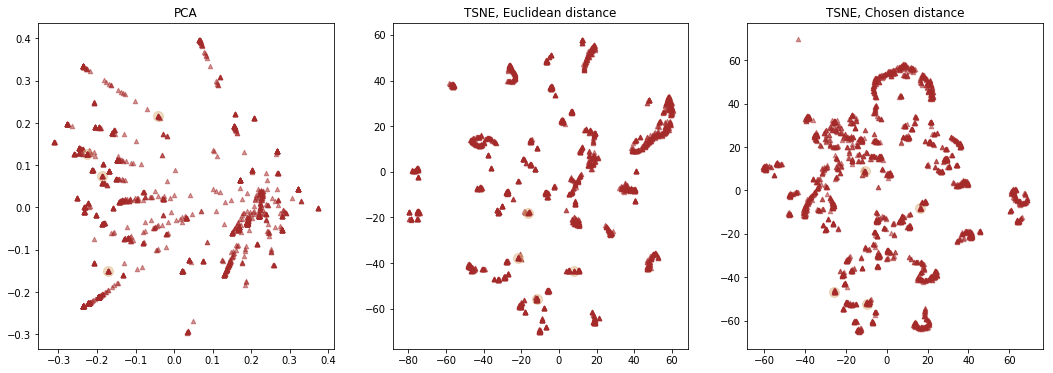

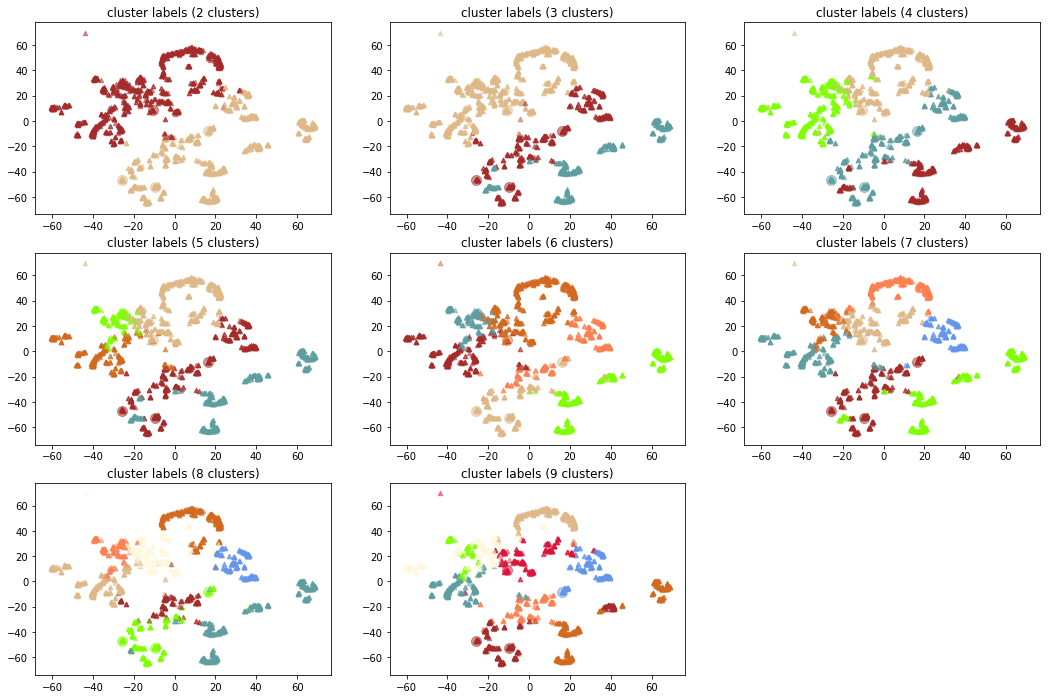

In [38]:
spectra_2D  = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

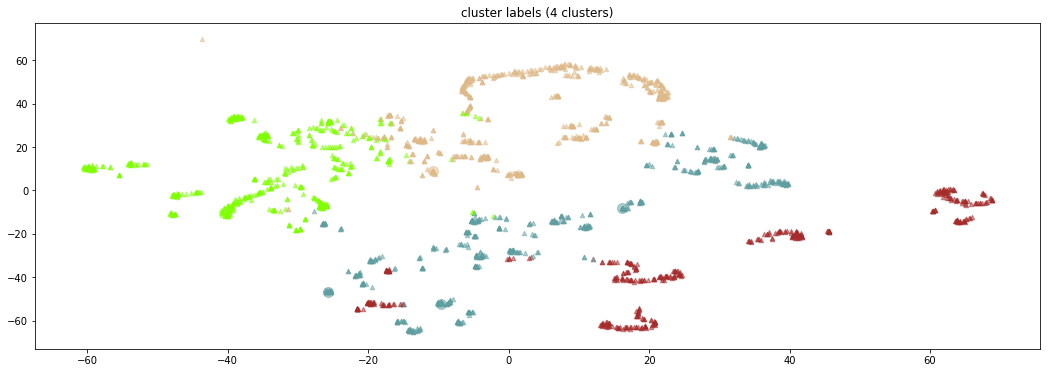

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209       0.000000e+00          0.000000          0.000007          0.000000   
495       0.000000e+00          0.000039          0.000030          0.000005   
1610      0.000000e+00          0.000005          0.000012          0.000012   
1835      1.857346e-07          0.000009          0.000022          0.000003   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.000075               0.014498            0.216180   
495           0.000000               0.011784            0.275804   
1610          0.000002               0.007597            0.117061   
1835          0.000006               0.022408            0.362246   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.331050             0.099179           0.322267   
495           0.292658             0.132576           0.240877   
1610          0.309339             0.034504           0.203534   
1835          0.111726             0.253937           0.249643   

            ...                  gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209         ...          b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495         ...          b'                  '    b'PSR  '  284.083496   
1610        ...          b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835        ...          b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  KMeans_clusters_4  
209       1                  2  
495       1                  2  
1610      1                  1  
1835      1                  2  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
155   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
156   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
157   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
158   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
159   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
160   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
161   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
162   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
163   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
164   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
165   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
167   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
168   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
170   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
172   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
173   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
174   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
175   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
176   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
177   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
178   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
180   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
189   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
190   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
...                     ...        ...             ...         ...       ...   
1681  b'                  '   b'     '             b''     b'unid'        []   
1682  b'                  '   b'     '             b''     b'unid'        []   
1683  b'                  '   b'     '             b''     b'unid'        []   
1684  b'                  '   b'     '             b''     b'unid'        []   
1685  b'                  '   b'     '             b''     b'unid'        []   
1686  b'                  '   b'     '             b''     b'unid'        []   
1687  b'                  '   b'     '             b''     b'unid'        []   
1688  b'                  '   b'     '             b''     b'unid'        []   
1699  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1700  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1704  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1705  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1706  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1707  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1708  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1709  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1710  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1711  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1712  b'1FGL J

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
179   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
245   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
253   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
255   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
258   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
261   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
264   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
268   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
306   b'                  '   b'PWN  '             b''      b'psr'        []   
307   b'                  '   b'PWN  '             b''      b'psr'        []   
309   b'                  '   b'PWN  '             b''      b'psr'        []   
311   b'                  '   b'PWN  '             b''      b'psr'        []   
312   b'                  '   b'PWN  '             b''      b'psr'        []   
314   b'                  '   b'PWN  '             b''      b'pwn'        []   
315   b'                  '   b'PWN  '             b''      b'pwn'        []   
318   b'                  '   b'PWN  '             b''      b'pwn'        []   
329   b'                  '   b'bll  '             b''      b'hbl'        []   
388   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
389   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
390   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
391   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
392   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
393   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
395   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
396   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
397   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
...                     ...        ...             ...         ...       ...   
1893  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1894  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1897  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1898  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1899  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1903  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1904  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1906  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1911  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1912  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1914  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1915  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1920  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1921  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1922  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1928  b'1FGL J

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''   b'pwn,snr'   
2     b'                  '   b'snr  '             b''       b'snr'   
29    b'                  '   b'snr  '             b''       b'snr'   
35    b'                  '   b'snr  '             b''       b'snr'   
59    b'                  '   b'snr  '             b''       b'snr'   
64    b'                  '   b'snr  '             b''       b'snr'   
86    b'                  '   b'snr  '             b''       b'snr'   
101   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
102   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
103   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
104   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
105   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
107   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
108   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
109   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
110   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
111   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
112   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
113   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
114   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
115   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
116   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
117   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
118   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
119   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
120   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
121   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1846  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1847  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1848  b'1FGL J2032.2+4127 '   b'PSR  '             b''      b'unid'   
1849  b'1FGL J2032.2+4127 '   b'PSR  '

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1     b'                  '   b'snr  '             b''      b'snr'        []   
3     b'                  '   b'snr  '             b''      b'snr'        []   
4     b'                  '   b'snr  '             b''      b'snr'        []   
5     b'                  '   b'snr  '             b''      b'snr'        []   
6     b'                  '   b'snr  '             b''      b'snr'        []   
7     b'                  '   b'snr  '             b''      b'snr'        []   
8     b'                  '   b'snr  '             b''      b'snr'        []   
9     b'                  '   b'snr  '             b''      b'snr'        []   
10    b'                  '   b'snr  '             b''      b'snr'        []   
11    b'                  '   b'snr  '             b''      b'snr'        []   
12    b'                  '   b'snr  '             b''      b'snr'        []   
13    b'                  '   b'snr  '             b''      b'snr'        []   
14    b'                  '   b'snr  '             b''      b'snr'        []   
15    b'                  '   b'snr  '             b''      b'snr'        []   
16    b'                  '   b'snr  '             b''      b'snr'        []   
17    b'                  '   b'snr  '             b''      b'snr'        []   
18    b'                  '   b'snr  '             b''      b'snr'        []   
19    b'                  '   b'snr  '             b''      b'snr'        []   
20    b'                  '   b'snr  '             b''      b'snr'        []   
21    b'                  '   b'snr  '             b''      b'snr'        []   
22    b'                  '   b'snr  '             b''      b'snr'        []   
23    b'                  '   b'snr  '             b''      b'snr'        []   
24    b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
26    b'                  '   b'snr  '             b''      b'snr'        []   
27    b'                  '   b'snr  '             b''      b'snr'        []   
28    b'                  '   b'snr  '             b''      b'snr'        []   
30    b'                  '   b'snr  '             b''      b'snr'        []   
31    b'                  '   b'snr  '             b''      b'snr'        []   
32    b'                  '   b'snr  '             b''      b'snr'        []   
...                     ...        ...             ...         ...       ...   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1948  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1950  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1952  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1961  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1962  b'1FGL J

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.018435            0.303731          0.147467   
1               0.171565            0.142733          0.082192   
2               0.057567            0.225458          0.239788   
3               0.107469            0.086318          0.084361   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.127397           0.340151              0.0    0.008449   
1             0.160307           0.116442              0.0    0.166415   
2             0.142675           0.259356              0.0    0.019396   
3             0.081616           0.101281              0.0    0.130710   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.005001  0.003683   0.001408   0.000563          0.001857   
1  0.076641  0.035062   0.013949   0.004256          0.001497   
2  0.007615  0.005093   0.004968   0.003935          0.001666   
3  0.064133  0.051892   0.043829   0.134322          0.007089   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.009552          0.012655          0.010262          0.009390  
1          0.004199          0.006253          0.008392          0.010097  
2          0.006157          0.007771          0.008750          0.009803  
3          0.023813          0.031901          0.028452          0.022814

In [39]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [40]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0205.6+6449 '" "b'                  '" "b'1FGL J1322.0-4515 '"
 "b'1FGL J1747.9-2448 '" "b'1FGL J1813.3-1246 '" "b'1FGL J1850.2-0019c'"
 "b'1FGL J2323.4+5849 '"]
['[]'
 '["b\'SSTGC 519103\'" "b\'SSTGC 519103\'" "b\'GCIRS  1W\'" "b\'GCIRS  8\'"]'
 '["b\'[MCD2010] 13\'"]' '["b\'[MCD2010] 18\'" "b\'[MCD2010] 13\'"]']
1 cluster (#DEB887)
["b'1FGL J0047.3-2512 '" "b'1FGL J0205.6+6449 '" "b'1FGL J0319.7+4130 '"
 "b'1FGL J0416.8+0107 '" "b'                  '" "b'1FGL J0721.9+7120 '"
 "b'1FGL J0956.5+6938 '" "b'1FGL J1000.1+6539 '" "b'1FGL J1103.7-2329 '"
 "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '" "b'1FGL J1230.8+1223 '"
 "b'1FGL J1614.7-5138c'" "b'1FGL J1617.5-5105c'" "b'1FGL J1711.7-3944c'"
 "b'1FGL J1747.9-2448 '" "b'1FGL J1803.1-2147c'" "b'1FGL J1825.7-1410c'"
 "b'1FGL J1826.2-1450 '" "b'1FGL J1837.5-0659c'" "b'1FGL J1910.9+0906c'"
 "b'1FGL J2001.1+4351 '" "b'1FGL J2009.5-4849 '" "b'1FGL J2020.0+4049 '"
 "b'1FGL J2158.8-3013 '" "b'1FGL J2202.8+4216 '" "

[0.2, 0.17, 0.14, 0.11, 0.08, 0.05, 0.02]


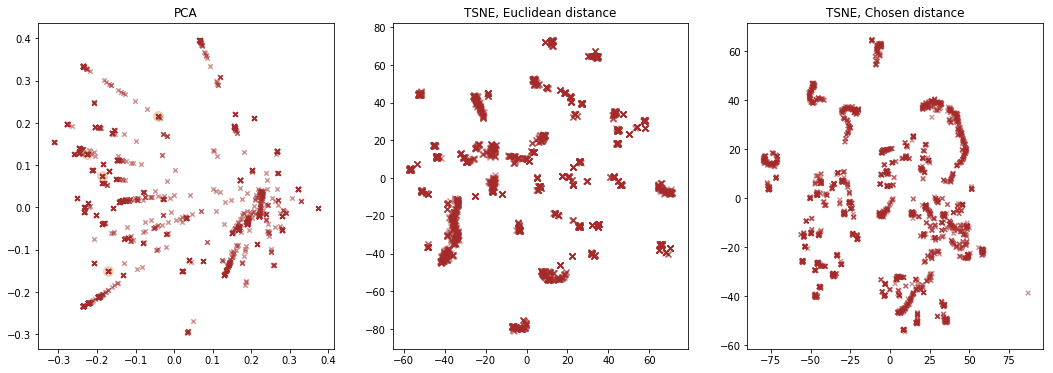

Clustering


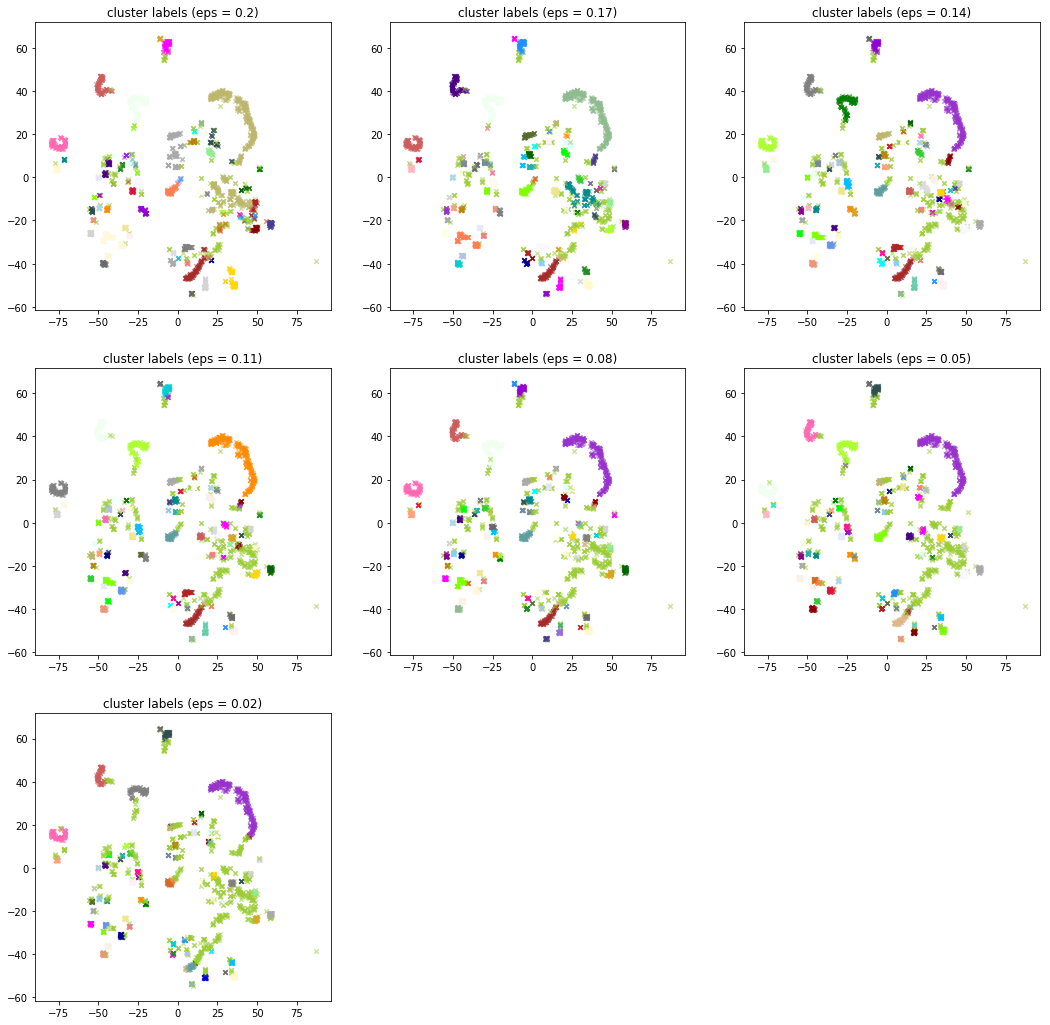

In [41]:
eps_l = [0.01 * i for i in range(20, 0, -3)]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


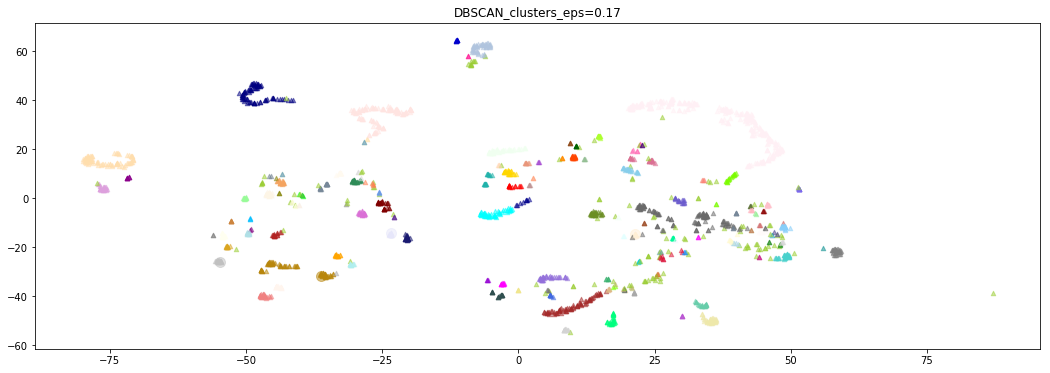

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
209       0.000000e+00          0.000000          0.000007          0.000000   
495       0.000000e+00          0.000039          0.000030          0.000005   
1610      0.000000e+00          0.000005          0.000012          0.000012   
1835      1.857346e-07          0.000009          0.000022          0.000003   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
209           0.000075               0.014498            0.216180   
495           0.000000               0.011784            0.275804   
1610          0.000002               0.007597            0.117061   
1835          0.000006               0.022408            0.362246   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
209           0.331050             0.099179           0.322267   
495           0.292658             0.132576           0.240877   
1610          0.309339             0.034504           0.203534   
1835          0.111726             0.253937           0.249643   

                ...                     gev_1FGL_Name  gev_CLASS1    gev_GLON  \
209             ...             b'1FGL J0240.5+6113 '    b'HMB  '  135.678848   
495             ...             b'                  '    b'PSR  '  284.083496   
1610            ...             b'1FGL J1826.2-1450 '    b'HMB  '   16.885555   
1835            ...             b'1FGL J2032.2+4127 '    b'PSR  '   80.218597   

      gev_GLAT       tev_fermi_names  tev_classes  tev_glat    tev_glon  \
209   1.086277                   b''       b'bin'  1.086135  135.675278   
495  -1.893881  b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087   
1610 -1.293795                   b''       b'bin' -1.289216   16.881586   
1835  1.018827                   b''      b'unid'  1.111117   80.299477   

     marked  DBSCAN_clusters_eps=0.17  
209       1                        12  
495       1                        52  
1610      1                       101  
1835      1                       118  

[4 rows x 31 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1     b'                  '   b'snr  '             b''      b'snr'   
6     b'                  '   b'snr  '             b''      b'snr'   
7     b'                  '   b'snr  '             b''      b'snr'   
8     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
11    b'                  '   b'snr  '             b''      b'snr'   
13    b'                  '   b'snr  '             b''      b'snr'   
14    b'                  '   b'snr  '             b''      b'snr'   
15    b'                  '   b'snr  '             b''      b'snr'   
16    b'                  '   b'snr  '             b''      b'snr'   
17    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
21    b'                  '   b'snr  '             b''      b'snr'   
23    b'                  '   b'snr  '             b''      b'snr'   
24    b'                  '   b'snr  '             b''      b'snr'   
26    b'                  '   b'snr  '             b''      b'snr'   
27    b'                  '   b'snr  '             b''      b'snr'   
28    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
31    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
33    b'                  '   b'snr  '             b''      b'snr'   
36    b'                  '   b'snr  '             b''      b'snr'   
37    b'                  '   b'snr  '             b''      b'snr'   
38    b'                  '   b'snr  '             b''      b'snr'   
39    b'                  '   b'snr  '             b''      b'snr'   
41    b'                  '   b'snr  '             b''      b'snr'   
42    b'                  '   b'snr  '             b''      b'snr'   
...                     ...        ...             ...         ...   
57    b'                  '   b'snr  '             b''      b'snr'   
60    b'                  '   b'snr  '             b''      b'snr'   
61    b'                  '   b'snr  '             b''      b'snr'   
62    b'                  '   b'snr  '             b''      b'snr'   
66    b'                  '   b'snr  '             b''      b'snr'   
68    b'                  '   b'snr  '             b''      b'snr'   
69    b'                  '   b'snr  '             b''      b'snr'   
71    b'                  '   b'snr  '             b''      b'snr'   
72    b'                  '   b'snr  '             b''      b'snr'   
73    b'                  '   b'snr  '             b''      b'snr'   
74    b'                  '   b'snr  '             b''      b'snr'   
75    b'                  '   b'snr  '             b''      b'snr'   
76    b'                  '   b'snr  '             b''      b'snr'   
79    b'                  '   b'snr  '             b''      b'snr'   
81    b'                  '   b'snr  '             b''      b'snr'   
82    b'                  '   b'snr  '             b''      b'snr'   
83    b'                  '   b'snr  '             b''      b'snr'   
84    b'                  '   b'snr  '             b''      b'snr'   
85    b'                  '   b'snr  '             b''      b'snr'   
87    b'                  '   b'snr  '             b''      b'snr'   
88    b'                  '   b'snr  '             b''      b'snr'   
89    b'                  '   b'snr  '             b''      b'snr'   
90    b'                  '   b'snr  '             b''      b'snr'   
93    b'                  '   b'snr  '             b''      b'snr'   
94    b'                  '   b'snr  '             b''      b'snr'   
95    b'                

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
3    b'                  '   b'snr  '             b''      b'snr'        []   
5    b'                  '   b'snr  '             b''      b'snr'        []   
12   b'                  '   b'snr  '             b''      b'snr'        []   
22   b'                  '   b'snr  '             b''      b'snr'        []   
63   b'                  '   b'snr  '             b''      b'snr'        []   
273  b'                  '   b'     '             b''   b'snr,mc'        []   
286  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
3        []         0       0  b'3XMM J002500.3+641041'   
5        []         0       0  b'3XMM J002501.5+641057'   
12       []         0       0  b'3XMM J002505.1+640713'   
22       []         0       0  b'3XMM J002507.0+641105'   
63       []         0       0  b'3XMM J002530.9+641006'   
273      []         0       0  b'3XMM J052436.9-694059'   
286      []         0       0  b'3XMM J052500.1-693904'   

                                       xmm_WEBPAGE_URL  
3    b'http://xmm-catalog.irap.omp.eu/source/204123...  
5    b'http://xmm-catalog.irap.omp.eu/source/203105...  
12   b'http://xmm-catalog.irap.omp.eu/source/200962...  
22   b'http://xmm-catalog.irap.omp.eu/source/200962...  
63   b'http://xmm-catalog.irap.omp.eu/source/203105...  
273  b'http://xmm-catalog.irap.omp.eu/source/201375...  
286  b'http://xmm-catalog.irap.omp.eu/source/201573...

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
4   b'                  '   b'snr  '             b''      b'snr'        []   
92  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
4       []         0       0  b'3XMM J002500.4+641036'   
92      []         0       0  b'3XMM J002541.7+641029'   

                                      xmm_WEBPAGE_URL  
4   b'http://xmm-catalog.irap.omp.eu/source/203105...  
92  b'http://xmm-catalog.irap.omp.eu/source/200962...

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
18  b'                  '   b'snr  '             b''      b'snr'        []   
91  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
18      []         0       0  b'3XMM J002506.0+640743'   
91      []         0       0  b'3XMM J002541.1+640954'   

                                      xmm_WEBPAGE_URL  
18  b'http://xmm-catalog.irap.omp.eu/source/200962...  
91  b'http://xmm-catalog.irap.omp.eu/source/205111...

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
44  b'                  '   b'snr  '             b''      b'snr'        []   
48  b'                  '   b'snr  '             b''      b'snr'        []   
51  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
44      []         0       0  b'3XMM J002525.5+640546'   
48      []         0       0  b'3XMM J002526.4+640749'   
51      []         0       0  b'3XMM J002526.6+640522'   

                                      xmm_WEBPAGE_URL  
44  b'http://xmm-catalog.irap.omp.eu/source/200962...  
48  b'http://xmm-catalog.irap.omp.eu/source/200962...  
51  b'http://xmm-catalog.irap.omp.eu/source/205111...

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
59    b'                  '   b'snr  '             b''      b'snr'        []   
86    b'                  '   b'snr  '             b''      b'snr'        []   
838   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
1815  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
59        []         0       0  b'3XMM J002529.6+641121'   
86        []         0       0  b'3XMM J002540.0+641037'   
838       []         0       0  b'3XMM J125611.1-054721'   
1815      []         0       0  b'3XMM J201609.1+371123'   

                                        xmm_WEBPAGE_URL  
59    b'http://xmm-catalog.irap.omp.eu/source/203105...  
86    b'http://xmm-catalog.irap.omp.eu/source/204123...  
838   b'http://xmm-catalog.irap.omp.eu/source/205560...  
1815  b'http://xmm-catalog.irap.omp.eu/source/207446...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
64    b'                  '   b'snr  '             b''      b'snr'   
1210  b'                  '   b'     '             b''     b'unid'   
1226  b'                  '   b'     '             b''     b'unid'   
1246  b'                  '   b'     '             b''     b'unid'   
1924  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   

                                              s_MAIN_ID             s_class  \
64                                                   []                  []   
1210  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1226  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1246  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1924                                                 []                  []   

      s_simbad  marked               xmm_IAUNAME  \
64           0       0  b'3XMM J002531.1+641114'   
1210         1       0  b'3XMM J174532.4-290115'   
1226         1       0  b'3XMM J174535.4-290131'   
1246         1       0  b'3XMM J174540.6-290023'   
1924         0       0  b'3XMM J232337.6+584943'   

                                        xmm_WEBPAGE_URL  
64    b'http://xmm-catalog.irap.omp.eu/source/200962...  
1210  b'http://xmm-catalog.irap.omp.eu/source/207622...  
1226  b'http://xmm-catalog.irap.omp.eu/source/205056...  
1246  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1924  b'http://xmm-catalog.irap.omp.eu/source/201375...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
77  b'                  '   b'snr  '             b''      b'snr'        []   
80  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
77      []         0       0  b'3XMM J002535.3+640556'   
80      []         0       0  b'3XMM J002536.3+641106'   

                                      xmm_WEBPAGE_URL  
77  b'http://xmm-catalog.irap.omp.eu/source/200962...  
80  b'http://xmm-catalog.irap.omp.eu/source/203105...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
96    b'                  '   b'snr  '             b''      b'snr'   
295   b'                  '   b'     '             b''   b'snr,mc'   
320   b'                  '   b'PWN  '             b''      b'pwn'   
991   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
996   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
999   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1010  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1752  b'                  '   b'     '             b''  b'pwn,snr'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
96                    []      []         0       0  b'3XMM J002548.4+640922'   
295                   []      []         0       0  b'3XMM J052507.0-693901'   
320                   []      []         0       0  b'3XMM J053435.6+215846'   
991                   []      []         0       0  b'3XMM J151352.6-590821'   
996                   []      []         0       0  b'3XMM J151355.7-590844'   
999                   []      []         0       0  b'3XMM J151357.2-590735'   
1010                  []      []         0       0  b'3XMM J151401.6-590950'   
1752  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193030.0+185214'   

                                        xmm_WEBPAGE_URL  
96    b'http://xmm-catalog.irap.omp.eu/source/200962...  
295   b'http://xmm-catalog.irap.omp.eu/source/201573...  
320   b'http://xmm-catalog.irap.omp.eu/source/203127...  
991   b'http://xmm-catalog.irap.omp.eu/source/202070...  
996   b'http://xmm-catalog.irap.omp.eu/source/203027...  
999   b'http://xmm-catalog.irap.omp.eu/source/203027...  
1010  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1752  b'http://xmm-catalog.irap.omp.eu/source/204067...

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
101  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
102  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
103  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
104  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
105  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
107  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
108  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
109  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
110  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
111  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
112  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
113  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
114  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
115  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
116  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
117  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
118  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
119  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
120  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
121  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
127  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
146  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
150  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
151  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
152  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
153  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
154  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
101      []         0       0  b'3XMM J004720.9-251747'   
102      []         0       0  b'3XMM J004722.1-251937'   
103      []         0       0  b'3XMM J004723.4-251904'   
104      []         0       0  b'3XMM J004723.8-251554'   
105 

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
335   b'                  '   b'bll  '             b''      b'hbl'        []   
1457  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1460  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1461  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
122       []         0       0  b'3XMM J004730.9-251826'   
132       []         0       0  b'3XMM J004735.2-251511'   
133       []         0       0  b'3XMM J004735.3-251751'   
145       []         0       0  b'3XMM J004742.7-251501'   
335       []         0       0  b'3XMM J055040.5-321616'   
1457      []         0       0  b'3XMM J174802.3-244844'   
1460      []         0       0  b'3XMM J174809.5-244420'   
1461      []         0       0  b'3XMM J174810.4-244758'   

                                        xmm_WEBPAGE_URL  
122   b'http://xmm-catalog.irap.omp.eu/source/201259...  
132   b'http://xmm-catalog.irap.omp.eu/source/201259...  
133   b'http://xmm-catalog.irap.omp.eu/source/201259...  
145   b'http://xmm-catalog.irap.omp.eu/source/201259...  
335   b'http://xmm-catalog.irap.omp.eu/source/201118...  
1457  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1460  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1461  b'http://xmm-catalog.irap.omp.eu/source/207441...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
1875  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
128       []         0       0  b'3XMM J004733.4-251721'   
1875      []         0       0  b'3XMM J232315.6+584814'   

                                        xmm_WEBPAGE_URL  
128   b'http://xmm-catalog.irap.omp.eu/source/201259...  
1875  b'http://xmm-catalog.irap.omp.eu/source/201100...

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
155   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
156   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
157   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
158   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
159   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
160   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
161   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
162   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
163   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
164   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
165   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
166   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
167   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
168   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
170   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
172   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
173   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
174   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
175   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
176   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
177   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
178   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
180   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
214   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
215   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
216   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
217   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
218   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
220   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
221   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
222   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
223   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
224   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
225   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
226   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
227   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
228   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
229   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
230   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
231   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
232   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
233   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
234   b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
1537  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1538  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1539  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1540  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1541  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'   
1542  b'1FGL J1813.3-124

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
169  b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
171  b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
219  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   

                                       s_MAIN_ID   s_class  s_simbad  marked  \
169                                           []        []         0       0   
171                                           []        []         0       0   
219  ["b'LS   I +61  303'" "b'LS   I +61  303'"]  ['B0Ve']         1       0   

                  xmm_IAUNAME  \
169  b'3XMM J020526.2+645017'   
171  b'3XMM J020529.3+645029'   
219  b'3XMM J024031.6+611345'   

                                       xmm_WEBPAGE_URL  
169  b'http://xmm-catalog.irap.omp.eu/source/201537...  
171  b'http://xmm-catalog.irap.omp.eu/source/201025...  
219  b'http://xmm-catalog.irap.omp.eu/source/201124...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
192  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
193  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
194  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
196  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
197  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
198  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
192      []         0       0  b'3XMM J022225.5+430409'   
193      []         0       0  b'3XMM J022230.9+430357'   
194      []         0       0  b'3XMM J022232.7+430446'   
196      []         0       0  b'3XMM J022242.7+430405'   
197      []         0       0  b'3XMM J022243.0+430239'   
198      []         0       0  b'3XMM J022256.4+430336'   

                                       xmm_WEBPAGE_URL  
192  b'http://xmm-catalog.irap.omp.eu/source/200029...  
193  b'http://xmm-catalog.irap.omp.eu/source/200029...  
194  b'http://xmm-catalog.irap.omp.eu/source/200029...  
196  b'http://xmm-catalog.irap.omp.eu/source/200029...  
197  b'http://xmm-catalog.irap.omp.eu/source/200029...  
198  b'http://xmm-catalog.irap.omp.eu/source/200029...

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
199  b'                  '   b'bll  '             b''      b'hbl'        []   
203  b'                  '   b'bll  '             b''      b'hbl'        []   
205  b'                  '   b'bll  '             b''      b'hbl'        []   
206  b'                  '   b'bll  '             b''      b'hbl'        []   
207  b'                  '   b'bll  '             b''      b'hbl'        []   
208  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
199      []         0       0  b'3XMM J023246.1+201933'   
203      []         0       0  b'3XMM J023250.9+201926'   
205      []         0       0  b'3XMM J023254.5+201807'   
206      []         0       0  b'3XMM J023256.7+201848'   
207      []         0       0  b'3XMM J023256.9+201905'   
208      []         0       0  b'3XMM J023300.3+201826'   

                                       xmm_WEBPAGE_URL  
199  b'http://xmm-catalog.irap.omp.eu/source/206042...  
203  b'http://xmm-catalog.irap.omp.eu/source/206042...  
205  b'http://xmm-catalog.irap.omp.eu/source/206042...  
206  b'http://xmm-catalog.irap.omp.eu/source/206042...  
207  b'http://xmm-catalog.irap.omp.eu/source/206042...  
208  b'http://xmm-catalog.irap.omp.eu/source/206042...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
200   b'                  '   b'bll  '             b''      b'hbl'        []   
204   b'                  '   b'bll  '             b''      b'hbl'        []   
1960  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
200       []         0       0  b'3XMM J023246.3+201815'   
204       []         0       0  b'3XMM J023251.4+201751'   
1960      []         0       0  b'3XMM J235907.0-303634'   

                                        xmm_WEBPAGE_URL  
200   b'http://xmm-catalog.irap.omp.eu/source/206042...  
204   b'http://xmm-catalog.irap.omp.eu/source/206042...  
1960  b'http://xmm-catalog.irap.omp.eu/source/203040...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
236  b'                  '   b'rdg  '             b''      b'hbl'        []   
237  b'                  '   b'rdg  '             b''      b'hbl'        []   
239  b'                  '   b'rdg  '             b''      b'hbl'        []   
240  b'                  '   b'rdg  '             b''      b'hbl'        []   
241  b'                  '   b'rdg  '             b''      b'hbl'        []   
242  b'                  '   b'rdg  '             b''      b'hbl'        []   
243  b'                  '   b'rdg  '             b''      b'hbl'        []   
244  b'                  '   b'rdg  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
236      []         0       0  b'3XMM J031638.3+411631'   
237      []         0       0  b'3XMM J031639.0+411922'   
239      []         0       0  b'3XMM J031644.3+411840'   
240      []         0       0  b'3XMM J031646.6+411816'   
241      []         0       0  b'3XMM J031649.4+411823'   
242      []         0       0  b'3XMM J031651.2+411949'   
243      []         0       0  b'3XMM J031651.9+412213'   
244      []         0       0  b'3XMM J031657.9+411844'   

                                       xmm_WEBPAGE_URL  
236  b'http://xmm-catalog.irap.omp.eu/source/201515...  
237  b'http://xmm-catalog.irap.omp.eu/source/201515...  
239  b'http://xmm-catalog.irap.omp.eu/source/201515...  
240  b'http://xmm-catalog.irap.omp.eu/source/201515...  
241  b'http://xmm-catalog.irap.omp.eu/source/203056...  
242  b'http://xmm-catalog.irap.omp.eu/source/203056...  
243  b'http://xmm-catalog.irap.omp.eu/source/201515...  
244  b'http://xmm-catalog.irap.omp.eu/source/201515...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
245  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
255  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
268  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
245      []         0       0  b'3XMM J031931.2+413107'   
255      []         0       0  b'3XMM J031940.7+413218'   
268      []         0       0  b'3XMM J032000.0+413130'   

                                       xmm_WEBPAGE_URL  
245  b'http://xmm-catalog.irap.omp.eu/source/203057...  
255  b'http://xmm-catalog.irap.omp.eu/source/203057...  
268  b'http://xmm-catalog.irap.omp.eu/source/200851...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
246  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
252  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
256  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
246      []         0       0  b'3XMM J031932.0+412954'   
252      []         0       0  b'3XMM J031938.0+413050'   
256      []         0       0  b'3XMM J031941.3+413203'   

                                       xmm_WEBPAGE_URL  
246  b'http://xmm-catalog.irap.omp.eu/source/203057...  
252  b'http://xmm-catalog.irap.omp.eu/source/200851...  
256  b'http://xmm-catalog.irap.omp.eu/source/200851...

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
247  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
250  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
247      []         0       0  b'3XMM J031932.4+412931'   
250      []         0       0  b'3XMM J031935.3+412900'   

                                       xmm_WEBPAGE_URL  
247  b'http://xmm-catalog.irap.omp.eu/source/203057...  
250  b'http://xmm-catalog.irap.omp.eu/source/200851...

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
248  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
257  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
261  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
248      []         0       0  b'3XMM J031933.4+412947'   
257      []         0       0  b'3XMM J031941.5+413017'   
261      []         0       0  b'3XMM J031947.5+413210'   

                                       xmm_WEBPAGE_URL  
248  b'http://xmm-catalog.irap.omp.eu/source/200851...  
257  b'http://xmm-catalog.irap.omp.eu/source/203057...  
261  b'http://xmm-catalog.irap.omp.eu/source/203057...

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
249  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
254  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
259  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
263  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
265  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
266  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
269  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
249      []         0       0  b'3XMM J031934.4+412954'   
254      []         0       0  b'3XMM J031939.9+413149'   
259      []         0       0  b'3XMM J031945.6+412938'   
263      []         0       0  b'3XMM J031950.5+413015'   
265      []         0       0  b'3XMM J031955.7+413249'   
266      []         0       0  b'3XMM J031957.2+413220'   
269      []         0       0  b'3XMM J032006.4+413044'   

                                       xmm_WEBPAGE_URL  
249  b'http://xmm-catalog.irap.omp.eu/source/203057...  
254  b'http://xmm-catalog.irap.omp.eu/source/203057...  
259  b'http://xmm-catalog.irap.omp.eu/source/200851...  
263  b'http://xmm-catalog.irap.omp.eu/source/200851...  
265  b'http://xmm-catalog.irap.omp.eu/source/203057...  
266  b'http://xmm-catalog.irap.omp.eu/source/200851...  
269  b'http://xmm-catalog.irap.omp.eu/source/203057...

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
253  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
258  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
264  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
253      []         0       0  b'3XMM J031938.2+413138'   
258      []         0       0  b'3XMM J031942.8+412940'   
264      []         0       0  b'3XMM J031952.8+413010'   

                                       xmm_WEBPAGE_URL  
253  b'http://xmm-catalog.irap.omp.eu/source/200851...  
258  b'http://xmm-catalog.irap.omp.eu/source/200851...  
264  b'http://xmm-catalog.irap.omp.eu/source/200851...

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
260  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
813  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
260      []         0       0  b'3XMM J031946.9+413226'   
813      []         0       0  b'3XMM J123044.3+122052'   

                                       xmm_WEBPAGE_URL  
260  b'http://xmm-catalog.irap.omp.eu/source/200851...  
813  b'http://xmm-catalog.irap.omp.eu/source/201141...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
274   b'                  '   b'     '             b''   b'snr,mc'        []   
275   b'                  '   b'     '             b''   b'snr,mc'        []   
298   b'                  '   b'     '             b''   b'snr,mc'        []   
301   b'                  '   b'     '             b''   b'snr,mc'        []   
302   b'                  '   b'     '             b''   b'snr,mc'        []   
1024  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1025  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1026  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1027  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1028  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1029  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1030  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1031  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1032  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1033  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1035  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1036  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
274       []         0       0  b'3XMM J052443.0-693938'   
275       []         0       0  b'3XMM J052444.0-694058'   
298       []         0       0  b'3XMM J052509.2-693707'   
301       []         0       0  b'3XMM J052525.1-693742'   
302       []         0       0  b'3XMM J052529.6-693940'   
1024      []         0       0  b'3XMM J155533.0+111211'   
1025      []         0       0  b'3XMM J155534.9+111126'   
1026      []         0       0  b'3XMM J155537.7+110837'   
1027      []         0       0  b'3XMM J155538.2+111130'   
1028      []         0       0  b'3XMM J155538.6+111038'   
1029      []         0       0  b'3XMM J155539.1+111107'   
1030      []         0       0  b'3XMM J155539.6+110919'   
1031      []         0       0  b'3XMM J155541.3+110929'   
1032      []         0       0  b'3XMM J155542.0+111014'   
1033      []         0       0  b'3XMM J155542.9+110845'   
1035      []         0       0  b'3XMM J155548.8+111231'   
1036      []         0       0  b'3XMM J155550.9+111046'   

                                        xmm_WEBPAGE_URL  
274   b'http://xmm-catalog.irap.omp.eu/source/201375...  
275   b'http://xmm-catalog.irap.omp.eu/source/206907...  
298   b'http://xmm-catalog.irap.omp.eu/source/201375...  
301   b'http://xmm-catalog.irap.omp.eu/source/201375...  
302   b'http://xmm-catalog.irap.omp.eu/source/201375...  
1024  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1025  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1026  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1027  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1028  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1029  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1030  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1031  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1032  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1033  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1035  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1036  b'http://xmm-catalog.irap.omp.eu/source/206569...

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
276  b'                  '   b'     '             b''   b'snr,mc'        []   
277  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
276      []         0       0  b'3XMM J052450.8-693633'   
277      []         0       0  b'3XMM J052454.7-693835'   

                                       xmm_WEBPAGE_URL  
276  b'http://xmm-catalog.irap.omp.eu/source/206907...  
277  b'http://xmm-catalog.irap.omp.eu/source/204141...

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
279  b'                  '   b'     '             b''   b'snr,mc'        []   
282  b'                  '   b'     '             b''   b'snr,mc'        []   
299  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
279      []         0       0  b'3XMM J052455.5-693902'   
282      []         0       0  b'3XMM J052458.0-693909'   
299      []         0       0  b'3XMM J052512.2-693810'   

                                       xmm_WEBPAGE_URL  
279  b'http://xmm-catalog.irap.omp.eu/source/201573...  
282  b'http://xmm-catalog.irap.omp.eu/source/201293...  
299  b'http://xmm-catalog.irap.omp.eu/source/201251...

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
281  b'                  '   b'     '             b''   b'snr,mc'        []   
288  b'                  '   b'     '             b''   b'snr,mc'        []   
296  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
281      []         0       0  b'3XMM J052457.1-693856'   
288      []         0       0  b'3XMM J052500.9-693807'   
296      []         0       0  b'3XMM J052508.3-693818'   

                                       xmm_WEBPAGE_URL  
281  b'http://xmm-catalog.irap.omp.eu/source/206907...  
288  b'http://xmm-catalog.irap.omp.eu/source/202106...  
296  b'http://xmm-catalog.irap.omp.eu/source/201293...

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
289  b'                  '   b'     '             b''   b'snr,mc'        []   
291  b'                  '   b'     '             b''   b'snr,mc'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
289      []         0       0  b'3XMM J052501.1-693848'   
291      []         0       0  b'3XMM J052502.6-693848'   

                                       xmm_WEBPAGE_URL  
289  b'http://xmm-catalog.irap.omp.eu/source/202106...  
291  b'http://xmm-catalog.irap.omp.eu/source/201251...

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
304  b'                  '   b'PWN  '             b''      b'psr'        []   
305  b'                  '   b'PWN  '             b''      b'psr'        []   
308  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
304      []         0       0  b'3XMM J053426.2+220233'   
305      []         0       0  b'3XMM J053427.1+215826'   
308      []         0       0  b'3XMM J053432.2+220240'   

                                       xmm_WEBPAGE_URL  
304  b'http://xmm-catalog.irap.omp.eu/source/203127...  
305  b'http://xmm-catalog.irap.omp.eu/source/203127...  
308  b'http://xmm-catalog.irap.omp.eu/source/203127...

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
306   b'                  '   b'PWN  '             b''      b'psr'   
307   b'                  '   b'PWN  '             b''      b'psr'   
309   b'                  '   b'PWN  '             b''      b'psr'   
314   b'                  '   b'PWN  '             b''      b'pwn'   
315   b'                  '   b'PWN  '             b''      b'pwn'   
318   b'                  '   b'PWN  '             b''      b'pwn'   
482   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
1046  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   
1047  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   
1056  b'                  '   b'psr  '             b''      b'pwn'   
1057  b'                  '   b'psr  '             b''      b'pwn'   
1058  b'                  '   b'psr  '             b''      b'pwn'   
1059  b'                  '   b'psr  '             b''      b'pwn'   
1060  b'                  '   b'psr  '             b''      b'pwn'   
1061  b'                  '   b'psr  '             b''      b'pwn'   
1062  b'                  '   b'psr  '             b''      b'pwn'   
1063  b'                  '   b'psr  '             b''      b'pwn'   
1064  b'                  '   b'psr  '             b''      b'pwn'   
1065  b'                  '   b'psr  '             b''      b'pwn'   
1066  b'                  '   b'psr  '             b''      b'pwn'   
1067  b'                  '   b'psr  '             b''      b'pwn'   
1068  b'                  '   b'psr  '             b''      b'pwn'   
1069  b'                  '   b'psr  '             b''      b'pwn'   
1070  b'                  '   b'psr  '             b''      b'pwn'   
1071  b'                  '   b'psr  '             b''      b'pwn'   
1072  b'                  '   b'psr  '             b''      b'pwn'   
1073  b'                  '   b'psr  '             b''      b'pwn'   
1077  b'                  '   b'psr  '             b''      b'pwn'   
1078  b'                  '   b'psr  '             b''      b'pwn'   
1079  b'                  '   b'psr  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
1659  b'                  '   b'PSR  '             b''     b'unid'   
1660  b'                  '   b'PSR  '             b''     b'unid'   
1661  b'                  '   b'PSR  '             b''     b'unid'   
1662  b'                  '   b'PSR  '             b''     b'unid'   
1663  b'                  '   b'PSR  '             b''     b'unid'   
1665  b'                  '   b'PSR  '             b''     b'unid'   
1714  b'                  '   b'     '             b''     b'unid'   
1715  b'                  '   b'     '             b''     b'unid'   
1716  b'                  '   b'     '             b''     b'unid'   
1858  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1860  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1863  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1865  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1868  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1873  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1874  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1876  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1878  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1881  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1886  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1889  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1901  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1905  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1912  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1915  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'   
1920  b'1FGL J2323.4+584

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
311  b'                  '   b'PWN  '             b''      b'psr'        []   
312  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
311      []         0       0  b'3XMM J053440.7+220258'   
312      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
311  b'http://xmm-catalog.irap.omp.eu/source/203127...  
312  b'http://xmm-catalog.irap.omp.eu/source/203127...

33 cluster (#1E90FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
321  b'                  '   b'PWN  '             b''      b'pwn'        []   
322  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
321      []         0       0  b'3XMM J053440.7+220258'   
322      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
321  b'http://xmm-catalog.irap.omp.eu/source/203127...  
322  b'http://xmm-catalog.irap.omp.eu/source/203127...

34 cluster (#B22222)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
323  b'                  '   b'bll  '             b''      b'hbl'        []   
324  b'                  '   b'bll  '             b''      b'hbl'        []   
325  b'                  '   b'bll  '             b''      b'hbl'        []   
326  b'                  '   b'bll  '             b''      b'hbl'        []   
328  b'                  '   b'bll  '             b''      b'hbl'        []   
331  b'                  '   b'bll  '             b''      b'hbl'        []   
332  b'                  '   b'bll  '             b''      b'hbl'        []   
333  b'                  '   b'bll  '             b''      b'hbl'        []   
337  b'                  '   b'bll  '             b''      b'hbl'        []   
338  b'                  '   b'bll  '             b''      b'hbl'        []   
343  b'                  '   b'bll  '             b''      b'hbl'        []   
345  b'                  '   b'bll  '             b''      b'hbl'        []   
347  b'                  '   b'bll  '             b''      b'hbl'        []   
349  b'                  '   b'bll  '             b''      b'hbl'        []   
350  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
323      []         0       0  b'3XMM J055028.4-321516'   
324      []         0       0  b'3XMM J055028.7-321712'   
325      []         0       0  b'3XMM J055031.5-321738'   
326      []         0       0  b'3XMM J055032.2-321647'   
328      []         0       0  b'3XMM J055034.0-321828'   
331      []         0       0  b'3XMM J055036.7-321326'   
332      []         0       0  b'3XMM J055039.3-321337'   
333      []         0       0  b'3XMM J055039.4-321842'   
337      []         0       0  b'3XMM J055042.1-321735'   
338      []         0       0  b'3XMM J055042.8-321805'   
343      []         0       0  b'3XMM J055045.5-321924'   
345      []         0       0  b'3XMM J055046.5-321350'   
347      []         0       0  b'3XMM J055048.0-321456'   
349      []         0       0  b'3XMM J055051.8-321602'   
350      []         0       0  b'3XMM J055053.7-321603'   

                                       xmm_WEBPAGE_URL  
323  b'http://xmm-catalog.irap.omp.eu/source/201422...  
324  b'http://xmm-catalog.irap.omp.eu/source/201422...  
325  b'http://xmm-catalog.irap.omp.eu/source/201118...  
326  b'http://xmm-catalog.irap.omp.eu/source/201422...  
328  b'http://xmm-catalog.irap.omp.eu/source/201118...  
331  b'http://xmm-catalog.irap.omp.eu/source/201422...  
332  b'http://xmm-catalog.irap.omp.eu/source/201118...  
333  b'http://xmm-catalog.irap.omp.eu/source/201422...  
337  b'http://xmm-catalog.irap.omp.eu/source/201422...  
338  b'http://xmm-catalog.irap.omp.eu/source/201422...  
343  b'http://xmm-catalog.irap.omp.eu/source/201422...  
345  b'http://xmm-catalog.irap.omp.eu/source/201118...  
347  b'http://xmm-catalog.irap.omp.eu/source/201422...  
349  b'http://xmm-catalog.irap.omp.eu/source/201118...  
350  b'http://xmm-catalog.irap.omp.eu/source/201118...

35 cluster (#FFFAF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
327   b'                  '   b'bll  '             b''      b'hbl'        []   
1170  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1171  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1172  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1173  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1174  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1175  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1176  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1177  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   
1178  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
327       []         0       0  b'3XMM J055032.3-321606'   
1170      []         0       0  b'3XMM J171750.9-383158'   
1171      []         0       0  b'3XMM J171754.5-383132'   
1172      []         0       0  b'3XMM J171755.5-383316'   
1173      []         0       0  b'3XMM J171803.5-383314'   
1174      []         0       0  b'3XMM J171804.9-383141'   
1175      []         0       0  b'3XMM J171809.1-383335'   
1176      []         0       0  b'3XMM J171809.5-383412'   
1177      []         0       0  b'3XMM J171818.8-383033'   
1178      []         0       0  b'3XMM J171821.0-383416'   

                                        xmm_WEBPAGE_URL  
327   b'http://xmm-catalog.irap.omp.eu/source/201422...  
1170  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1171  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1172  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1173  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1174  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1175  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1176  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1177  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1178  b'http://xmm-catalog.irap.omp.eu/source/204019...

36 cluster (#228B22)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
334  b'                  '   b'bll  '             b''      b'hbl'        []   
336  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
334      []         0       0  b'3XMM J055039.8-321516'   
336      []         0       0  b'3XMM J055041.1-321710'   

                                       xmm_WEBPAGE_URL  
334  b'http://xmm-catalog.irap.omp.eu/source/201118...  
336  b'http://xmm-catalog.irap.omp.eu/source/201422...

37 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
339   b'                  '   b'bll  '             b''      b'hbl'        []   
1757  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
339       []         0       0  b'3XMM J055042.9-321640'   
1757      []         0       0  b'3XMM J195959.9+650854'   

                                        xmm_WEBPAGE_URL  
339   b'http://xmm-catalog.irap.omp.eu/source/202059...  
1757  b'http://xmm-catalog.irap.omp.eu/source/200943...

38 cluster (#DCDCDC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
341   b'                  '   b'bll  '             b''      b'hbl'        []   
344   b'                  '   b'bll  '             b''      b'hbl'        []   
1929  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
341       []         0       0  b'3XMM J055044.6-321422'   
344       []         0       0  b'3XMM J055046.3-321714'   
1929      []         0       0  b'3XMM J232339.4+584814'   

                                        xmm_WEBPAGE_URL  
341   b'http://xmm-catalog.irap.omp.eu/source/201422...  
344   b'http://xmm-catalog.irap.omp.eu/source/201422...  
1929  b'http://xmm-catalog.irap.omp.eu/source/201100...

39 cluster (#F8F8FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
346   b'                  '   b'bll  '             b''      b'hbl'        []   
1925  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
346       []         0       0  b'3XMM J055047.1-321615'   
1925      []         0       0  b'3XMM J232337.9+584956'   

                                        xmm_WEBPAGE_URL  
346   b'http://xmm-catalog.irap.omp.eu/source/201118...  
1925  b'http://xmm-catalog.irap.omp.eu/source/200976...

40 cluster (#FFD700)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
351  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
352  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
353  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
354  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
355  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
356  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
357  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
358  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
359  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
360  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
361  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
362  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
363  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
364  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
365  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
366  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
367  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
368  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
369  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
370  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
371  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
372  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
373  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   

            s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
351  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061748.2+223852'   
352  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061749.1+223851'   
353  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061750.8+224104'   
354  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061752.0+224057'   
355  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.4+224059'   
356  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061754.9+224021'   
357  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061755.1+224215'   
358  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061755.7+224040'   
359  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061757.5+223753'   
360  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061758.4+224236'   
361  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061758.6+223622'   
362  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061759.8+223631'   
363  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.1+223647'   
364  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.2+223706'   
365  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.6+223820'   
366  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061802.7+223810'   
367  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.1+223912'   
368  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.3+223650'   
369  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061803.6+224102'   
370  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061805.0+223922'   
371  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061805.7+223632'   
372  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061810.9+223902'   
373  ["b'HD  43582'"]  ['B0Ve']         1       0  b'3XMM J061816.6+224026'   

                                       xmm_WEBPAGE_URL  
351  b'http://xmm-catalog.irap.omp.eu/source/206001...  
352  b'http://xmm-catalog.irap.omp.eu/source/201141...  
353  b'http://xmm-catalog.irap.omp.eu/source/203019...  
354  b'http://xmm-catalog.irap.omp.eu/source/206001...  
355  b'http://xmm-catalog.irap.omp.eu/source/201141...  
356  b'http://xmm-catalog.irap.omp.eu/source/203019...  
357  b'http://xmm-catalog.irap.omp.eu/source/201141...  
358

41 cluster (#DAA520)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
374  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
375  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
376  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
377  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
378  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
379  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
380  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
381  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
382  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
383  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
384  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
374      []         0       0  b'3XMM J063343.5+174547'   
375      []         0       0  b'3XMM J063344.6+174551'   
376      []         0       0  b'3XMM J063346.3+174611'   
377      []         0       0  b'3XMM J063347.6+174407'   
378      []         0       0  b'3XMM J063349.1+174732'   
379      []         0       0  b'3XMM J063350.9+174623'   
380      []         0       0  b'3XMM J063351.3+174848'   
381      []         0       0  b'3XMM J063351.6+174436'   
382      []         0       0  b'3XMM J063354.1+174523'   
383      []         0       0  b'3XMM J063354.2+174614'   
384      []         0       0  b'3XMM J063355.3+174852'   

                                       xmm_WEBPAGE_URL  
374  b'http://xmm-catalog.irap.omp.eu/source/205504...  
375  b'http://xmm-catalog.irap.omp.eu/source/201111...  
376  b'http://xmm-catalog.irap.omp.eu/source/201111...  
377  b'http://xmm-catalog.irap.omp.eu/source/201111...  
378  b'http://xmm-catalog.irap.omp.eu/source/201111...  
379  b'http://xmm-catalog.irap.omp.eu/source/203115...  
380  b'http://xmm-catalog.irap.omp.eu/source/201111...  
381  b'http://xmm-catalog.irap.omp.eu/source/201111...  
382  b'http://xmm-catalog.irap.omp.eu/source/201111...  
383  b'http://xmm-catalog.irap.omp.eu/source/201111...  
384  b'http://xmm-catalog.irap.omp.eu/source/201111...

42 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
385  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
386  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
385      []         0       0  b'3XMM J065043.3+250334'   
386      []         0       0  b'3XMM J065046.3+250204'   

                                       xmm_WEBPAGE_URL  
385  b'http://xmm-catalog.irap.omp.eu/source/200943...  
386  b'http://xmm-catalog.irap.omp.eu/source/200943...

43 cluster (#008000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
387  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
807  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
387      []         0       0  b'3XMM J065046.6+250259'   
807      []         0       0  b'3XMM J123041.6+122131'   

                                       xmm_WEBPAGE_URL  
387  b'http://xmm-catalog.irap.omp.eu/source/200943...  
807  b'http://xmm-catalog.irap.omp.eu/source/202009...

44 cluster (#ADFF2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
388  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
389  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
390  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
391  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
392  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
393  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
395  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
396  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
397  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
398  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
399  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
388      []         0       0  b'3XMM J072118.7+711949'   
389      []         0       0  b'3XMM J072139.3+712105'   
390      []         0       0  b'3XMM J072139.6+712248'   
391      []         0       0  b'3XMM J072139.8+711800'   
392      []         0       0  b'3XMM J072147.0+712211'   
393      []         0       0  b'3XMM J072149.3+712144'   
395      []         0       0  b'3XMM J072154.9+711932'   
396      []         0       0  b'3XMM J072202.9+711736'   
397      []         0       0  b'3XMM J072203.7+712216'   
398      []         0       0  b'3XMM J072211.3+711956'   
399      []         0       0  b'3XMM J072220.9+711945'   

                                       xmm_WEBPAGE_URL  
388  b'http://xmm-catalog.irap.omp.eu/source/201504...  
389  b'http://xmm-catalog.irap.omp.eu/source/200128...  
390  b'http://xmm-catalog.irap.omp.eu/source/201504...  
391  b'http://xmm-catalog.irap.omp.eu/source/201504...  
392  b'http://xmm-catalog.irap.omp.eu/source/200128...  
393  b'http://xmm-catalog.irap.omp.eu/source/200128...  
395  b'http://xmm-catalog.irap.omp.eu/source/201504...  
396  b'http://xmm-catalog.irap.omp.eu/source/201504...  
397  b'http://xmm-catalog.irap.omp.eu/source/201504...  
398  b'http://xmm-catalog.irap.omp.eu/source/201504...  
399  b'http://xmm-catalog.irap.omp.eu/source/201504...

45 cluster (#808080)


gev_1FGL_Name gev_CLASS1  \
400  b'1FGL J0854.0-4632 '   b'SNR  '   
401  b'1FGL J0854.0-4632 '   b'SNR  '   
402  b'1FGL J0854.0-4632 '   b'SNR  '   
403  b'1FGL J0854.0-4632 '   b'SNR  '   
404  b'1FGL J0854.0-4632 '   b'SNR  '   
405  b'1FGL J0854.0-4632 '   b'SNR  '   
406  b'1FGL J0854.0-4632 '   b'SNR  '   
407  b'1FGL J0854.0-4632 '   b'SNR  '   
408  b'1FGL J0854.0-4632 '   b'SNR  '   
409  b'1FGL J0854.0-4632 '   b'SNR  '   
410  b'1FGL J0854.0-4632 '   b'SNR  '   
411  b'1FGL J0854.0-4632 '   b'SNR  '   
412  b'1FGL J0854.0-4632 '   b'SNR  '   
413  b'1FGL J0854.0-4632 '   b'SNR  '   
414  b'1FGL J0854.0-4632 '   b'SNR  '   
415  b'1FGL J0854.0-4632 '   b'SNR  '   
416  b'1FGL J0854.0-4632 '   b'SNR  '   
417  b'1FGL J0854.0-4632 '   b'SNR  '   
418  b'1FGL J0854.0-4632 '   b'SNR  '   
419  b'1FGL J0854.0-4632 '   b'SNR  '   
420  b'1FGL J0854.0-4632 '   b'SNR  '   
421  b'1FGL J0854.0-4632 '   b'SNR  '   
422  b'1FGL J0854.0-4632 '   b'SNR  '   
423  b'1FGL J0854.0-4632 '   b'SNR  '   
424  b'1FGL J0854.0-4632 '   b'SNR  '   
425  b'1FGL J0854.0-4632 '   b'SNR  '   
426  b'1FGL J0854.0-4632 '   b'SNR  '   
427  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
400  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
401  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
402  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
403  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
404  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
405  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
406  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
407  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
408  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
409  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
410  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
411  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
412  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
413  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
414  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
415  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
416  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
417  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
418  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
419  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
420  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
421  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
422  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
423  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
424  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
425  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
426  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
427  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
400      []         0       0  b'3XMM J085141.2-461957'   
401      []         0       0  b'3XMM J085142.0-462016'   
402      []         0       0  b'3XMM J085145.3-462208'   
403      []         0       0  b'3XMM J085146.7-462110'   
404      []         0       0  b'3XMM J085148.6-461826'   
405      []         0       0  b'3XMM J085149.4-461751'   
406      []         0       0  b'3XMM J085149.4-461732'   
407      []         0       0 

46 cluster (#F0FFF0)


gev_1FGL_Name gev_CLASS1  \
428  b'1FGL J0956.5+6938 '   b'sbg  '   
429  b'1FGL J0956.5+6938 '   b'sbg  '   
430  b'1FGL J0956.5+6938 '   b'sbg  '   
431  b'1FGL J0956.5+6938 '   b'sbg  '   
432  b'1FGL J0956.5+6938 '   b'sbg  '   
433  b'1FGL J0956.5+6938 '   b'sbg  '   
434  b'1FGL J0956.5+6938 '   b'sbg  '   
435  b'1FGL J0956.5+6938 '   b'sbg  '   
437  b'1FGL J0956.5+6938 '   b'sbg  '   
438  b'1FGL J0956.5+6938 '   b'sbg  '   
439  b'1FGL J0956.5+6938 '   b'sbg  '   
440  b'1FGL J0956.5+6938 '   b'sbg  '   
442  b'1FGL J0956.5+6938 '   b'sbg  '   
444  b'1FGL J0956.5+6938 '   b'sbg  '   
449  b'1FGL J0956.5+6938 '   b'sbg  '   
450  b'1FGL J0956.5+6938 '   b'sbg  '   
451  b'1FGL J0956.5+6938 '   b'sbg  '   
452  b'1FGL J0956.5+6938 '   b'sbg  '   
454  b'1FGL J0956.5+6938 '   b'sbg  '   
455  b'1FGL J0956.5+6938 '   b'sbg  '   
456  b'1FGL J0956.5+6938 '   b'sbg  '   
458  b'1FGL J0956.5+6938 '   b'sbg  '   
460  b'1FGL J0956.5+6938 '   b'sbg  '   
462  b'1FGL J0956.5+6938 '   b'sbg  '   
463  b'1FGL J0956.5+6938 '   b'sbg  '   
464  b'1FGL J0956.5+6938 '   b'sbg  '   
465  b'1FGL J0956.5+6938 '   b'sbg  '   
466  b'1FGL J0956.5+6938 '   b'sbg  '   
467  b'1FGL J0956.5+6938 '   b'sbg  '   
468  b'1FGL J0956.5+6938 '   b'sbg  '   
469  b'1FGL J0956.5+6938 '   b'sbg  '   
470  b'1FGL J0956.5+6938 '   b'sbg  '   
471  b'1FGL J0956.5+6938 '   b'sbg  '   
472  b'1FGL J0956.5+6938 '   b'sbg  '   
473  b'1FGL J0956.5+6938 '   b'sbg  '   
474  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
428  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
429  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
430  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
431  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
432  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
433  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
434  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
435  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
437  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
438  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
439  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
440  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
442  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
444  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
449  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
450  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
451  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
452  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
454  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
455  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
456  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
458  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
460  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
462  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
463  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
464  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
465  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
466  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
467  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
468  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
469  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
470  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
471  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
472  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
473  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3F

47 cluster (#FF69B4)


gev_1FGL_Name gev_CLASS1  \
441   b'1FGL J0956.5+6938 '   b'sbg  '   
446   b'1FGL J0956.5+6938 '   b'sbg  '   
1458  b'1FGL J1747.9-2448 '   b'glc  '   
1463  b'1FGL J1747.9-2448 '   b'glc  '   
1851  b'1FGL J2158.8-3013 '   b'bll  '   
1852  b'1FGL J2158.8-3013 '   b'bll  '   

                                        tev_fermi_names tev_classes  \
441   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
446   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
1458                                                b''  b'unid,gc'   
1463                                                b''  b'unid,gc'   
1851                                                b''      b'hbl'   
1852                                                b''      b'hbl'   

                                              s_MAIN_ID   s_class  s_simbad  \
441   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
446   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
1458                                                 []        []         0   
1463                                                 []        []         0   
1851                                                 []        []         0   
1852                                                 []        []         0   

      marked               xmm_IAUNAME  \
441        0  b'3XMM J095549.3+694224'   
446        0  b'3XMM J095551.5+693939'   
1458       0  b'3XMM J174804.7-244649'   
1463       0  b'3XMM J174812.4-244636'   
1851       0  b'3XMM J215847.1-301101'   
1852       0  b'3XMM J215848.8-301131'   

                                        xmm_WEBPAGE_URL  
441   b'http://xmm-catalog.irap.omp.eu/source/202060...  
446   b'http://xmm-catalog.irap.omp.eu/source/206578...  
1458  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1463  b'http://xmm-catalog.irap.omp.eu/source/207441...  
1851  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1852  b'http://xmm-catalog.irap.omp.eu/source/207277...

48 cluster (#CD5C5C)


gev_1FGL_Name gev_CLASS1  \
445   b'1FGL J0956.5+6938 '   b'sbg  '   
629   b'1FGL J1104.4+3812 '   b'BLL  '   
833   b'1FGL J1230.8+1223 '   b'rdg  '   
1862  b'1FGL J2323.4+5849 '   b'snr  '   

                                        tev_fermi_names tev_classes  \
445   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
629                                                 b''      b'hbl'   
833                                                 b''      b'fri'   
1862                                                b''      b'snr'   

                                              s_MAIN_ID   s_class  s_simbad  \
445   ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
629                                                  []        []         0   
833                                                  []        []         0   
1862                                                 []        []         0   

      marked               xmm_IAUNAME  \
445        0  b'3XMM J095551.2+694039'   
629        0  b'3XMM J110426.9+381234'   
833        0  b'3XMM J123101.6+122335'   
1862       0  b'3XMM J232311.1+584853'   

                                        xmm_WEBPAGE_URL  
445   b'http://xmm-catalog.irap.omp.eu/source/201122...  
629   b'http://xmm-catalog.irap.omp.eu/source/201589...  
833   b'http://xmm-catalog.irap.omp.eu/source/201141...  
1862  b'http://xmm-catalog.irap.omp.eu/source/200976...

49 cluster (#4B0082)


gev_1FGL_Name gev_CLASS1  \
457  b'1FGL J0956.5+6938 '   b'sbg  '   
461  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
457  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
461  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
457  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
461  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
457       0  b'3XMM J095558.2+693901'   
461       0  b'3XMM J095600.3+693911'   

                                       xmm_WEBPAGE_URL  
457  b'http://xmm-catalog.irap.omp.eu/source/205605...  
461  b'http://xmm-catalog.irap.omp.eu/source/201122...

50 cluster (#FFFFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
475  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
476  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
477  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
478  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
479  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
480  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
481  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
483  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
484  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
485  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
486  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
487  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
488  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
489  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
490  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
475      []         0       0  b'3XMM J095827.2+653540'   
476      []         0       0  b'3XMM J095828.3+653424'   
477      []         0       0  b'3XMM J095837.5+653505'   
478      []         0       0  b'3XMM J095842.6+653449'   
479      []         0       0  b'3XMM J095844.1+653429'   
480      []         0       0  b'3XMM J095845.1+653243'   
481      []         0       0  b'3XMM J095845.2+653321'   
483      []         0       0  b'3XMM J095849.8+653247'   
484      []         0       0  b'3XMM J095853.8+653529'   
485      []         0       0  b'3XMM J095854.1+653440'   
486      []         0       0  b'3XMM J095856.6+653322'   
487      []         0       0  b'3XMM J095857.5+653208'   
488      []         0       0  b'3XMM J095859.9+653617'   
489      []         0       0  b'3XMM J095902.1+653601'   
490      []         0       0  b'3XMM J095912.4+653354'   

                                       xmm_WEBPAGE_URL  
475  b'http://xmm-catalog.irap.omp.eu/source/205024...  
476  b'http://xmm-catalog.irap.omp.eu/source/205024...  
477  b'http://xmm-catalog.irap.omp.eu/source/205024...  
478  b'http://xmm-catalog.irap.omp.eu/source/203025...  
479  b'http://xmm-catalog.irap.omp.eu/source/205024...  
480  b'http://xmm-catalog.irap.omp.eu/source/205024...  
481  b'http://xmm-catalog.irap.omp.eu/source/203025...  
483  b'http://xmm-catalog.irap.omp.eu/source/205024...  
484  b'http://xmm-catalog.irap.omp.eu/source/203025...  
485  b'http://xmm-catalog.irap.omp.eu/source/205024...  
486  b'http://xmm-catalog.irap.omp.eu/source/205024...  
487  b'http://xmm-catalog.irap.omp.eu/source/203025...  
488  b'http://xmm-catalog.irap.omp.eu/source/203025...  
489  b'http://xmm-catalog.irap.omp.eu/source/203025...  
490  b'http://xmm-catalog.irap.omp.eu/source/203025...

51 cluster (#F0E68C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
491  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
492  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
493  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
494  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
491      []         0       0  b'3XMM J101451.2+492337'   
492      []         0       0  b'3XMM J101459.1+492522'   
493      []         0       0  b'3XMM J101504.4+492653'   
494      []         0       0  b'3XMM J101509.2+492738'   

                                       xmm_WEBPAGE_URL  
491  b'http://xmm-catalog.irap.omp.eu/source/202063...  
492  b'http://xmm-catalog.irap.omp.eu/source/202063...  
493  b'http://xmm-catalog.irap.omp.eu/source/202063...  
494  b'http://xmm-catalog.irap.omp.eu/source/202063...

52 cluster (#E6E6FA)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
495  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
496  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
497  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
498  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
499  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
500  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
501  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
502  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
503  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
504  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
505  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   

                    s_MAIN_ID   s_class  s_simbad  marked  \
495  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       1   
496  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
497  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
498  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
499  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
500  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
501  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
502  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
503  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
504  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
505  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   

                  xmm_IAUNAME  \
495  b'3XMM J101754.1-590131'   
496  b'3XMM J101759.8-585920'   
497  b'3XMM J101811.5-590220'   
498  b'3XMM J101812.9-585930'   
499  b'3XMM J101826.8-585838'   
500  b'3XMM J101832.7-585829'   
501  b'3XMM J101837.6-585912'   
502  b'3XMM J101839.0-590059'   
503  b'3XMM J101839.7-590143'   
504  b'3XMM J101841.6-590020'   
505  b'3XMM J101843.4-585918'   

                                       xmm_WEBPAGE_URL  
495  b'http://xmm-catalog.irap.omp.eu/source/206943...  
496  b'http://xmm-catalog.irap.omp.eu/source/206943...  
497  b'http://xmm-catalog.irap.omp.eu/source/206943...  
498  b'http://xmm-catalog.irap.omp.eu/source/206047...  
499  b'http://xmm-catalog.irap.omp.eu/source/206943...  
500  b'http://xmm-catalog.irap.omp.eu/source/206047...  
501  b'http://xmm-catalog.irap.omp.eu/source/206047...  
502  b'http://xmm-catalog.irap.omp.eu/source/206047...  
503  b'http://xmm-catalog.irap.omp.eu/source/206943...  
504  b'http://xmm-catalog.irap.omp.eu/source/206943...  
505  b'http://xmm-catalog.irap.omp.eu/source/206943...

53 cluster (#FFF0F5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
508  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
509  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
510  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
511  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
512  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
513  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
514  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
515  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
516  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
517  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
518  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
519  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
520  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
521  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
522  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
523  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
524  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
525  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
526  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
527  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
528  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
529  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
530  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
531  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
532  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
533  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
534  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
535  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
536  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
537  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
..                     ...        ...             ...         ...       ...   
730  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
731  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
732  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
733  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
734  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
735  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
736  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
737  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
738  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
739  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
740  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
741  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
742  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
743  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
744  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
745  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
746  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
747  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
748  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hb

54 cluster (#7CFC00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
561   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
585   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
589   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
597   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
605   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
607   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
613   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
620   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
622   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
636   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
651   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
652   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
656   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
682   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
686   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
707   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
1074  b'                  '   b'psr  '             b''      b'pwn'   
1076  b'                  '   b'psr  '             b''      b'pwn'   

                      s_MAIN_ID   s_class  s_simbad  marked  \
561                          []        []         0       0   
585                          []        []         0       0   
589                          []        []         0       0   
597                          []        []         0       0   
605                          []        []         0       0   
607                          []        []         0       0   
613                          []        []         0       0   
620                          []        []         0       0   
622                          []        []         0       0   
636                          []        []         0       0   
651                          []        []         0       0   
652                          []        []         0       0   
656                          []        []         0       0   
682                          []        []         0       0   
686                          []        []         0       0   
707                          []        []         0       0   
1074  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1076  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   

                   xmm_IAUNAME  \
561   b'3XMM J110420.7+381358'   
585   b'3XMM J110422.7+380959'   
589   b'3XMM J110423.1+381052'   
597   b'3XMM J110423.7+381254'   
605   b'3XMM J110424.3+381258'   
607   b'3XMM J110424.6+381319'   
613   b'3XMM J110425.2+381153'   
620   b'3XMM J110425.8+381143'   
622   b'3XMM J110426.4+381247'   
636   b'3XMM J110427.6+381303'   
651   b'3XMM J110428.4+381237'   
652   b'3XMM J110428.5+381134'   
656   b'3XMM J110429.4+381138'   
682   b'3XMM J110432.2+381121'   
686   b'3XMM J110432.7+381112'   
707   b'3XMM J110435.1+381331'   
1074  b'3XMM J163201.2-475203'   
1076  b'3XMM J163201.8-475217'   

                                        xmm_WEBPAGE_URL  
561   b'http://xmm-catalog.irap.omp.eu/source/204110...  
585   b'http://xmm-catalog.irap.omp.eu/source/204110...  
589   b'http://xmm-catalog.irap.omp.eu/source/201589...  
597   b'http://xmm-catalog.irap.omp.eu/source/201365...  
605   b'http://xmm-catalog.irap.omp.eu/source/201539...  
607   b'http://xmm-catalog.irap.omp.eu/source/201589...  
613   b'http://xmm-catalog.irap.omp.eu/source/201365...  
620   b'http://xmm-catalog.irap.omp.eu/source/201365...  
622   b'http://xmm-catalog.irap.omp.eu/source/201539...  
636   b'http://xmm-catalog.irap.omp.eu/source/201589...  
651   b'http://xmm-catalog.irap.omp.eu/source/204110...  
652   b'http://xmm-catalog.irap.omp.eu/source/205609...  
656   b'http://xmm-catalog.irap.omp.eu/source/206563...  
682   b'http://xmm-catalog

55 cluster (#FFFACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
595   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
618   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
648   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
659   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
1664  b'                  '   b'PSR  '             b''     b'unid'   

                                       s_MAIN_ID       s_class  s_simbad  \
595                                           []            []         0   
618                                           []            []         0   
648                                           []            []         0   
659                                           []            []         0   
1664  ["b'LS  IV -05   11'" "b'[KRL2007b] 332'"]  ['B' 'B0Ve']         1   

      marked               xmm_IAUNAME  \
595        0  b'3XMM J110423.4+381157'   
618        0  b'3XMM J110425.7+381201'   
648        0  b'3XMM J110428.0+381140'   
659        0  b'3XMM J110429.7+381257'   
1664       0  b'3XMM J184100.4-053545'   

                                        xmm_WEBPAGE_URL  
595   b'http://xmm-catalog.irap.omp.eu/source/201365...  
618   b'http://xmm-catalog.irap.omp.eu/source/201589...  
648   b'http://xmm-catalog.irap.omp.eu/source/201365...  
659   b'http://xmm-catalog.irap.omp.eu/source/201589...  
1664  b'http://xmm-catalog.irap.omp.eu/source/206048...

56 cluster (#ADD8E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
609  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
610  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
614  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
678  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
609      []         0       0  b'3XMM J110424.7+381117'   
610      []         0       0  b'3XMM J110424.7+381204'   
614      []         0       0  b'3XMM J110425.2+381201'   
678      []         0       0  b'3XMM J110431.8+381352'   

                                       xmm_WEBPAGE_URL  
609  b'http://xmm-catalog.irap.omp.eu/source/200992...  
610  b'http://xmm-catalog.irap.omp.eu/source/205609...  
614  b'http://xmm-catalog.irap.omp.eu/source/206563...  
678  b'http://xmm-catalog.irap.omp.eu/source/201365...

57 cluster (#F08080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
760  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
761  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
762  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
763  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
764  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
765  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
766  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
767  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
768  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
769  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
770  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
771  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
772  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
773  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
774  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
775  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
776  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
777  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
778  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
779  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
780  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
781  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
760      []         0       0  b'3XMM J111856.2-612824'   
761      []         0       0  b'3XMM J111858.9-612814'   
762      []         0       0  b'3XMM J111859.0-612531'   
763      []         0       0  b'3XMM J111859.3-612634'   
764      []         0       0  b'3XMM J111901.4-612646'   
765      []         0       0  b'3XMM J111901.6-612720'   
766      []         0       0  b'3XMM J111901.7-612630'   
767      []         0       0  b'3XMM J111901.7-612746'   
768      []         0       0  b'3XMM J111903.4-612440'   
769      []         0       0  b'3XMM J111910.4-612546'   
770      []         0       0  b'3XMM J111910.7-613110'   
771      []         0       0  b'3XMM J111911.7-613026'   
772      []         0       0  b'3XMM J111912.9-612522'   
773      []         0       0  b'3XMM J111913.3-612543'   
774      []         0       0  b'3XMM J111914.2-612749'   
775      []         0       0  b'3XMM J111917.6-613038'   
776      []         0       0  b'3XMM J111920.0-613051'   
777      []         0       0  b'3XMM J111920.4-612624'   
778      []         0       0  b'3XMM J111920.7-613032'   
779      []         0       0  b'3XMM J111923.9-612526'   
780      []         0       0  b'3XMM J111933.8-612535'   
781      []         0       0  b'3XMM J111934.4-612705'   

                                       xmm_WEBPAGE_URL  
760  b'http://xmm-catalog.irap.omp.eu/source/201507...  
761  b'http://xmm-catalog.irap.omp.eu/source/206727...  
762  b'http://xmm-catalog.irap.omp.eu/source/206727...  
763  b'http://xmm-catalog.irap.omp.eu/source/201507...  
764  b'http://xmm-catalog.irap.omp.eu/source/206727...  
765  b'http://xmm-catalog.irap.omp.eu/source/201507...  
766  b'http://xmm-catalog.irap.omp.eu/source/206727...  
767  b'http://xmm-catalog.irap.omp.eu/source/206727...  
768  b'http://xmm-catalog.irap.omp.eu/source/206727...  
769  b'http://xmm-catalog.irap.omp.eu/source/201507...  
770  b'http://xmm-catalog.irap.omp.eu/source/201507...  
771  b'http://xmm-catalog.irap.omp.eu/source/201507...  
772  b'http://xmm-catalog.irap.omp.eu/source/206727...  
773  b'http://xmm-catalog.irap.omp.eu/s

58 cluster (#E0FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
782  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
783  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
782      []         0       0  b'3XMM J113554.5+701005'   
783      []         0       0  b'3XMM J113610.9+700903'   

                                       xmm_WEBPAGE_URL  
782  b'http://xmm-catalog.irap.omp.eu/source/200941...  
783  b'http://xmm-catalog.irap.omp.eu/source/200941...

59 cluster (#FAFAD2)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
788  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
789  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
788      []         0       0  b'3XMM J122122.7+300932'   
789      []         0       0  b'3XMM J122124.2+301118'   

                                       xmm_WEBPAGE_URL  
788  b'http://xmm-catalog.irap.omp.eu/source/201118...  
789  b'http://xmm-catalog.irap.omp.eu/source/201118...

60 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
790  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
791  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
792  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
793  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
794  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
795  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
796  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
799  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
800  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
801  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
802  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
803  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
790      []         0       0  b'3XMM J122116.6+281326'   
791      []         0       0  b'3XMM J122119.5+281542'   
792      []         0       0  b'3XMM J122121.6+281349'   
793      []         0       0  b'3XMM J122121.7+281316'   
794      []         0       0  b'3XMM J122125.3+281129'   
795      []         0       0  b'3XMM J122126.9+281304'   
796      []         0       0  b'3XMM J122127.8+281335'   
799      []         0       0  b'3XMM J122136.0+281346'   
800      []         0       0  b'3XMM J122138.3+281117'   
801      []         0       0  b'3XMM J122139.3+281151'   
802      []         0       0  b'3XMM J122139.4+281337'   
803      []         0       0  b'3XMM J122139.8+281434'   

                                       xmm_WEBPAGE_URL  
790  b'http://xmm-catalog.irap.omp.eu/source/201048...  
791  b'http://xmm-catalog.irap.omp.eu/source/201048...  
792  b'http://xmm-catalog.irap.omp.eu/source/201048...  
793  b'http://xmm-catalog.irap.omp.eu/source/201048...  
794  b'http://xmm-catalog.irap.omp.eu/source/201048...  
795  b'http://xmm-catalog.irap.omp.eu/source/201048...  
796  b'http://xmm-catalog.irap.omp.eu/source/201048...  
799  b'http://xmm-catalog.irap.omp.eu/source/201048...  
800  b'http://xmm-catalog.irap.omp.eu/source/201048...  
801  b'http://xmm-catalog.irap.omp.eu/source/201048...  
802  b'http://xmm-catalog.irap.omp.eu/source/201048...  
803  b'http://xmm-catalog.irap.omp.eu/source/201048...

61 cluster (#90EE90)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
804  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
817  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
804      []         0       0  b'3XMM J123039.2+122458'   
817      []         0       0  b'3XMM J123046.5+122551'   

                                       xmm_WEBPAGE_URL  
804  b'http://xmm-catalog.irap.omp.eu/source/202009...  
817  b'http://xmm-catalog.irap.omp.eu/source/201141...

62 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
805  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
820  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
824  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
805      []         0       0  b'3XMM J123039.7+122448'   
820      []         0       0  b'3XMM J123049.3+122100'   
824      []         0       0  b'3XMM J123053.7+122034'   

                                       xmm_WEBPAGE_URL  
805  b'http://xmm-catalog.irap.omp.eu/source/201141...  
820  b'http://xmm-catalog.irap.omp.eu/source/202009...  
824  b'http://xmm-catalog.irap.omp.eu/source/202009...

63 cluster (#FFB6C1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
806  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
812  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
816  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
825  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
806      []         0       0  b'3XMM J123041.3+122525'   
812      []         0       0  b'3XMM J123043.6+122618'   
816      []         0       0  b'3XMM J123046.3+122112'   
825      []         0       0  b'3XMM J123054.5+122131'   

                                       xmm_WEBPAGE_URL  
806  b'http://xmm-catalog.irap.omp.eu/source/202009...  
812  b'http://xmm-catalog.irap.omp.eu/source/202009...  
816  b'http://xmm-catalog.irap.omp.eu/source/202009...  
825  b'http://xmm-catalog.irap.omp.eu/source/201141...

64 cluster (#FFA07A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
809  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
829  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
809      []         0       0  b'3XMM J123043.0+122528'   
829      []         0       0  b'3XMM J123059.5+122446'   

                                       xmm_WEBPAGE_URL  
809  b'http://xmm-catalog.irap.omp.eu/source/201141...  
829  b'http://xmm-catalog.irap.omp.eu/source/201141...

65 cluster (#20B2AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
814   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
821   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
822   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
828   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
830   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
832   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
834   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
1739  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1740  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1741  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1742  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1743  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1744  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1745  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1746  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1747  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
814       []         0       0  b'3XMM J123044.6+122252'   
821       []         0       0  b'3XMM J123049.4+122604'   
822       []         0       0  b'3XMM J123052.0+122548'   
828       []         0       0  b'3XMM J123058.4+122329'   
830       []         0       0  b'3XMM J123059.6+122514'   
832       []         0       0  b'3XMM J123101.6+122416'   
834       []         0       0  b'3XMM J123102.0+122311'   
1739      []         0       0  b'3XMM J192303.6+140900'   
1740      []         0       0  b'3XMM J192304.7+140807'   
1741      []         0       0  b'3XMM J192306.0+140918'   
1742      []         0       0  b'3XMM J192313.4+140727'   
1743      []         0       0  b'3XMM J192315.9+141058'   
1744      []         0       0  b'3XMM J192316.8+140551'   
1745      []         0       0  b'3XMM J192318.6+140748'   
1746      []         0       0  b'3XMM J192319.4+140850'   
1747      []         0       0  b'3XMM J192323.7+140559'   

                                        xmm_WEBPAGE_URL  
814   b'http://xmm-catalog.irap.omp.eu/source/202009...  
821   b'http://xmm-catalog.irap.omp.eu/source/201141...  
822   b'http://xmm-catalog.irap.omp.eu/source/201141...  
828   b'http://xmm-catalog.irap.omp.eu/source/201141...  
830   b'http://xmm-catalog.irap.omp.eu/source/201141...  
832   b'http://xmm-catalog.irap.omp.eu/source/201141...  
834   b'http://xmm-catalog.irap.omp.eu/source/201141...  
1739  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1740  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1741  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1742  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1743  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1744  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1745  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1746  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1747  b'http://xmm-catalog.irap.omp.eu/source/205546...

66 cluster (#87CEFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
815   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
1632  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1633  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1634  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1635  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1636  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1637  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1638  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1639  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1640  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1641  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1642  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1643  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1644  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1645  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1646  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1647  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1910  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
815       []         0       0  b'3XMM J123045.0+122120'   
1632      []         0       0  b'3XMM J183442.6-084502'   
1633      []         0       0  b'3XMM J183444.2-084540'   
1634      []         0       0  b'3XMM J183444.5-084632'   
1635      []         0       0  b'3XMM J183446.4-084543'   
1636      []         0       0  b'3XMM J183446.8-084725'   
1637      []         0       0  b'3XMM J183447.1-084451'   
1638      []         0       0  b'3XMM J183447.8-084645'   
1639      []         0       0  b'3XMM J183448.0-084608'   
1640      []         0       0  b'3XMM J183449.9-084115'   
1641      []         0       0  b'3XMM J183450.1-084557'   
1642      []         0       0  b'3XMM J183451.1-084757'   
1643      []         0       0  b'3XMM J183452.1-084555'   
1644      []         0       0  b'3XMM J183453.5-084706'   
1645      []         0       0  b'3XMM J183454.0-084313'   
1646      []         0       0  b'3XMM J183454.1-084543'   
1647      []         0       0  b'3XMM J183500.0-084722'   
1910      []         0       0  b'3XMM J232330.3+585017'   

                                        xmm_WEBPAGE_URL  
815   b'http://xmm-catalog.irap.omp.eu/source/202009...  
1632  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1633  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1634  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1635  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1636  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1637  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1638  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1639  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1640  b'http://xmm-catalog.irap.omp.eu/source/207430...  
1641  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1642  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1643  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1644  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1645  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1646  b'http://xmm-catalog.irap.omp.eu/source/206793...  
1647  b'http://xmm-catalog.irap.omp.eu/source/207232...  
1910  b'http://xmm-catalog.irap.omp.eu/source/200976...

67 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
835   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
836   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
837   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
839   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
840   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
841   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
842   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
1689  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1690  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1691  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1692  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1693  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1694  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1695  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1696  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1697  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   
1698  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
835       []         0       0  b'3XMM J125602.1-054505'   
836       []         0       0  b'3XMM J125608.2-054456'   
837       []         0       0  b'3XMM J125611.1-054754'   
839       []         0       0  b'3XMM J125612.6-054605'   
840       []         0       0  b'3XMM J125616.5-054738'   
841       []         0       0  b'3XMM J125620.9-054717'   
842       []         0       0  b'3XMM J125622.9-054536'   
1689      []         0       0  b'3XMM J184825.0-014450'   
1690      []         0       0  b'3XMM J184829.3-014841'   
1691      []         0       0  b'3XMM J184829.7-014615'   
1692      []         0       0  b'3XMM J184829.8-015011'   
1693      []         0       0  b'3XMM J184829.8-014743'   
1694      []         0       0  b'3XMM J184829.8-014659'   
1695      []         0       0  b'3XMM J184829.8-014540'   
1696      []         0       0  b'3XMM J184829.9-014553'   
1697      []         0       0  b'3XMM J184830.0-014427'   
1698      []         0       0  b'3XMM J184830.0-014456'   

                                        xmm_WEBPAGE_URL  
835   b'http://xmm-catalog.irap.omp.eu/source/205560...  
836   b'http://xmm-catalog.irap.omp.eu/source/205560...  
837   b'http://xmm-catalog.irap.omp.eu/source/205560...  
839   b'http://xmm-catalog.irap.omp.eu/source/205560...  
840   b'http://xmm-catalog.irap.omp.eu/source/205560...  
841   b'http://xmm-catalog.irap.omp.eu/source/205560...  
842   b'http://xmm-catalog.irap.omp.eu/source/205560...  
1689  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1690  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1691  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1692  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1693  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1694  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1695  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1696  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1697  b'http://xmm-catalog.irap.omp.eu/source/206929...  
1698  b'http://xmm-catalog.irap.omp.eu/source/206929...

68 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
843  b'                  '   b'PWN  '             b''      b'pwn'        []   
844  b'                  '   b'PWN  '             b''      b'pwn'        []   
845  b'                  '   b'PWN  '             b''      b'pwn'        []   
846  b'                  '   b'PWN  '             b''      b'pwn'        []   
847  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
843      []         0       0  b'3XMM J130242.1-631310'   
844      []         0       0  b'3XMM J130249.1-631353'   
845      []         0       0  b'3XMM J130249.4-631216'   
846      []         0       0  b'3XMM J130300.9-631122'   
847      []         0       0  b'3XMM J130325.2-631229'   

                                       xmm_WEBPAGE_URL  
843  b'http://xmm-catalog.irap.omp.eu/source/203034...  
844  b'http://xmm-catalog.irap.omp.eu/source/203034...  
845  b'http://xmm-catalog.irap.omp.eu/source/203023...  
846  b'http://xmm-catalog.irap.omp.eu/source/203023...  
847  b'http://xmm-catalog.irap.omp.eu/source/203034...

69 cluster (#B0C4DE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
848  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
849  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
850  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
851  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
852  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
853  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
854  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
855  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
856  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
857  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
858  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
859  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
860  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
861  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
862  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
863  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
864  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
867  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
869  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
871  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
874  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
875  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
877  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
878  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
879  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
880  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
881  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
886  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
887  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
888  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
891  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
892  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
893  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
894  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
895  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
896  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
897  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
898  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
899  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
900  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
901  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
902  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
903  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
904  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
905  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
848      []         0       0  b'3XMM J132511.4-430226'   
849      []         0       0  b'3XMM J132511.7-430257'   
850      []         0       0  b'3XMM J132512.0-430010'   
851      []         0       0  b'3XMM J132512.1-430045'   
852      []         0       0  b'3XMM J132512.6-430228'   
853      []         0   

70 cluster (#FFFFE0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
866  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
870  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
866      []         0       0  b'3XMM J132524.8-425948'   
870      []         0       0  b'3XMM J132526.2-430146'   

                                       xmm_WEBPAGE_URL  
866  b'http://xmm-catalog.irap.omp.eu/source/207240...  
870  b'http://xmm-catalog.irap.omp.eu/source/200936...

71 cluster (#00FF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
868  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
872  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
868      []         0       0  b'3XMM J132525.9-430129'   
872      []         0       0  b'3XMM J132526.4-430005'   

                                       xmm_WEBPAGE_URL  
868  b'http://xmm-catalog.irap.omp.eu/source/200936...  
872  b'http://xmm-catalog.irap.omp.eu/source/207240...

72 cluster (#32CD32)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
873  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
885  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
873      []         0       0  b'3XMM J132526.4-430202'   
885      []         0       0  b'3XMM J132531.2-430039'   

                                       xmm_WEBPAGE_URL  
873  b'http://xmm-catalog.irap.omp.eu/source/207240...  
885  b'http://xmm-catalog.irap.omp.eu/source/207240...

73 cluster (#FAF0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
889  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   
890  b'1FGL J1322.0-4515 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
889      []         0       0  b'3XMM J132533.4-430025'   
890      []         0       0  b'3XMM J132533.7-430021'   

                                       xmm_WEBPAGE_URL  
889  b'http://xmm-catalog.irap.omp.eu/source/207240...  
890  b'http://xmm-catalog.irap.omp.eu/source/207240...

74 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
906  b'                  '   b'PSR  '             b''      b'pwn'        []   
907  b'                  '   b'PSR  '             b''      b'pwn'        []   
908  b'                  '   b'PSR  '             b''      b'pwn'        []   
909  b'                  '   b'PSR  '             b''      b'pwn'        []   
910  b'                  '   b'PSR  '             b''      b'pwn'        []   
911  b'                  '   b'PSR  '             b''      b'pwn'        []   
912  b'                  '   b'PSR  '             b''      b'pwn'        []   
913  b'                  '   b'PSR  '             b''      b'pwn'        []   
914  b'                  '   b'PSR  '             b''      b'pwn'        []   
915  b'                  '   b'PSR  '             b''      b'pwn'        []   
916  b'                  '   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
906      []         0       0  b'3XMM J135529.4-643046'   
907      []         0       0  b'3XMM J135549.5-643257'   
908      []         0       0  b'3XMM J135555.8-642909'   
909      []         0       0  b'3XMM J135556.2-643047'   
910      []         0       0  b'3XMM J135603.8-642836'   
911      []         0       0  b'3XMM J135605.9-642909'   
912      []         0       0  b'3XMM J135611.5-642817'   
913      []         0       0  b'3XMM J135612.5-642656'   
914      []         0       0  b'3XMM J135621.0-643226'   
915      []         0       0  b'3XMM J135621.6-642949'   
916      []         0       0  b'3XMM J135624.4-643101'   

                                       xmm_WEBPAGE_URL  
906  b'http://xmm-catalog.irap.omp.eu/source/206032...  
907  b'http://xmm-catalog.irap.omp.eu/source/206032...  
908  b'http://xmm-catalog.irap.omp.eu/source/206032...  
909  b'http://xmm-catalog.irap.omp.eu/source/206032...  
910  b'http://xmm-catalog.irap.omp.eu/source/206032...  
911  b'http://xmm-catalog.irap.omp.eu/source/203069...  
912  b'http://xmm-catalog.irap.omp.eu/source/206032...  
913  b'http://xmm-catalog.irap.omp.eu/source/206032...  
914  b'http://xmm-catalog.irap.omp.eu/source/206032...  
915  b'http://xmm-catalog.irap.omp.eu/source/206032...  
916  b'http://xmm-catalog.irap.omp.eu/source/206032...

75 cluster (#800000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
917  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
918  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
919  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
920  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
921  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
922  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
923  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
924  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
925  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
926  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
927  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
928  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
929  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
930  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
931  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
932  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
933  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
934  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
935  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
936  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
937  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
938  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
939  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
940  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
941  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
942  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
943  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
944  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
917      []         0       0  b'3XMM J141737.9-605745'   
918      []         0       0  b'3XMM J141738.6-605724'   
919      []         0       0  b'3XMM J141754.0-610110'   
920      []         0       0  b'3XMM J141755.0-605737'   
921      []         0       0  b'3XMM J141756.1-605933'   
922      []         0       0  b'3XMM J141815.0-605943'   
923      []         0       0  b'3XMM J141825.9-610019'   
924      []         0       0  b'3XMM J141827.8-605924'   
925      []         0       0  b'3XMM J141829.2-605849'   
926      []         0       0  b'3XMM J141831.7-605824'   
927      []         0       0  b'3XMM J141825.9-610019'   
928      []         0       0  b'3XMM J141827.8-605924'   
929      []         0       0  b'3XMM J141829.2-605849'   
930      []         0       0  b'3XMM J141831.7-605824'   
931      []         0       0  b'3XMM J141836.8-605907'   
932      []         0       0  b'3XMM J141839.9-605756'   
933      []         0       0  b'3XMM J141840.4-605804'   
934      []         0       0  b'3XMM J141842.6-605735'   
935      []         0       0  b'3XMM J141842.7-605803'   
936      []         0       0  b'3XMM J141847.1-605718'   
937      []         0       0  b'3XMM J141848.1-605632'   
938      []         0       0  b'3XMM J141851.7-605853'   
939      []         0       0  b'3XMM J141854.4-605753'   
940      []         0       0  b'3XMM J141859.4-605855'   
941      []         0       0  b'3XMM J141859.7-605803'   
942      []         0       0  b'3XMM J141901.2-610013'   
943      []         0       0  b'3XMM J141901.2-605718'   
944      []         0       0  b'3XMM J141908.3-605813'   

         

76 cluster (#66CDAA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
945  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
946  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
947  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
948  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
949  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
950  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
951  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
952  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
953  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
954  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
955  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
957  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
960  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
961  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
962  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
963  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
964  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
965  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
966  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
967  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
945      []         0       0  b'3XMM J142814.4+424055'   
946      []         0       0  b'3XMM J142820.8+423925'   
947      []         0       0  b'3XMM J142821.1+424146'   
948      []         0       0  b'3XMM J142822.5+424000'   
949      []         0       0  b'3XMM J142822.8+423731'   
950      []         0       0  b'3XMM J142825.4+423949'   
951      []         0       0  b'3XMM J142826.0+424112'   
952      []         0       0  b'3XMM J142827.6+423851'   
953      []         0       0  b'3XMM J142827.7+423727'   
954      []         0       0  b'3XMM J142828.3+424259'   
955      []         0       0  b'3XMM J142830.3+423912'   
957      []         0       0  b'3XMM J142833.1+424315'   
960      []         0       0  b'3XMM J142835.8+423951'   
961      []         0       0  b'3XMM J142835.9+423830'   
962      []         0       0  b'3XMM J142837.7+423720'   
963      []         0       0  b'3XMM J142839.9+423854'   
964      []         0       0  b'3XMM J142840.5+423957'   
965      []         0       0  b'3XMM J142840.8+423833'   
966      []         0       0  b'3XMM J142841.6+423918'   
967      []         0       0  b'3XMM J142843.0+423815'   

                                       xmm_WEBPAGE_URL  
945  b'http://xmm-catalog.irap.omp.eu/source/201118...  
946  b'http://xmm-catalog.irap.omp.eu/source/201118...  
947  b'http://xmm-catalog.irap.omp.eu/source/201118...  
948  b'http://xmm-catalog.irap.omp.eu/source/203001...  
949  b'http://xmm-catalog.irap.omp.eu/source/201118...  
950  b'http://xmm-catalog.irap.omp.eu/source/201118...  
951  b'http://xmm-catalog.irap.omp.eu/source/201118...  
952  b'http://xmm-catalog.irap.omp.eu/source/201118...  
953  b'http://xmm-catalog.irap.omp.eu/source/201118...  
954  b'http://xmm-catalog.irap.omp.eu/source/203001...  
955  b'http://xmm-catalog.irap.omp.eu/source/203001...  
957  b'http://xmm-catalog.irap.omp.eu/source/203001...  
960  b'http://xmm-catalog.irap.omp.eu/source/203001...  
961  b'http://xmm-catalog.irap.omp.eu/source/203001...  
962  b'http://xmm-catalog.irap.omp.eu/source/201118...  
963  b'http://xmm-catalog.irap.omp.eu/source/203001...  
964  b'http://xmm-catalog.irap.omp.eu/source/203001...  
965  b'http://xmm-catalog.irap.omp.eu/source/203001...  
966  b'http://xmm-catalog.irap

77 cluster (#0000CD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
968  b'                  '   b'     '             b''      b'pwn'        []   
969  b'                  '   b'     '             b''      b'pwn'        []   
970  b'                  '   b'     '             b''      b'pwn'        []   
971  b'                  '   b'     '             b''      b'pwn'        []   
972  b'                  '   b'     '             b''      b'pwn'        []   
973  b'                  '   b'     '             b''      b'pwn'        []   
974  b'                  '   b'     '             b''      b'pwn'        []   
975  b'                  '   b'     '             b''      b'pwn'        []   
976  b'                  '   b'     '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
968      []         0       0  b'3XMM J145919.7-605500'   
969      []         0       0  b'3XMM J145920.1-605350'   
970      []         0       0  b'3XMM J145928.0-605122'   
971      []         0       0  b'3XMM J145930.0-605318'   
972      []         0       0  b'3XMM J145933.2-605415'   
973      []         0       0  b'3XMM J145936.4-605115'   
974      []         0       0  b'3XMM J145937.5-605009'   
975      []         0       0  b'3XMM J145938.7-605435'   
976      []         0       0  b'3XMM J145955.1-605316'   

                                       xmm_WEBPAGE_URL  
968  b'http://xmm-catalog.irap.omp.eu/source/206550...  
969  b'http://xmm-catalog.irap.omp.eu/source/206550...  
970  b'http://xmm-catalog.irap.omp.eu/source/206550...  
971  b'http://xmm-catalog.irap.omp.eu/source/206550...  
972  b'http://xmm-catalog.irap.omp.eu/source/206550...  
973  b'http://xmm-catalog.irap.omp.eu/source/206550...  
974  b'http://xmm-catalog.irap.omp.eu/source/206550...  
975  b'http://xmm-catalog.irap.omp.eu/source/206550...  
976  b'http://xmm-catalog.irap.omp.eu/source/206550...

78 cluster (#BA55D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
977  b'                  '   b'     '             b''     b'unid'        []   
978  b'                  '   b'     '             b''     b'unid'        []   
979  b'                  '   b'     '             b''     b'unid'        []   
980  b'                  '   b'     '             b''     b'unid'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
977      []         0       0  b'3XMM J150709.9-622305'   
978      []         0       0  b'3XMM J150728.3-622610'   
979      []         0       0  b'3XMM J150737.6-622223'   
980      []         0       0  b'3XMM J150758.5-622528'   

                                       xmm_WEBPAGE_URL  
977  b'http://xmm-catalog.irap.omp.eu/source/205563...  
978  b'http://xmm-catalog.irap.omp.eu/source/205563...  
979  b'http://xmm-catalog.irap.omp.eu/source/205563...  
980  b'http://xmm-catalog.irap.omp.eu/source/205563...

79 cluster (#9370DB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
981   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
982   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
983   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
984   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
985   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
987   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
988   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
989   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
990   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
992   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
993   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
994   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
997   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
998   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1000  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1001  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1002  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1003  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1004  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1005  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1006  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1007  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1008  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1009  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1011  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1013  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1015  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1016  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1017  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1018  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1022  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1023  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
981       []         0       0  b'3XMM J151341.3-590838'   
982       []         0       0  b'3XMM J151341.5-590854'   
983       []         0       0  b'3XMM J151342.7-590917'   
984       []         0       0  b'3XMM J151343.9-590935'   
985       []         0       0  b'3XMM J151343.9-590844'   
987       []         0       0  b'3XMM J151346.2-591015'   
988       []         0       0  b'3XMM J151348.9-591055'   
989       []         0       0  b'3XMM J151350.0-591124'   
990       []         0       0  b'3XMM J151351.6-590732'   
992       []         0       0  b'3XMM J151354.2-590756'   
993       []         0       0  b'3XMM J151354.4-591152'   
994       []         0       0  b'3XMM J151355.2-591047'   
997       []         0       0  b'3XMM J151356.9-591112'   
998       []         0       0  b'3XMM J151357.1-590624'   
1000      []         0       0  b'3XMM J151357.4-590652'   
1001      []         0       0  b'3XMM J151357.7-590843'   
1002      []         0       0  b'3XMM J151357.7-590702'   
1003      []         0       0  b'3XMM J151358.5-591117'   
1004      []         0       0  b'3XMM J151358.5-590901'   
1005      []         0       0  b'3XMM J151359.1-590923'   
1006      []         0       0  b'3XMM J151359.1-590614'   
1007      []         0       0  b'3XMM J151400.2-5912

80 cluster (#3CB371)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
986   b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1014  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1019  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1020  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   
1021  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
986       []         0       0  b'3XMM J151346.0-590844'   
1014      []         0       0  b'3XMM J151403.6-591007'   
1019      []         0       0  b'3XMM J151410.6-591107'   
1020      []         0       0  b'3XMM J151412.0-591121'   
1021      []         0       0  b'3XMM J151412.2-591114'   

                                        xmm_WEBPAGE_URL  
986   b'http://xmm-catalog.irap.omp.eu/source/202070...  
1014  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1019  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1020  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1021  b'http://xmm-catalog.irap.omp.eu/source/203027...

81 cluster (#7B68EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1037  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1038  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1039  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1040  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1041  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1042  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1043  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1044  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1045  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   

                                              s_MAIN_ID     s_class  s_simbad  \
1037  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1038  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1039  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1040  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1041  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1042  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1043  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1044  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   
1045  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B']         1   

      marked               xmm_IAUNAME  \
1037       0  b'3XMM J161400.7-514637'   
1038       0  b'3XMM J161407.6-515053'   
1039       0  b'3XMM J161408.0-515153'   
1040       0  b'3XMM J161409.0-515214'   
1041       0  b'3XMM J161409.3-514720'   
1042       0  b'3XMM J161414.0-514623'   
1043       0  b'3XMM J161414.1-514857'   
1044       0  b'3XMM J161417.2-514829'   
1045       0  b'3XMM J161418.7-515129'   

                                        xmm_WEBPAGE_URL  
1037  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1038  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1039  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1040  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1041  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1042  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1043  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1044  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1045  b'http://xmm-catalog.irap.omp.eu/source/204065...

82 cluster (#00FA9A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1048  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1049  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1050  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1051  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1052  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1053  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1054  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1055  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1048      []         0       0  b'3XMM J162545.0-490429'   
1049      []         0       0  b'3XMM J162546.2-490613'   
1050      []         0       0  b'3XMM J162553.1-490602'   
1051      []         0       0  b'3XMM J162556.8-490603'   
1052      []         0       0  b'3XMM J162609.4-490523'   
1053      []         0       0  b'3XMM J162612.9-490604'   
1054      []         0       0  b'3XMM J162616.2-490438'   
1055      []         0       0  b'3XMM J162623.8-490618'   

                                        xmm_WEBPAGE_URL  
1048  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1049  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1050  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1051  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1052  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1053  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1054  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1055  b'http://xmm-catalog.irap.omp.eu/source/207419...

83 cluster (#48D1CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1099  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1100  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1101  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1102  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1103  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1104  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1106  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1107  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1108  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1109  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1111  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1112  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1113  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1115  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1117  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1119  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1120  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1121  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1122  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1123  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1124  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1125  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1126  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1127  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1128  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1129  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1099      []         0       0  b'3XMM J165334.7+394532'   
1100      []         0       0  b'3XMM J165337.2+394458'   
1101      []         0       0  b'3XMM J165340.6+394406'   
1102      []         0       0  b'3XMM J165343.0+394534'   
1103      []         0       0  b'3XMM J165343.7+394313'   
1104      []         0       0  b'3XMM J165344.4+394513'   
1106      []         0       0  b'3XMM J165345.7+394234'   
1107      []         0       0  b'3XMM J165346.1+394435'   
1108      []         0       0  b'3XMM J165347.0+394235'   
1109      []         0       0  b'3XMM J165347.3+394315'   
1111      []         0       0  b'3XMM J165348.4+394353'   
1112      []         0       0  b'3XMM J165351.1+394333'   
1113      []         0       0  b'3XMM J165351.9+394849'   
1115      []         0       0  b'3XMM J165352.4+394339'   
1117      []         0       0  b'3XMM J165352.8+394359'   
1119      []         0       0  b'3XMM J165354.4+394652'   
1120      []         0       0  b'3XMM J165354.5+394717'   
1121      []         0       0  b'3XMM J165354.9+394724'   
1122      []         0       0  b'3XMM J165357.3+394447'   
1123      []         0       0  b'3XMM J165357.5+394809'   
1124      []         0       0  b'3XMM J165358.3+394543'   
1125      []         0       0  b'3XMM J165359.2+394507'   
1126      []         0       0  b'3XMM J165400.1+394501'   
1127      []         0       0  b'3XMM J165402.8+394510'   
1128      []         0       0  b'3XMM J165404.5+394712'   
1129      []         0       0  b'3XMM J165406.1+394534'   

                                        xmm_WEBPAGE_URL  
1099  b'http://xmm-catalog.irap.omp.eu/source/206525...  
1100  b'http://xmm-catalog.irap.omp.eu/source/206525...  
1101  b'http://xmm-catalog.irap.omp.eu/source/206525...  


84 cluster (#C71585)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1110  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1118  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1110      []         0       0  b'3XMM J165347.7+394518'   
1118      []         0       0  b'3XMM J165354.1+394450'   

                                        xmm_WEBPAGE_URL  
1110  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1118  b'http://xmm-catalog.irap.omp.eu/source/201130...

85 cluster (#191970)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1153  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1154  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1155  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1156  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1157  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1158  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1159  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1160  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1161  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1162  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1163  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1164  b'1FGL J1714.5-3830c'   b'snr  '             b''      b'snr'        []   
1165  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1166  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1167  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1168  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1169  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1153      []         0       0  b'3XMM J171327.9-380952'   
1154      []         0       0  b'3XMM J171335.0-381126'   
1155      []         0       0  b'3XMM J171338.4-381114'   
1156      []         0       0  b'3XMM J171339.5-381320'   
1157      []         0       0  b'3XMM J171340.1-381220'   
1158      []         0       0  b'3XMM J171340.9-381138'   
1159      []         0       0  b'3XMM J171342.3-381322'   
1160      []         0       0  b'3XMM J171344.4-380910'   
1161      []         0       0  b'3XMM J171346.0-380811'   
1162      []         0       0  b'3XMM J171356.2-381100'   
1163      []         0       0  b'3XMM J171359.0-381023'   
1164      []         0       0  b'3XMM J171359.8-380924'   
1165      []         0       0  b'3XMM J171428.5-383600'   
1166      []         0       0  b'3XMM J171434.5-383311'   
1167      []         0       0  b'3XMM J171443.3-383343'   
1168      []         0       0  b'3XMM J171444.2-383147'   
1169      []         0       0  b'3XMM J171448.8-383331'   

                                        xmm_WEBPAGE_URL  
1153  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1154  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1155  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1156  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1157  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1158  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1159  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1160  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1161  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1162  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1163  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1164  b'http://xmm-catalog.irap.omp.eu/source/206060...  
1165  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1166  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1167  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1168  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1169  b'http://xmm-catalog.irap.omp.eu/source/203065...

86 cluster (#F5FFFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
1179  b'                  '   b'     '             b''  b'unid,snr,mc'   
1180  b'                  '   b'     '             b''  b'unid,snr,mc'   
1181  b'                  '   b'     '             b''  b'unid,snr,mc'   

     s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1179        []      []         0       0  b'3XMM J174501.3-301157'   
1180        []      []         0       0  b'3XMM J174502.4-301109'   
1181        []      []         0       0  b'3XMM J174507.2-300841'   

                                        xmm_WEBPAGE_URL  
1179  b'http://xmm-catalog.irap.omp.eu/source/207483...  
1180  b'http://xmm-catalog.irap.omp.eu/source/204003...  
1181  b'http://xmm-catalog.irap.omp.eu/source/204065...

87 cluster (#FFE4E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1182  b'                  '   b'     '             b''     b'unid'   
1183  b'                  '   b'     '             b''     b'unid'   
1184  b'                  '   b'     '             b''     b'unid'   
1185  b'                  '   b'     '             b''     b'unid'   
1186  b'                  '   b'     '             b''     b'unid'   
1187  b'                  '   b'     '             b''     b'unid'   
1188  b'                  '   b'     '             b''     b'unid'   
1189  b'                  '   b'     '             b''     b'unid'   
1190  b'                  '   b'     '             b''     b'unid'   
1191  b'                  '   b'     '             b''     b'unid'   
1192  b'                  '   b'     '             b''     b'unid'   
1193  b'                  '   b'     '             b''     b'unid'   
1194  b'                  '   b'     '             b''     b'unid'   
1195  b'                  '   b'     '             b''     b'unid'   
1196  b'                  '   b'     '             b''     b'unid'   
1197  b'                  '   b'     '             b''     b'unid'   
1198  b'                  '   b'     '             b''     b'unid'   
1199  b'                  '   b'     '             b''     b'unid'   
1200  b'                  '   b'     '             b''     b'unid'   
1201  b'                  '   b'     '             b''     b'unid'   
1202  b'                  '   b'     '             b''     b'unid'   
1203  b'                  '   b'     '             b''     b'unid'   
1204  b'                  '   b'     '             b''     b'unid'   
1205  b'                  '   b'     '             b''     b'unid'   
1206  b'                  '   b'     '             b''     b'unid'   
1207  b'                  '   b'     '             b''     b'unid'   
1208  b'                  '   b'     '             b''     b'unid'   
1209  b'                  '   b'     '             b''     b'unid'   
1211  b'                  '   b'     '             b''     b'unid'   
1212  b'                  '   b'     '             b''     b'unid'   
...                     ...        ...             ...         ...   
1258  b'                  '   b'     '             b''     b'unid'   
1259  b'                  '   b'     '             b''     b'unid'   
1260  b'                  '   b'     '             b''     b'unid'   
1261  b'                  '   b'     '             b''     b'unid'   
1262  b'                  '   b'     '             b''     b'unid'   
1263  b'                  '   b'     '             b''     b'unid'   
1264  b'                  '   b'     '             b''     b'unid'   
1265  b'                  '   b'     '             b''     b'unid'   
1266  b'                  '   b'     '             b''     b'unid'   
1267  b'                  '   b'     '             b''     b'unid'   
1268  b'                  '   b'     '             b''     b'unid'   
1269  b'                  '   b'     '             b''     b'unid'   
1270  b'                  '   b'     '             b''     b'unid'   
1271  b'                  '   b'     '             b''     b'unid'   
1272  b'                  '   b'     '             b''     b'unid'   
1273  b'                  '   b'     '             b''     b'unid'   
1274  b'                  '   b'     '             b''     b'unid'   
1275  b'                  '   b'     '             b''     b'unid'   
1276  b'                  '   b'     '             b''     b'unid'   
1277  b'                  '   b'     '             b''     b'unid'   
1278  b'                  '   b'     '             b''     b'unid'   
1279  b'                  '   b'     '             b''     b'unid'   
1280  b'                  '   b'     '             b''     b'unid'   
1281  b'                  '   b'     '             b''     b'unid'   
1282  b'                  '   b'     '             b''     b'unid'   
1283  b'                

88 cluster (#FFE4B5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1214  b'                  '   b'     '             b''     b'unid'   
1216  b'                  '   b'     '             b''     b'unid'   

                                              s_MAIN_ID             s_class  \
1214  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   
1216  ["b'SSTGC 519103'" "b'SSTGC 519103'" "b'GCIRS ...  ['Be' 'B' 'B' 'O']   

      s_simbad  marked               xmm_IAUNAME  \
1214         1       0  b'3XMM J174533.3-290103'   
1216         1       0  b'3XMM J174533.8-290208'   

                                        xmm_WEBPAGE_URL  
1214  b'http://xmm-catalog.irap.omp.eu/source/205062...  
1216  b'http://xmm-catalog.irap.omp.eu/source/205110...

89 cluster (#FFDEAD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1287  b'                  '   b'     '             b''     b'unid'   
1288  b'                  '   b'     '             b''     b'unid'   
1289  b'                  '   b'     '             b''     b'unid'   
1290  b'                  '   b'     '             b''     b'unid'   
1291  b'                  '   b'     '             b''     b'unid'   
1292  b'                  '   b'     '             b''     b'unid'   
1293  b'                  '   b'     '             b''     b'unid'   
1294  b'                  '   b'     '             b''     b'unid'   
1295  b'                  '   b'     '             b''     b'unid'   
1296  b'                  '   b'     '             b''     b'unid'   
1297  b'                  '   b'     '             b''     b'unid'   
1298  b'                  '   b'     '             b''     b'unid'   
1299  b'                  '   b'     '             b''     b'unid'   
1300  b'                  '   b'     '             b''     b'unid'   
1301  b'                  '   b'     '             b''     b'unid'   
1302  b'                  '   b'     '             b''     b'unid'   
1303  b'                  '   b'     '             b''     b'unid'   
1304  b'                  '   b'     '             b''     b'unid'   
1305  b'                  '   b'     '             b''     b'unid'   
1306  b'                  '   b'     '             b''     b'unid'   
1307  b'                  '   b'     '             b''     b'unid'   
1308  b'                  '   b'     '             b''     b'unid'   
1309  b'                  '   b'     '             b''     b'unid'   
1310  b'                  '   b'     '             b''     b'unid'   
1311  b'                  '   b'     '             b''     b'unid'   
1312  b'                  '   b'     '             b''     b'unid'   
1313  b'                  '   b'     '             b''     b'unid'   
1314  b'                  '   b'     '             b''     b'unid'   
1315  b'                  '   b'     '             b''     b'unid'   
1316  b'                  '   b'     '             b''     b'unid'   
...                     ...        ...             ...         ...   
1332  b'                  '   b'     '             b''     b'unid'   
1333  b'                  '   b'     '             b''     b'unid'   
1334  b'                  '   b'     '             b''     b'unid'   
1335  b'                  '   b'     '             b''     b'unid'   
1336  b'                  '   b'     '             b''     b'unid'   
1337  b'                  '   b'     '             b''     b'unid'   
1338  b'                  '   b'     '             b''     b'unid'   
1339  b'                  '   b'     '             b''     b'unid'   
1340  b'                  '   b'     '             b''     b'unid'   
1341  b'                  '   b'     '             b''     b'unid'   
1342  b'                  '   b'     '             b''     b'unid'   
1343  b'                  '   b'     '             b''     b'unid'   
1344  b'                  '   b'     '             b''     b'unid'   
1345  b'                  '   b'     '             b''     b'unid'   
1346  b'                  '   b'     '             b''     b'unid'   
1347  b'                  '   b'     '             b''     b'unid'   
1348  b'                  '   b'     '             b''     b'unid'   
1349  b'                  '   b'     '             b''     b'unid'   
1350  b'                  '   b'     '             b''     b'unid'   
1351  b'                  '   b'     '             b''     b'unid'   
1352  b'                  '   b'     '             b''     b'unid'   
1353  b'                  '   b'     '             b''     b'unid'   
1354  b'                  '   b'     '             b''     b'unid'   
1355  b'                  '   b'     '             b''     b'unid'   
1356  b'                  '   b'     '             b''     b'unid'   
1357  b'                

90 cluster (#000080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1362  b'                  '   b'     '             b''     b'unid'   
1363  b'                  '   b'     '             b''     b'unid'   
1364  b'                  '   b'     '             b''     b'unid'   
1365  b'                  '   b'     '             b''     b'unid'   
1366  b'                  '   b'     '             b''     b'unid'   
1367  b'                  '   b'     '             b''     b'unid'   
1368  b'                  '   b'     '             b''     b'unid'   
1369  b'                  '   b'     '             b''     b'unid'   
1370  b'                  '   b'     '             b''     b'unid'   
1371  b'                  '   b'     '             b''     b'unid'   
1372  b'                  '   b'     '             b''     b'unid'   
1373  b'                  '   b'     '             b''     b'unid'   
1374  b'                  '   b'     '             b''     b'unid'   
1375  b'                  '   b'     '             b''     b'unid'   
1376  b'                  '   b'     '             b''     b'unid'   
1377  b'                  '   b'     '             b''     b'unid'   
1378  b'                  '   b'     '             b''     b'unid'   
1379  b'                  '   b'     '             b''     b'unid'   
1380  b'                  '   b'     '             b''     b'unid'   
1381  b'                  '   b'     '             b''     b'unid'   
1382  b'                  '   b'     '             b''     b'unid'   
1383  b'                  '   b'     '             b''     b'unid'   
1384  b'                  '   b'     '             b''     b'unid'   
1385  b'                  '   b'     '             b''     b'unid'   
1386  b'                  '   b'     '             b''     b'unid'   
1387  b'                  '   b'     '             b''     b'unid'   
1388  b'                  '   b'     '             b''     b'unid'   
1389  b'                  '   b'     '             b''     b'unid'   
1390  b'                  '   b'     '             b''     b'unid'   
1391  b'                  '   b'     '             b''     b'unid'   
...                     ...        ...             ...         ...   
1406  b'                  '   b'     '             b''     b'unid'   
1407  b'                  '   b'     '             b''     b'unid'   
1408  b'                  '   b'     '             b''     b'unid'   
1409  b'                  '   b'     '             b''     b'unid'   
1410  b'                  '   b'     '             b''     b'unid'   
1411  b'                  '   b'     '             b''     b'unid'   
1412  b'                  '   b'     '             b''     b'unid'   
1413  b'                  '   b'     '             b''     b'unid'   
1414  b'                  '   b'     '             b''     b'unid'   
1415  b'                  '   b'     '             b''     b'unid'   
1416  b'                  '   b'     '             b''     b'unid'   
1417  b'                  '   b'     '             b''     b'unid'   
1418  b'                  '   b'     '             b''     b'unid'   
1419  b'                  '   b'     '             b''     b'unid'   
1420  b'                  '   b'     '             b''     b'unid'   
1421  b'                  '   b'     '             b''     b'unid'   
1422  b'                  '   b'     '             b''     b'unid'   
1423  b'                  '   b'     '             b''     b'unid'   
1424  b'                  '   b'     '             b''     b'unid'   
1425  b'                  '   b'     '             b''     b'unid'   
1426  b'                  '   b'     '             b''     b'unid'   
1427  b'                  '   b'     '             b''     b'unid'   
1428  b'                  '   b'     '             b''     b'unid'   
1429  b'                  '   b'     '             b''     b'unid'   
1430  b'                  '   b'     '             b''     b'unid'   
1431  b'                

91 cluster (#FDF5E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1436  b'                  '   b'     '             b''      b'pwn'        []   
1437  b'                  '   b'     '             b''      b'pwn'        []   
1438  b'                  '   b'     '             b''      b'pwn'        []   
1439  b'                  '   b'     '             b''      b'pwn'        []   
1440  b'                  '   b'     '             b''      b'pwn'        []   
1441  b'                  '   b'     '             b''      b'pwn'        []   
1442  b'                  '   b'     '             b''      b'pwn'        []   
1443  b'                  '   b'     '             b''      b'pwn'        []   
1445  b'                  '   b'     '             b''      b'pwn'        []   
1446  b'                  '   b'     '             b''      b'pwn'        []   
1447  b'                  '   b'     '             b''      b'pwn'        []   
1448  b'                  '   b'     '             b''      b'pwn'        []   
1449  b'                  '   b'     '             b''      b'pwn'        []   
1450  b'                  '   b'     '             b''      b'pwn'        []   
1452  b'                  '   b'     '             b''      b'pwn'        []   
1453  b'                  '   b'     '             b''      b'pwn'        []   
1454  b'                  '   b'     '             b''      b'pwn'        []   
1455  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1436      []         0       0  b'3XMM J174705.3-280859'   
1437      []         0       0  b'3XMM J174706.6-281028'   
1438      []         0       0  b'3XMM J174709.1-280918'   
1439      []         0       0  b'3XMM J174709.6-281128'   
1440      []         0       0  b'3XMM J174709.9-281110'   
1441      []         0       0  b'3XMM J174712.1-280954'   
1442      []         0       0  b'3XMM J174714.2-280706'   
1443      []         0       0  b'3XMM J174714.8-280613'   
1445      []         0       0  b'3XMM J174716.1-280739'   
1446      []         0       0  b'3XMM J174717.8-281026'   
1447      []         0       0  b'3XMM J174718.1-281004'   
1448      []         0       0  b'3XMM J174718.6-280742'   
1449      []         0       0  b'3XMM J174720.1-281207'   
1450      []         0       0  b'3XMM J174721.7-281100'   
1452      []         0       0  b'3XMM J174722.8-280904'   
1453      []         0       0  b'3XMM J174729.1-281103'   
1454      []         0       0  b'3XMM J174729.3-280747'   
1455      []         0       0  b'3XMM J174732.2-280855'   

                                        xmm_WEBPAGE_URL  
1436  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1437  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1438  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1439  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1440  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1441  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1442  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1443  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1445  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1446  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1447  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1448  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1449  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1450  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1452  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1453  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1454  b'http://xmm-catalog.irap.omp.eu/source/206946...  
1455  b'http://xmm-catalog.irap.omp.eu/source/201129...

92 cluster (#808000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1444  b'                  '   b'     '             b''      b'pwn'        []   
1451  b'                  '   b'     '             b''      b'pwn'        []   
1796  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1444      []         0       0  b'3XMM J174716.1-281047'   
1451      []         0       0  b'3XMM J174722.3-280911'   
1796      []         0       0  b'3XMM J201609.1+371123'   

                                        xmm_WEBPAGE_URL  
1444  b'http://xmm-catalog.irap.omp.eu/source/201442...  
1451  b'http://xmm-catalog.irap.omp.eu/source/201129...  
1796  b'http://xmm-catalog.irap.omp.eu/source/207446...

93 cluster (#6B8E23)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1464  b'                  '   b'     '             b''   b'snr,mc'        []   
1465  b'                  '   b'     '             b''   b'snr,mc'        []   
1466  b'                  '   b'     '             b''   b'snr,mc'        []   
1467  b'                  '   b'     '             b''   b'snr,mc'        []   
1468  b'                  '   b'     '             b''   b'snr,mc'        []   
1469  b'                  '   b'     '             b''   b'snr,mc'        []   
1470  b'                  '   b'     '             b''   b'snr,mc'        []   
1471  b'                  '   b'     '             b''   b'snr,mc'        []   
1472  b'                  '   b'     '             b''   b'snr,mc'        []   
1473  b'                  '   b'     '             b''   b'snr,mc'        []   
1474  b'                  '   b'     '             b''   b'snr,mc'        []   
1475  b'                  '   b'     '             b''   b'snr,mc'        []   
1476  b'                  '   b'     '             b''   b'snr,mc'        []   
1477  b'                  '   b'     '             b''   b'snr,mc'        []   
1478  b'                  '   b'     '             b''   b'snr,mc'        []   
1479  b'                  '   b'     '             b''   b'snr,mc'        []   
1480  b'                  '   b'     '             b''   b'snr,mc'        []   
1481  b'                  '   b'     '             b''   b'snr,mc'        []   
1482  b'                  '   b'     '             b''   b'snr,mc'        []   
1483  b'                  '   b'     '             b''   b'snr,mc'        []   
1485  b'                  '   b'     '             b''   b'snr,mc'        []   
1486  b'                  '   b'     '             b''   b'snr,mc'        []   
1487  b'                  '   b'     '             b''   b'snr,mc'        []   
1488  b'                  '   b'     '             b''   b'snr,mc'        []   
1489  b'                  '   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1464      []         0       0  b'3XMM J180013.0-240200'   
1465      []         0       0  b'3XMM J180014.9-240122'   
1466      []         0       0  b'3XMM J180015.7-240207'   
1467      []         0       0  b'3XMM J180016.8-240025'   
1468      []         0       0  b'3XMM J180018.6-240502'   
1469      []         0       0  b'3XMM J180019.0-240413'   
1470      []         0       0  b'3XMM J180020.2-240408'   
1471      []         0       0  b'3XMM J180020.8-240452'   
1472      []         0       0  b'3XMM J180021.1-240402'   
1473      []         0       0  b'3XMM J180022.6-240536'   
1474      []         0       0  b'3XMM J180023.6-240441'   
1475      []         0       0  b'3XMM J180023.6-240238'   
1476      []         0       0  b'3XMM J180024.4-240519'   
1477      []         0       0  b'3XMM J180026.3-240514'   
1478      []         0       0  b'3XMM J180027.9-240513'   
1479      []         0       0  b'3XMM J180029.1-240301'   
1480      []         0       0  b'3XMM J180029.2-240338'   
1481      []         0       0  b'3XMM J180030.1-240124'   
1482      []         0       0  b'3XMM J180030.3-240337'   
1483      []         0       0  b'3XMM J180030.5-240402'   
1485      []         0       0  b'3XMM J180031.7-235939'   
1486      []         0       0  b'3XMM J180032.6-240328'   
1487      []         0       0  b'3XMM J180032.8-240510'   
1488      []         0       0  b'3XMM J180033.9-240508'   
1489      []         0       0  b'3XMM J180040.4-240316'   

                                        xmm_WEBPAGE_URL  
1464  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1465  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1466  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1467  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1468  b'http://xmm-catalog.irap.omp.eu/source/205038...  
1469  b'http://xmm-catal

94 cluster (#FFA500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1490  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1491  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1492  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1493  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1494  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1495  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1496  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1497  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1498  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1499  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1500  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1501  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   
1502  b'1FGL J1801.3-2322c'   b'SNR  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1490      []         0       0  b'3XMM J180113.2-231518'   
1491      []         0       0  b'3XMM J180115.2-231740'   
1492      []         0       0  b'3XMM J180118.7-231950'   
1493      []         0       0  b'3XMM J180120.6-231923'   
1494      []         0       0  b'3XMM J180122.5-231817'   
1495      []         0       0  b'3XMM J180122.6-231919'   
1496      []         0       0  b'3XMM J180123.8-231735'   
1497      []         0       0  b'3XMM J180126.8-232030'   
1498      []         0       0  b'3XMM J180127.5-232000'   
1499      []         0       0  b'3XMM J180131.3-231959'   
1500      []         0       0  b'3XMM J180132.7-231940'   
1501      []         0       0  b'3XMM J180134.1-231529'   
1502      []         0       0  b'3XMM J180135.5-231548'   

                                        xmm_WEBPAGE_URL  
1490  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1491  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1492  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1493  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1494  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1495  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1496  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1497  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1498  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1499  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1500  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1501  b'http://xmm-catalog.irap.omp.eu/source/201459...  
1502  b'http://xmm-catalog.irap.omp.eu/source/201459...

95 cluster (#FF4500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1503  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1504  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1505  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1506  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1507  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1508  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1509  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1510  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1511  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1512  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1513  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1514  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1515  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1516  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1517  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1503      []         0       0  b'3XMM J180416.5-214317'   
1504      []         0       0  b'3XMM J180417.0-214411'   
1505      []         0       0  b'3XMM J180421.0-214201'   
1506      []         0       0  b'3XMM J180421.5-214233'   
1507      []         0       0  b'3XMM J180422.9-214155'   
1508      []         0       0  b'3XMM J180424.2-214301'   
1509      []         0       0  b'3XMM J180427.6-214413'   
1510      []         0       0  b'3XMM J180431.5-214720'   
1511      []         0       0  b'3XMM J180431.6-214516'   
1512      []         0       0  b'3XMM J180436.0-214502'   
1513      []         0       0  b'3XMM J180436.4-214307'   
1514      []         0       0  b'3XMM J180438.4-214517'   
1515      []         0       0  b'3XMM J180442.1-214221'   
1516      []         0       0  b'3XMM J180442.3-214252'   
1517      []         0       0  b'3XMM J180443.6-214318'   

                                        xmm_WEBPAGE_URL  
1503  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1504  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1505  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1506  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1507  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1508  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1509  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1510  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1511  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1512  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1513  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1514  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1515  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1516  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1517  b'http://xmm-catalog.irap.omp.eu/source/205031...

96 cluster (#DA70D6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1518  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1519  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1520  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1521  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1522  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1523  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1524  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1525  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1526  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1527  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1528  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1529  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1530  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1531  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1532  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1533  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1534  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1535  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   
1536  b'1FGL J1808.5-1954c'   b'glc  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1518      []         0       0  b'3XMM J180746.8-202447'   
1519      []         0       0  b'3XMM J180747.4-202327'   
1520      []         0       0  b'3XMM J180750.6-202455'   
1521      []         0       0  b'3XMM J180751.2-202256'   
1522      []         0       0  b'3XMM J180753.2-202638'   
1523      []         0       0  b'3XMM J180754.4-202250'   
1524      []         0       0  b'3XMM J180755.0-202147'   
1525      []         0       0  b'3XMM J180755.3-202711'   
1526      []         0       0  b'3XMM J180758.2-202500'   
1527      []         0       0  b'3XMM J180758.4-202549'   
1528      []         0       0  b'3XMM J180801.5-202315'   
1529      []         0       0  b'3XMM J180803.1-202135'   
1530      []         0       0  b'3XMM J180806.3-202559'   
1531      []         0       0  b'3XMM J180809.4-202623'   
1532      []         0       0  b'3XMM J180810.0-202322'   
1533      []         0       0  b'3XMM J180810.7-202617'   
1534      []         0       0  b'3XMM J180812.0-202507'   
1535      []         0       0  b'3XMM J180813.3-202336'   
1536      []         0       0  b'3XMM J180813.4-202435'   

                                        xmm_WEBPAGE_URL  
1518  b'http://xmm-catalog.irap.omp.eu/source/204066...  
1519  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1521  b'http://xmm-catalog.irap.omp.eu/source/205021...  
1522  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1523  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1524  b'http://xmm-catalog.irap.omp.eu/source/201482...  
1525  b'http://xmm-catalog.irap.omp.eu/source/201482...  
1526  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1527  b'http://xmm-catalog.irap.omp.eu/source/206542...  
1528  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1529  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1530  b'http://xmm-catalog.irap.omp.eu/source/202053...  
1531  b'http://xmm-catalog.irap.omp.eu/source/206040...  
1532  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1533  b'http://xmm-catalog.irap.omp.eu/source/201645...  
1534  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1535  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1536  b'http://xmm-catalog.irap.omp.eu/source/201482...

97 cluster (#EEE8AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1547  b'                  '   b'     '             b''      b'pwn'        []   
1548  b'                  '   b'     '             b''      b'pwn'        []   
1549  b'                  '   b'     '             b''      b'pwn'        []   
1550  b'                  '   b'     '             b''      b'pwn'        []   
1551  b'                  '   b'     '             b''      b'pwn'        []   
1552  b'                  '   b'     '             b''      b'pwn'        []   
1553  b'                  '   b'     '             b''      b'pwn'        []   
1554  b'                  '   b'     '             b''      b'pwn'        []   
1555  b'                  '   b'     '             b''      b'pwn'        []   
1556  b'                  '   b'     '             b''      b'pwn'        []   
1557  b'                  '   b'     '             b''      b'pwn'        []   
1558  b'                  '   b'     '             b''      b'pwn'        []   
1559  b'                  '   b'     '             b''      b'pwn'        []   
1560  b'                  '   b'     '             b''      b'pwn'        []   
1561  b'                  '   b'     '             b''      b'pwn'        []   
1562  b'                  '   b'     '             b''      b'pwn'        []   
1563  b'                  '   b'     '             b''      b'pwn'        []   
1564  b'                  '   b'     '             b''      b'pwn'        []   
1565  b'                  '   b'     '             b''      b'pwn'        []   
1566  b'                  '   b'     '             b''      b'pwn'        []   
1567  b'                  '   b'     '             b''      b'pwn'        []   
1568  b'                  '   b'     '             b''      b'pwn'        []   
1569  b'                  '   b'     '             b''      b'pwn'        []   
1570  b'                  '   b'     '             b''      b'pwn'        []   
1571  b'                  '   b'     '             b''      b'pwn'        []   
1572  b'                  '   b'     '             b''      b'pwn'        []   
1573  b'                  '   b'     '             b''      b'pwn'        []   
1574  b'                  '   b'     '             b''      b'pwn'        []   
1575  b'                  '   b'     '             b''      b'pwn'        []   
1576  b'                  '   b'     '             b''      b'pwn'        []   
1578  b'                  '   b'     '             b''      b'pwn'        []   
1579  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1547      []         0       0  b'3XMM J181314.7-174943'   
1548      []         0       0  b'3XMM J181316.3-174914'   
1549      []         0       0  b'3XMM J181316.6-175150'   
1550      []         0       0  b'3XMM J181317.1-175310'   
1551      []         0       0  b'3XMM J181317.5-175230'   
1552      []         0       0  b'3XMM J181318.9-175319'   
1553      []         0       0  b'3XMM J181319.0-175259'   
1554      []         0       0  b'3XMM J181319.6-174917'   
1555      []         0       0  b'3XMM J181321.4-175102'   
1556      []         0       0  b'3XMM J181321.4-174922'   
1557      []         0       0  b'3XMM J181321.9-175224'   
1558      []         0       0  b'3XMM J181322.4-175350'   
1559      []         0       0  b'3XMM J181322.9-175321'   
1560      []         0       0  b'3XMM J181323.7-175040'   
1561      []         0       0  b'3XMM J181323.7-175319'   
1562      []         0       0  b'3XMM J181324.4-175258'   
1563      []         0       0  b'3XMM J181325.4-175312'   
1564      []         0       0  b'3XMM J181325.9-175135'   
1565      []         0       0  b'3XMM J181326.2-174959'   
1566      []         0       0  b'3XMM J181327.1-174736'   
1567      []         0       0  b'3XMM J181327.3-175050'   
1568      []         0       0  b'3XMM J181327.5-1752

98 cluster (#98FB98)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1580  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1581  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1582  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1583  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1584  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1585  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1586  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1587  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1588  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1589  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1590  b'                  '   b'spp  '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1580      []         0       0  b'3XMM J181748.0-152806'   
1581      []         0       0  b'3XMM J181748.0-152559'   
1582      []         0       0  b'3XMM J181749.4-152538'   
1583      []         0       0  b'3XMM J181754.7-152558'   
1584      []         0       0  b'3XMM J181756.5-152442'   
1585      []         0       0  b'3XMM J181757.5-152555'   
1586      []         0       0  b'3XMM J181758.2-152741'   
1587      []         0       0  b'3XMM J181758.4-152830'   
1588      []         0       0  b'3XMM J181802.2-152451'   
1589      []         0       0  b'3XMM J181805.2-152540'   
1590      []         0       0  b'3XMM J181805.5-152957'   

                                        xmm_WEBPAGE_URL  
1580  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1581  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1582  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1583  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1584  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1585  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1586  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1587  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1588  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1589  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1590  b'http://xmm-catalog.irap.omp.eu/source/206913...

99 cluster (#AFEEEE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1591  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1592  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1593  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1594  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1595  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1596  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1597  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1598  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1599  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1600  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   
1601  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1591      []         0       0  b'3XMM J182550.9-130537'   
1592      []         0       0  b'3XMM J182551.6-130615'   
1593      []         0       0  b'3XMM J182553.1-130530'   
1594      []         0       0  b'3XMM J182554.4-130418'   
1595      []         0       0  b'3XMM J182600.0-130312'   
1596      []         0       0  b'3XMM J182602.0-130749'   
1597      []         0       0  b'3XMM J182602.3-130332'   
1598      []         0       0  b'3XMM J182603.7-130431'   
1599      []         0       0  b'3XMM J182604.9-130318'   
1600      []         0       0  b'3XMM J182606.0-130249'   
1601      []         0       0  b'3XMM J182610.1-130253'   

                                        xmm_WEBPAGE_URL  
1591  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1592  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1593  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1594  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1595  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1596  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1597  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1598  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1599  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1600  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1601  b'http://xmm-catalog.irap.omp.eu/source/207444...

100 cluster (#DB7093)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1602  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1603  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1604  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1605  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1606  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1607  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1608  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1609  b'1FGL J1825.7-1410c'   b'PWN  '             b''      b'pwn'        []   
1762  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1764  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1765  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1766  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1767  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1768  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1769  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1772  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1773  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1775  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1776  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1777  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1602      []         0       0  b'3XMM J182603.5-133640'   
1603      []         0       0  b'3XMM J182604.5-133304'   
1604      []         0       0  b'3XMM J182610.2-133744'   
1605      []         0       0  b'3XMM J182612.2-133542'   
1606      []         0       0  b'3XMM J182612.5-133505'   
1607      []         0       0  b'3XMM J182613.0-133446'   
1608      []         0       0  b'3XMM J182614.3-133246'   
1609      []         0       0  b'3XMM J182623.8-133625'   
1762      []         0       0  b'3XMM J200915.8-485007'   
1764      []         0       0  b'3XMM J200918.7-485142'   
1765      []         0       0  b'3XMM J200919.8-484738'   
1766      []         0       0  b'3XMM J200920.5-485007'   
1767      []         0       0  b'3XMM J200920.5-484754'   
1768      []         0       0  b'3XMM J200921.6-484816'   
1769      []         0       0  b'3XMM J200922.3-485235'   
1772      []         0       0  b'3XMM J200927.5-484800'   
1773      []         0       0  b'3XMM J200928.2-485032'   
1775      []         0       0  b'3XMM J200931.1-484832'   
1776      []         0       0  b'3XMM J200931.1-485200'   
1777      []         0       0  b'3XMM J200931.4-485218'   

                                        xmm_WEBPAGE_URL  
1602  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1603  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1604  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1605  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1606  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1607  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1608  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1609  b'http://xmm-catalog.irap.omp.eu/source/200545...  
1762  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1764  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1765  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1766  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1767  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1768  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1769  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1772  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1773  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1775  b'http://xmm-catalog.i

101 cluster (#FFEFD5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1610  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1611  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1612  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1613  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1614  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1615  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1616  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1617  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1618  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1620  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1621  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   

               s_MAIN_ID   s_class  s_simbad  marked  \
1610  ["b'V* V479 Sct'"]  ['B0Ve']         1       1   
1611  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1612  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1613  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1614  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1615  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1616  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1617  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1618  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1620  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   
1621  ["b'V* V479 Sct'"]  ['B0Ve']         1       0   

                   xmm_IAUNAME  \
1610  b'3XMM J182604.1-145244'   
1611  b'3XMM J182608.8-144939'   
1612  b'3XMM J182609.6-145251'   
1613  b'3XMM J182611.7-145005'   
1614  b'3XMM J182613.3-145033'   
1615  b'3XMM J182614.2-145144'   
1616  b'3XMM J182614.2-145325'   
1617  b'3XMM J182614.6-144951'   
1618  b'3XMM J182614.8-145058'   
1620  b'3XMM J182617.6-145047'   
1621  b'3XMM J182618.3-145109'   

                                        xmm_WEBPAGE_URL  
1610  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1611  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1612  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1613  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1614  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1615  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1616  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1617  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1618  b'http://xmm-catalog.irap.omp.eu/source/202029...  
1620  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1621  b'http://xmm-catalog.irap.omp.eu/source/201511...

102 cluster (#FFDAB9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1622  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1623  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1625  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1622      []         0       0  b'3XMM J183221.7-082921'   
1623      []         0       0  b'3XMM J183230.3-083041'   
1625      []         0       0  b'3XMM J183231.7-083318'   

                                        xmm_WEBPAGE_URL  
1622  b'http://xmm-catalog.irap.omp.eu/source/205110...  
1623  b'http://xmm-catalog.irap.omp.eu/source/205110...  
1625  b'http://xmm-catalog.irap.omp.eu/source/205110...

103 cluster (#CD853F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1626  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1627  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1628  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1629  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1630  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   
1631  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1626      []         0       0  b'3XMM J183247.5-103038'   
1627      []         0       0  b'3XMM J183252.1-102905'   
1628      []         0       0  b'3XMM J183253.6-103121'   
1629      []         0       0  b'3XMM J183258.8-102823'   
1630      []         0       0  b'3XMM J183259.9-102916'   
1631      []         0       0  b'3XMM J183303.9-103015'   

                                        xmm_WEBPAGE_URL  
1626  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1627  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1628  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1630  b'http://xmm-catalog.irap.omp.eu/source/201227...  
1631  b'http://xmm-catalog.irap.omp.eu/source/201227...

104 cluster (#FFC0CB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1648  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1649  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1650  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1651  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1652  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1653  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1654  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1655  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1656  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   
1657  b'1FGL J1837.5-0659c'   b'PWN  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1648      []         0       0  b'3XMM J183730.2-065628'   
1649      []         0       0  b'3XMM J183736.5-065603'   
1650      []         0       0  b'3XMM J183738.1-065301'   
1651      []         0       0  b'3XMM J183739.4-065608'   
1652      []         0       0  b'3XMM J183740.2-065254'   
1653      []         0       0  b'3XMM J183746.7-065652'   
1654      []         0       0  b'3XMM J183751.6-065345'   
1655      []         0       0  b'3XMM J183752.0-065539'   
1656      []         0       0  b'3XMM J183754.5-065456'   
1657      []         0       0  b'3XMM J183754.7-065706'   

                                        xmm_WEBPAGE_URL  
1648  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1649  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1650  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1651  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1652  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1653  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1654  b'http://xmm-catalog.irap.omp.eu/source/204009...  
1655  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1656  b'http://xmm-catalog.irap.omp.eu/source/205529...  
1657  b'http://xmm-catalog.irap.omp.eu/source/205529...

105 cluster (#DDA0DD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1666  b'                  '   b'     '             b''     b'unid'        []   
1667  b'                  '   b'     '             b''     b'unid'        []   
1668  b'                  '   b'     '             b''     b'unid'        []   
1669  b'                  '   b'     '             b''     b'unid'        []   
1670  b'                  '   b'     '             b''     b'unid'        []   
1671  b'                  '   b'     '             b''     b'unid'        []   
1672  b'                  '   b'     '             b''     b'unid'        []   
1673  b'                  '   b'     '             b''     b'unid'        []   
1674  b'                  '   b'     '             b''     b'unid'        []   
1675  b'                  '   b'     '             b''     b'unid'        []   
1676  b'                  '   b'     '             b''     b'unid'        []   
1677  b'                  '   b'     '             b''     b'unid'        []   
1678  b'                  '   b'     '             b''     b'unid'        []   
1679  b'                  '   b'     '             b''     b'unid'        []   
1680  b'                  '   b'     '             b''     b'unid'        []   
1681  b'                  '   b'     '             b''     b'unid'        []   
1682  b'                  '   b'     '             b''     b'unid'        []   
1683  b'                  '   b'     '             b''     b'unid'        []   
1684  b'                  '   b'     '             b''     b'unid'        []   
1686  b'                  '   b'     '             b''     b'unid'        []   
1687  b'                  '   b'     '             b''     b'unid'        []   
1688  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1666      []         0       0  b'3XMM J184248.2-031831'   
1667      []         0       0  b'3XMM J184253.8-031650'   
1668      []         0       0  b'3XMM J184254.4-031819'   
1669      []         0       0  b'3XMM J184258.3-031940'   
1670      []         0       0  b'3XMM J184259.5-031758'   
1671      []         0       0  b'3XMM J184301.5-031958'   
1672      []         0       0  b'3XMM J184304.0-031604'   
1673      []         0       0  b'3XMM J184310.8-031946'   
1674      []         0       0  b'3XMM J184431.9-030424'   
1675      []         0       0  b'3XMM J184432.7-030557'   
1676      []         0       0  b'3XMM J184432.8-030718'   
1677      []         0       0  b'3XMM J184434.0-030806'   
1678      []         0       0  b'3XMM J184435.8-030329'   
1679      []         0       0  b'3XMM J184437.9-030546'   
1680      []         0       0  b'3XMM J184439.8-030548'   
1681      []         0       0  b'3XMM J184440.2-030914'   
1682      []         0       0  b'3XMM J184441.6-030826'   
1683      []         0       0  b'3XMM J184441.9-030550'   
1684      []         0       0  b'3XMM J184442.5-030833'   
1686      []         0       0  b'3XMM J184444.9-030753'   
1687      []         0       0  b'3XMM J184446.6-030608'   
1688      []         0       0  b'3XMM J184454.0-030600'   

                                        xmm_WEBPAGE_URL  
1666  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1667  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1668  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1669  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1670  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1671  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1672  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1673  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1674  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1675  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1676  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1677  b'http://xmm-catalog.irap.omp.eu/source/206023...  
1678  b'http://xmm-catalog.irap.omp.eu

106 cluster (#B0E0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1699  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1700  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1704  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1705  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1706  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1707  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1708  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1709  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1710  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1711  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1712  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   
1713  b'1FGL J1850.2-0019c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1699      []         0       0  b'3XMM J184853.3-000026'   
1700      []         0       0  b'3XMM J184855.4+000005'   
1704      []         0       0  b'3XMM J184905.9+000113'   
1705      []         0       0  b'3XMM J184908.0-000209'   
1706      []         0       0  b'3XMM J184912.7-000232'   
1707      []         0       0  b'3XMM J184914.0-000049'   
1708      []         0       0  b'3XMM J185147.8+000130'   
1709      []         0       0  b'3XMM J185156.2+000200'   
1710      []         0       0  b'3XMM J185157.2+000138'   
1711      []         0       0  b'3XMM J185203.0-000001'   
1712      []         0       0  b'3XMM J185204.5-000155'   
1713      []         0       0  b'3XMM J185212.4+000048'   

                                        xmm_WEBPAGE_URL  
1699  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1700  b'http://xmm-catalog.irap.omp.eu/source/206519...  
1704  b'http://xmm-catalog.irap.omp.eu/source/206519...  
1705  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1706  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1707  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1708  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1709  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1710  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1711  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1712  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1713  b'http://xmm-catalog.irap.omp.eu/source/200177...

107 cluster (#800080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1701  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1703  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1701      []         0       0  b'3XMM J184859.1-000156'   
1703      []         0       0  b'3XMM J184902.6-000044'   

                                        xmm_WEBPAGE_URL  
1701  b'http://xmm-catalog.irap.omp.eu/source/203061...  
1703  b'http://xmm-catalog.irap.omp.eu/source/203061...

108 cluster (#663399)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1717  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1718  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1719  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1717      []         0       0  b'3XMM J190832.8+061318'   
1718      []         0       0  b'3XMM J190839.6+061254'   
1719      []         0       0  b'3XMM J190840.3+061310'   

                                        xmm_WEBPAGE_URL  
1717  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1718  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1719  b'http://xmm-catalog.irap.omp.eu/source/205536...

109 cluster (#FF0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1720  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1721  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1722  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1723  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1724  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1725  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1727  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1728  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1730  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1731  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1733  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1734  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1735  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1736  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1738  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1720      []         0       0  b'3XMM J191059.6+090548'   
1721      []         0       0  b'3XMM J191100.2+090546'   
1722      []         0       0  b'3XMM J191100.3+090446'   
1723      []         0       0  b'3XMM J191101.5+090451'   
1724      []         0       0  b'3XMM J191101.9+090535'   
1725      []         0       0  b'3XMM J191102.6+090707'   
1727      []         0       0  b'3XMM J191105.5+090453'   
1728      []         0       0  b'3XMM J191105.6+090507'   
1730      []         0       0  b'3XMM J191108.1+090622'   
1731      []         0       0  b'3XMM J191109.7+090437'   
1733      []         0       0  b'3XMM J191110.9+090627'   
1734      []         0       0  b'3XMM J191110.9+090432'   
1735      []         0       0  b'3XMM J191111.4+090442'   
1736      []         0       0  b'3XMM J191111.6+090448'   
1738      []         0       0  b'3XMM J191112.2+090509'   

                                        xmm_WEBPAGE_URL  
1720  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1721  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1722  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1723  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1724  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1725  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1727  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1728  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1730  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1731  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1733  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1734  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1735  b'http://xmm-catalog.irap.omp.eu/source/207242...  
1736  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1738  b'http://xmm-catalog.irap.omp.eu/source/200841...

110 cluster (#BC8F8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1726  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1729  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1737  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1726      []         0       0  b'3XMM J191103.2+090658'   
1729      []         0       0  b'3XMM J191105.9+090633'   
1737      []         0       0  b'3XMM J191112.1+090607'   

                                        xmm_WEBPAGE_URL  
1726  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1729  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1737  b'http://xmm-catalog.irap.omp.eu/source/200841...

111 cluster (#4169E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1748  b'                  '   b'     '             b''  b'pwn,snr'   
1749  b'                  '   b'     '             b''  b'pwn,snr'   
1750  b'                  '   b'     '             b''  b'pwn,snr'   
1751  b'                  '   b'     '             b''  b'pwn,snr'   
1753  b'                  '   b'     '             b''  b'pwn,snr'   
1754  b'                  '   b'     '             b''  b'pwn,snr'   
1755  b'                  '   b'     '             b''  b'pwn,snr'   
1756  b'                  '   b'     '             b''  b'pwn,snr'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1748  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193019.6+185043'   
1749  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193019.9+185345'   
1750  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193024.0+184905'   
1751  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193024.8+185057'   
1753  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193030.8+185032'   
1754  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193034.6+185111'   
1755  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193034.9+185404'   
1756  ["b'[KKM2013] 7'"]   ['B']         1       0  b'3XMM J193035.6+184933'   

                                        xmm_WEBPAGE_URL  
1748  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1749  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1750  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1751  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1753  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1754  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1755  b'http://xmm-catalog.irap.omp.eu/source/204067...  
1756  b'http://xmm-catalog.irap.omp.eu/source/204067...

112 cluster (#8B4513)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1759  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1760  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1761  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1759      []         0       0  b'3XMM J200114.5+435333'   
1760      []         0       0  b'3XMM J200115.2+435206'   
1761      []         0       0  b'3XMM J200117.1+435525'   

                                        xmm_WEBPAGE_URL  
1759  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1760  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1761  b'http://xmm-catalog.irap.omp.eu/source/206531...

113 cluster (#FA8072)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1763  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1770  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1774  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1763      []         0       0  b'3XMM J200918.6-485002'   
1770      []         0       0  b'3XMM J200923.4-485120'   
1774      []         0       0  b'3XMM J200928.3-485113'   

                                        xmm_WEBPAGE_URL  
1763  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1770  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1774  b'http://xmm-catalog.irap.omp.eu/source/203040...

114 cluster (#F4A460)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1778  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1779  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1780  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1781  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1782  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1783  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1784  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1785  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1786  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1787  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1788  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1789  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1790  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1791  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1792  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1793  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1794  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1795  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   
1797  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1778      []         0       0  b'3XMM J201545.4+371337'   
1779      []         0       0  b'3XMM J201546.4+371413'   
1780      []         0       0  b'3XMM J201547.3+371123'   
1781      []         0       0  b'3XMM J201548.6+371311'   
1782      []         0       0  b'3XMM J201551.4+371502'   
1783      []         0       0  b'3XMM J201551.6+371108'   
1784      []         0       0  b'3XMM J201553.6+371323'   
1785      []         0       0  b'3XMM J201554.4+371006'   
1786      []         0       0  b'3XMM J201554.5+371553'   
1787      []         0       0  b'3XMM J201556.4+371248'   
1788      []         0       0  b'3XMM J201558.6+371022'   
1789      []         0       0  b'3XMM J201559.6+371434'   
1790      []         0       0  b'3XMM J201600.0+371221'   
1791      []         0       0  b'3XMM J201603.1+371449'   
1792      []         0       0  b'3XMM J201603.6+371617'   
1793      []         0       0  b'3XMM J201604.8+371201'   
1794      []         0       0  b'3XMM J201605.5+371415'   
1795      []         0       0  b'3XMM J201606.9+371253'   
1797      []         0       0  b'3XMM J201609.1+371111'   

                                        xmm_WEBPAGE_URL  
1778  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1779  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1780  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1781  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1782  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1783  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1784  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1785  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1786  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1787  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1788  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1789  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1790  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1791  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1792  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1793  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1794  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1795  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1797  b'http://xmm-catalog.irap.omp.eu/source/207446...

115 cluster (#2E8B57)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1798  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1799  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1800  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1801  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1802  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1803  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1804  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1805  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1806  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1807  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1808  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1809  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1810  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1811  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1812  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1813  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1814  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1816  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   
1817  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1798      []         0       0  b'3XMM J201547.3+371123'   
1799      []         0       0  b'3XMM J201548.6+371311'   
1800      []         0       0  b'3XMM J201549.6+371023'   
1801      []         0       0  b'3XMM J201551.6+371108'   
1802      []         0       0  b'3XMM J201553.6+371323'   
1803      []         0       0  b'3XMM J201554.4+371006'   
1804      []         0       0  b'3XMM J201556.4+371248'   
1805      []         0       0  b'3XMM J201558.6+371022'   
1806      []         0       0  b'3XMM J201559.6+371434'   
1807      []         0       0  b'3XMM J201600.0+371221'   
1808      []         0       0  b'3XMM J201600.9+370907'   
1809      []         0       0  b'3XMM J201603.1+371449'   
1810      []         0       0  b'3XMM J201604.8+371201'   
1811      []         0       0  b'3XMM J201605.5+371415'   
1812      []         0       0  b'3XMM J201606.4+370858'   
1813      []         0       0  b'3XMM J201606.9+371253'   
1814      []         0       0  b'3XMM J201608.6+370901'   
1816      []         0       0  b'3XMM J201609.1+371111'   
1817      []         0       0  b'3XMM J201612.5+370958'   

                                        xmm_WEBPAGE_URL  
1798  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1799  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1800  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1801  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1802  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1803  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1804  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1805  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1806  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1807  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1808  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1809  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1810  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1811  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1812  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1813  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1814  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1816  b'http://xmm-catalog.irap.omp.eu/source/207446...  
1817  b'http://xmm-catalog.irap.omp.eu/source/207446...

116 cluster (#FFF5EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes s_MAIN_ID  \
1818  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1819  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1820  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1821  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1822  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1823  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1824  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1825  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1826  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1827  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1828  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1829  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1830  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   
1831  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1818      []         0       0  b'3XMM J202049.4+365142'   
1819      []         0       0  b'3XMM J202053.0+365203'   
1820      []         0       0  b'3XMM J202059.6+365218'   
1821      []         0       0  b'3XMM J202101.5+365206'   
1822      []         0       0  b'3XMM J202101.6+365105'   
1823      []         0       0  b'3XMM J202103.1+365424'   
1824      []         0       0  b'3XMM J202103.6+365052'   
1825      []         0       0  b'3XMM J202105.3+365104'   
1826      []         0       0  b'3XMM J202106.4+364830'   
1827      []         0       0  b'3XMM J202108.1+365115'   
1828      []         0       0  b'3XMM J202108.6+365106'   
1829      []         0       0  b'3XMM J202111.6+364856'   
1830      []         0       0  b'3XMM J202113.0+365050'   
1831      []         0       0  b'3XMM J202113.5+365346'   

                                        xmm_WEBPAGE_URL  
1818  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1819  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1820  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1821  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1822  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1823  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1824  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1825  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1826  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1827  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1828  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1829  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1830  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1831  b'http://xmm-catalog.irap.omp.eu/source/204045...

117 cluster (#A0522D)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1832  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1833  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   
1834  b'1FGL J2020.0+4049 '   b'SNR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1832      []         0       0  b'3XMM J202200.5+401632'   
1833      []         0       0  b'3XMM J202202.2+401614'   
1834      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1832  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1833  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206705...

118 cluster (#C0C0C0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1835  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1836  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1837  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1838  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1839  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1840  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1841  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1842  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1843  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1844  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1845  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1846  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1847  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1848  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1849  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   
1850  b'1FGL J2032.2+4127 '   b'PSR  '             b''     b'unid'   

                              s_MAIN_ID   s_class  s_simbad  marked  \
1835  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       1   
1836  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1837  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1838  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1839  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1840  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1841  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1842  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1843  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1844  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1845  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1846  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1847  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1848  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1849  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   
1850  ["b'[MT91] 213'" "b'Schulte 21'"]  ['B0Ve']         1       0   

                   xmm_IAUNAME  \
1835  b'3XMM J203153.0+413332'   
1836  b'3XMM J203155.5+413217'   
1837  b'3XMM J203156.5+413315'   
1838  b'3XMM J203157.6+413243'   
1839  b'3XMM J203158.0+413649'   
1840  b'3XMM J203158.4+413317'   
1841  b'3XMM J203201.0+413113'   
1842  b'3XMM J203205.4+413313'   
1843  b'3XMM J203206.3+413333'   
1844  b'3XMM J203211.0+413453'   
1845  b'3XMM J203211.6+413531'   
1846  b'3XMM J203214.0+413222'   
1847  b'3XMM J203215.3+413434'   
1848  b'3XMM J203217.2+413140'   
1849  b'3XMM J203221.9+413421'   
1850  b'3XMM J203223.2+413352'   

                                        xmm_WEBPAGE_URL  
1835  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1836  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1837  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1838  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1839  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1840  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1841  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1842  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1843  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1844  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1845  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1846  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1847  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1848  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1849  b'http://xmm-catalog.irap.omp.eu/source/203055...  
1850  b'http://xmm-catalog.irap.omp.eu/source/203055...

119 cluster (#87CEEB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1856  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1859  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1867  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1869  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1870  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1871  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1882  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1884  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1890  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1898  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1903  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1909  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1917  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1928  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1932  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1934  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1937  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1938  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1940  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1943  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1944  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1856      []         0       0  b'3XMM J232306.2+584740'   
1859      []         0       0  b'3XMM J232308.2+584614'   
1867      []         0       0  b'3XMM J232312.9+584727'   
1869      []         0       0  b'3XMM J232313.6+584702'   
1870      []         0       0  b'3XMM J232313.8+584716'   
1871      []         0       0  b'3XMM J232314.1+584612'   
1882      []         0       0  b'3XMM J232318.0+584810'   
1884      []         0       0  b'3XMM J232319.4+584623'   
1890      []         0       0  b'3XMM J232323.0+584546'   
1898      []         0       0  b'3XMM J232324.9+584810'   
1903      []         0       0  b'3XMM J232327.0+584821'   
1909      []         0       0  b'3XMM J232330.3+585050'   
1917      []         0       0  b'3XMM J232334.6+584730'   
1928      []         0       0  b'3XMM J232339.4+584912'   
1932      []         0       0  b'3XMM J232340.7+585032'   
1934      []         0       0  b'3XMM J232341.1+584843'   
1937      []         0       0  b'3XMM J232342.6+584841'   
1938      []         0       0  b'3XMM J232343.1+584731'   
1940      []         0       0  b'3XMM J232344.9+584856'   
1943      []         0       0  b'3XMM J232347.3+585005'   
1944      []         0       0  b'3XMM J232348.1+584949'   

                                        xmm_WEBPAGE_URL  
1856  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1859  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1867  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1869  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1870  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1871  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1882  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1884  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1890  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1898  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1903  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1909  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1917  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1928  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1932  b'http://xmm-catalog.irap.omp.eu/source/201655...  
1934

120 cluster (#6A5ACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1857  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1879  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1883  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1885  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1893  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1894  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1897  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1899  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1902  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1904  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1906  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1911  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1914  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1931  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1939  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1857      []         0       0  b'3XMM J232306.7+584625'   
1879      []         0       0  b'3XMM J232316.9+584831'   
1883      []         0       0  b'3XMM J232319.2+584724'   
1885      []         0       0  b'3XMM J232319.8+584926'   
1893      []         0       0  b'3XMM J232323.4+584738'   
1894      []         0       0  b'3XMM J232323.6+584712'   
1897      []         0       0  b'3XMM J232324.5+585023'   
1899      []         0       0  b'3XMM J232325.1+584711'   
1902      []         0       0  b'3XMM J232326.7+584903'   
1904      []         0       0  b'3XMM J232327.2+584709'   
1906      []         0       0  b'3XMM J232328.9+584758'   
1911      []         0       0  b'3XMM J232331.0+584953'   
1914      []         0       0  b'3XMM J232332.7+584949'   
1931      []         0       0  b'3XMM J232340.5+585003'   
1939      []         0       0  b'3XMM J232344.7+584908'   

                                        xmm_WEBPAGE_URL  
1857  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1879  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1883  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1885  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1893  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1894  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1897  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1899  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1902  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1904  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1906  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1911  b'http://xmm-catalog.irap.omp.eu/source/206504...  
1914  b'http://xmm-catalog.irap.omp.eu/source/206504...  
1931  b'http://xmm-catalog.irap.omp.eu/source/201100...  
1939  b'http://xmm-catalog.irap.omp.eu/source/200976...

121 cluster (#708090)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1866  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1895  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1866      []         0       0  b'3XMM J232312.8+584828'   
1895      []         0       0  b'3XMM J232324.1+584952'   

                                        xmm_WEBPAGE_URL  
1866  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1895  b'http://xmm-catalog.irap.omp.eu/source/206504...

122 cluster (#708090)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1887  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1942  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1887      []         0       0  b'3XMM J232320.5+585026'   
1942      []         0       0  b'3XMM J232347.0+585010'   

                                        xmm_WEBPAGE_URL  
1887  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1942  b'http://xmm-catalog.irap.omp.eu/source/201100...

123 cluster (#FFFAFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1900  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1907  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1916  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1926  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1927  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1900      []         0       0  b'3XMM J232326.0+584832'   
1907      []         0       0  b'3XMM J232329.1+585027'   
1916      []         0       0  b'3XMM J232334.5+584746'   
1926      []         0       0  b'3XMM J232338.2+584802'   
1927      []         0       0  b'3XMM J232339.3+584839'   

                                        xmm_WEBPAGE_URL  
1900  b'http://xmm-catalog.irap.omp.eu/source/201375...  
1907  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1916  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1926  b'http://xmm-catalog.irap.omp.eu/source/200976...  
1927  b'http://xmm-catalog.irap.omp.eu/source/201100...

124 cluster (#00FF7F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1945  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1946  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1947  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1948  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1949  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1950  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1951  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1952  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1953  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1954  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1955  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1956  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1957  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1958  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1959  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1962  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1963  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1964  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1965  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1966  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1967  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1968  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1969  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1970  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1971  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1972  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   
1973  b'1FGL J2359.0-3035 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1945      []         0       0  b'3XMM J235858.6-303950'   
1946      []         0       0  b'3XMM J235859.9-303826'   
1947      []         0       0  b'3XMM J235900.2-303638'   
1948      []         0       0  b'3XMM J235900.6-303723'   
1949      []         0       0  b'3XMM J235902.2-303800'   
1950      []         0       0  b'3XMM J235903.0-303514'   
1951      []         0       0  b'3XMM J235903.1-303714'   
1952      []         0       0  b'3XMM J235903.3-303534'   
1953      []         0       0  b'3XMM J235903.5-303722'   
1954      []         0       0  b'3XMM J235904.1-303853'   
1955      []         0       0  b'3XMM J235904.4-303604'   
1956      []         0       0  b'3XMM J235905.6-304039'   
1957      []         0       0  b'3XMM J235906.1-303657'   
1958      []         0       0  b'3XMM J235906.6-303447'   
1959      []         0       0  b'3XMM J235907.0-304004'   
1962      []         0       0  b'3XMM J235908.5-304032'   
1963      []         0       0  b'3XMM J235908.8-303506'   
1964      []         0       0  b'3XMM J235909.6-303606'   
1965      []         0       0  b'3XMM J235910.4-303858'   
1966      []         0       0  b'3XMM J235911.4-303925'   
1967      []         0       0  b'3XMM J235911.6-303948'   
1968      []         0       0  b'3XMM J235911.7-303613'   
1969      []         0       0  b'3XMM J235912.2-303827'   
1970      []         0       0  b'3XMM J235912.2-303735'   
1971      []         0       0  b'3XMM J235912.3-304006'   
1972      []         0       0  b'3XMM J235915.8-303757'   
1973      []         0       0  b'3XMM J235915.8-304025'   

                                        xmm_WEBPAGE_URL  
1945  b'http://xmm-catalog.irap.om

125 cluster (#4682B4)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0     b'1FGL J0007.0+7303 '   b'PSR  '             b''  b'pwn,snr'        []   
2     b'                  '   b'snr  '             b''      b'snr'        []   
25    b'                  '   b'snr  '             b''      b'snr'        []   
29    b'                  '   b'snr  '             b''      b'snr'        []   
34    b'                  '   b'snr  '             b''      b'snr'        []   
35    b'                  '   b'snr  '             b''      b'snr'        []   
40    b'                  '   b'snr  '             b''      b'snr'        []   
46    b'                  '   b'snr  '             b''      b'snr'        []   
50    b'                  '   b'snr  '             b''      b'snr'        []   
58    b'                  '   b'snr  '             b''      b'snr'        []   
65    b'                  '   b'snr  '             b''      b'snr'        []   
67    b'                  '   b'snr  '             b''      b'snr'        []   
70    b'                  '   b'snr  '             b''      b'snr'        []   
78    b'                  '   b'snr  '             b''      b'snr'        []   
100   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'        []   
106   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
179   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
186   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
195   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
201   b'                  '   b'bll  '             b''      b'hbl'        []   
202   b'                  '   b'bll  '             b''      b'hbl'        []   
235   b'                  '   b'rdg  '             b''      b'hbl'        []   
238   b'                  '   b'rdg  '             b''      b'hbl'        []   
251   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
262   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
267   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
270   b'                  '   b'bll  '             b''      b'hbl'        []   
271   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
...                     ...        ...             ...         ...       ...   
1459  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1462  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1484  b'                  '   b'     '             b''   b'snr,mc'        []   
1577  b'                  '   b'     '             b''      b'pwn'        []   
1624  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1685  b'                  '   b'     '             b''     b'unid'        []   
1702  b'1FGL J1850.2-0019c'   b'     '             b''      b'pwn'        []   
1732  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'        []   
1758  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1771  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1853  b'1FGL J2158.8-3013 '   b'bll  '             b''      b'hbl'        []   
1854  b'1FGL J2202.8+4216 '   b'BLL  '             b''      b'lbl'        []   
1855  b'1FGL J2202.8+4216 '   b'BLL  '             b''      b'lbl'        []   
1861  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1864  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1872  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1880  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1888  b'1FGL J2323.4+5849 '   b'snr  '             b''      b'snr'        []   
1891  b'1FGL J

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                 0.066976            0.071785      5.086780e-03   
1                 0.166368            0.076144      2.241094e-03   
2                 0.025586            0.027086      1.261018e-03   
3                 0.060226            0.063757      2.968241e-03   
4                 0.041730            0.044177      2.056693e-03   
5                 0.017305            0.087814      1.667953e-01   
6                 0.013398            0.209927      1.239991e-02   
7                 0.025955            0.027477      1.279204e-03   
8                 0.079053            0.041772      1.584684e-01   
9                 0.078816            0.176974      3.190555e-01   
10                0.044913            0.197637      2.123199e-01   
11                0.079875            0.126416      9.522358e-02   
12                0.009038            0.228043      3.415310e-01   
13                0.008865            0.217962      3.286890e-01   
14                0.193143            0.210669      1.452692e-01   
15                0.072306            0.057812      5.439848e-02   
16                0.066483            0.058355      7.198316e-02   
17                0.201335            0.453244      3.462761e-04   
18                0.075619            0.193147      1.997594e-01   
19                0.085645            0.218755      2.262441e-01   
20                0.088855            0.226952      2.347217e-01   
21                0.071890            0.183620      1.899069e-01   
22                0.090660            0.231564      2.394919e-01   
23                0.081089            0.207117      2.142077e-01   
24                0.052255            0.158671      1.312302e-01   
25                0.249908            0.073671      1.606382e-02   
26                0.426692            0.099363      3.090143e-05   
27                0.302169            0.070366      2.188337e-05   
28                0.076170            0.017738      5.516285e-06   
29                0.009094            0.002118      6.585608e-07   
..                     ...                 ...               ...   
96                0.023266            0.305366      3.086986e-01   
97                0.009283            0.117144      4.270350e-06   
98                0.011380            0.237463      2.233137e-01   
99                0.004829            0.289624      2.305937e-01   
100               0.257978            0.092446      4.841982e-02   
101               0.007590            0.116953      3.090536e-01   
102               0.104739            0.255506      1.497354e-01   
103               0.029610            0.199561      4.550532e-01   
104               0.186059            0.188870      2.839822e-04   
105               0.000002            0.178628      3.889201e-01   
106               0.028478            0.169803      3.196434e-01   
107               0.027992            0.166910      3.141968e-01   
108               0.009522            0.244178      2.504352e-01   
109               0.064033            0.199608      2.737218e-01   
110               0.061086            0.190421      2.611237e-01   
111               0.061061            0.181819      3.883653e-02   
112               0.200481            0.198300      1.974996e-01   
113               0.254787            0.140413      7.847544e-02   
114               0.018182            0.188331      3.782899e-01   
115               0.016399            0.169861      3.411896e-01   
116               0.009404            0.312662      2.248724e-01   
117               0.206796            0.050873      1.723795e-02   
118               0.022405            0.362196      1.117105e-01   
119               0.168855            0.220529      1.354799e-06   
120               0.159840            0.208756      1.282468e-06   
121               0.017739            0.023168      1.423308e-07   
122               0.144010            0.188082      1.155461e

In [42]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [43]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '"]
['[]' '["b\'2FHL J1633.5-4746e\'"]']
1 cluster (#DEB887)
["b'                  '"]
['[]']
2 cluster (#5F9EA0)
["b'                  '"]
['[]']
3 cluster (#7FFF00)
["b'                  '"]
['[]']
4 cluster (#D2691E)
["b'                  '"]
['[]']
5 cluster (#FF7F50)
["b'                  '" "b'1FGL J1256.2-0547 '" "b'1FGL J2015.7+3708 '"]
['[]']
6 cluster (#6495ED)
["b'                  '" "b'1FGL J2323.4+5849 '"]
['[]'
 '["b\'SSTGC 519103\'" "b\'SSTGC 519103\'" "b\'GCIRS  1W\'" "b\'GCIRS  8\'"]']
7 cluster (#FFF8DC)
["b'                  '"]
['[]']
8 cluster (#DC143C)
["b'                  '" "b'1FGL J1513.2-5904 '"]
['[]' '["b\'[KKM2013] 7\'"]']
9 cluster (#00FFFF)
["b'1FGL J0047.3-2512 '"]
['[]']
10 cluster (#00008B)
["b'1FGL J0047.3-2512 '" "b'                  '" "b'1FGL J1747.9-2448 '"]
['[]']
11 cluster (#008B8B)
["b'1FGL J0047.3-2512 '" "b'1FGL J2323.4+5849 '"]
['[]']
12 cluster (#B8860B)
["b'1FGL J0205.6+6449 '" "b'1FGL J0240.5+6

['[]']
78 cluster (#BA55D3)
["b'                  '"]
['[]']
79 cluster (#9370DB)
["b'1FGL J1513.2-5904 '"]
['[]']
80 cluster (#3CB371)
["b'1FGL J1513.2-5904 '"]
['[]']
81 cluster (#7B68EE)
["b'1FGL J1614.7-5138c'"]
['["b\'MSX6C G331.5487-00.5364\'" "b\'MSX6C G331.5487-00.5364\'"]']
82 cluster (#00FA9A)
["b'1FGL J1626.0-4917c'"]
['[]']
83 cluster (#48D1CC)
["b'1FGL J1653.9+3945 '"]
['[]']
84 cluster (#C71585)
["b'1FGL J1653.9+3945 '"]
['[]']
85 cluster (#191970)
["b'1FGL J1714.5-3830c'"]
['[]']
86 cluster (#F5FFFA)
["b'                  '"]
['[]']
87 cluster (#FFE4E1)
["b'                  '" "b'1FGL J2323.4+5849 '"]
['["b\'SSTGC 519103\'" "b\'SSTGC 519103\'" "b\'GCIRS  1W\'" "b\'GCIRS  8\'"]'
 '[]']
88 cluster (#FFE4B5)
["b'                  '"]
['["b\'SSTGC 519103\'" "b\'SSTGC 519103\'" "b\'GCIRS  1W\'" "b\'GCIRS  8\'"]']
89 cluster (#FFDEAD)
["b'                  '"]
['["b\'[MCD2010] 13\'"]']
90 cluster (#000080)
["b'                  '"]
['["b\'[MCD2010] 18\'" "b\'[MCD2010] 13\'"]'